In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74263, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74262, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863         1.29816    17   
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845         1.29803    17   
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824         1.29847    17   
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852         1.29765    17   
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853         1.29761    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00039   1.298200  0.00086    1.298212  
2020-01-01 17:15:00    2     1   0.00029   1.298205  0.00049    1.298255  
2020-01-01 17:30:00    2     1   0.00014   1.298135  0.00021    1.298118  
2020-01-01 17:45:00    2     1  -0.00043   1.298280  0.00048    1.298268  
2020-01-01 18:00:00    2     1   0.00088   1.298030  0.00100    1.298060

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863         1.29816    17   
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845         1.29803    17   
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824         1.29847    17   
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852         1.29765    17   
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853         1.29761    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00039   1.298200  0.00086    1.298212   
2020-01-01 17:15:00    2     1   0.00029   1.298205  0.00049    1.298255   
2020-01-01 17:30:00    2     1   0.00014   1.298135  0.00021    1.298118   
2020-01-01 17:45:00    2     1  -0.00043   1.298280  0.00048    1.298268   
2020-01-01 18:00:00    2     1   0.00088   1.298030  0.00100    1.298060   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.516541  
2020-01-01 17:15:00 -25.516851  
2020-01-01 17:30:00 -25.516853  
2020-01-01 17:45:00 -25.516939  
2020-01-01 18:00:00 -25.517258

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29777  1.29863         1.29816    17    2   
2020-01-01 17:15:00  1.29845  1.29796  1.29845         1.29803    17    2   
2020-01-01 17:30:00  1.29817  1.29803  1.29824         1.29847    17    2   
2020-01-01 17:45:00  1.29804  1.29804  1.29852         1.29765    17    2   
2020-01-01 18:00:00  1.29853  1.29753  1.29853         1.29761    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00039   1.298200  0.00086    1.298212 -25.516541  
2020-01-01 17:15:00     1   0.00029   1.298205  0.00049    1.298255 -25.516851  
2020-01-01 17:30:00     1   0.00014   1.298135  0.00021    1.298118 -25.516853  
2020-01-01 17:45:00     1  -0.00043   1.298280  0.00048

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44557
44557
14852
14852
14853
14853


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44557, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44532, 24, 12)
(14827, 24, 12)
(14828, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44532, 1)
(14827, 1)
(14828, 1)


array([[0.36816883],
       [0.36865902],
       [0.36877203],
       ...,
       [0.14799881],
       [0.14517212],
       [0.14634037]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.36816883, 0.36865902, 0.36877203, ..., 0.14799881, 0.14517212,
       0.14634037], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 238.9370 - mae: 1.9640 - mse: 238.9370 - root_mean_squared_error: 15.4576 - mape: 2201.0098
Epoch 1: val_mse improved from inf to 0.21539, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 47s 104ms/step - loss: 237.6286 - mae: 1.9550 - mse: 237.6286 - root_mean_squared_error: 15.4152 - mape: 2189.4041 - val_loss: 0.2154 - val_mae: 0.4195 - val_mse: 0.2154 - val_root_mean_squared_error: 0.4641 - val_mape: 4358.1196
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0858 - mae: 0.2314 - mse: 0.0858 - root_mean_squared_error: 0.2930 - mape: 7485.6665
Epoch 2: val_mse improved from 0.21539 to 0.05525, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0854 - mae: 0.2309 - mse: 0.0854 - root_mean_squared_error: 0.2923 - mape: 7424.0029 - val_loss: 0.0552 - val_mae: 0.1983 - val_mse: 0.0552 - val_root_mean_squared_error: 0.2351 - val_mape: 24564.0332
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0455 - mae: 0.1770 - mse: 0.0455 - root_mean_squared_error: 0.2133 - mape: 8430.6357
Epoch 3: val_mse improved from 0.05525 to 0.05249, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0455 - mae: 0.1771 - mse: 0.0455 - root_mean_squared_error: 0.2133 - mape: 8408.9795 - val_loss: 0.0525 - val_mae: 0.1931 - val_mse: 0.0525 - val_root_mean_squared_error: 0.2291 - val_mape: 25043.2246
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0446 - mae: 0.1752 - mse: 0.0446 - root_mean_squared_error: 0.2112 - mape: 7836.0278
Epoch 4: val_mse improved from 0.05249 to 0.05027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 0.0446 - mae: 0.1752 - mse: 0.0446 - root_mean_squared_error: 0.2112 - mape: 7836.0278 - val_loss: 0.0503 - val_mae: 0.1888 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 25276.0762
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.0436 - mae: 0.1732 - mse: 0.0436 - root_mean_squared_error: 0.2087 - mape: 7939.0420
Epoch 5: val_mse improved from 0.05027 to 0.04928, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0436 - mae: 0.1732 - mse: 0.0436 - root_mean_squared_error: 0.2088 - mape: 7873.6831 - val_loss: 0.0493 - val_mae: 0.1868 - val_mse: 0.0493 - val_root_mean_squared_error: 0.2220 - val_mape: 24814.1523
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0416 - mae: 0.1690 - mse: 0.0416 - root_mean_squared_error: 0.2039 - mape: 8088.7896
Epoch 6: val_mse improved from 0.04928 to 0.04473, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0416 - mae: 0.1689 - mse: 0.0416 - root_mean_squared_error: 0.2038 - mape: 8067.9790 - val_loss: 0.0447 - val_mae: 0.1775 - val_mse: 0.0447 - val_root_mean_squared_error: 0.2115 - val_mape: 24523.4023
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0378 - mae: 0.1606 - mse: 0.0378 - root_mean_squared_error: 0.1944 - mape: 7900.0693
Epoch 7: val_mse improved from 0.04473 to 0.03788, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0378 - mae: 0.1606 - mse: 0.0378 - root_mean_squared_error: 0.1943 - mape: 7857.2603 - val_loss: 0.0379 - val_mae: 0.1626 - val_mse: 0.0379 - val_root_mean_squared_error: 0.1946 - val_mape: 23404.8516
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0309 - mae: 0.1448 - mse: 0.0309 - root_mean_squared_error: 0.1758 - mape: 6931.7314
Epoch 8: val_mse improved from 0.03788 to 0.02494, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0309 - mae: 0.1447 - mse: 0.0309 - root_mean_squared_error: 0.1757 - mape: 6894.2295 - val_loss: 0.0249 - val_mae: 0.1296 - val_mse: 0.0249 - val_root_mean_squared_error: 0.1579 - val_mape: 21551.8633
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0195 - mae: 0.1136 - mse: 0.0195 - root_mean_squared_error: 0.1397 - mape: 6947.3604
Epoch 9: val_mse improved from 0.02494 to 0.01170, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0195 - mae: 0.1136 - mse: 0.0195 - root_mean_squared_error: 0.1396 - mape: 6929.4868 - val_loss: 0.0117 - val_mae: 0.0839 - val_mse: 0.0117 - val_root_mean_squared_error: 0.1082 - val_mape: 18325.9023
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0807 - mse: 0.0105 - root_mean_squared_error: 0.1025 - mape: 5138.1401
Epoch 10: val_mse improved from 0.01170 to 0.00603, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0105 - mae: 0.0807 - mse: 0.0105 - root_mean_squared_error: 0.1025 - mape: 5124.8535 - val_loss: 0.0060 - val_mae: 0.0603 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0777 - val_mape: 15363.2041
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0610 - mse: 0.0065 - root_mean_squared_error: 0.0809 - mape: 4141.8853
Epoch 11: val_mse improved from 0.00603 to 0.00331, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0065 - mae: 0.0610 - mse: 0.0065 - root_mean_squared_error: 0.0809 - mape: 4141.8853 - val_loss: 0.0033 - val_mae: 0.0413 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0575 - val_mape: 13393.9072
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0510 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 4239.1216
Epoch 12: val_mse improved from 0.00331 to 0.00233, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0047 - mae: 0.0509 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 4203.9561 - val_loss: 0.0023 - val_mae: 0.0342 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0483 - val_mape: 11996.5664
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0465 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 4176.3716
Epoch 13: val_mse did not improve from 0.00233
348/348 [==============================] - 7s 20ms/step - loss: 0.0038 - mae: 0.0465 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 4153.7959 - val_loss: 0.0027 - val_mae: 0.0416 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 10752.3486
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0414 - mse: 0.0030 - root_mean_squared_error: 0.0552 - mape: 2899.9541
Epoch 14: val_mse did not improve from 0.00233
348/348 [==============================] - 7s 20ms/step

348/348 [==============================] - 32s 92ms/step - loss: 0.0027 - mae: 0.0396 - mse: 0.0027 - root_mean_squared_error: 0.0519 - mape: 2733.3416 - val_loss: 0.0014 - val_mae: 0.0281 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 8794.5508
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0360 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2696.3149
Epoch 16: val_mse did not improve from 0.00136
348/348 [==============================] - 7s 19ms/step - loss: 0.0022 - mae: 0.0360 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2696.3149 - val_loss: 0.0014 - val_mae: 0.0286 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 8080.0405
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0342 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 2185.3481
Epoch 17: val_mse did not improve from 0.00136
348/348 [==============================] - 7s 19ms/step -

348/348 [==============================] - 33s 94ms/step - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1978.2307 - val_loss: 9.9405e-04 - val_mae: 0.0243 - val_mse: 9.9405e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 7104.6992
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 2078.5085
Epoch 19: val_mse did not improve from 0.00099
348/348 [==============================] - 7s 20ms/step - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 2061.2896 - val_loss: 0.0010 - val_mae: 0.0246 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 6368.6978
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1834.7056
Epoch 20: val_mse improved from 0.00099 to 0.00091, saving model to /content/drive/MyDrive/model

348/348 [==============================] - 32s 92ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1829.9672 - val_loss: 9.0927e-04 - val_mae: 0.0233 - val_mse: 9.0927e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 6008.1377
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1617.8662
Epoch 21: val_mse did not improve from 0.00091
348/348 [==============================] - 7s 19ms/step - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1613.7205 - val_loss: 0.0018 - val_mae: 0.0352 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 5447.9946
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 9.8697e-04 - mae: 0.0244 - mse: 9.8697e-04 - root_mean_squared_error: 0.0314 - mape: 1630.6200
Epoch 22: val_mse did not improve from 0.00091
348/348 [==============================] 

348/348 [==============================] - 32s 92ms/step - loss: 9.1384e-04 - mae: 0.0235 - mse: 9.1384e-04 - root_mean_squared_error: 0.0302 - mape: 1749.4364 - val_loss: 8.6477e-04 - val_mae: 0.0228 - val_mse: 8.6477e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 4997.5640
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 8.2785e-04 - mae: 0.0224 - mse: 8.2785e-04 - root_mean_squared_error: 0.0288 - mape: 1301.8455
Epoch 24: val_mse did not improve from 0.00086
348/348 [==============================] - 7s 20ms/step - loss: 8.2696e-04 - mae: 0.0223 - mse: 8.2696e-04 - root_mean_squared_error: 0.0288 - mape: 1294.8004 - val_loss: 9.6146e-04 - val_mae: 0.0241 - val_mse: 9.6146e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 4779.2358
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 7.3322e-04 - mae: 0.0211 - mse: 7.3322e-04 - root_mean_squared_error: 0.0271 - mape: 1513.8884
Epoch 25: val_mse did not improve from 0.00086
348/348 [

348/348 [==============================] - 32s 93ms/step - loss: 3.9958e-04 - mae: 0.0155 - mse: 3.9958e-04 - root_mean_squared_error: 0.0200 - mape: 873.1106 - val_loss: 6.6552e-04 - val_mae: 0.0196 - val_mse: 6.6552e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 3450.1731
Epoch 32/75
348/348 [==============================] - ETA: 0s - loss: 3.4715e-04 - mae: 0.0144 - mse: 3.4715e-04 - root_mean_squared_error: 0.0186 - mape: 948.7219
Epoch 32: val_mse did not improve from 0.00067
348/348 [==============================] - 7s 19ms/step - loss: 3.4715e-04 - mae: 0.0144 - mse: 3.4715e-04 - root_mean_squared_error: 0.0186 - mape: 948.7219 - val_loss: 8.7717e-04 - val_mae: 0.0231 - val_mse: 8.7717e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 3249.0432
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 3.2316e-04 - mae: 0.0139 - mse: 3.2316e-04 - root_mean_squared_error: 0.0180 - mape: 816.4764
Epoch 33: val_mse improved from 0.00067 to 0.00065, saving m

348/348 [==============================] - 32s 92ms/step - loss: 3.2319e-04 - mae: 0.0139 - mse: 3.2319e-04 - root_mean_squared_error: 0.0180 - mape: 814.3860 - val_loss: 6.4696e-04 - val_mae: 0.0198 - val_mse: 6.4696e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 3268.2048
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 3.3737e-04 - mae: 0.0141 - mse: 3.3737e-04 - root_mean_squared_error: 0.0184 - mape: 774.4217
Epoch 34: val_mse improved from 0.00065 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 3.3718e-04 - mae: 0.0141 - mse: 3.3718e-04 - root_mean_squared_error: 0.0184 - mape: 770.2139 - val_loss: 6.0349e-04 - val_mae: 0.0191 - val_mse: 6.0349e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 3557.0505
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 2.7733e-04 - mae: 0.0128 - mse: 2.7733e-04 - root_mean_squared_error: 0.0167 - mape: 888.4714
Epoch 35: val_mse did not improve from 0.00060
348/348 [==============================] - 7s 20ms/step - loss: 2.7722e-04 - mae: 0.0128 - mse: 2.7722e-04 - root_mean_squared_error: 0.0167 - mape: 886.1705 - val_loss: 7.5304e-04 - val_mae: 0.0211 - val_mse: 7.5304e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 3082.6848
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 2.6228e-04 - mae: 0.0125 - mse: 2.6228e-04 - root_mean_squared_error: 0.0162 - mape: 740.6328
Epoch 36: val_mse improved from 0.00060 to 0.00058, saving m

348/348 [==============================] - 33s 95ms/step - loss: 2.6224e-04 - mae: 0.0125 - mse: 2.6224e-04 - root_mean_squared_error: 0.0162 - mape: 736.6123 - val_loss: 5.7829e-04 - val_mae: 0.0185 - val_mse: 5.7829e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 2906.2085
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 2.6864e-04 - mae: 0.0126 - mse: 2.6864e-04 - root_mean_squared_error: 0.0164 - mape: 834.6943
Epoch 37: val_mse did not improve from 0.00058
348/348 [==============================] - 7s 20ms/step - loss: 2.6864e-04 - mae: 0.0126 - mse: 2.6864e-04 - root_mean_squared_error: 0.0164 - mape: 834.6943 - val_loss: 6.5996e-04 - val_mae: 0.0197 - val_mse: 6.5996e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2968.3015
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 2.2332e-04 - mae: 0.0115 - mse: 2.2332e-04 - root_mean_squared_error: 0.0149 - mape: 739.6528
Epoch 38: val_mse did not improve from 0.00058
348/348 [====

348/348 [==============================] - 34s 98ms/step - loss: 1.7063e-04 - mae: 0.0100 - mse: 1.7063e-04 - root_mean_squared_error: 0.0131 - mape: 624.5097 - val_loss: 5.2165e-04 - val_mae: 0.0173 - val_mse: 5.2165e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2518.8572
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 2.5877e-04 - mae: 0.0122 - mse: 2.5877e-04 - root_mean_squared_error: 0.0161 - mape: 567.0078
Epoch 41: val_mse improved from 0.00052 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 2.5893e-04 - mae: 0.0122 - mse: 2.5893e-04 - root_mean_squared_error: 0.0161 - mape: 563.9377 - val_loss: 4.5775e-04 - val_mae: 0.0162 - val_mse: 4.5775e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 3595.3350
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 1.8166e-04 - mae: 0.0104 - mse: 1.8166e-04 - root_mean_squared_error: 0.0135 - mape: 586.8049
Epoch 42: val_mse did not improve from 0.00046
348/348 [==============================] - 7s 21ms/step - loss: 1.8129e-04 - mae: 0.0103 - mse: 1.8129e-04 - root_mean_squared_error: 0.0135 - mape: 583.6293 - val_loss: 4.6670e-04 - val_mae: 0.0162 - val_mse: 4.6670e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2603.3604
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 1.3941e-04 - mae: 0.0090 - mse: 1.3941e-04 - root_mean_squared_error: 0.0118 - mape: 523.9153
Epoch 43: val_mse improved from 0.00046 to 0.00041, saving m

348/348 [==============================] - 34s 99ms/step - loss: 1.3921e-04 - mae: 0.0090 - mse: 1.3921e-04 - root_mean_squared_error: 0.0118 - mape: 521.0635 - val_loss: 4.1244e-04 - val_mae: 0.0154 - val_mse: 4.1244e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3331.2400
Epoch 44/75
348/348 [==============================] - ETA: 0s - loss: 1.4835e-04 - mae: 0.0093 - mse: 1.4835e-04 - root_mean_squared_error: 0.0122 - mape: 595.7111
Epoch 44: val_mse did not improve from 0.00041
348/348 [==============================] - 7s 20ms/step - loss: 1.4835e-04 - mae: 0.0093 - mse: 1.4835e-04 - root_mean_squared_error: 0.0122 - mape: 595.7111 - val_loss: 4.4571e-04 - val_mae: 0.0164 - val_mse: 4.4571e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 3086.9937
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 1.3651e-04 - mae: 0.0090 - mse: 1.3651e-04 - root_mean_squared_error: 0.0117 - mape: 569.0978
Epoch 45: val_mse did not improve from 0.00041
348/348 [====

348/348 [==============================] - 32s 92ms/step - loss: 1.3169e-04 - mae: 0.0088 - mse: 1.3169e-04 - root_mean_squared_error: 0.0115 - mape: 540.2471 - val_loss: 3.4483e-04 - val_mae: 0.0141 - val_mse: 3.4483e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2599.6401
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 1.2875e-04 - mae: 0.0087 - mse: 1.2875e-04 - root_mean_squared_error: 0.0113 - mape: 507.4036
Epoch 48: val_mse improved from 0.00034 to 0.00033, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 1.2897e-04 - mae: 0.0087 - mse: 1.2897e-04 - root_mean_squared_error: 0.0114 - mape: 504.6521 - val_loss: 3.3080e-04 - val_mae: 0.0136 - val_mse: 3.3080e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 3354.3396
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 2.0811e-04 - mae: 0.0101 - mse: 2.0811e-04 - root_mean_squared_error: 0.0144 - mape: 612.1684
Epoch 49: val_mse did not improve from 0.00033
348/348 [==============================] - 7s 19ms/step - loss: 2.0729e-04 - mae: 0.0100 - mse: 2.0729e-04 - root_mean_squared_error: 0.0144 - mape: 608.8404 - val_loss: 5.4608e-04 - val_mae: 0.0193 - val_mse: 5.4608e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 3851.0493
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.0598e-04 - mae: 0.0079 - mse: 1.0598e-04 - root_mean_squared_error: 0.0103 - mape: 660.4405
Epoch 50: val_mse did not improve from 0.00033
348/348 [====

348/348 [==============================] - 32s 92ms/step - loss: 8.4913e-05 - mae: 0.0070 - mse: 8.4913e-05 - root_mean_squared_error: 0.0092 - mape: 527.4215 - val_loss: 2.8750e-04 - val_mae: 0.0125 - val_mse: 2.8750e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 2846.9690
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 8.7507e-05 - mae: 0.0070 - mse: 8.7507e-05 - root_mean_squared_error: 0.0094 - mape: 506.6578
Epoch 55: val_mse did not improve from 0.00029
348/348 [==============================] - 7s 19ms/step - loss: 8.7546e-05 - mae: 0.0070 - mse: 8.7546e-05 - root_mean_squared_error: 0.0094 - mape: 505.3494 - val_loss: 8.8199e-04 - val_mae: 0.0266 - val_mse: 8.8199e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 3879.3647
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 9.9716e-05 - mae: 0.0076 - mse: 9.9716e-05 - root_mean_squared_error: 0.0100 - mape: 522.8388
Epoch 56: val_mse did not improve from 0.00029
348/348 [====

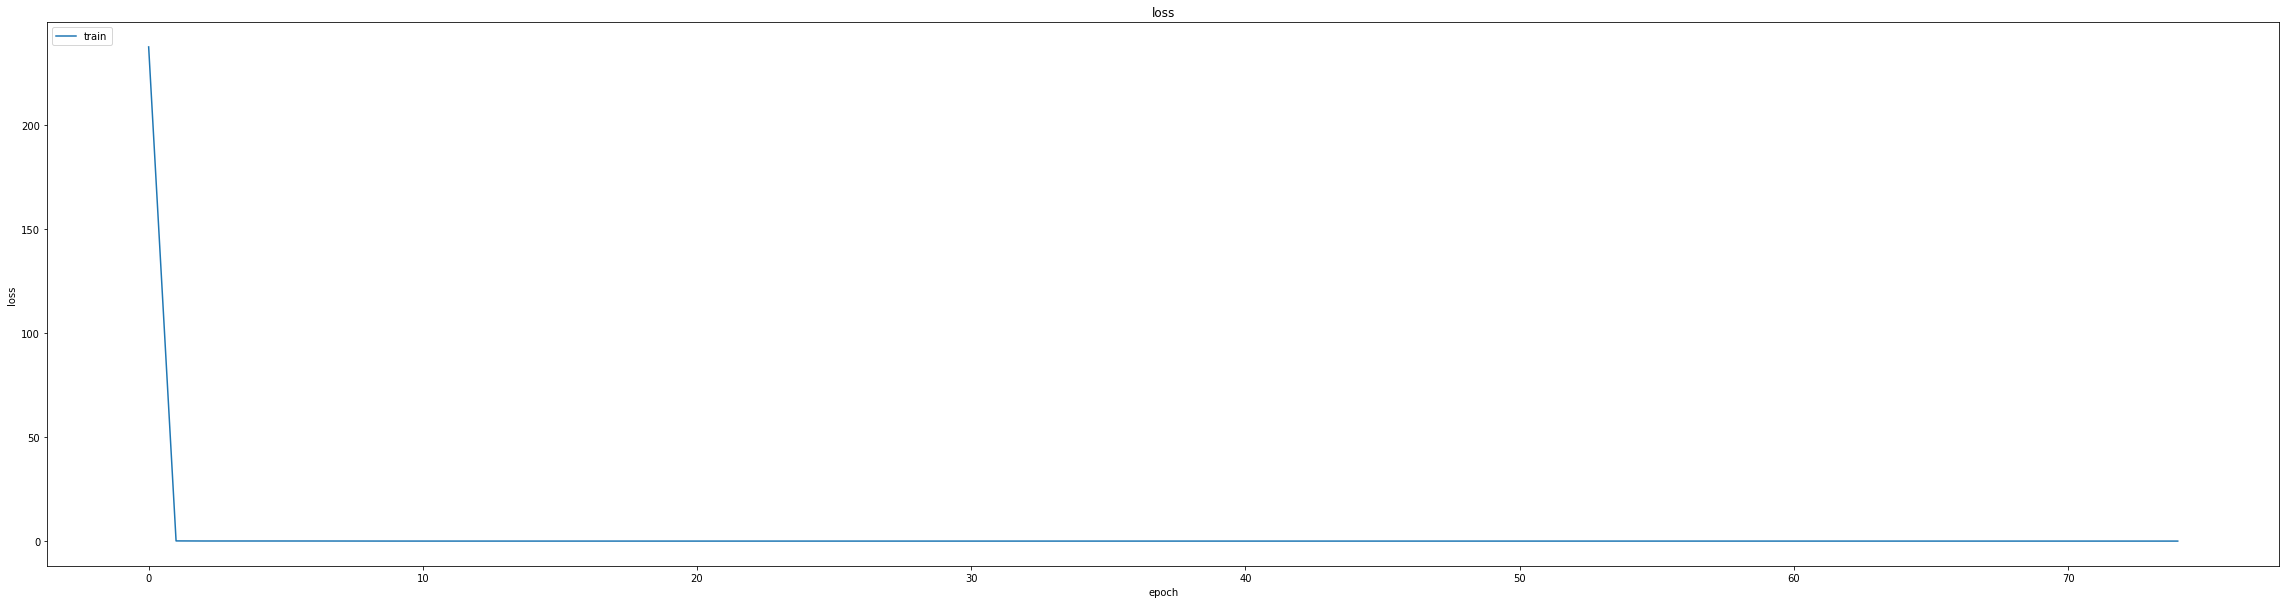

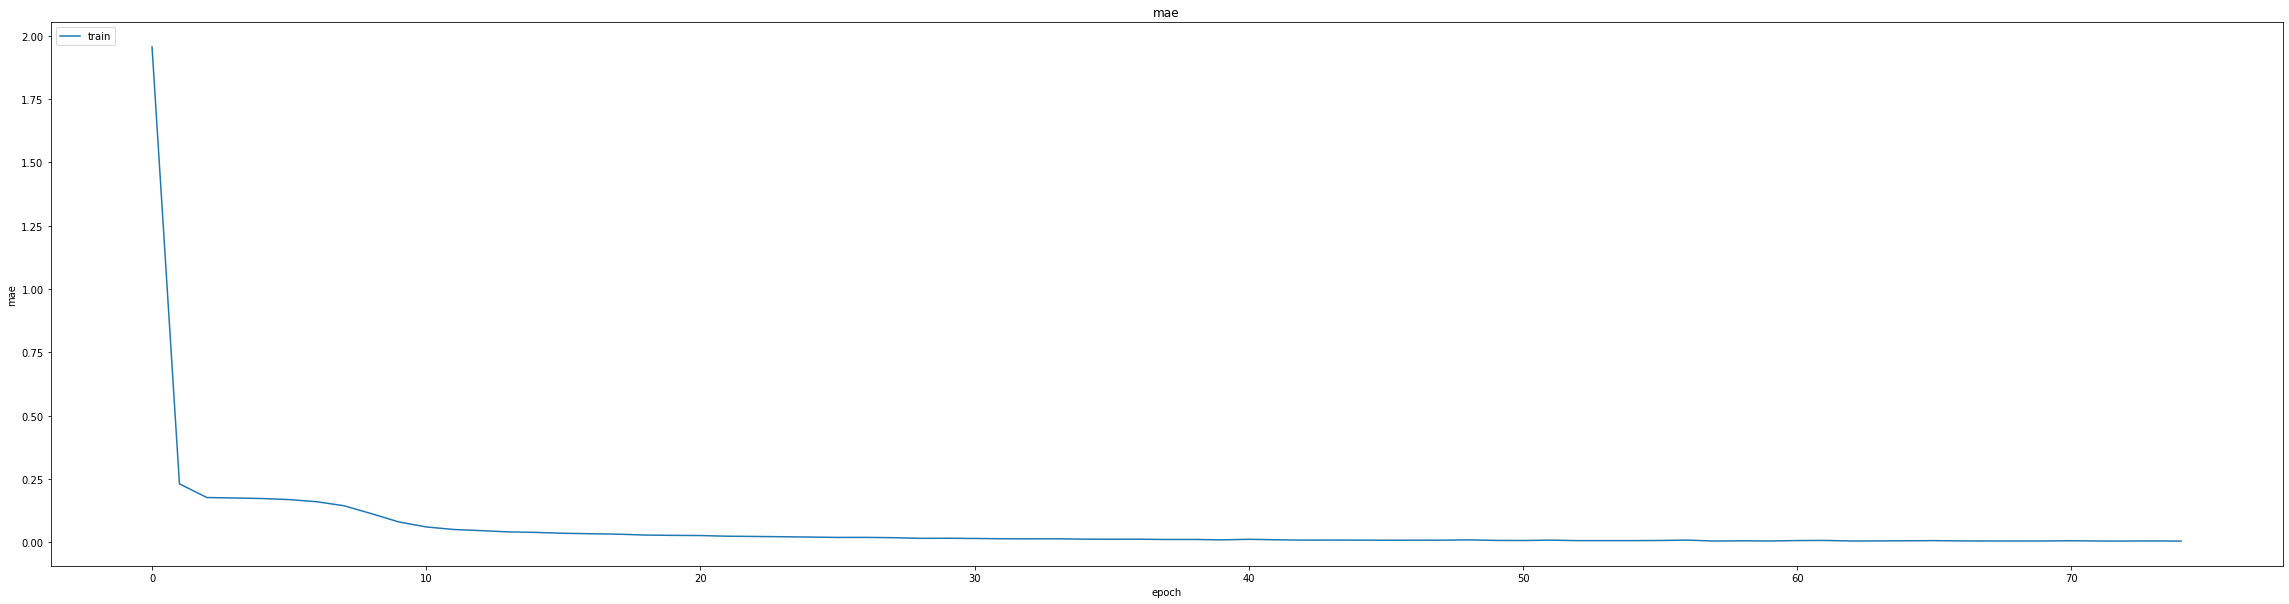

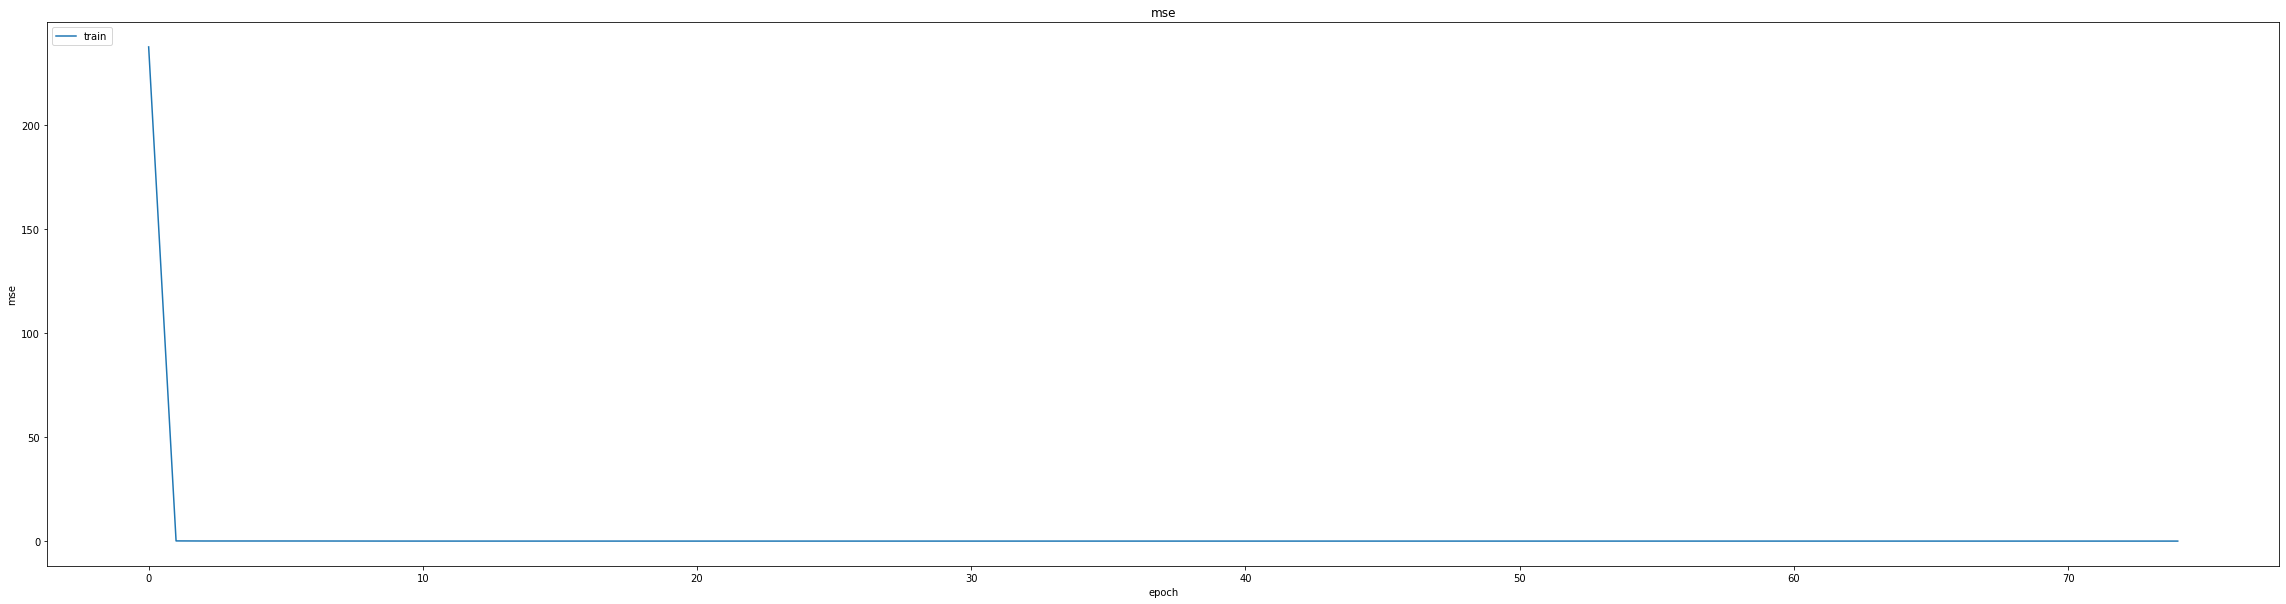

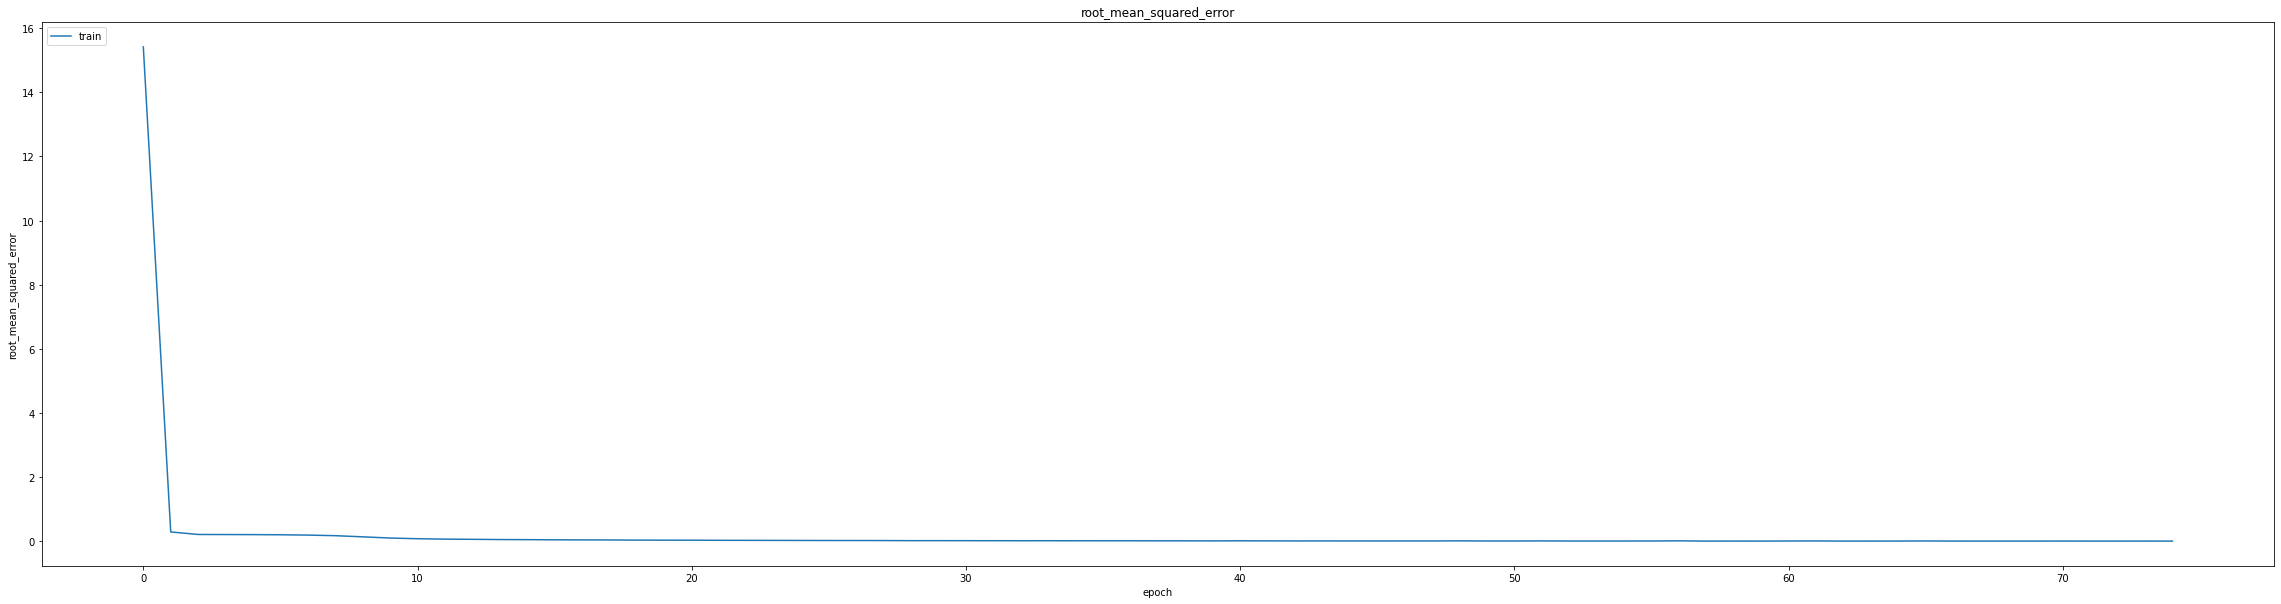

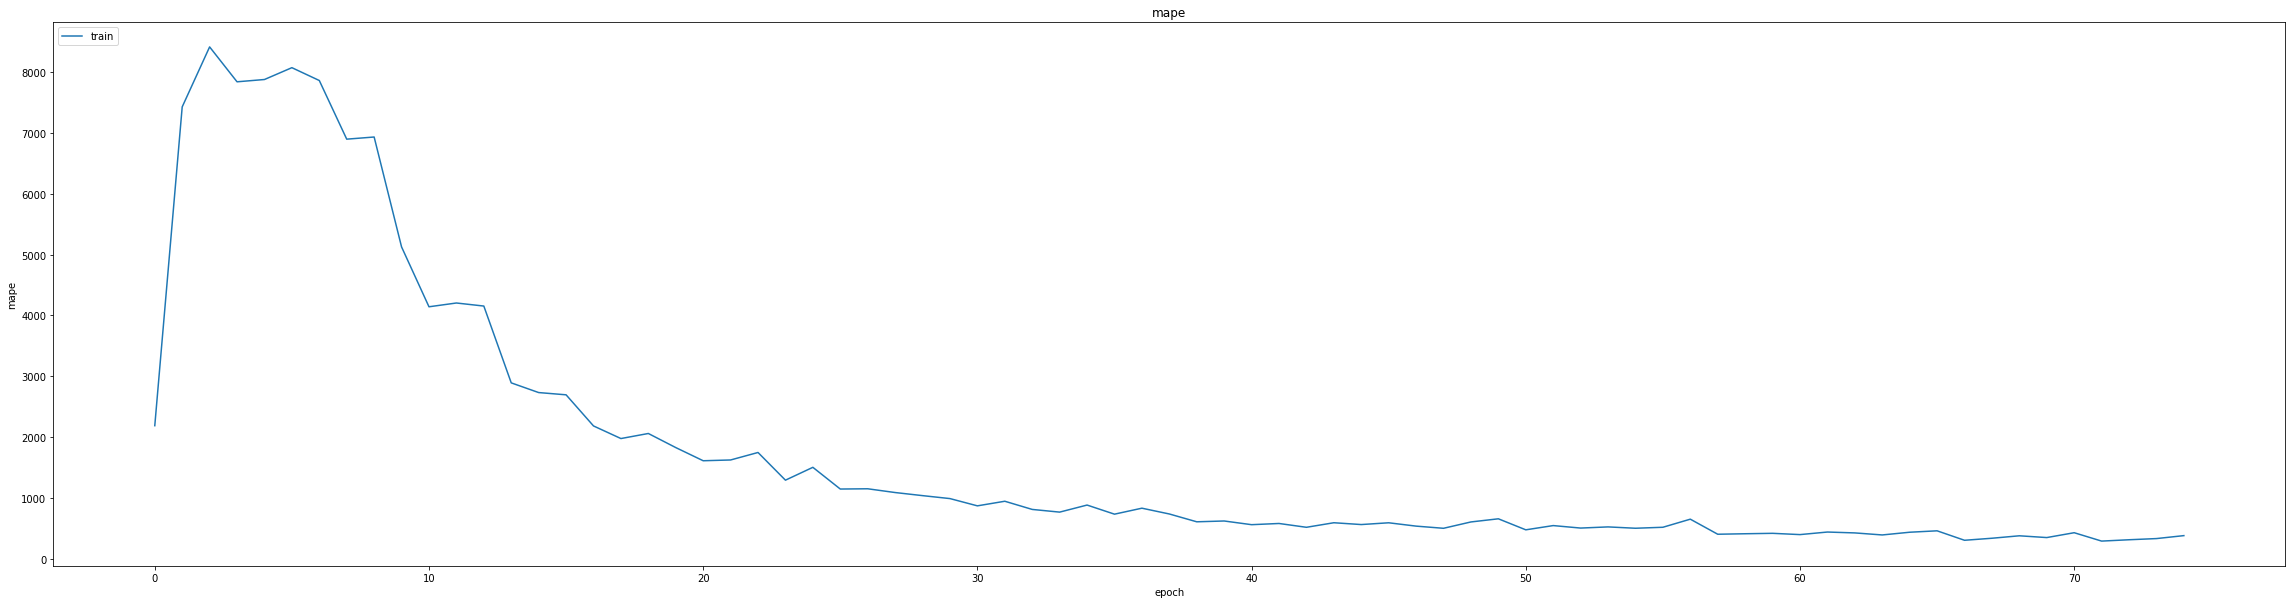

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01254457700997591
0.016955923289060593
464/464 [==============================] - 5s 6ms/step
0.9830369726875814


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0244 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 603.4877
Epoch 1: val_mse did not improve from 0.00029
348/348 [==============================] - 15s 25ms/step - loss: 0.0044 - mae: 0.0244 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 603.4877 - val_loss: 5.3489e-04 - val_mae: 0.0198 - val_mse: 5.3489e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 3852.2004 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 6.2627e-05 - mae: 0.0058 - mse: 6.2627e-05 - root_mean_squared_error: 0.0079 - mape: 613.4368
Epoch 2: val_mse did not improve from 0.00029
348/348 [==============================] - 7s 19ms/step - loss: 6.2627e-05 - mae: 0.0058 - mse: 6.2627e-05 - root_mean_squared_error: 0.0079 - mape: 613.4368 - val_loss: 5.3911e-04 - val_mae: 0.0200 - val_mse: 5.3911e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 3281.5662 - lr: 0.0010
lr chan

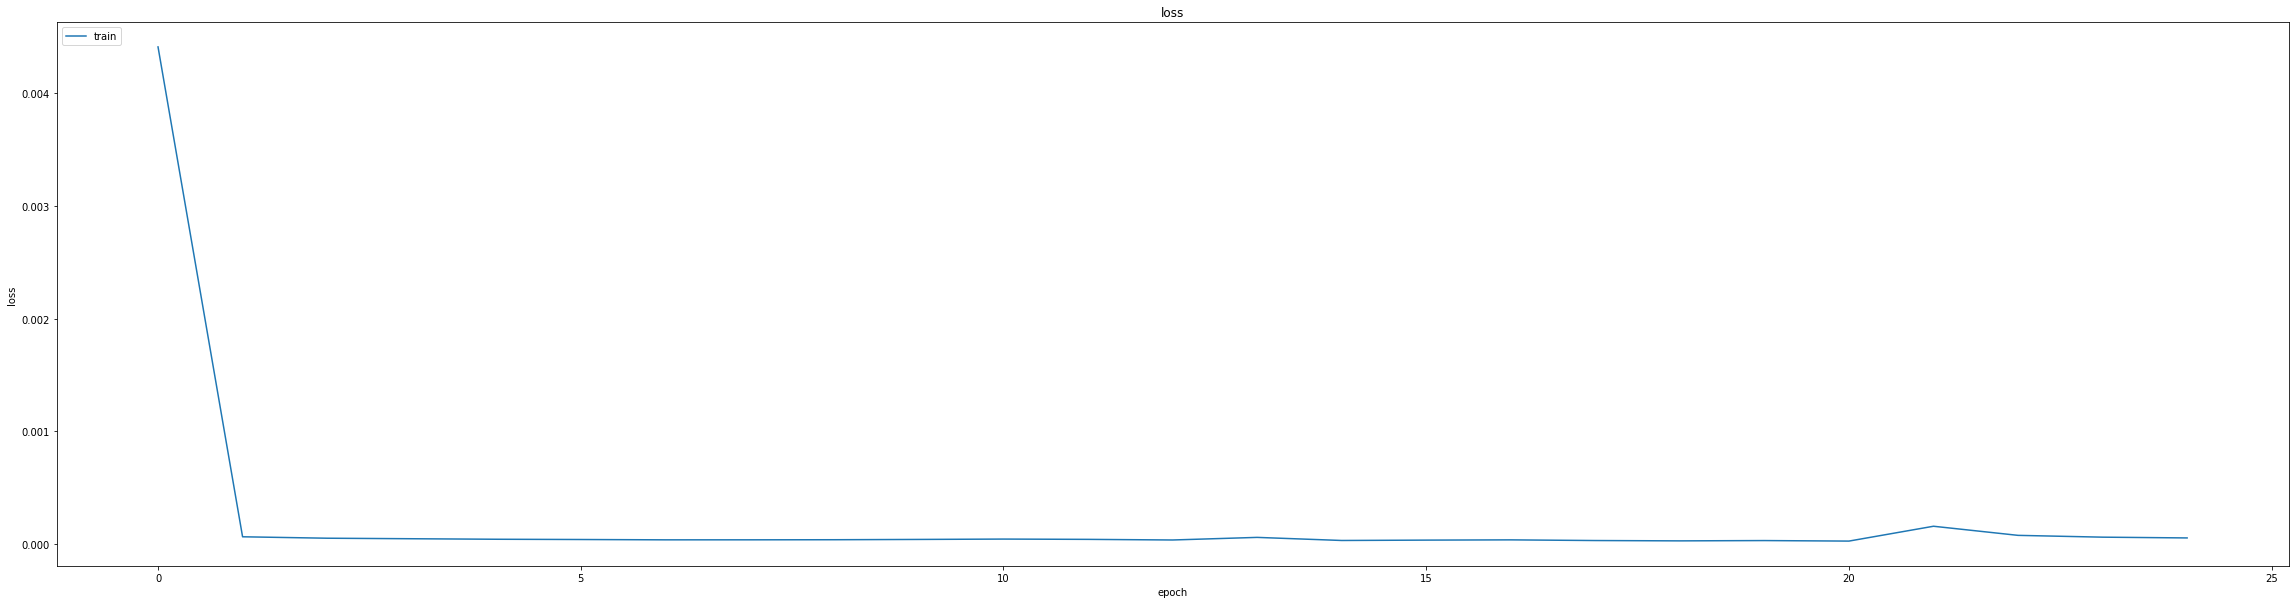

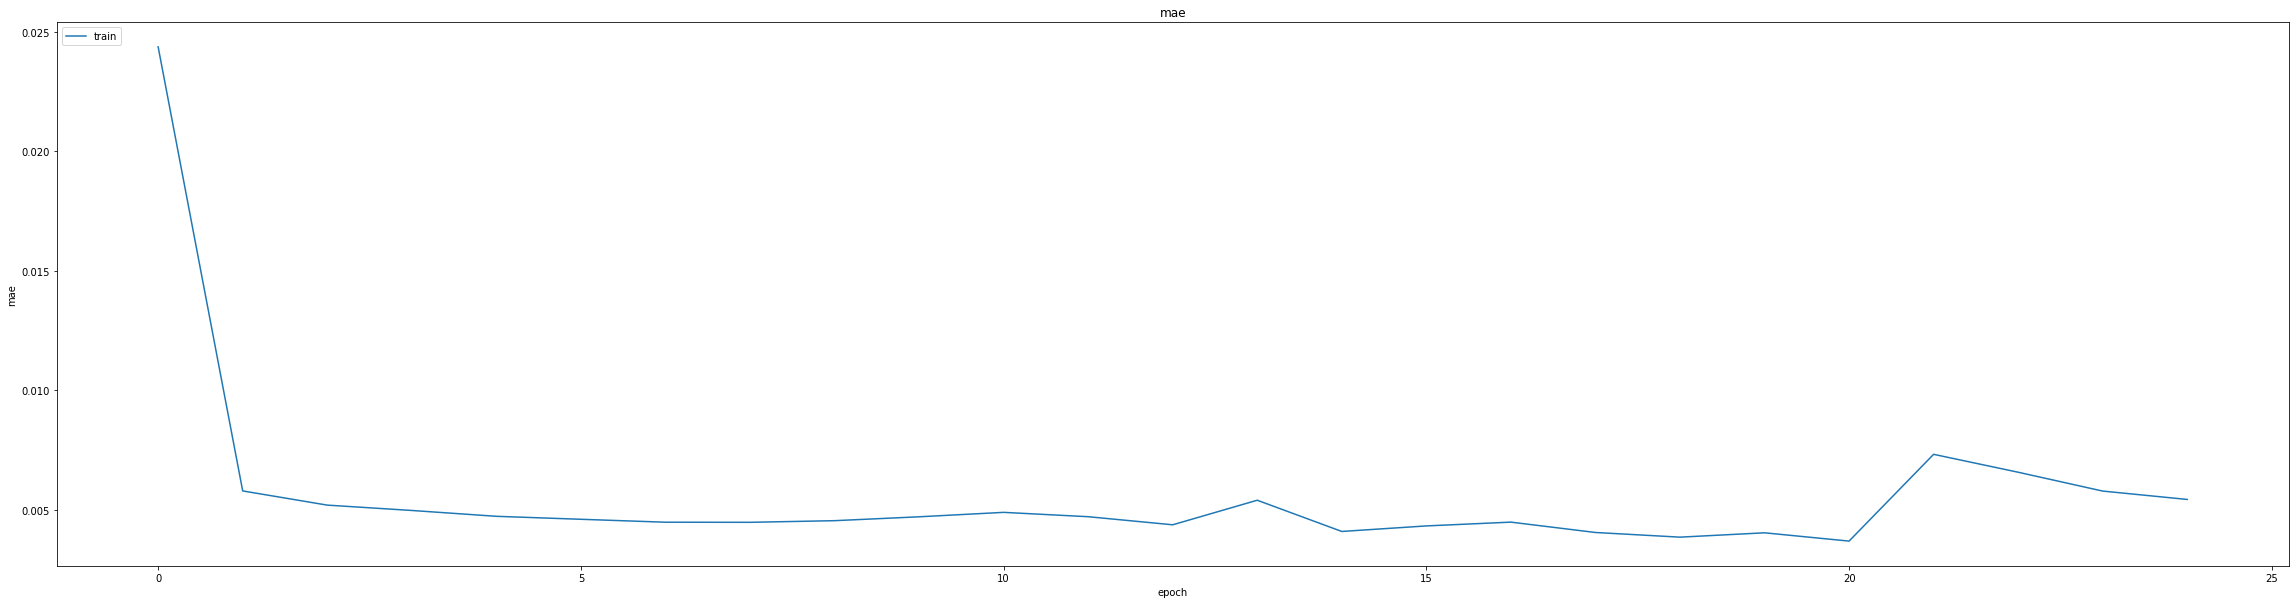

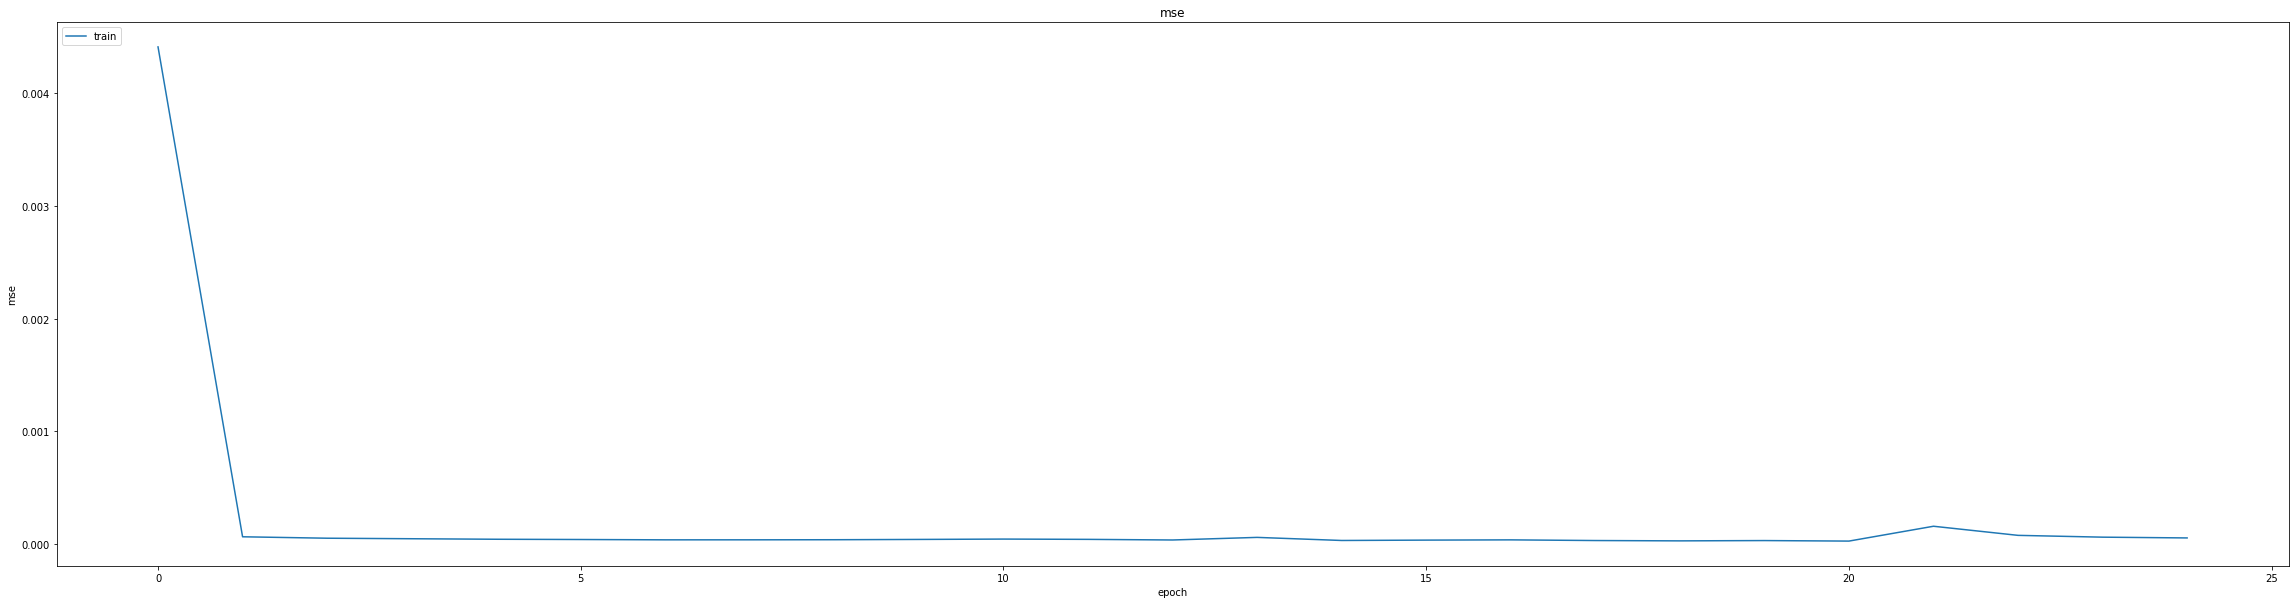

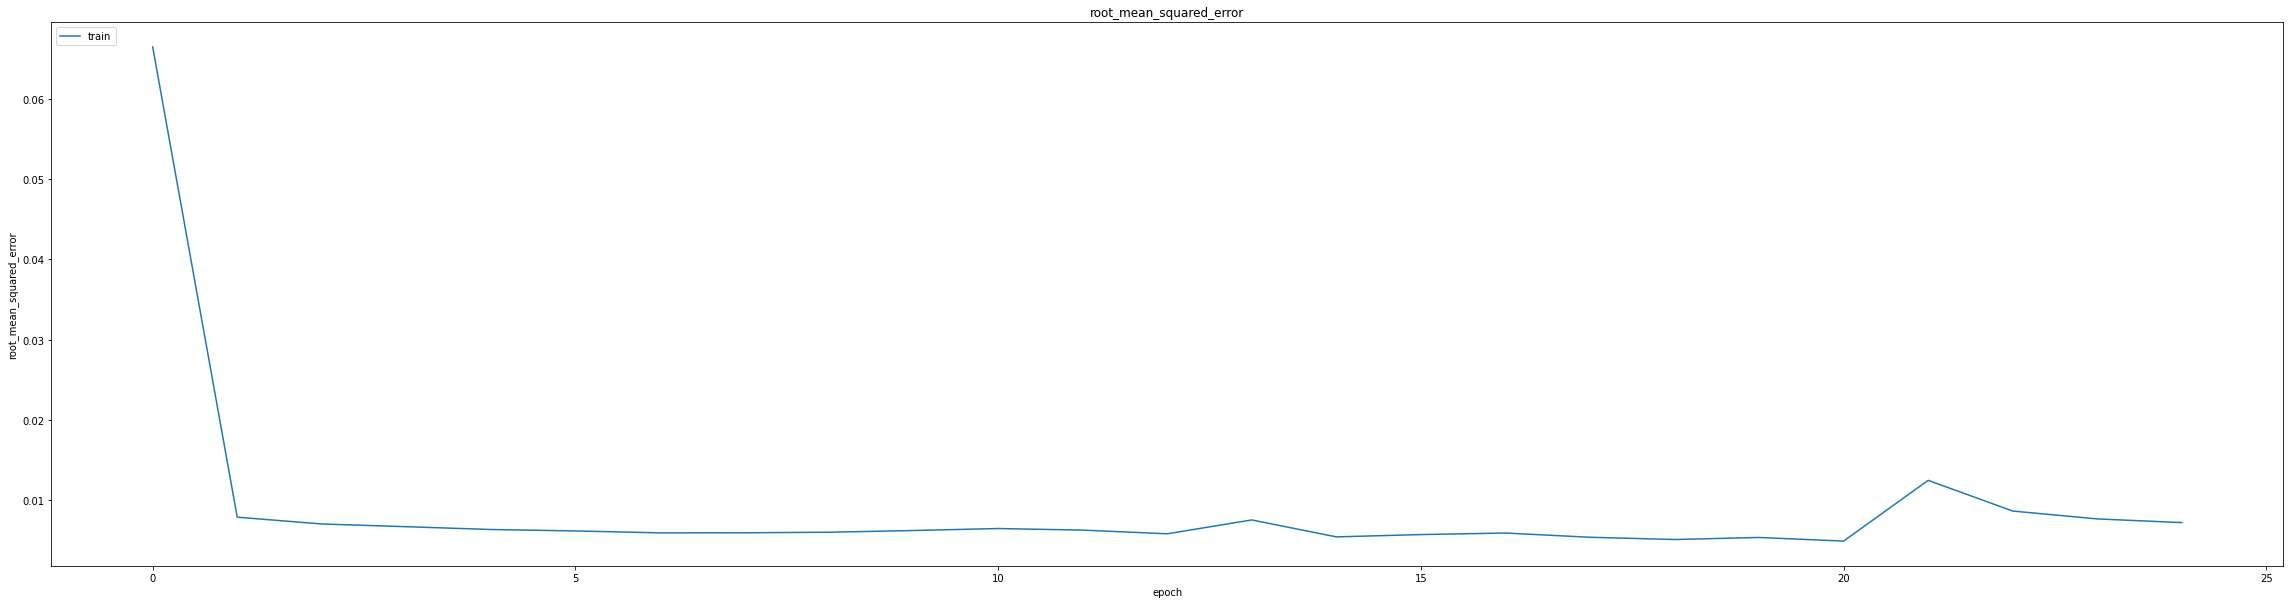

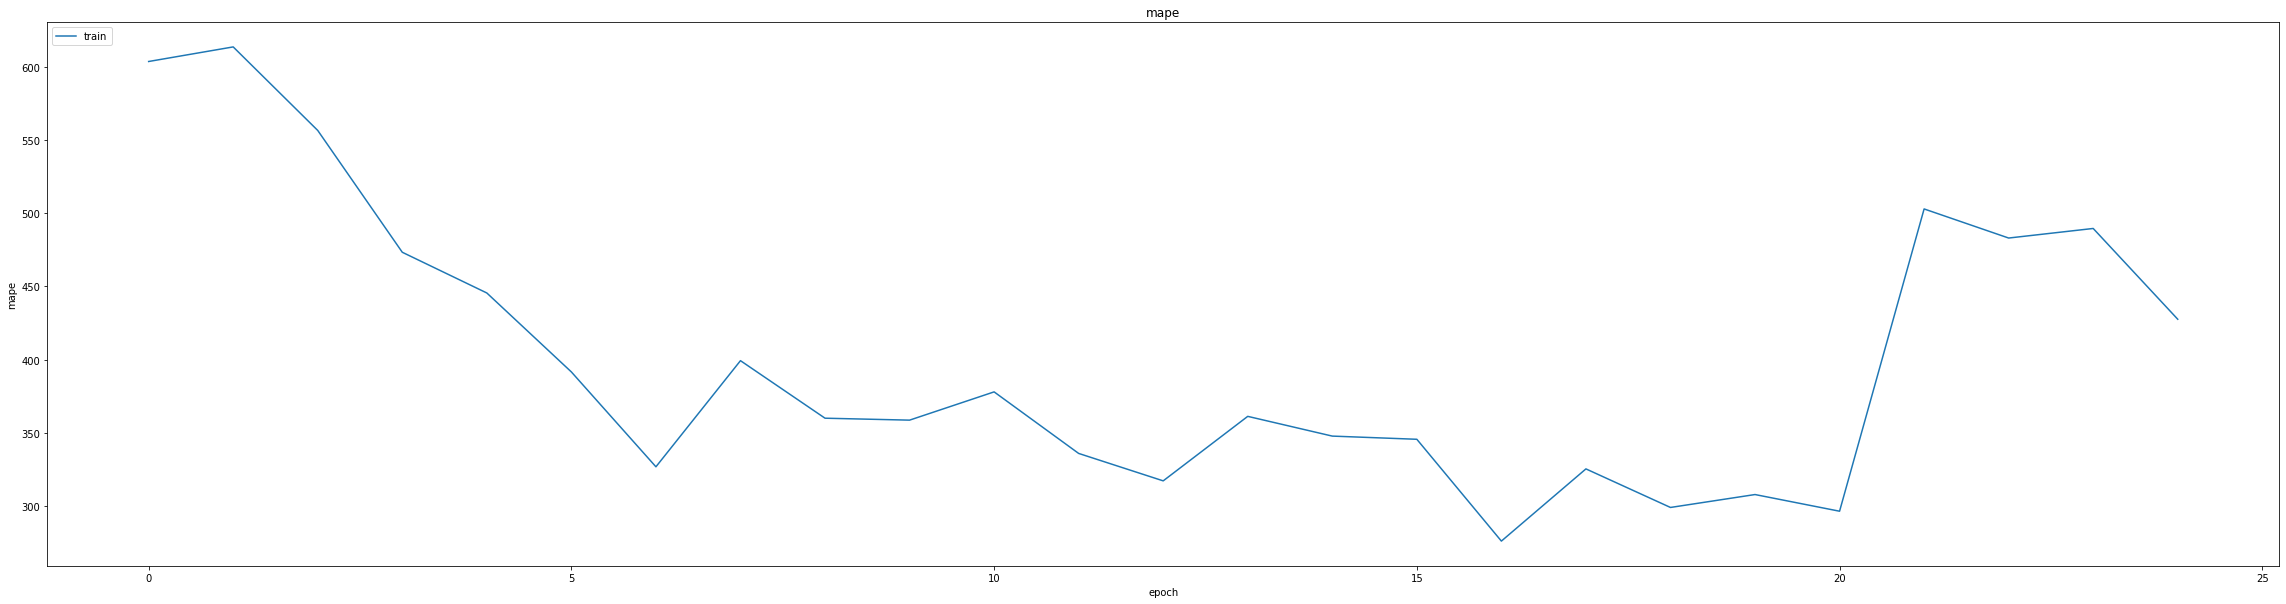

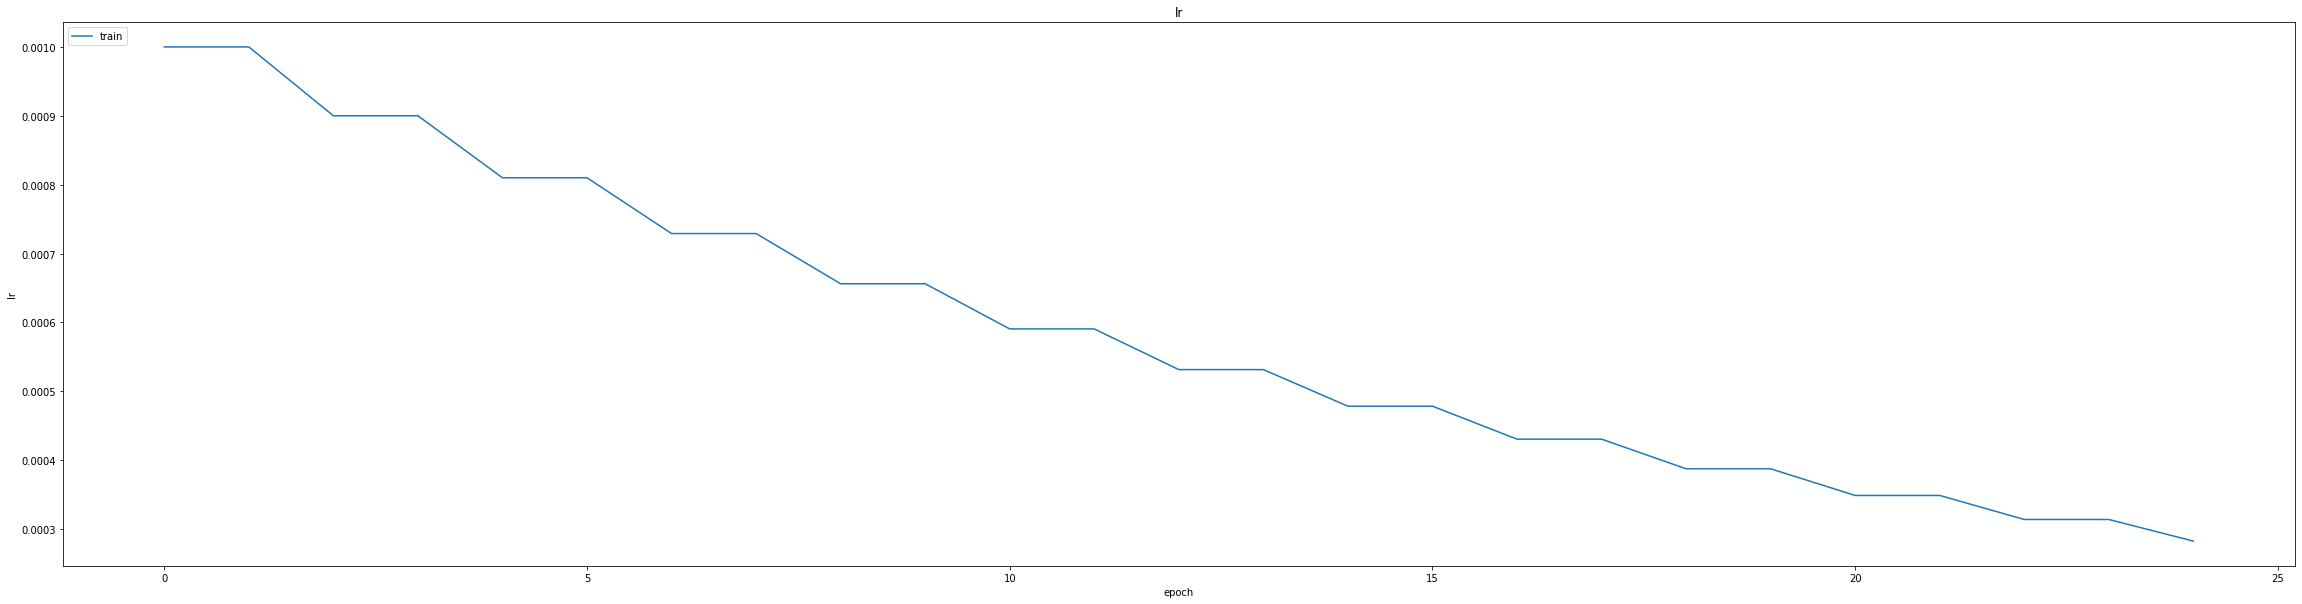

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015653323382139206
0.018035056069493294
464/464 [==============================] - 4s 6ms/step
0.9865019926507439


464/464 [==============================] - 3s 6ms/step


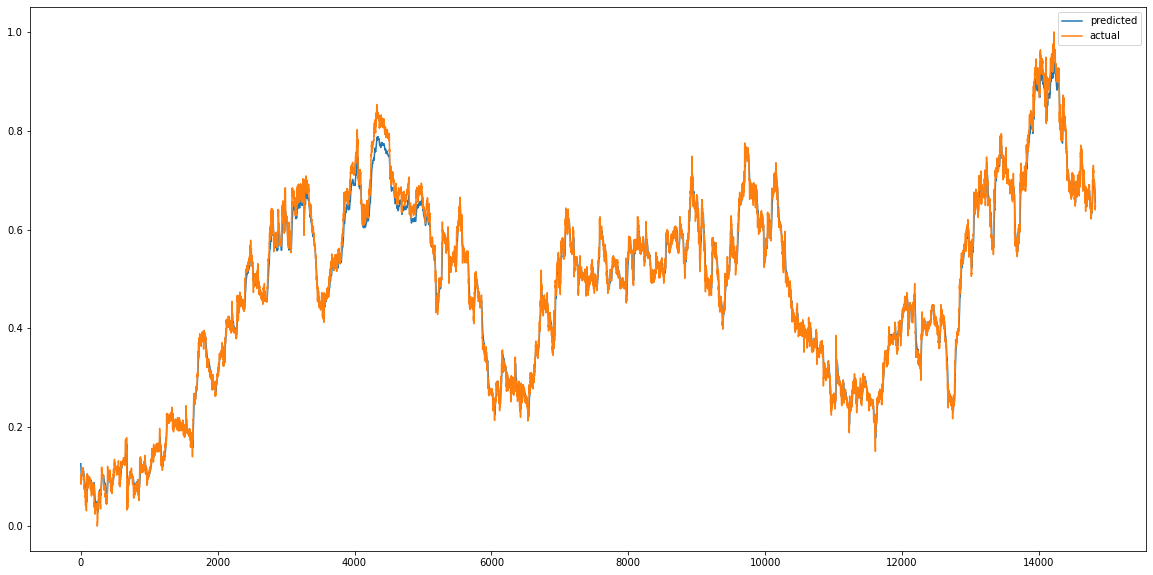

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


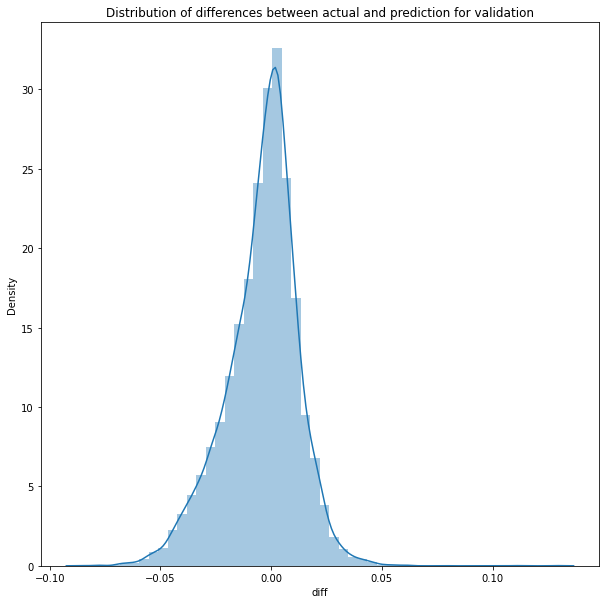

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


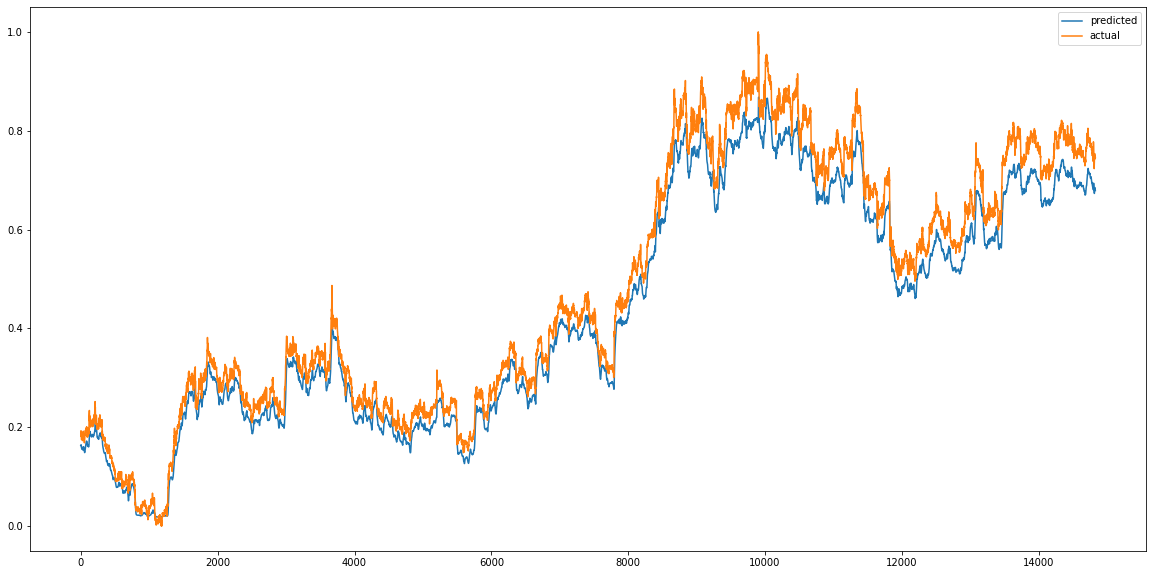

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


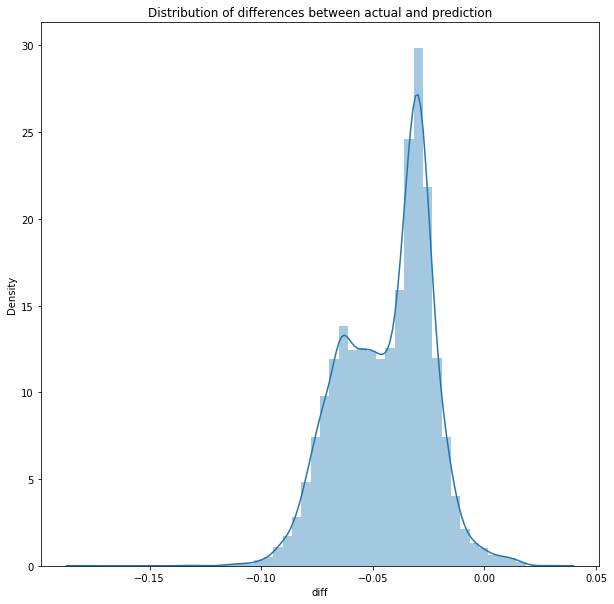

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0023095631986390615
RMSE :  0.048057915046733575
MAE :  0.04379169099984551
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9636548874087325


count    14828.000000
mean        -0.043642
std          0.020123
min         -0.178476
25%         -0.059558
50%         -0.039264
75%         -0.028773
max          0.031095
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 247.3567 - mae: 2.0596 - mse: 247.3567 - root_mean_squared_error: 15.7276 - mape: 2850.3638
Epoch 1: val_mse improved from inf to 0.19781, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 20s 46ms/step - loss: 246.0021 - mae: 2.0499 - mse: 246.0021 - root_mean_squared_error: 15.6845 - mape: 2835.2109 - val_loss: 0.1978 - val_mae: 0.3989 - val_mse: 0.1978 - val_root_mean_squared_error: 0.4448 - val_mape: 5762.4731
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 0.1186 - mae: 0.2816 - mse: 0.1186 - root_mean_squared_error: 0.3444 - mape: 1862.3892
Epoch 2: val_mse improved from 0.19781 to 0.16271, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.1185 - mae: 0.2814 - mse: 0.1185 - root_mean_squared_error: 0.3442 - mape: 1842.3489 - val_loss: 0.1627 - val_mae: 0.3563 - val_mse: 0.1627 - val_root_mean_squared_error: 0.4034 - val_mape: 8924.5889
Epoch 3/75
344/348 [============================>.] - ETA: 0s - loss: 0.0798 - mae: 0.2176 - mse: 0.0798 - root_mean_squared_error: 0.2824 - mape: 4515.9565
Epoch 3: val_mse improved from 0.16271 to 0.08368, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0794 - mae: 0.2171 - mse: 0.0794 - root_mean_squared_error: 0.2818 - mape: 4466.4653 - val_loss: 0.0837 - val_mae: 0.2448 - val_mse: 0.0837 - val_root_mean_squared_error: 0.2893 - val_mape: 18452.0391
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1767 - mse: 0.0470 - root_mean_squared_error: 0.2169 - mape: 7377.1973
Epoch 4: val_mse improved from 0.08368 to 0.05354, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0470 - mae: 0.1766 - mse: 0.0470 - root_mean_squared_error: 0.2168 - mape: 7316.5464 - val_loss: 0.0535 - val_mae: 0.1952 - val_mse: 0.0535 - val_root_mean_squared_error: 0.2314 - val_mape: 24668.8223
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0451 - mae: 0.1761 - mse: 0.0451 - root_mean_squared_error: 0.2125 - mape: 8654.6416
Epoch 5: val_mse improved from 0.05354 to 0.05292, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0451 - mae: 0.1761 - mse: 0.0451 - root_mean_squared_error: 0.2125 - mape: 8654.6416 - val_loss: 0.0529 - val_mae: 0.1940 - val_mse: 0.0529 - val_root_mean_squared_error: 0.2300 - val_mape: 24762.1426
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0449 - mae: 0.1756 - mse: 0.0449 - root_mean_squared_error: 0.2118 - mape: 8266.1123
Epoch 6: val_mse improved from 0.05292 to 0.05220, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0449 - mae: 0.1756 - mse: 0.0449 - root_mean_squared_error: 0.2118 - mape: 8221.6621 - val_loss: 0.0522 - val_mae: 0.1926 - val_mse: 0.0522 - val_root_mean_squared_error: 0.2285 - val_mape: 24714.1855
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0439 - mae: 0.1736 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 8343.0107
Epoch 7: val_mse improved from 0.05220 to 0.04931, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0439 - mae: 0.1736 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 8343.0107 - val_loss: 0.0493 - val_mae: 0.1871 - val_mse: 0.0493 - val_root_mean_squared_error: 0.2221 - val_mape: 24394.6348
Epoch 8/75
344/348 [============================>.] - ETA: 0s - loss: 0.0409 - mae: 0.1671 - mse: 0.0409 - root_mean_squared_error: 0.2021 - mape: 8393.1084
Epoch 8: val_mse improved from 0.04931 to 0.04139, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0408 - mae: 0.1670 - mse: 0.0408 - root_mean_squared_error: 0.2020 - mape: 8300.0312 - val_loss: 0.0414 - val_mae: 0.1701 - val_mse: 0.0414 - val_root_mean_squared_error: 0.2034 - val_mape: 23092.4199
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0295 - mae: 0.1388 - mse: 0.0295 - root_mean_squared_error: 0.1718 - mape: 8462.1592
Epoch 9: val_mse improved from 0.04139 to 0.01443, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0295 - mae: 0.1387 - mse: 0.0295 - root_mean_squared_error: 0.1717 - mape: 8440.3086 - val_loss: 0.0144 - val_mae: 0.0908 - val_mse: 0.0144 - val_root_mean_squared_error: 0.1201 - val_mape: 19308.7246
Epoch 10/75
344/348 [============================>.] - ETA: 0s - loss: 0.0141 - mae: 0.0939 - mse: 0.0141 - root_mean_squared_error: 0.1185 - mape: 5752.7520
Epoch 10: val_mse improved from 0.01443 to 0.00877, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0140 - mae: 0.0938 - mse: 0.0140 - root_mean_squared_error: 0.1184 - mape: 5688.9800 - val_loss: 0.0088 - val_mae: 0.0727 - val_mse: 0.0088 - val_root_mean_squared_error: 0.0936 - val_mape: 14820.4844
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0087 - mae: 0.0719 - mse: 0.0087 - root_mean_squared_error: 0.0931 - mape: 5420.2930
Epoch 11: val_mse improved from 0.00877 to 0.00411, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0087 - mae: 0.0718 - mse: 0.0087 - root_mean_squared_error: 0.0931 - mape: 5375.5000 - val_loss: 0.0041 - val_mae: 0.0484 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 13054.6475
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0580 - mse: 0.0058 - root_mean_squared_error: 0.0760 - mape: 4078.2329
Epoch 12: val_mse improved from 0.00411 to 0.00236, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0058 - mae: 0.0580 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 4056.1975 - val_loss: 0.0024 - val_mae: 0.0364 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0486 - val_mape: 11717.6855
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0516 - mse: 0.0046 - root_mean_squared_error: 0.0675 - mape: 3767.8281
Epoch 13: val_mse improved from 0.00236 to 0.00228, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0046 - mae: 0.0516 - mse: 0.0046 - root_mean_squared_error: 0.0675 - mape: 3747.6123 - val_loss: 0.0023 - val_mae: 0.0374 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0477 - val_mape: 10576.5127
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0473 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 4223.8481
Epoch 14: val_mse did not improve from 0.00228
348/348 [==============================] - 4s 13ms/step - loss: 0.0038 - mae: 0.0473 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 4212.9902 - val_loss: 0.0025 - val_mae: 0.0412 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 9780.5498
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0442 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 3078.5476
Epoch 15: val_mse improved from 0.00228 to 0.00152, saving model to /content/drive/MyDrive/modelweights

348/348 [==============================] - 15s 44ms/step - loss: 0.0033 - mae: 0.0442 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 3070.6318 - val_loss: 0.0015 - val_mae: 0.0283 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 9025.4648
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0421 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 3066.7942
Epoch 16: val_mse did not improve from 0.00152
348/348 [==============================] - 4s 12ms/step - loss: 0.0030 - mae: 0.0421 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 3066.7942 - val_loss: 0.0025 - val_mae: 0.0416 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 8480.7314
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0387 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 2958.1350
Epoch 17: val_mse improved from 0.00152 to 0.00141, saving model to /content/drive/MyDrive/modelweights/

348/348 [==============================] - 15s 44ms/step - loss: 0.0025 - mae: 0.0387 - mse: 0.0025 - root_mean_squared_error: 0.0503 - mape: 2950.4983 - val_loss: 0.0014 - val_mae: 0.0278 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 7933.9404
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3238.6243
Epoch 18: val_mse improved from 0.00141 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3221.0769 - val_loss: 0.0011 - val_mae: 0.0233 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 7515.2720
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0353 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2406.2117
Epoch 19: val_mse did not improve from 0.00106
348/348 [==============================] - 4s 13ms/step - loss: 0.0021 - mae: 0.0353 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2386.4082 - val_loss: 0.0011 - val_mae: 0.0234 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 6912.9424
Epoch 20/75
344/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0323 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 2542.5920
Epoch 20: val_mse did not improve from 0.00106
348/348 [==============================] - 4s 13ms/step -

348/348 [==============================] - 15s 45ms/step - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 2176.0498 - val_loss: 9.9355e-04 - val_mae: 0.0241 - val_mse: 9.9355e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 6039.9497
Epoch 22/75
345/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0384 - mape: 1918.9259
Epoch 22: val_mse improved from 0.00099 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 1903.0455 - val_loss: 9.5534e-04 - val_mae: 0.0243 - val_mse: 9.5534e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 5706.5625
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0354 - mape: 1940.5199
Epoch 23: val_mse improved from 0.00096 to 0.00082, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0354 - mape: 1940.5199 - val_loss: 8.1695e-04 - val_mae: 0.0210 - val_mse: 8.1695e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 5368.7993
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 2110.5259
Epoch 24: val_mse did not improve from 0.00082
348/348 [==============================] - 4s 13ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 2099.0674 - val_loss: 0.0011 - val_mae: 0.0283 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 5163.8535
Epoch 25/75
344/348 [============================>.] - ETA: 0s - loss: 9.3300e-04 - mae: 0.0239 - mse: 9.3300e-04 - root_mean_squared_error: 0.0305 - mape: 1649.5239
Epoch 25: val_mse improved from 0.00082 to 0.00066, saving model to /content/drive/MyDri

348/348 [==============================] - 16s 45ms/step - loss: 9.3316e-04 - mae: 0.0239 - mse: 9.3316e-04 - root_mean_squared_error: 0.0305 - mape: 1631.2056 - val_loss: 6.6372e-04 - val_mae: 0.0198 - val_mse: 6.6372e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 4968.5063
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 8.4095e-04 - mae: 0.0227 - mse: 8.4095e-04 - root_mean_squared_error: 0.0290 - mape: 1541.7328
Epoch 26: val_mse improved from 0.00066 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 8.4361e-04 - mae: 0.0227 - mse: 8.4361e-04 - root_mean_squared_error: 0.0290 - mape: 1529.0231 - val_loss: 6.1721e-04 - val_mae: 0.0189 - val_mse: 6.1721e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 4461.1025
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 7.4396e-04 - mae: 0.0213 - mse: 7.4396e-04 - root_mean_squared_error: 0.0273 - mape: 1696.5295
Epoch 27: val_mse did not improve from 0.00062
348/348 [==============================] - 4s 13ms/step - loss: 7.4576e-04 - mae: 0.0214 - mse: 7.4576e-04 - root_mean_squared_error: 0.0273 - mape: 1682.4772 - val_loss: 0.0022 - val_mae: 0.0417 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 4485.9834
Epoch 28/75
345/348 [============================>.] - ETA: 0s - loss: 6.6239e-04 - mae: 0.0202 - mse: 6.6239e-04 - root_mean_squared_error: 0.0257 - mape: 1518.9255
Epoch 28: val_mse improved from 0.00062 to 0.00059, saving model

348/348 [==============================] - 15s 44ms/step - loss: 6.6142e-04 - mae: 0.0202 - mse: 6.6142e-04 - root_mean_squared_error: 0.0257 - mape: 1506.3456 - val_loss: 5.8905e-04 - val_mae: 0.0185 - val_mse: 5.8905e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 4084.2776
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 6.0239e-04 - mae: 0.0193 - mse: 6.0239e-04 - root_mean_squared_error: 0.0245 - mape: 1266.2206
Epoch 29: val_mse improved from 0.00059 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 6.0209e-04 - mae: 0.0193 - mse: 6.0209e-04 - root_mean_squared_error: 0.0245 - mape: 1262.9728 - val_loss: 5.6189e-04 - val_mae: 0.0181 - val_mse: 5.6189e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3998.4482
Epoch 30/75
345/348 [============================>.] - ETA: 0s - loss: 5.4349e-04 - mae: 0.0182 - mse: 5.4349e-04 - root_mean_squared_error: 0.0233 - mape: 1328.7556
Epoch 30: val_mse improved from 0.00056 to 0.00055, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.4289e-04 - mae: 0.0181 - mse: 5.4289e-04 - root_mean_squared_error: 0.0233 - mape: 1317.7267 - val_loss: 5.4635e-04 - val_mae: 0.0180 - val_mse: 5.4635e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 3594.6646
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 4.5757e-04 - mae: 0.0168 - mse: 4.5757e-04 - root_mean_squared_error: 0.0214 - mape: 1069.5500
Epoch 31: val_mse did not improve from 0.00055
348/348 [==============================] - 4s 13ms/step - loss: 4.5757e-04 - mae: 0.0168 - mse: 4.5757e-04 - root_mean_squared_error: 0.0214 - mape: 1069.5500 - val_loss: 5.5530e-04 - val_mae: 0.0179 - val_mse: 5.5530e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 3556.9653
Epoch 32/75
345/348 [============================>.] - ETA: 0s - loss: 4.4437e-04 - mae: 0.0164 - mse: 4.4437e-04 - root_mean_squared_error: 0.0211 - mape: 1096.4819
Epoch 32: val_mse did not improve from 0.00055
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 4.3137e-04 - mae: 0.0162 - mse: 4.3137e-04 - root_mean_squared_error: 0.0208 - mape: 1224.2882 - val_loss: 5.2832e-04 - val_mae: 0.0176 - val_mse: 5.2832e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 3115.3164
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 3.2652e-04 - mae: 0.0141 - mse: 3.2652e-04 - root_mean_squared_error: 0.0181 - mape: 980.4959
Epoch 34: val_mse improved from 0.00053 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.2610e-04 - mae: 0.0141 - mse: 3.2610e-04 - root_mean_squared_error: 0.0181 - mape: 975.1606 - val_loss: 5.1727e-04 - val_mae: 0.0177 - val_mse: 5.1727e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 2917.8389
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 3.3318e-04 - mae: 0.0143 - mse: 3.3318e-04 - root_mean_squared_error: 0.0183 - mape: 934.9294
Epoch 35: val_mse did not improve from 0.00052
348/348 [==============================] - 4s 13ms/step - loss: 3.3313e-04 - mae: 0.0143 - mse: 3.3313e-04 - root_mean_squared_error: 0.0183 - mape: 929.8574 - val_loss: 7.8126e-04 - val_mae: 0.0220 - val_mse: 7.8126e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 2784.6870
Epoch 36/75
348/348 [==============================] - ETA: 0s - loss: 3.2149e-04 - mae: 0.0139 - mse: 3.2149e-04 - root_mean_squared_error: 0.0179 - mape: 1014.6802
Epoch 36: val_mse did not improve from 0.00052
348/348 [===

348/348 [==============================] - 16s 46ms/step - loss: 2.5746e-04 - mae: 0.0124 - mse: 2.5746e-04 - root_mean_squared_error: 0.0160 - mape: 939.8423 - val_loss: 4.7065e-04 - val_mae: 0.0164 - val_mse: 4.7065e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 2677.6489
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 2.4477e-04 - mae: 0.0121 - mse: 2.4477e-04 - root_mean_squared_error: 0.0156 - mape: 924.8046
Epoch 39: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 12ms/step - loss: 2.4374e-04 - mae: 0.0120 - mse: 2.4374e-04 - root_mean_squared_error: 0.0156 - mape: 914.4991 - val_loss: 4.9375e-04 - val_mae: 0.0170 - val_mse: 4.9375e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 3689.9849
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 2.3800e-04 - mae: 0.0120 - mse: 2.3800e-04 - root_mean_squared_error: 0.0154 - mape: 833.8201
Epoch 40: val_mse did not improve from 0.00047
348/348 [====

348/348 [==============================] - 15s 43ms/step - loss: 2.2758e-04 - mae: 0.0117 - mse: 2.2758e-04 - root_mean_squared_error: 0.0151 - mape: 819.1910 - val_loss: 4.5619e-04 - val_mae: 0.0160 - val_mse: 4.5619e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 2363.9077
Epoch 42/75
345/348 [============================>.] - ETA: 0s - loss: 2.4988e-04 - mae: 0.0122 - mse: 2.4988e-04 - root_mean_squared_error: 0.0158 - mape: 771.5173
Epoch 42: val_mse did not improve from 0.00046
348/348 [==============================] - 4s 13ms/step - loss: 2.5002e-04 - mae: 0.0122 - mse: 2.5002e-04 - root_mean_squared_error: 0.0158 - mape: 765.1320 - val_loss: 4.9116e-04 - val_mae: 0.0172 - val_mse: 4.9116e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 2392.4160
Epoch 43/75
344/348 [============================>.] - ETA: 0s - loss: 1.9001e-04 - mae: 0.0107 - mse: 1.9001e-04 - root_mean_squared_error: 0.0138 - mape: 723.4148
Epoch 43: val_mse improved from 0.00046 to 0.00040, saving m

348/348 [==============================] - 15s 44ms/step - loss: 1.8953e-04 - mae: 0.0107 - mse: 1.8953e-04 - root_mean_squared_error: 0.0138 - mape: 715.3416 - val_loss: 3.9860e-04 - val_mae: 0.0151 - val_mse: 3.9860e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 2852.4170
Epoch 44/75
346/348 [============================>.] - ETA: 0s - loss: 2.2077e-04 - mae: 0.0115 - mse: 2.2077e-04 - root_mean_squared_error: 0.0149 - mape: 740.2693
Epoch 44: val_mse did not improve from 0.00040
348/348 [==============================] - 4s 13ms/step - loss: 2.2049e-04 - mae: 0.0115 - mse: 2.2049e-04 - root_mean_squared_error: 0.0148 - mape: 736.2357 - val_loss: 4.3289e-04 - val_mae: 0.0159 - val_mse: 4.3289e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2451.4622
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 1.7989e-04 - mae: 0.0103 - mse: 1.7989e-04 - root_mean_squared_error: 0.0134 - mape: 721.1922
Epoch 45: val_mse did not improve from 0.00040
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 1.4027e-04 - mae: 0.0091 - mse: 1.4027e-04 - root_mean_squared_error: 0.0118 - mape: 718.0179 - val_loss: 3.5557e-04 - val_mae: 0.0145 - val_mse: 3.5557e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2507.4116
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 3.0646e-04 - mae: 0.0119 - mse: 3.0646e-04 - root_mean_squared_error: 0.0175 - mape: 693.2944
Epoch 48: val_mse improved from 0.00036 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 3.0646e-04 - mae: 0.0119 - mse: 3.0646e-04 - root_mean_squared_error: 0.0175 - mape: 693.2944 - val_loss: 3.5299e-04 - val_mae: 0.0143 - val_mse: 3.5299e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 2856.0520
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 1.2300e-04 - mae: 0.0085 - mse: 1.2300e-04 - root_mean_squared_error: 0.0111 - mape: 746.9000
Epoch 49: val_mse did not improve from 0.00035
348/348 [==============================] - 4s 13ms/step - loss: 1.2288e-04 - mae: 0.0085 - mse: 1.2288e-04 - root_mean_squared_error: 0.0111 - mape: 740.6929 - val_loss: 4.4040e-04 - val_mae: 0.0167 - val_mse: 4.4040e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 4194.6523
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.1391e-04 - mae: 0.0082 - mse: 1.1391e-04 - root_mean_squared_error: 0.0107 - mape: 666.2585
Epoch 50: val_mse did not improve from 0.00035
348/348 [====

348/348 [==============================] - 16s 45ms/step - loss: 1.3555e-04 - mae: 0.0090 - mse: 1.3555e-04 - root_mean_squared_error: 0.0116 - mape: 715.9294 - val_loss: 3.5041e-04 - val_mae: 0.0147 - val_mse: 3.5041e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3920.6755
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 2.7149e-04 - mae: 0.0113 - mse: 2.7149e-04 - root_mean_squared_error: 0.0165 - mape: 622.8038
Epoch 52: val_mse improved from 0.00035 to 0.00033, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 2.6981e-04 - mae: 0.0112 - mse: 2.6981e-04 - root_mean_squared_error: 0.0164 - mape: 615.8593 - val_loss: 3.3069e-04 - val_mae: 0.0142 - val_mse: 3.3069e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 3482.1494
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 1.1194e-04 - mae: 0.0082 - mse: 1.1194e-04 - root_mean_squared_error: 0.0106 - mape: 712.5024
Epoch 53: val_mse did not improve from 0.00033
348/348 [==============================] - 5s 13ms/step - loss: 1.1169e-04 - mae: 0.0082 - mse: 1.1169e-04 - root_mean_squared_error: 0.0106 - mape: 708.6268 - val_loss: 3.6220e-04 - val_mae: 0.0151 - val_mse: 3.6220e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 4320.5464
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 1.2857e-04 - mae: 0.0087 - mse: 1.2857e-04 - root_mean_squared_error: 0.0113 - mape: 698.2190
Epoch 54: val_mse did not improve from 0.00033
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 2.1973e-04 - mae: 0.0100 - mse: 2.1973e-04 - root_mean_squared_error: 0.0148 - mape: 665.9434 - val_loss: 2.8921e-04 - val_mae: 0.0132 - val_mse: 2.8921e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 4005.8066
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 8.8021e-05 - mae: 0.0072 - mse: 8.8021e-05 - root_mean_squared_error: 0.0094 - mape: 600.5891
Epoch 58: val_mse improved from 0.00029 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.7984e-05 - mae: 0.0072 - mse: 8.7984e-05 - root_mean_squared_error: 0.0094 - mape: 599.0312 - val_loss: 2.6870e-04 - val_mae: 0.0127 - val_mse: 2.6870e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 3452.9099
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 1.0685e-04 - mae: 0.0079 - mse: 1.0685e-04 - root_mean_squared_error: 0.0103 - mape: 622.3970
Epoch 59: val_mse did not improve from 0.00027
348/348 [==============================] - 4s 13ms/step - loss: 1.0672e-04 - mae: 0.0079 - mse: 1.0672e-04 - root_mean_squared_error: 0.0103 - mape: 620.7809 - val_loss: 2.8441e-04 - val_mae: 0.0133 - val_mse: 2.8441e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 4415.3643
Epoch 60/75
345/348 [============================>.] - ETA: 0s - loss: 1.3262e-04 - mae: 0.0084 - mse: 1.3262e-04 - root_mean_squared_error: 0.0115 - mape: 603.0027
Epoch 60: val_mse did not improve from 0.00027
348/348 [====

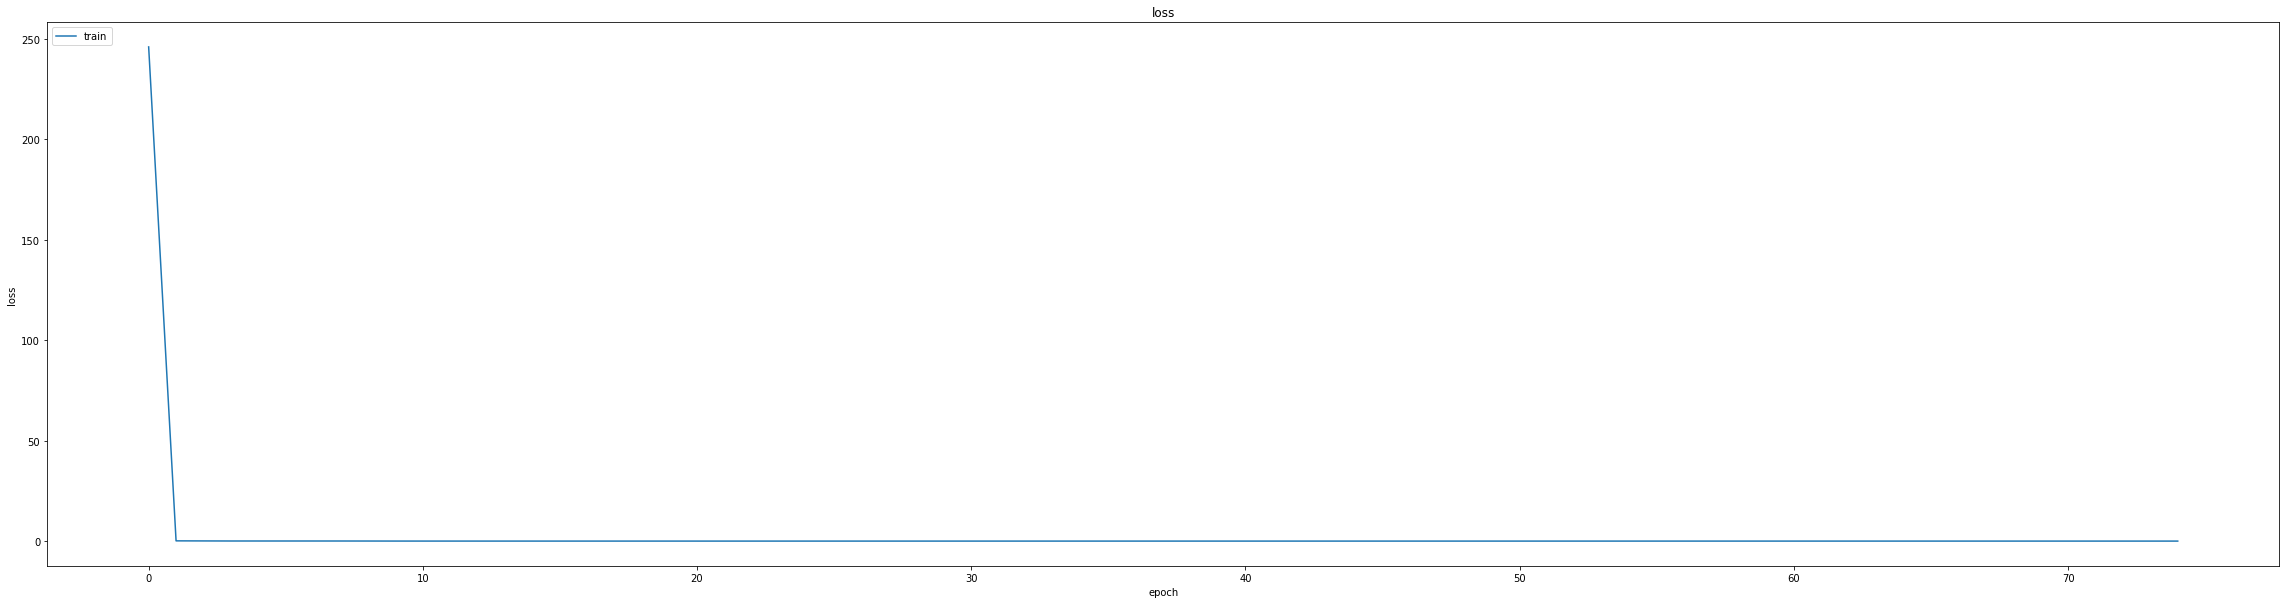

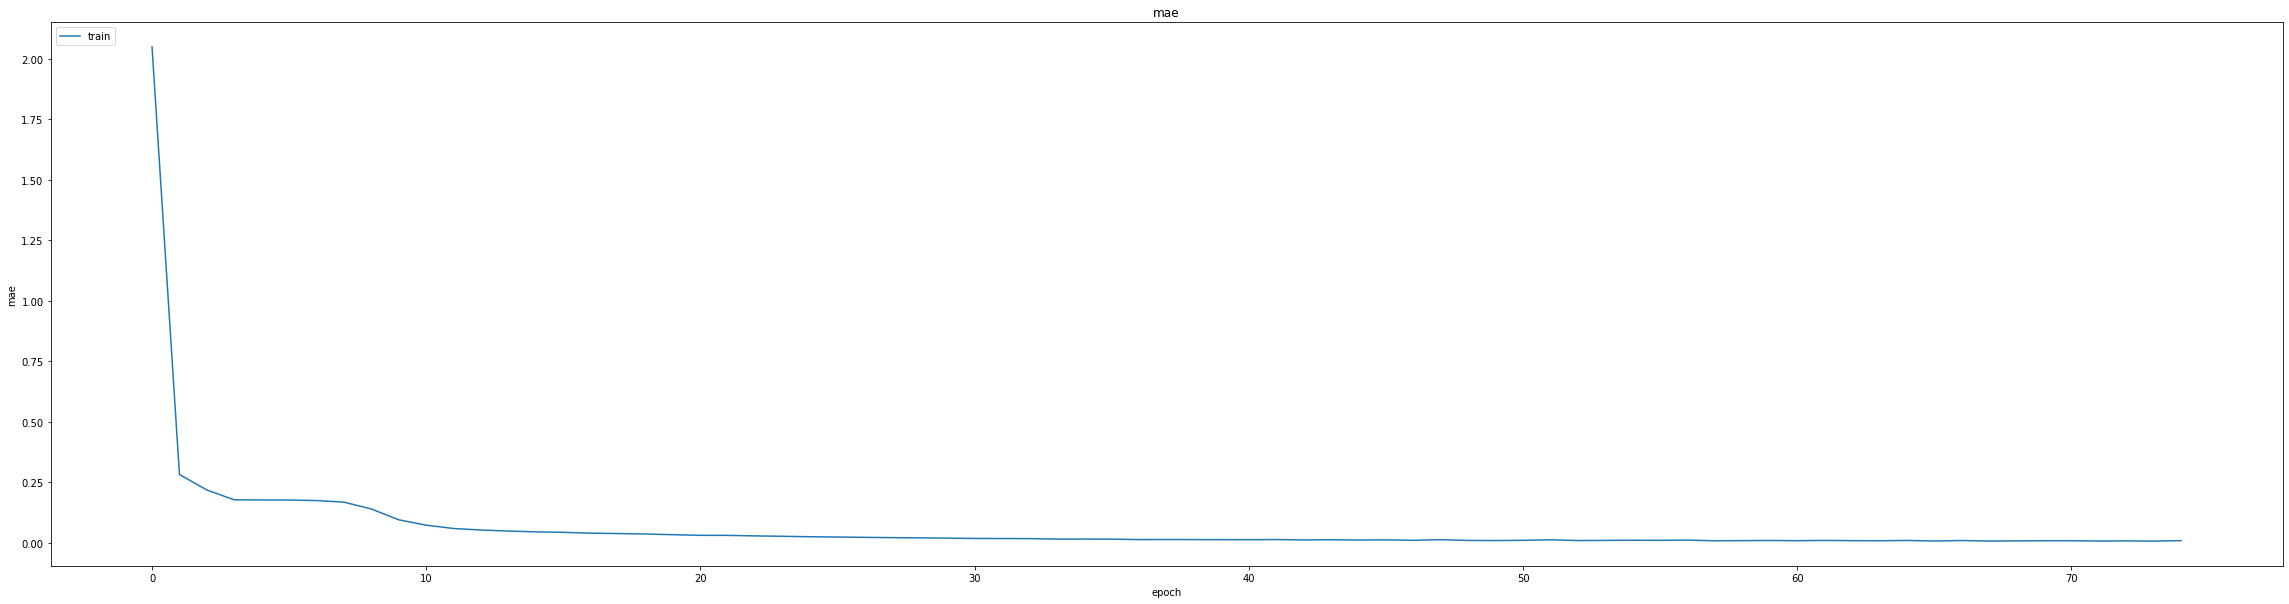

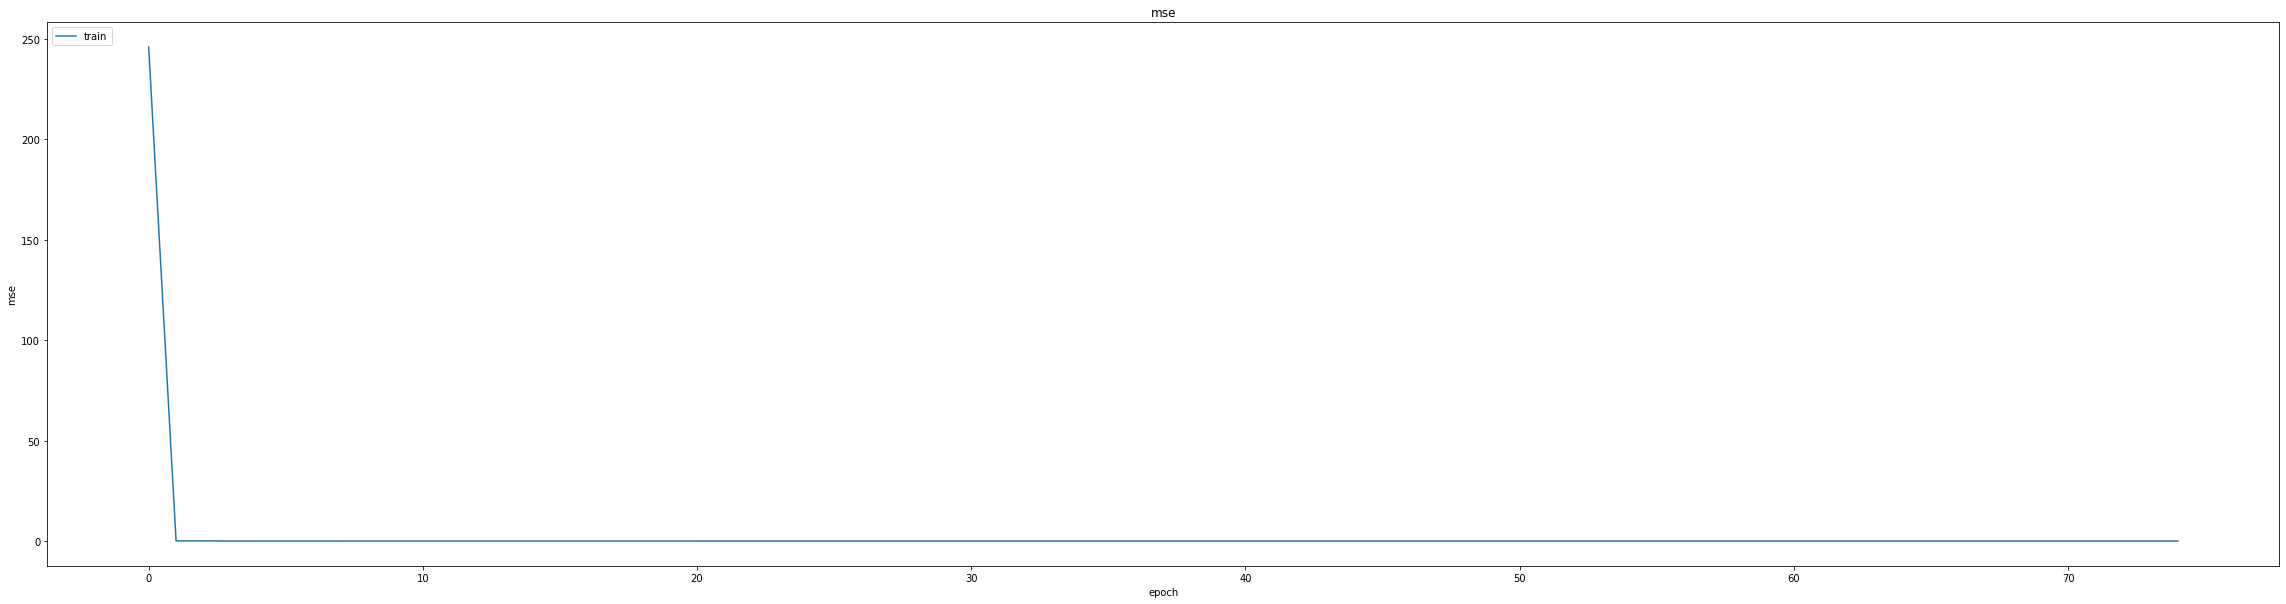

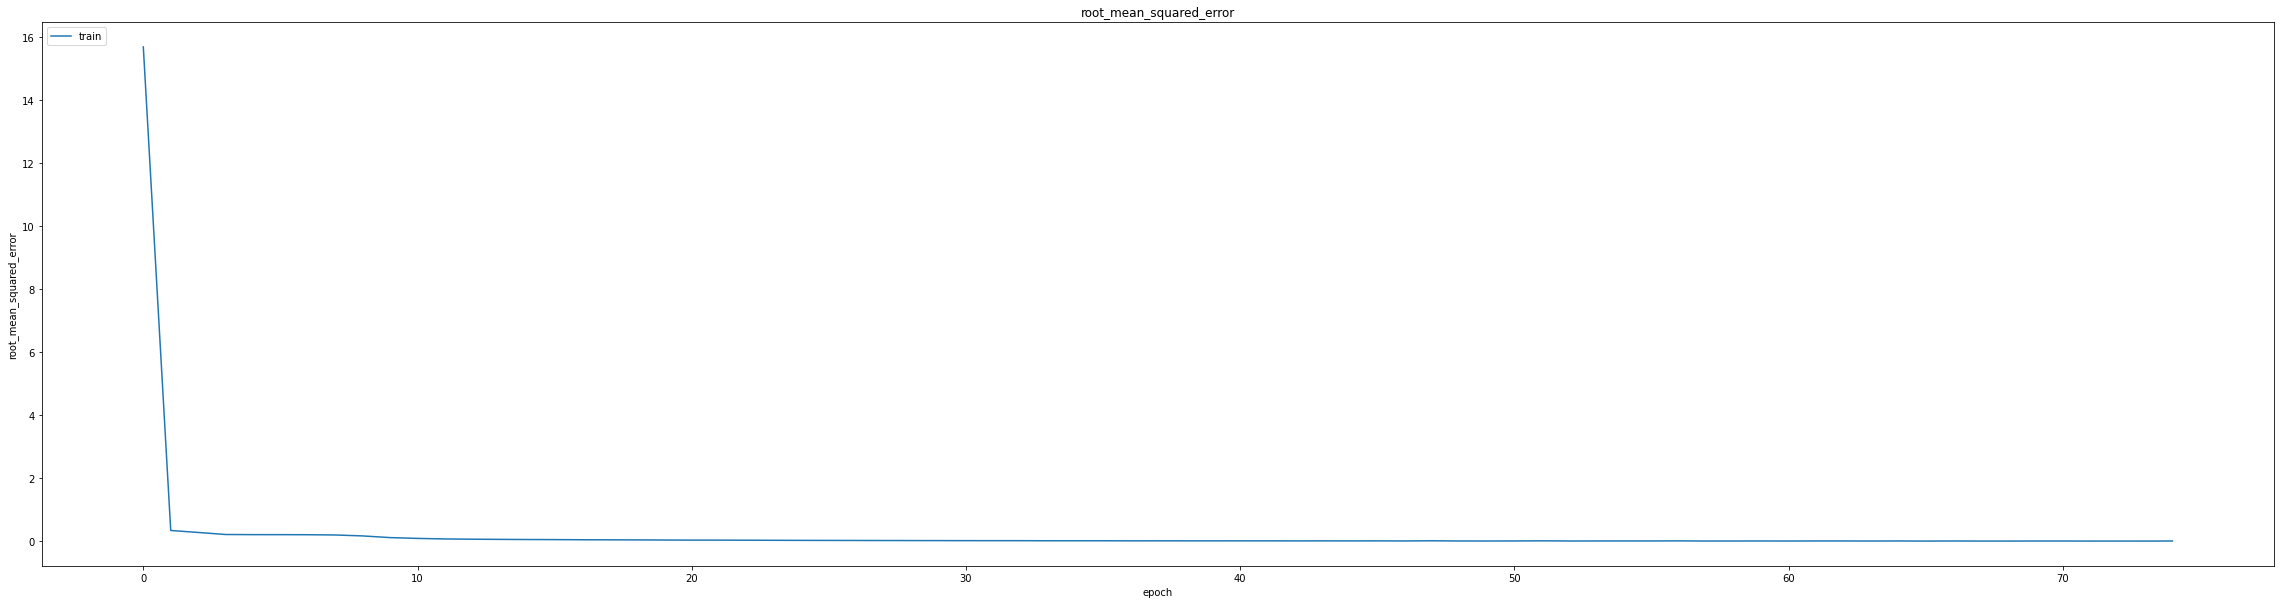

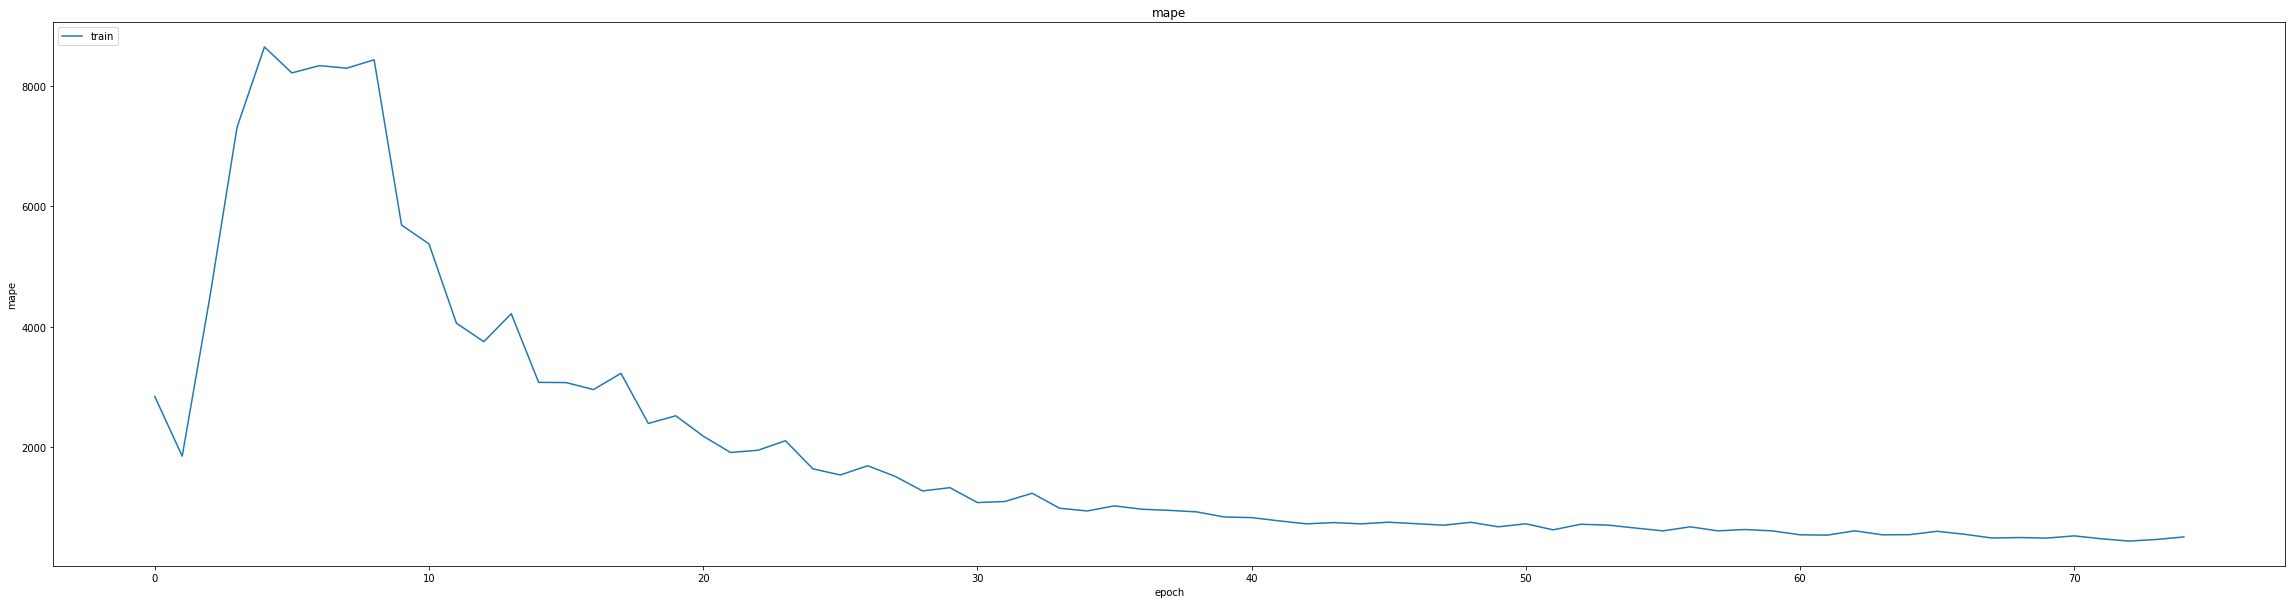

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012540561147034168
0.016392216086387634
464/464 [==============================] - 3s 4ms/step
0.9923674184977678


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0186 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 752.3332
Epoch 1: val_mse did not improve from 0.00027
348/348 [==============================] - 12s 23ms/step - loss: 0.0022 - mae: 0.0185 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 750.3820 - val_loss: 3.9839e-04 - val_mae: 0.0164 - val_mse: 3.9839e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 3919.7844 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 6.6787e-05 - mae: 0.0062 - mse: 6.6787e-05 - root_mean_squared_error: 0.0082 - mape: 701.1926
Epoch 2: val_mse improved from 0.00027 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 21s 60ms/step - loss: 6.6742e-05 - mae: 0.0062 - mse: 6.6742e-05 - root_mean_squared_error: 0.0082 - mape: 699.3835 - val_loss: 2.5751e-04 - val_mae: 0.0125 - val_mse: 2.5751e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 3412.9849 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
347/348 [============================>.] - ETA: 0s - loss: 5.8111e-05 - mae: 0.0058 - mse: 5.8111e-05 - root_mean_squared_error: 0.0076 - mape: 662.8573
Epoch 3: val_mse did not improve from 0.00026
348/348 [==============================] - 6s 17ms/step - loss: 5.8154e-05 - mae: 0.0058 - mse: 5.8154e-05 - root_mean_squared_error: 0.0076 - mape: 661.1412 - val_loss: 4.3764e-04 - val_mae: 0.0177 - val_mse: 4.3764e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 4208.4028 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 5.6264e-05 - mae: 0.0057 - mse: 5.6264e-05 - root_mean_squared_error: 0.0075 - mape: 614.36

348/348 [==============================] - 19s 54ms/step - loss: 5.6264e-05 - mae: 0.0057 - mse: 5.6264e-05 - root_mean_squared_error: 0.0075 - mape: 614.3617 - val_loss: 2.3011e-04 - val_mae: 0.0117 - val_mse: 2.3011e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3960.0071 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
347/348 [============================>.] - ETA: 0s - loss: 5.7032e-05 - mae: 0.0058 - mse: 5.7032e-05 - root_mean_squared_error: 0.0076 - mape: 591.6230
Epoch 5: val_mse did not improve from 0.00023
348/348 [==============================] - 5s 13ms/step - loss: 5.6994e-05 - mae: 0.0058 - mse: 5.6994e-05 - root_mean_squared_error: 0.0075 - mape: 590.0878 - val_loss: 2.9565e-04 - val_mae: 0.0139 - val_mse: 2.9565e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 3824.2048 - lr: 8.1000e-04
Epoch 6/25
346/348 [============================>.] - ETA: 0s - loss: 5.0921e-05 - mae: 0.0054 - mse: 5.0921e-05 - root_mean_squared_error: 0.0071 - mape: 59

348/348 [==============================] - 16s 46ms/step - loss: 5.1002e-05 - mae: 0.0054 - mse: 5.1002e-05 - root_mean_squared_error: 0.0071 - mape: 587.3557 - val_loss: 1.9621e-04 - val_mae: 0.0105 - val_mse: 1.9621e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3979.0659 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
346/348 [============================>.] - ETA: 0s - loss: 5.1942e-05 - mae: 0.0055 - mse: 5.1942e-05 - root_mean_squared_error: 0.0072 - mape: 569.6634
Epoch 7: val_mse did not improve from 0.00020
348/348 [==============================] - 5s 13ms/step - loss: 5.2121e-05 - mae: 0.0055 - mse: 5.2121e-05 - root_mean_squared_error: 0.0072 - mape: 566.5552 - val_loss: 5.4102e-04 - val_mae: 0.0204 - val_mse: 5.4102e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 4206.7305 - lr: 7.2900e-04
Epoch 8/25
346/348 [============================>.] - ETA: 0s - loss: 5.3212e-05 - mae: 0.0056 - mse: 5.3212e-05 - root_mean_squared_error: 0.0073 - mape: 57

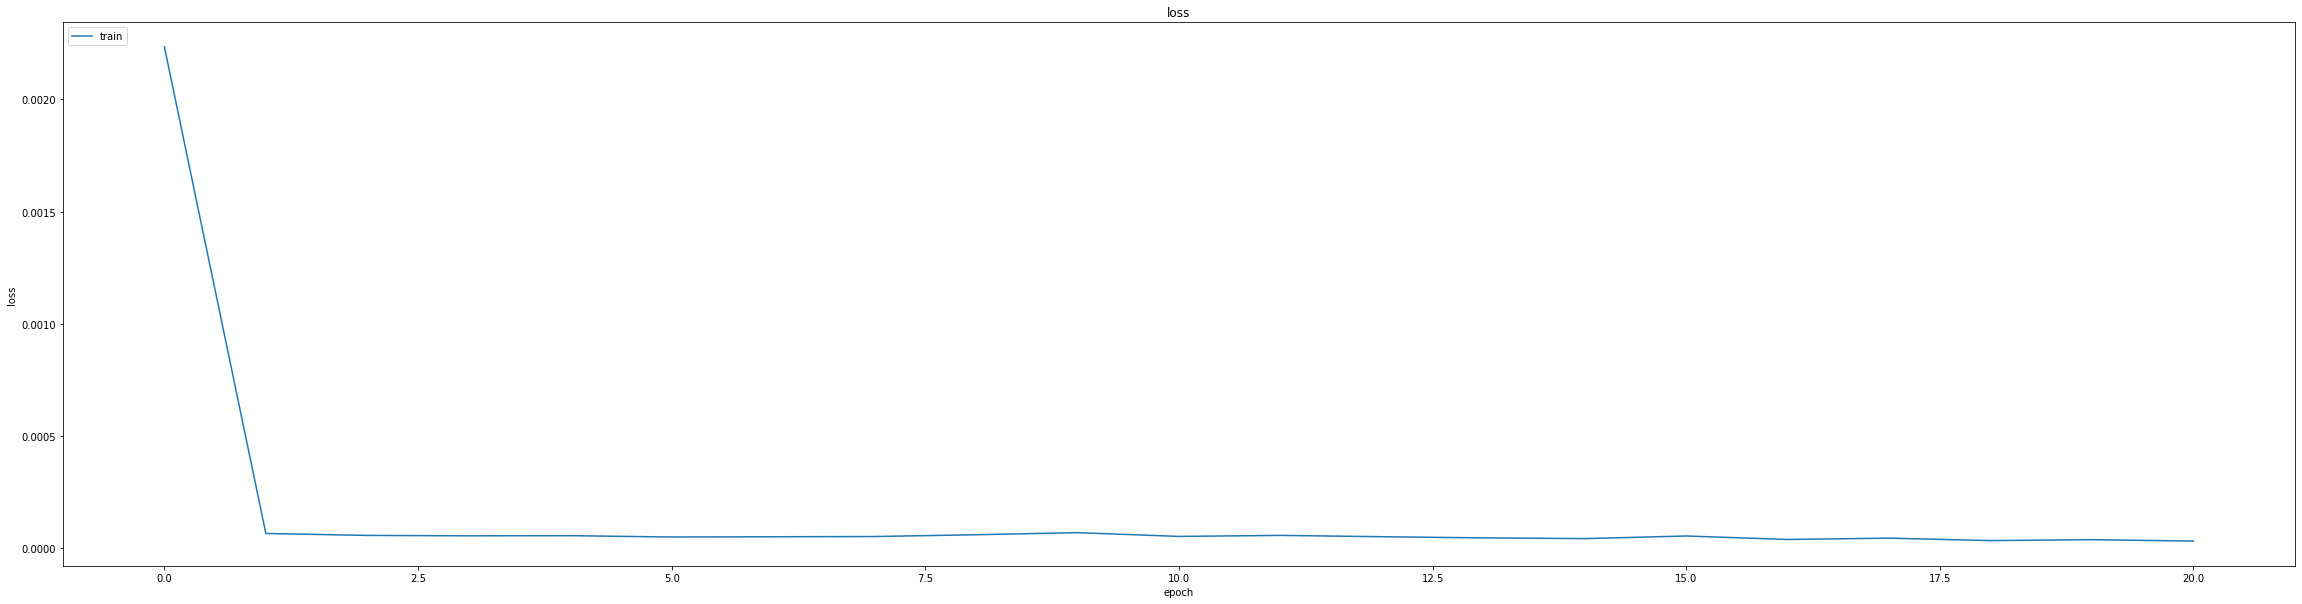

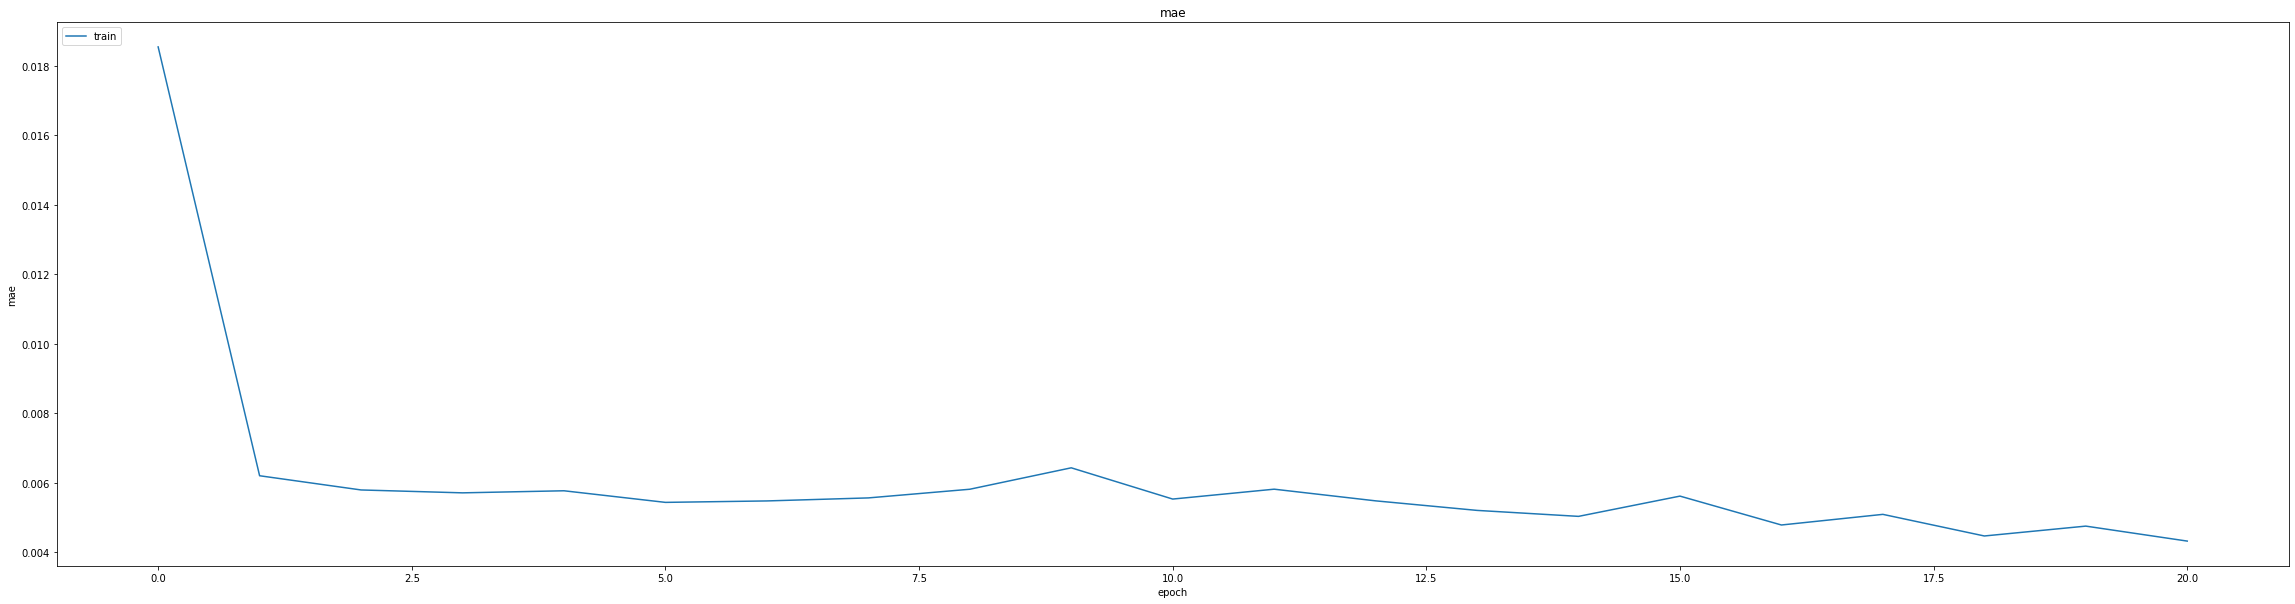

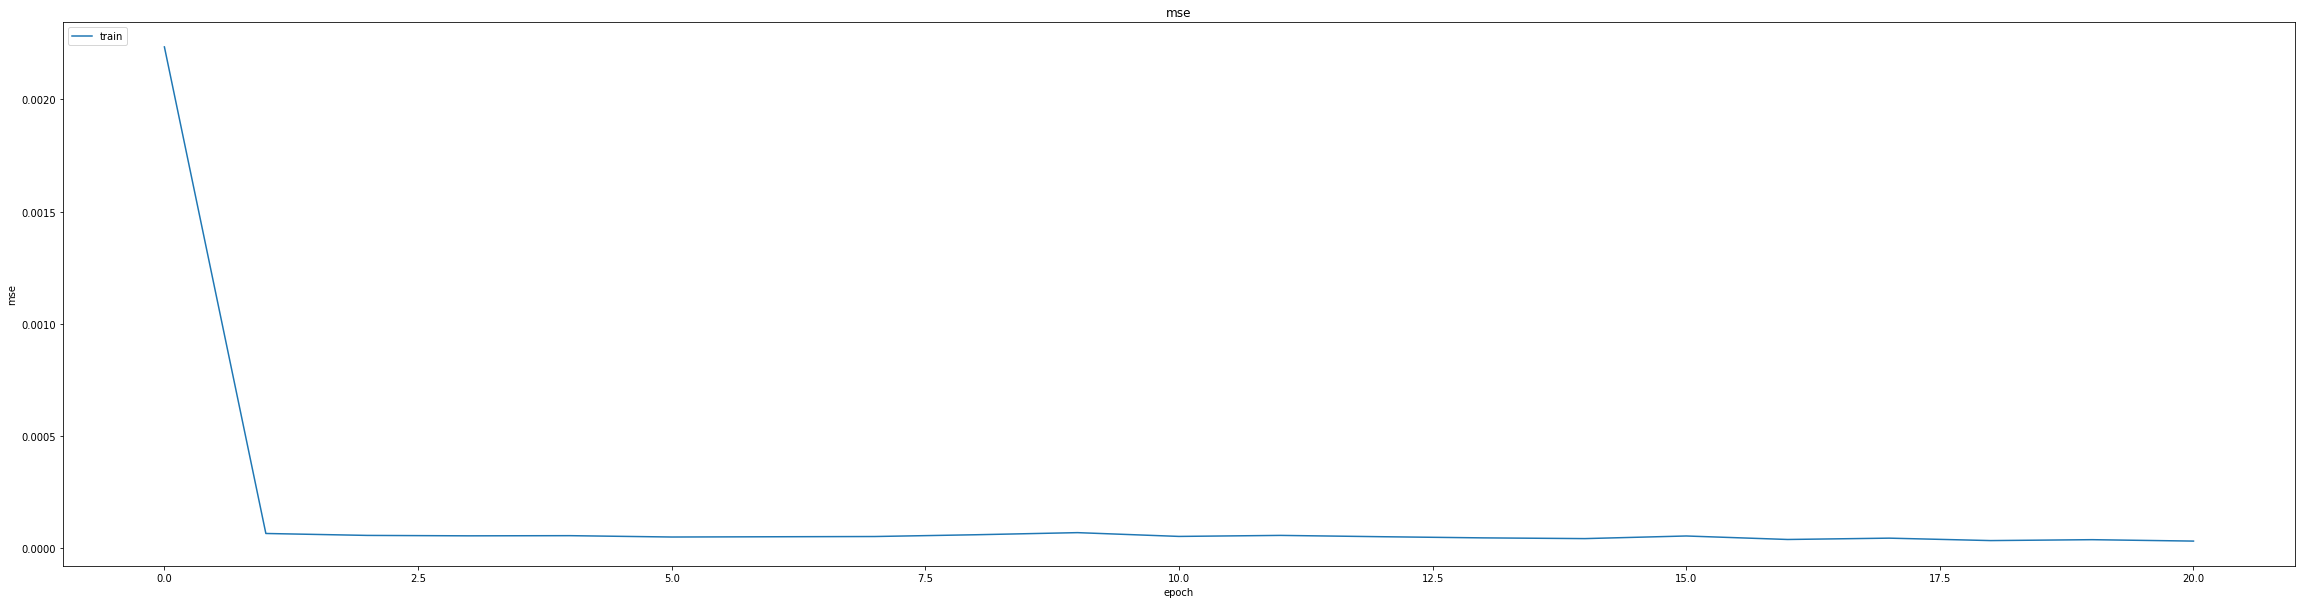

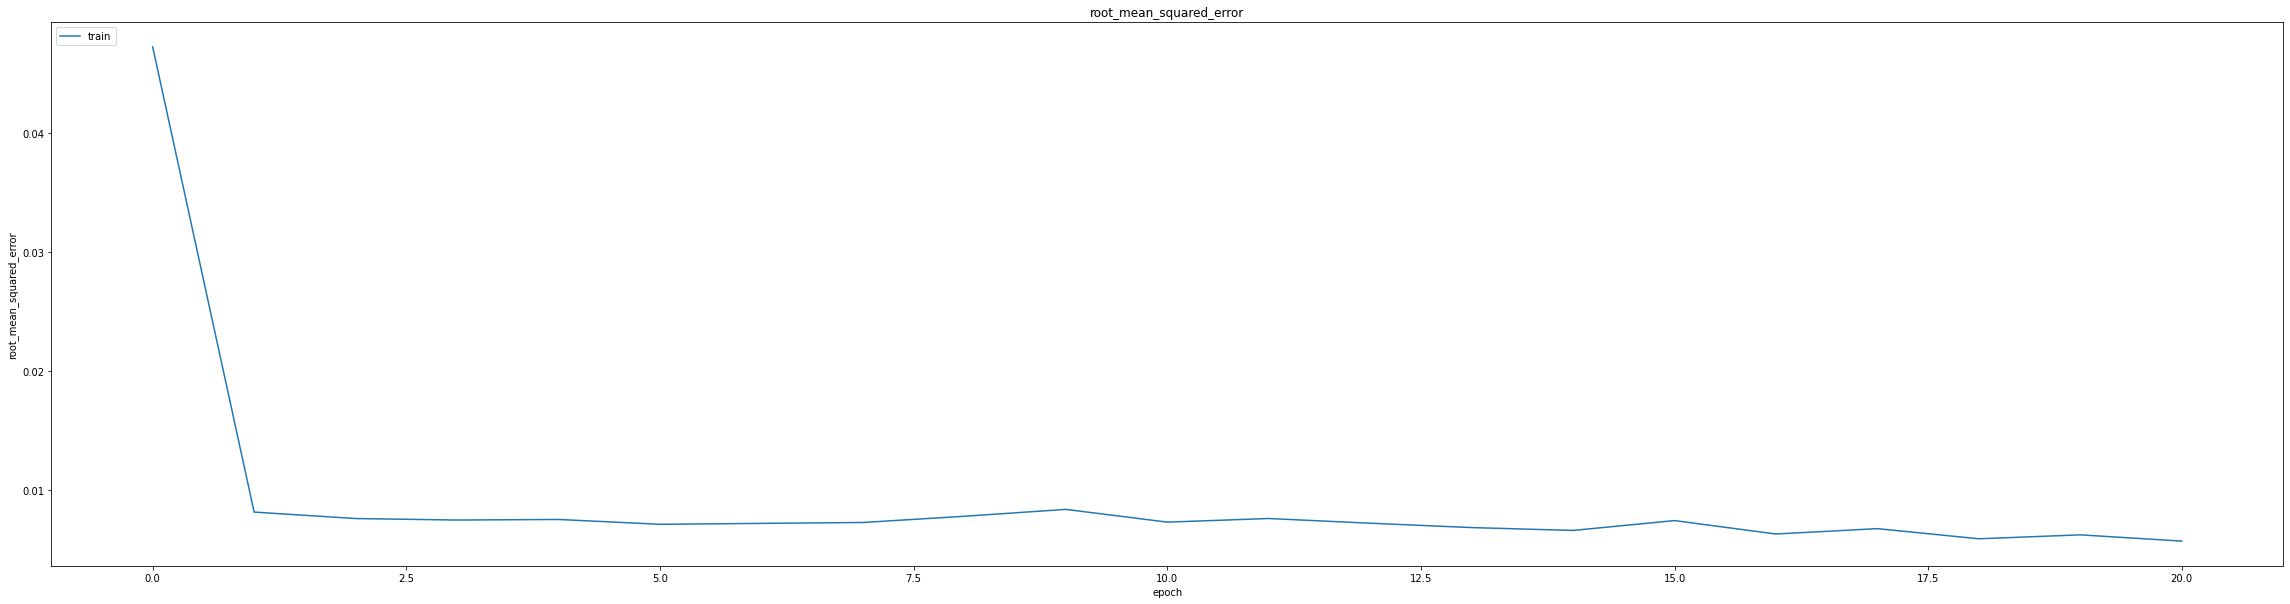

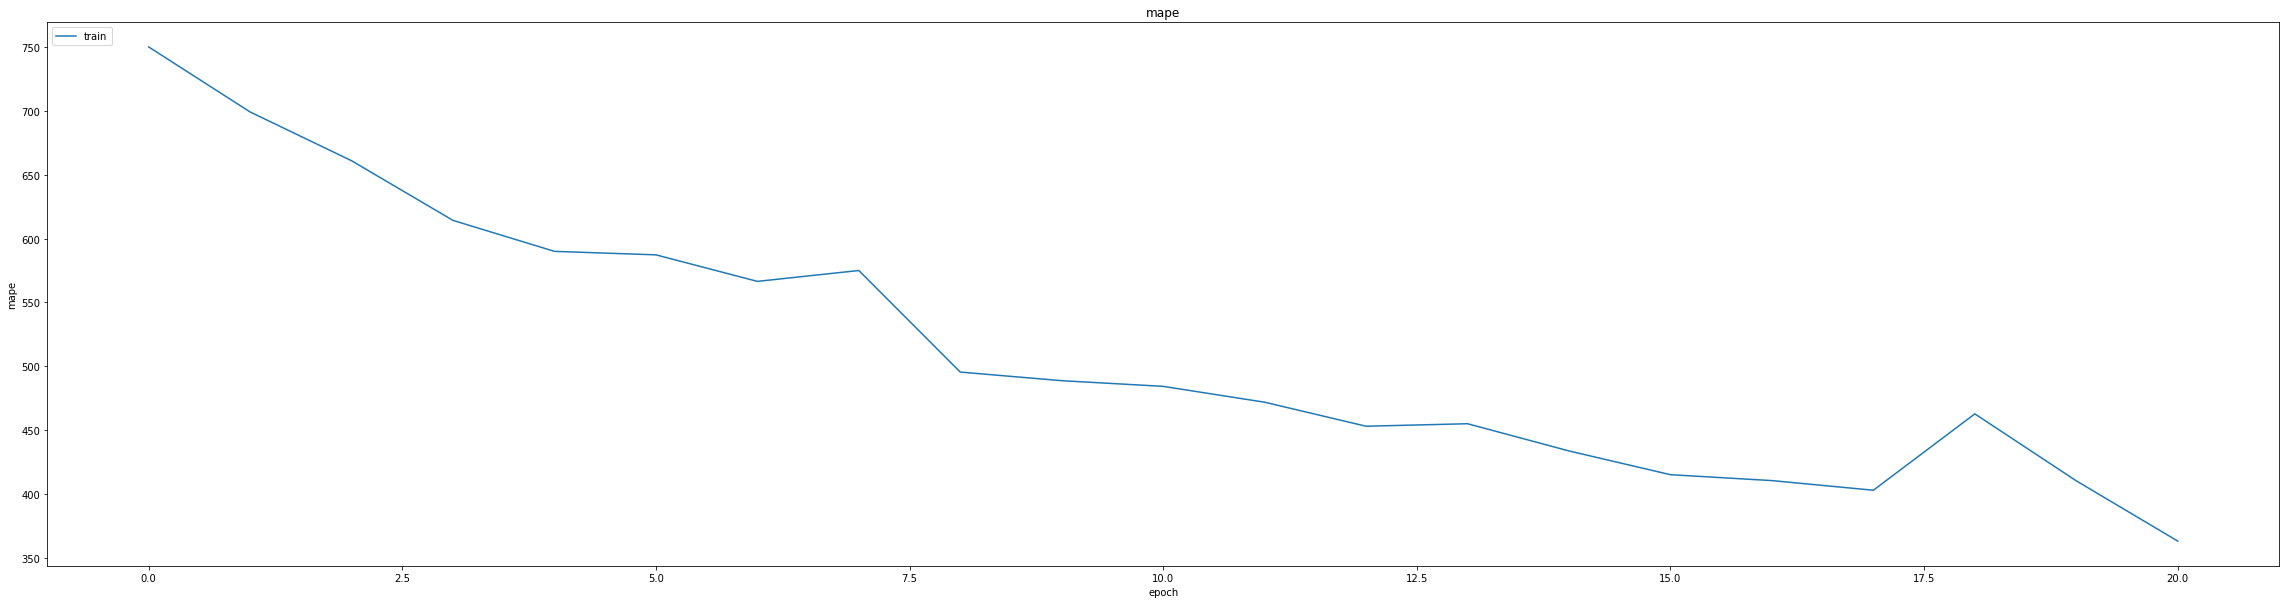

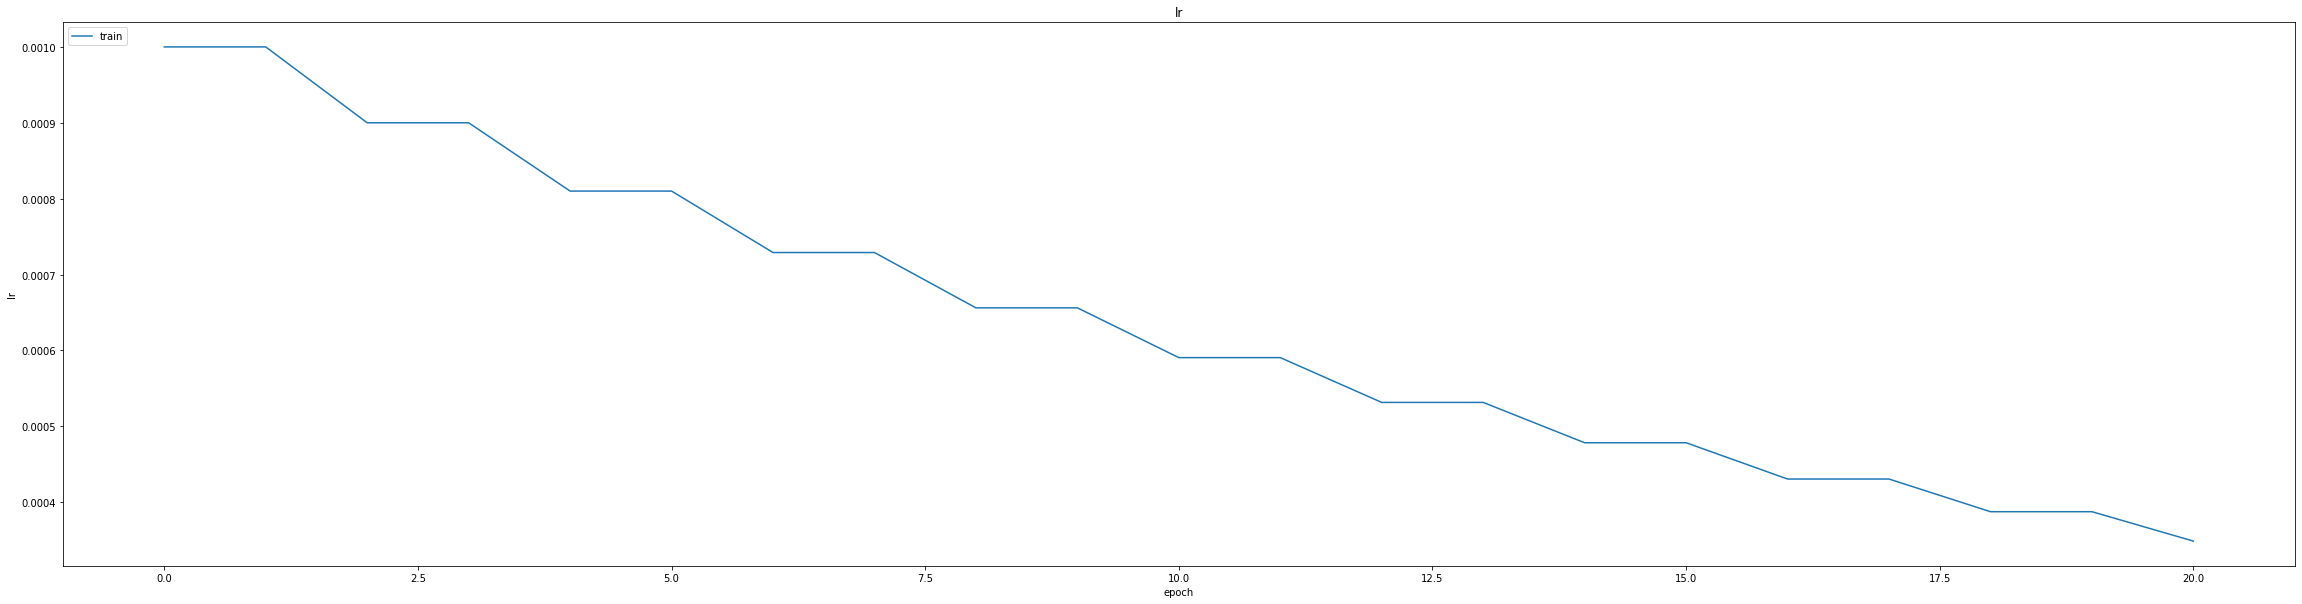

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01054964680224657
0.014007418416440487
464/464 [==============================] - 3s 4ms/step
0.9892135418403007


464/464 [==============================] - 2s 4ms/step


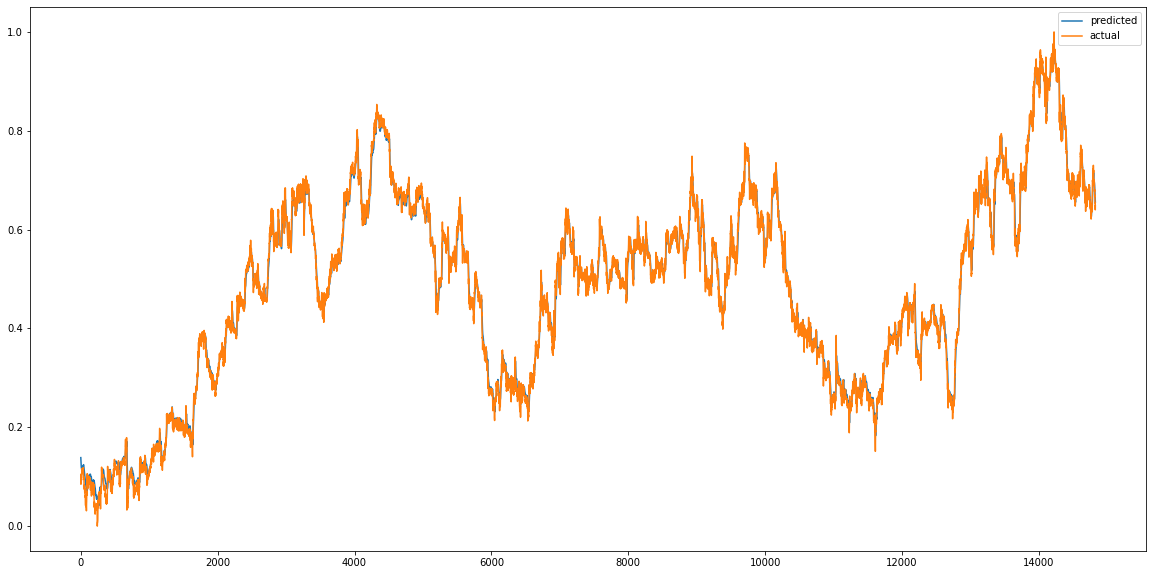

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


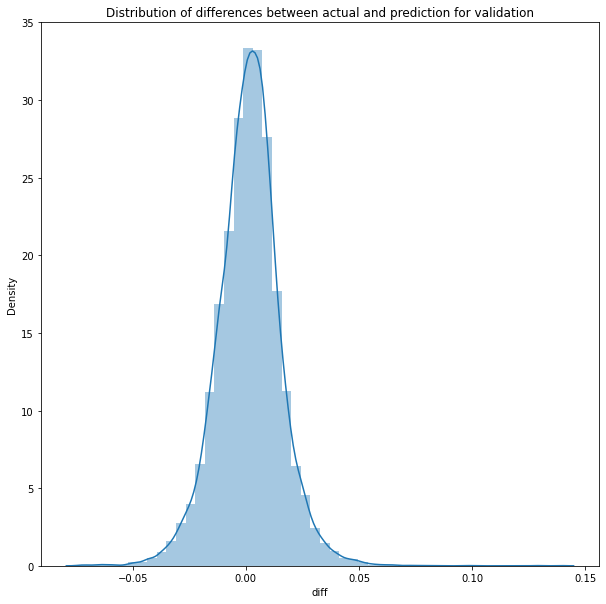

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


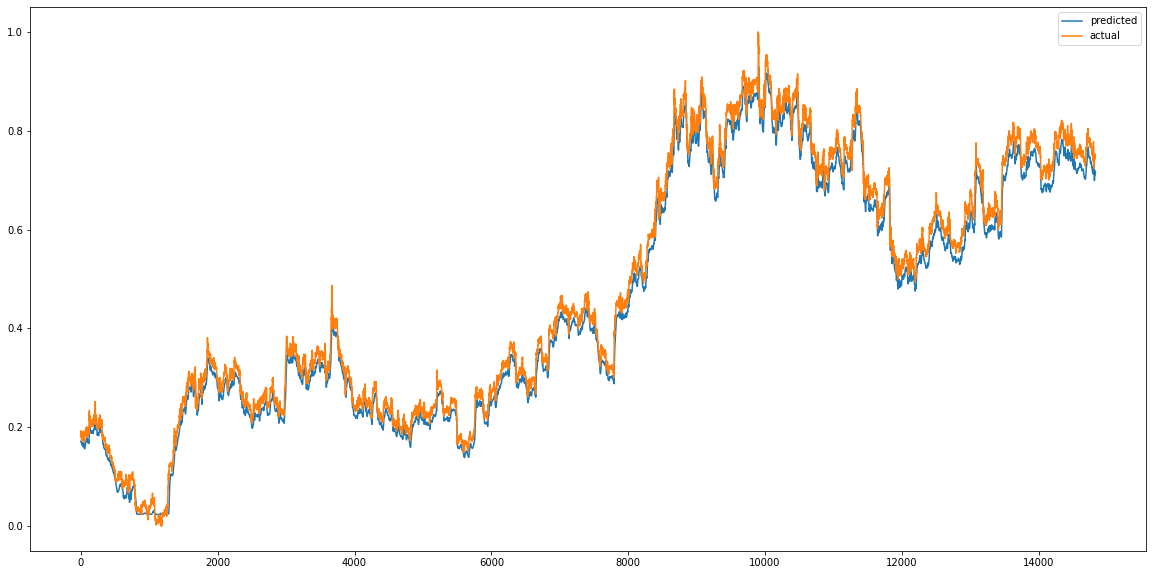

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


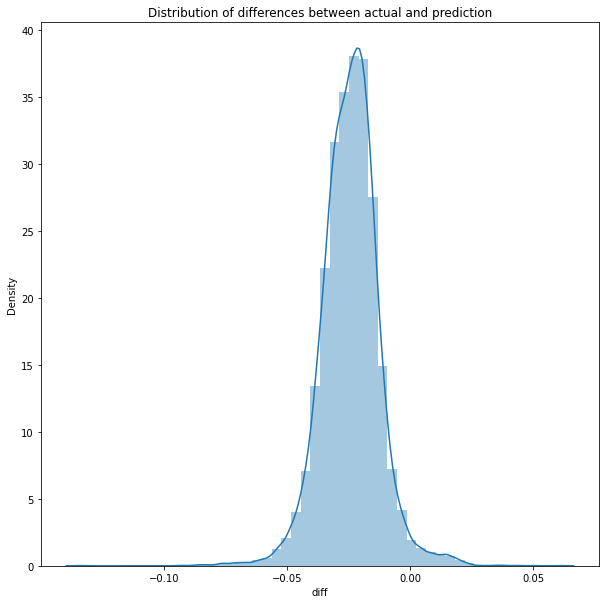

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0007215878744426021
RMSE :  0.026862387727873374
MAE :  0.024646265504593826
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9886445226790779


count    14828.000000
mean        -0.024200
std          0.011659
min         -0.134470
25%         -0.031169
50%         -0.023932
75%         -0.017417
max          0.061291
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 255.7301 - mae: 2.1512 - mse: 255.7301 - root_mean_squared_error: 15.9916 - mape: 1905.9744
Epoch 1: val_mse improved from inf to 0.23828, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 38s 84ms/step - loss: 255.7301 - mae: 2.1512 - mse: 255.7301 - root_mean_squared_error: 15.9916 - mape: 1905.9744 - val_loss: 0.2383 - val_mae: 0.4452 - val_mse: 0.2383 - val_root_mean_squared_error: 0.4881 - val_mape: 2646.1062
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0843 - mae: 0.2335 - mse: 0.0843 - root_mean_squared_error: 0.2904 - mape: 8062.0610
Epoch 2: val_mse improved from 0.23828 to 0.05567, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 79ms/step - loss: 0.0843 - mae: 0.2335 - mse: 0.0843 - root_mean_squared_error: 0.2904 - mape: 8062.0610 - val_loss: 0.0557 - val_mae: 0.1991 - val_mse: 0.0557 - val_root_mean_squared_error: 0.2360 - val_mape: 25312.6367
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0467 - mae: 0.1795 - mse: 0.0467 - root_mean_squared_error: 0.2160 - mape: 8380.4932
Epoch 3: val_mse improved from 0.05567 to 0.04873, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0467 - mae: 0.1795 - mse: 0.0467 - root_mean_squared_error: 0.2160 - mape: 8359.0850 - val_loss: 0.0487 - val_mae: 0.1859 - val_mse: 0.0487 - val_root_mean_squared_error: 0.2207 - val_mape: 24793.4180
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0347 - mae: 0.1534 - mse: 0.0347 - root_mean_squared_error: 0.1864 - mape: 7926.7471
Epoch 4: val_mse improved from 0.04873 to 0.01399, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0347 - mae: 0.1533 - mse: 0.0347 - root_mean_squared_error: 0.1863 - mape: 7906.5137 - val_loss: 0.0140 - val_mae: 0.0960 - val_mse: 0.0140 - val_root_mean_squared_error: 0.1183 - val_mape: 18202.5703
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0519 - mse: 0.0049 - root_mean_squared_error: 0.0702 - mape: 4044.0774
Epoch 5: val_mse improved from 0.01399 to 0.00109, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 0.0049 - mae: 0.0518 - mse: 0.0049 - root_mean_squared_error: 0.0701 - mape: 4022.3430 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 9434.3770
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0347 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 3316.1108
Epoch 6: val_mse improved from 0.00109 to 0.00076, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 0.0021 - mae: 0.0347 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 3307.5513 - val_loss: 7.6264e-04 - val_mae: 0.0216 - val_mse: 7.6264e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 8041.4038
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0311 - mse: 0.0017 - root_mean_squared_error: 0.0413 - mape: 2789.4834
Epoch 7: val_mse improved from 0.00076 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 79ms/step - loss: 0.0017 - mae: 0.0311 - mse: 0.0017 - root_mean_squared_error: 0.0413 - mape: 2789.4834 - val_loss: 7.2440e-04 - val_mae: 0.0212 - val_mse: 7.2440e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 7182.1079
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 2206.7593
Epoch 8: val_mse improved from 0.00072 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 2194.7817 - val_loss: 7.2186e-04 - val_mae: 0.0215 - val_mse: 7.2186e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 6699.3643
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1861.0703
Epoch 9: val_mse did not improve from 0.00072
348/348 [==============================] - 6s 16ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1850.9445 - val_loss: 7.8261e-04 - val_mae: 0.0226 - val_mse: 7.8261e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 6252.6128
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 2292.3298
Epoch 10: val_mse improved from 0.00072 to 0.00065, saving model to /content/drive/MyDrive

348/348 [==============================] - 28s 81ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 2279.8813 - val_loss: 6.4800e-04 - val_mae: 0.0201 - val_mse: 6.4800e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 5841.7925
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1777.9818
Epoch 11: val_mse improved from 0.00065 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1777.9818 - val_loss: 6.0860e-04 - val_mae: 0.0194 - val_mse: 6.0860e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 5377.1323
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 8.8413e-04 - mae: 0.0225 - mse: 8.8413e-04 - root_mean_squared_error: 0.0297 - mape: 1528.8219
Epoch 12: val_mse improved from 0.00061 to 0.00055, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 79ms/step - loss: 8.8419e-04 - mae: 0.0225 - mse: 8.8419e-04 - root_mean_squared_error: 0.0297 - mape: 1524.8862 - val_loss: 5.4959e-04 - val_mae: 0.0182 - val_mse: 5.4959e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 4999.8291
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 7.8634e-04 - mae: 0.0213 - mse: 7.8634e-04 - root_mean_squared_error: 0.0280 - mape: 1389.4734
Epoch 13: val_mse did not improve from 0.00055
348/348 [==============================] - 6s 16ms/step - loss: 7.8594e-04 - mae: 0.0213 - mse: 7.8594e-04 - root_mean_squared_error: 0.0280 - mape: 1381.9175 - val_loss: 6.3109e-04 - val_mae: 0.0202 - val_mse: 6.3109e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 4877.8159
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 7.0779e-04 - mae: 0.0202 - mse: 7.0779e-04 - root_mean_squared_error: 0.0266 - mape: 1471.4996
Epoch 14: val_mse did not improve from 0.00055
348/348 [

348/348 [==============================] - 28s 82ms/step - loss: 6.2950e-04 - mae: 0.0191 - mse: 6.2950e-04 - root_mean_squared_error: 0.0251 - mape: 1290.7161 - val_loss: 5.4299e-04 - val_mae: 0.0187 - val_mse: 5.4299e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 4522.7812
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 5.5079e-04 - mae: 0.0179 - mse: 5.5079e-04 - root_mean_squared_error: 0.0235 - mape: 1166.3212
Epoch 16: val_mse improved from 0.00054 to 0.00047, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 79ms/step - loss: 5.5079e-04 - mae: 0.0179 - mse: 5.5079e-04 - root_mean_squared_error: 0.0235 - mape: 1166.3212 - val_loss: 4.7097e-04 - val_mae: 0.0172 - val_mse: 4.7097e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 4353.6333
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 4.9679e-04 - mae: 0.0171 - mse: 4.9679e-04 - root_mean_squared_error: 0.0223 - mape: 1200.3026
Epoch 17: val_mse did not improve from 0.00047
348/348 [==============================] - 5s 16ms/step - loss: 4.9677e-04 - mae: 0.0171 - mse: 4.9677e-04 - root_mean_squared_error: 0.0223 - mape: 1190.3639 - val_loss: 5.0158e-04 - val_mae: 0.0181 - val_mse: 5.0158e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 4301.4111
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 4.3805e-04 - mae: 0.0160 - mse: 4.3805e-04 - root_mean_squared_error: 0.0209 - mape: 1082.0908
Epoch 18: val_mse improved from 0.00047 to 0.00047, savi

348/348 [==============================] - 29s 83ms/step - loss: 4.3805e-04 - mae: 0.0160 - mse: 4.3805e-04 - root_mean_squared_error: 0.0209 - mape: 1082.0908 - val_loss: 4.6803e-04 - val_mae: 0.0174 - val_mse: 4.6803e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 4115.3198
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 3.9457e-04 - mae: 0.0152 - mse: 3.9457e-04 - root_mean_squared_error: 0.0199 - mape: 1022.3088
Epoch 19: val_mse improved from 0.00047 to 0.00039, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 3.9465e-04 - mae: 0.0152 - mse: 3.9465e-04 - root_mean_squared_error: 0.0199 - mape: 1019.6796 - val_loss: 3.9060e-04 - val_mae: 0.0155 - val_mse: 3.9060e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3887.5579
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 3.5339e-04 - mae: 0.0144 - mse: 3.5339e-04 - root_mean_squared_error: 0.0188 - mape: 919.6084
Epoch 20: val_mse did not improve from 0.00039
348/348 [==============================] - 6s 16ms/step - loss: 3.5339e-04 - mae: 0.0144 - mse: 3.5339e-04 - root_mean_squared_error: 0.0188 - mape: 919.6084 - val_loss: 4.1597e-04 - val_mae: 0.0164 - val_mse: 4.1597e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 3897.7007
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 3.1955e-04 - mae: 0.0137 - mse: 3.1955e-04 - root_mean_squared_error: 0.0179 - mape: 939.7959
Epoch 21: val_mse did not improve from 0.00039
348/348 [===

348/348 [==============================] - 29s 83ms/step - loss: 2.8765e-04 - mae: 0.0129 - mse: 2.8765e-04 - root_mean_squared_error: 0.0170 - mape: 995.0111 - val_loss: 3.8327e-04 - val_mae: 0.0156 - val_mse: 3.8327e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 3607.8540
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 2.5715e-04 - mae: 0.0123 - mse: 2.5715e-04 - root_mean_squared_error: 0.0160 - mape: 1043.7814
Epoch 23: val_mse improved from 0.00038 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 2.5681e-04 - mae: 0.0123 - mse: 2.5681e-04 - root_mean_squared_error: 0.0160 - mape: 1035.1171 - val_loss: 3.6159e-04 - val_mae: 0.0151 - val_mse: 3.6159e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3515.6470
Epoch 24/75
345/348 [============================>.] - ETA: 0s - loss: 2.3214e-04 - mae: 0.0117 - mse: 2.3214e-04 - root_mean_squared_error: 0.0152 - mape: 942.6849
Epoch 24: val_mse improved from 0.00036 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 2.3197e-04 - mae: 0.0117 - mse: 2.3197e-04 - root_mean_squared_error: 0.0152 - mape: 934.8708 - val_loss: 3.6040e-04 - val_mae: 0.0150 - val_mse: 3.6040e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3363.2981
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 2.0594e-04 - mae: 0.0110 - mse: 2.0594e-04 - root_mean_squared_error: 0.0144 - mape: 857.2296
Epoch 25: val_mse improved from 0.00036 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 2.0607e-04 - mae: 0.0110 - mse: 2.0607e-04 - root_mean_squared_error: 0.0144 - mape: 852.5691 - val_loss: 3.6007e-04 - val_mae: 0.0150 - val_mse: 3.6007e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3347.9016
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 1.8838e-04 - mae: 0.0106 - mse: 1.8838e-04 - root_mean_squared_error: 0.0137 - mape: 741.3636
Epoch 26: val_mse improved from 0.00036 to 0.00034, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 1.8859e-04 - mae: 0.0106 - mse: 1.8859e-04 - root_mean_squared_error: 0.0137 - mape: 735.2332 - val_loss: 3.3838e-04 - val_mae: 0.0143 - val_mse: 3.3838e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3234.7012
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 1.8295e-04 - mae: 0.0103 - mse: 1.8295e-04 - root_mean_squared_error: 0.0135 - mape: 709.6394
Epoch 27: val_mse did not improve from 0.00034
348/348 [==============================] - 7s 19ms/step - loss: 1.8295e-04 - mae: 0.0103 - mse: 1.8295e-04 - root_mean_squared_error: 0.0135 - mape: 709.6394 - val_loss: 3.6329e-04 - val_mae: 0.0148 - val_mse: 3.6329e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 3200.5374
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 1.6446e-04 - mae: 0.0098 - mse: 1.6446e-04 - root_mean_squared_error: 0.0128 - mape: 743.6913
Epoch 28: val_mse did not improve from 0.00034
348/348 [====

348/348 [==============================] - 28s 79ms/step - loss: 1.4972e-04 - mae: 0.0094 - mse: 1.4972e-04 - root_mean_squared_error: 0.0122 - mape: 742.2675 - val_loss: 3.3818e-04 - val_mae: 0.0146 - val_mse: 3.3818e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3189.8521
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 1.4095e-04 - mae: 0.0091 - mse: 1.4095e-04 - root_mean_squared_error: 0.0119 - mape: 745.9082
Epoch 30: val_mse did not improve from 0.00034
348/348 [==============================] - 6s 16ms/step - loss: 1.4095e-04 - mae: 0.0091 - mse: 1.4095e-04 - root_mean_squared_error: 0.0119 - mape: 745.9082 - val_loss: 3.4904e-04 - val_mae: 0.0146 - val_mse: 3.4904e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3107.8804
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 1.2903e-04 - mae: 0.0087 - mse: 1.2903e-04 - root_mean_squared_error: 0.0114 - mape: 679.0411
Epoch 31: val_mse did not improve from 0.00034
348/348 [====

348/348 [==============================] - 28s 79ms/step - loss: 1.1386e-04 - mae: 0.0082 - mse: 1.1386e-04 - root_mean_squared_error: 0.0107 - mape: 649.0579 - val_loss: 3.2792e-04 - val_mae: 0.0145 - val_mse: 3.2792e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 2941.9634
Epoch 34/75
348/348 [==============================] - ETA: 0s - loss: 1.0598e-04 - mae: 0.0079 - mse: 1.0598e-04 - root_mean_squared_error: 0.0103 - mape: 719.2142
Epoch 34: val_mse did not improve from 0.00033
348/348 [==============================] - 6s 17ms/step - loss: 1.0598e-04 - mae: 0.0079 - mse: 1.0598e-04 - root_mean_squared_error: 0.0103 - mape: 719.2142 - val_loss: 3.5843e-04 - val_mae: 0.0153 - val_mse: 3.5843e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2923.0076
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 9.8763e-05 - mae: 0.0076 - mse: 9.8763e-05 - root_mean_squared_error: 0.0099 - mape: 606.6921
Epoch 35: val_mse did not improve from 0.00033
348/348 [====

348/348 [==============================] - 29s 83ms/step - loss: 8.7780e-05 - mae: 0.0072 - mse: 8.7780e-05 - root_mean_squared_error: 0.0094 - mape: 613.9008 - val_loss: 2.9957e-04 - val_mae: 0.0136 - val_mse: 2.9957e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2681.2632
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 8.3673e-05 - mae: 0.0070 - mse: 8.3673e-05 - root_mean_squared_error: 0.0091 - mape: 516.8104
Epoch 39: val_mse did not improve from 0.00030
348/348 [==============================] - 7s 20ms/step - loss: 8.3660e-05 - mae: 0.0070 - mse: 8.3660e-05 - root_mean_squared_error: 0.0091 - mape: 515.4714 - val_loss: 3.5197e-04 - val_mae: 0.0153 - val_mse: 3.5197e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 2944.9514
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 7.6905e-05 - mae: 0.0067 - mse: 7.6905e-05 - root_mean_squared_error: 0.0088 - mape: 528.3013
Epoch 40: val_mse did not improve from 0.00030
348/348 [====

348/348 [==============================] - 30s 87ms/step - loss: 9.7833e-05 - mae: 0.0073 - mse: 9.7833e-05 - root_mean_squared_error: 0.0099 - mape: 468.6735 - val_loss: 2.6548e-04 - val_mae: 0.0128 - val_mse: 2.6548e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3074.0544
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 6.1548e-05 - mae: 0.0060 - mse: 6.1548e-05 - root_mean_squared_error: 0.0078 - mape: 504.3942
Epoch 49: val_mse did not improve from 0.00027
348/348 [==============================] - 6s 18ms/step - loss: 6.1827e-05 - mae: 0.0060 - mse: 6.1827e-05 - root_mean_squared_error: 0.0079 - mape: 501.6458 - val_loss: 3.4757e-04 - val_mae: 0.0155 - val_mse: 3.4757e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 3482.0208
Epoch 50/75
345/348 [============================>.] - ETA: 0s - loss: 7.9858e-05 - mae: 0.0066 - mse: 7.9858e-05 - root_mean_squared_error: 0.0089 - mape: 434.2564
Epoch 50: val_mse did not improve from 0.00027
348/348 [====

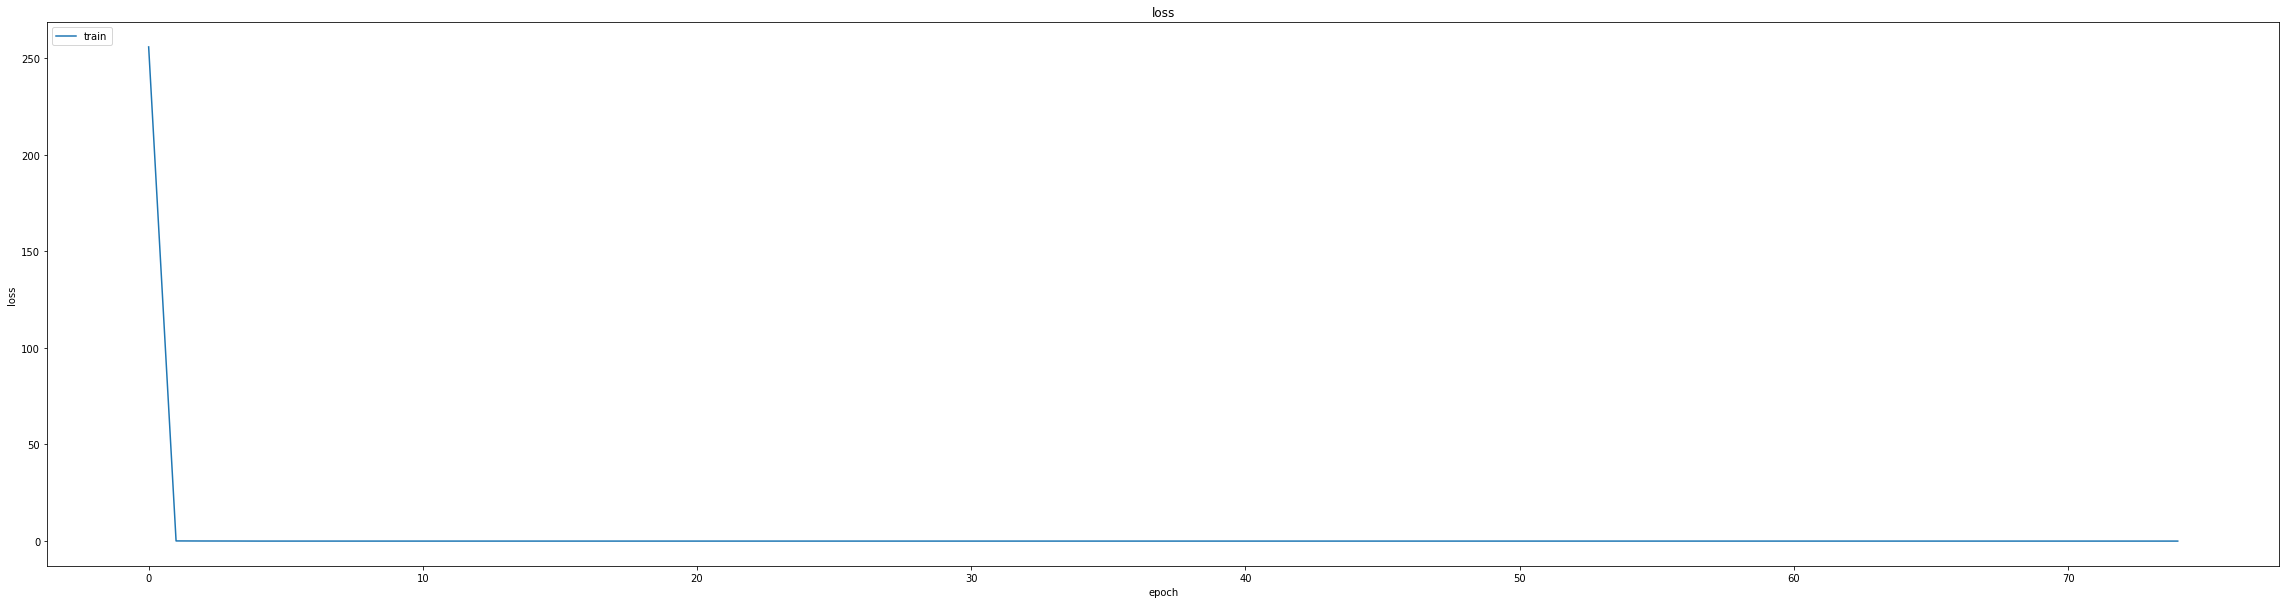

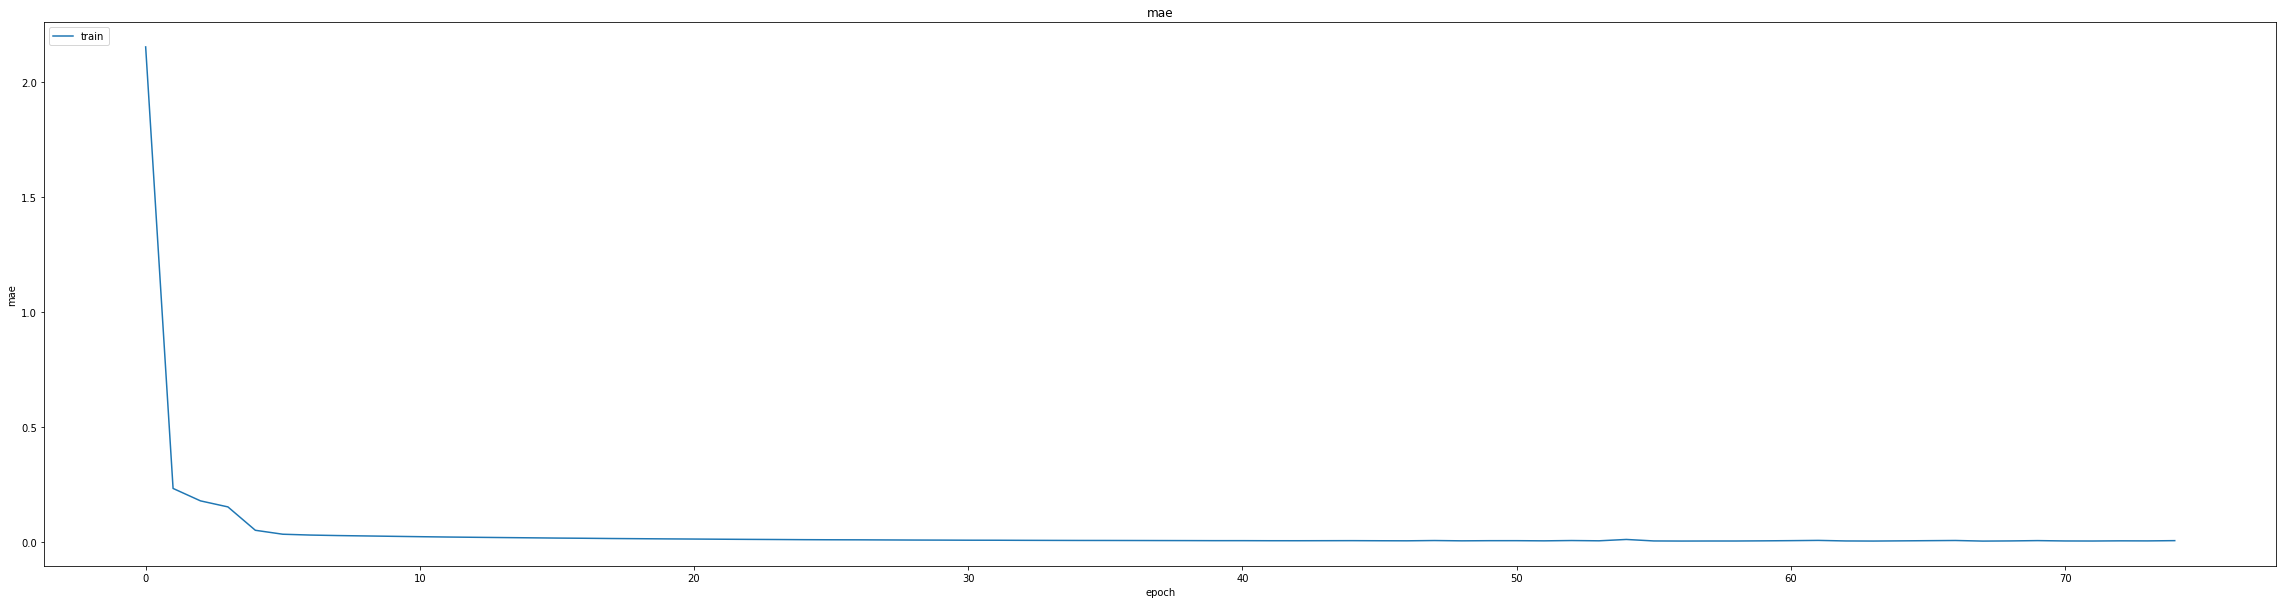

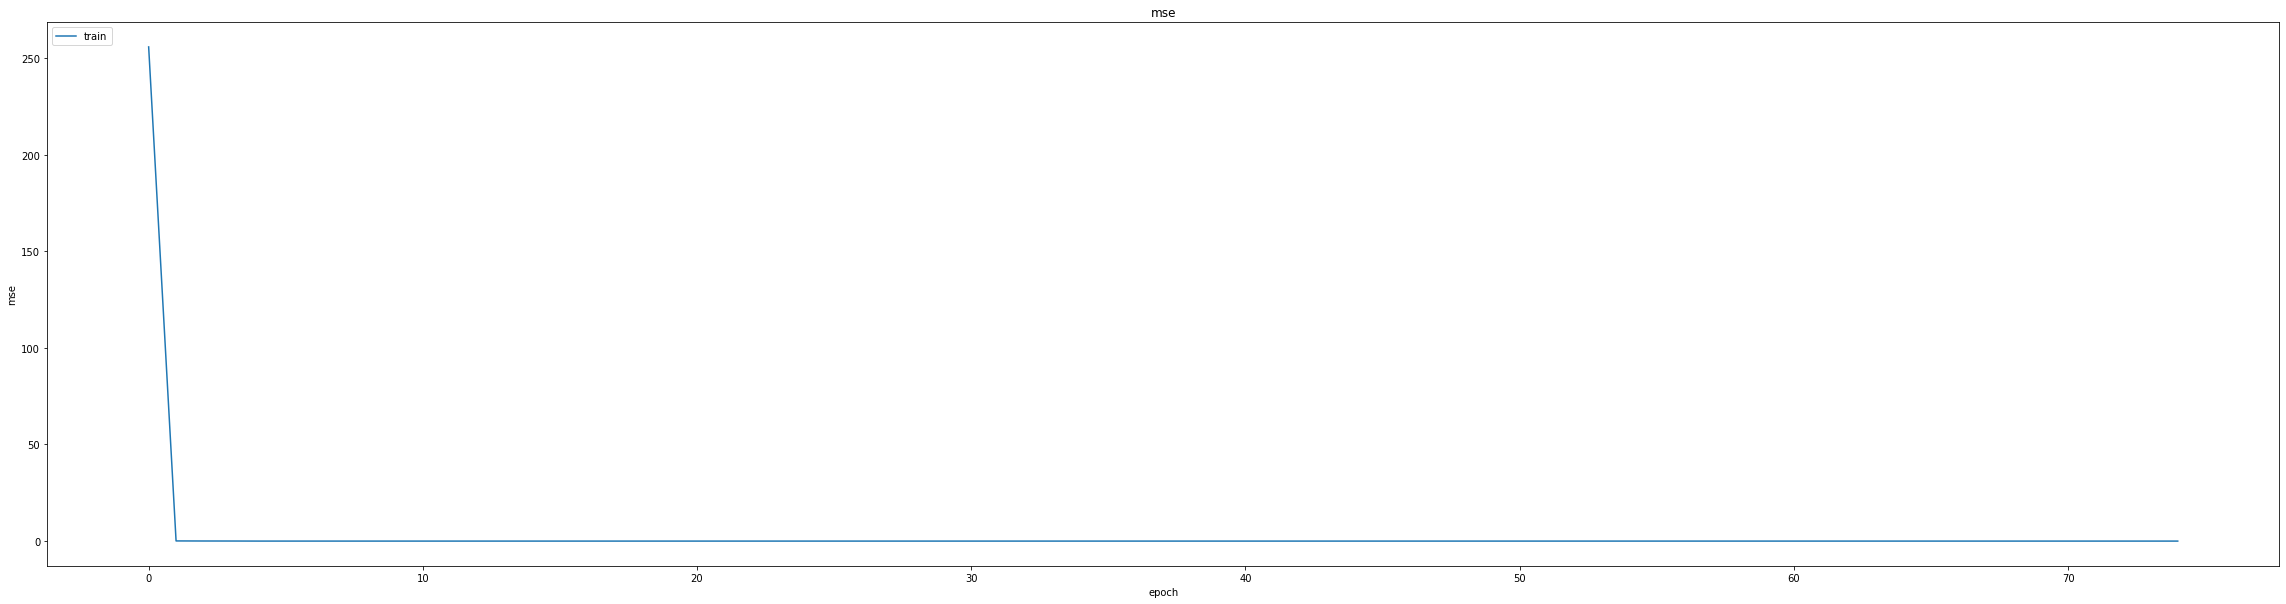

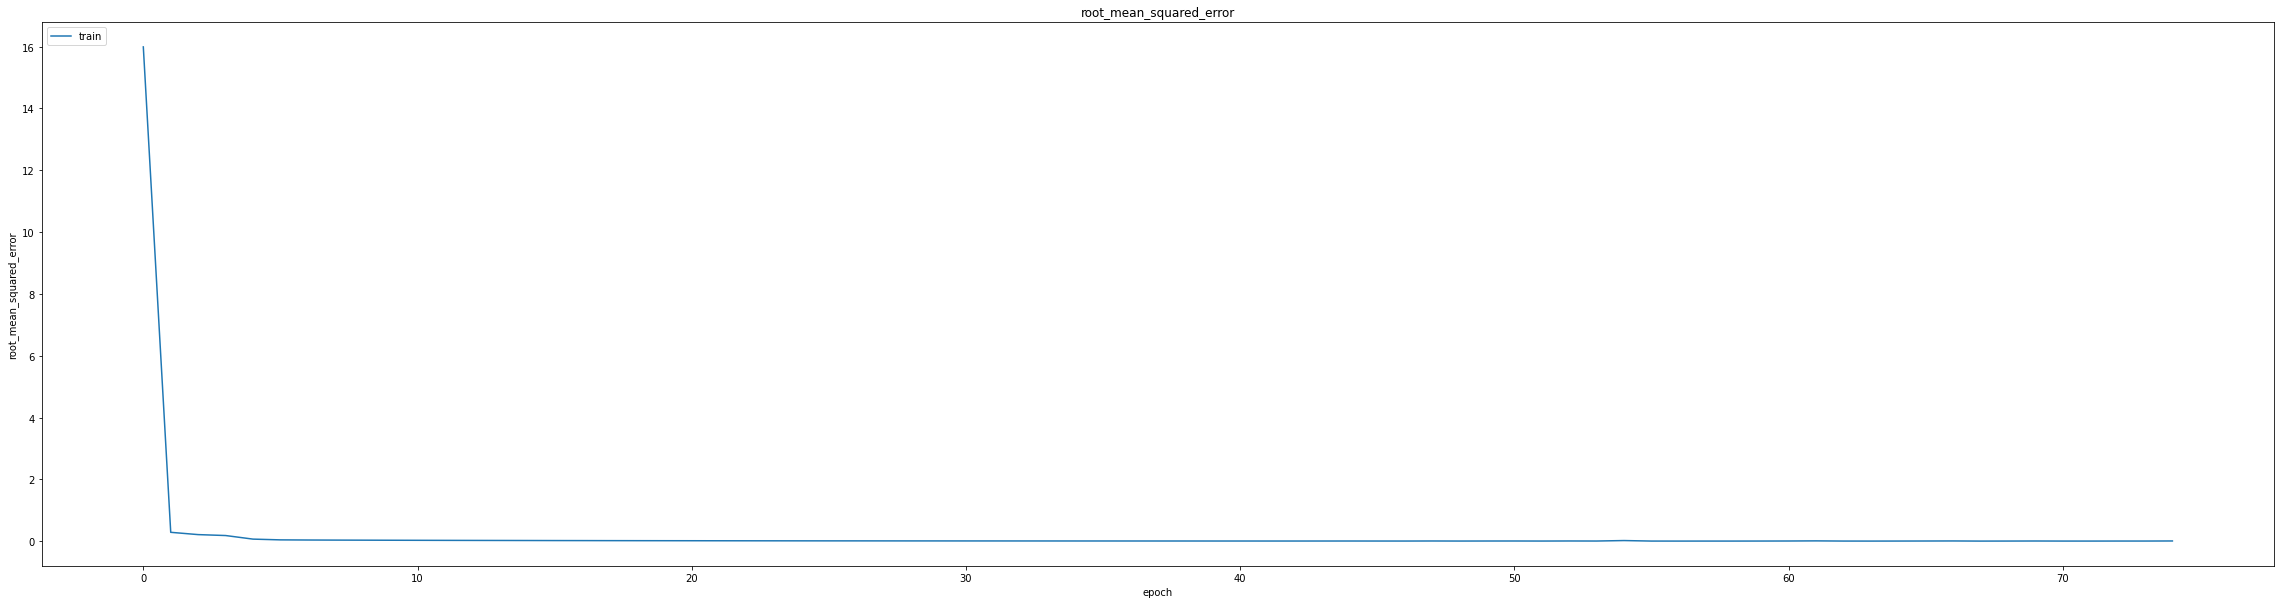

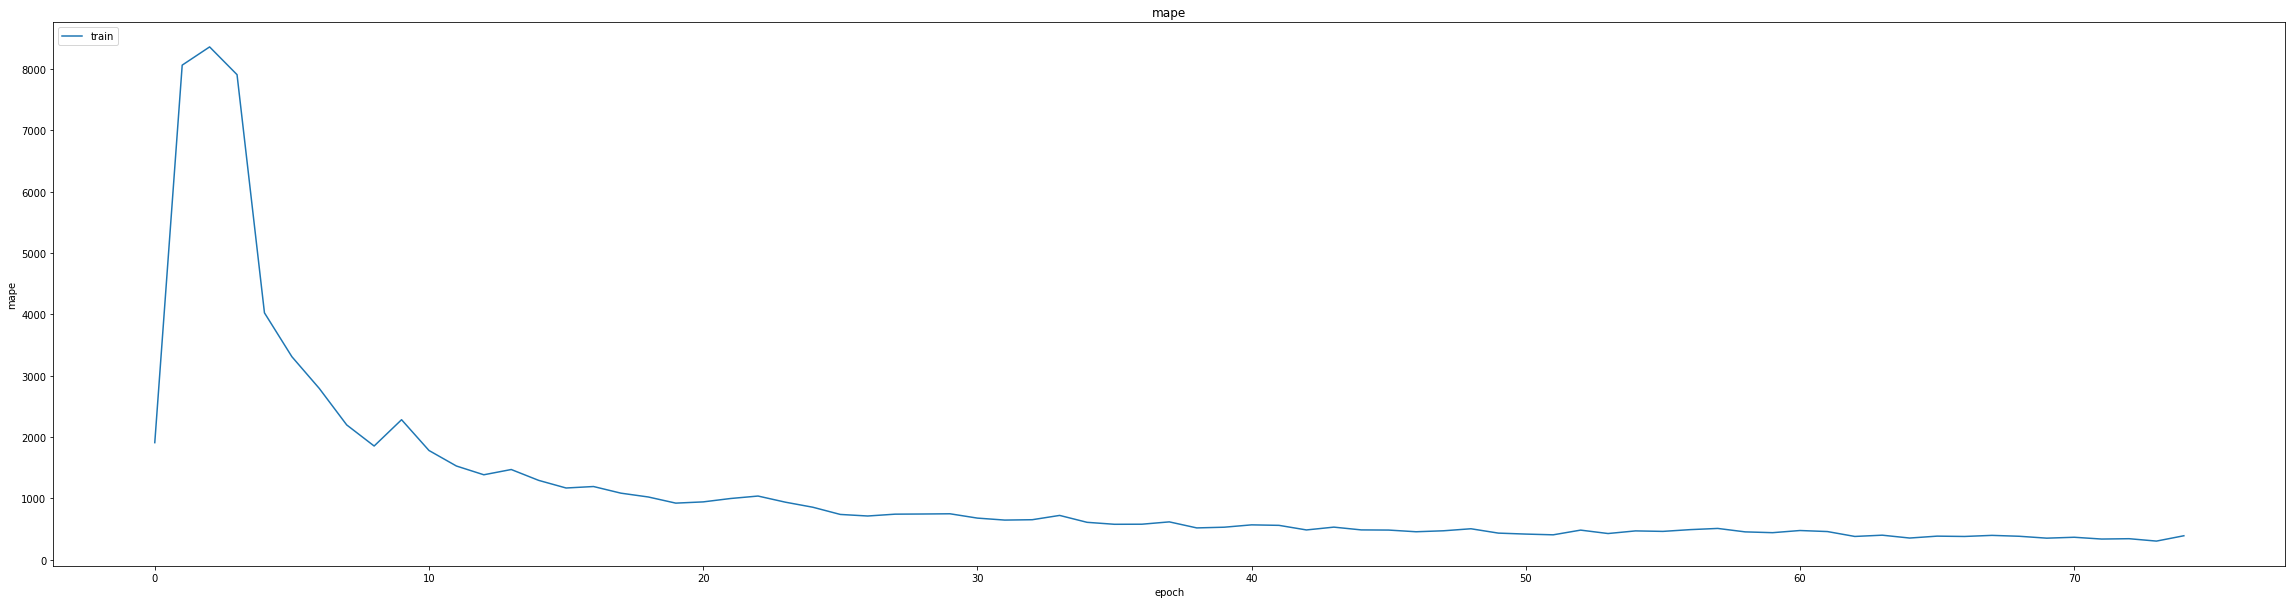

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012808994390070438
0.016293492168188095
464/464 [==============================] - 4s 6ms/step
0.9564323002459777


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 0.0070 - mae: 0.0298 - mse: 0.0070 - root_mean_squared_error: 0.0837 - mape: 692.9740
Epoch 1: val_mse did not improve from 0.00027
348/348 [==============================] - 12s 20ms/step - loss: 0.0070 - mae: 0.0298 - mse: 0.0070 - root_mean_squared_error: 0.0837 - mape: 692.9740 - val_loss: 4.2980e-04 - val_mae: 0.0175 - val_mse: 4.2980e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 4378.9971 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 9.6511e-05 - mae: 0.0073 - mse: 9.6511e-05 - root_mean_squared_error: 0.0098 - mape: 580.1094
Epoch 2: val_mse did not improve from 0.00027
348/348 [==============================] - 8s 23ms/step - loss: 9.6511e-05 - mae: 0.0073 - mse: 9.6511e-05 - root_mean_squared_error: 0.0098 - mape: 580.1094 - val_loss: 4.6878e-04 - val_mae: 0.0186 - val_mse: 4.6878e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 4316.1475 - lr: 0.0010
lr chan

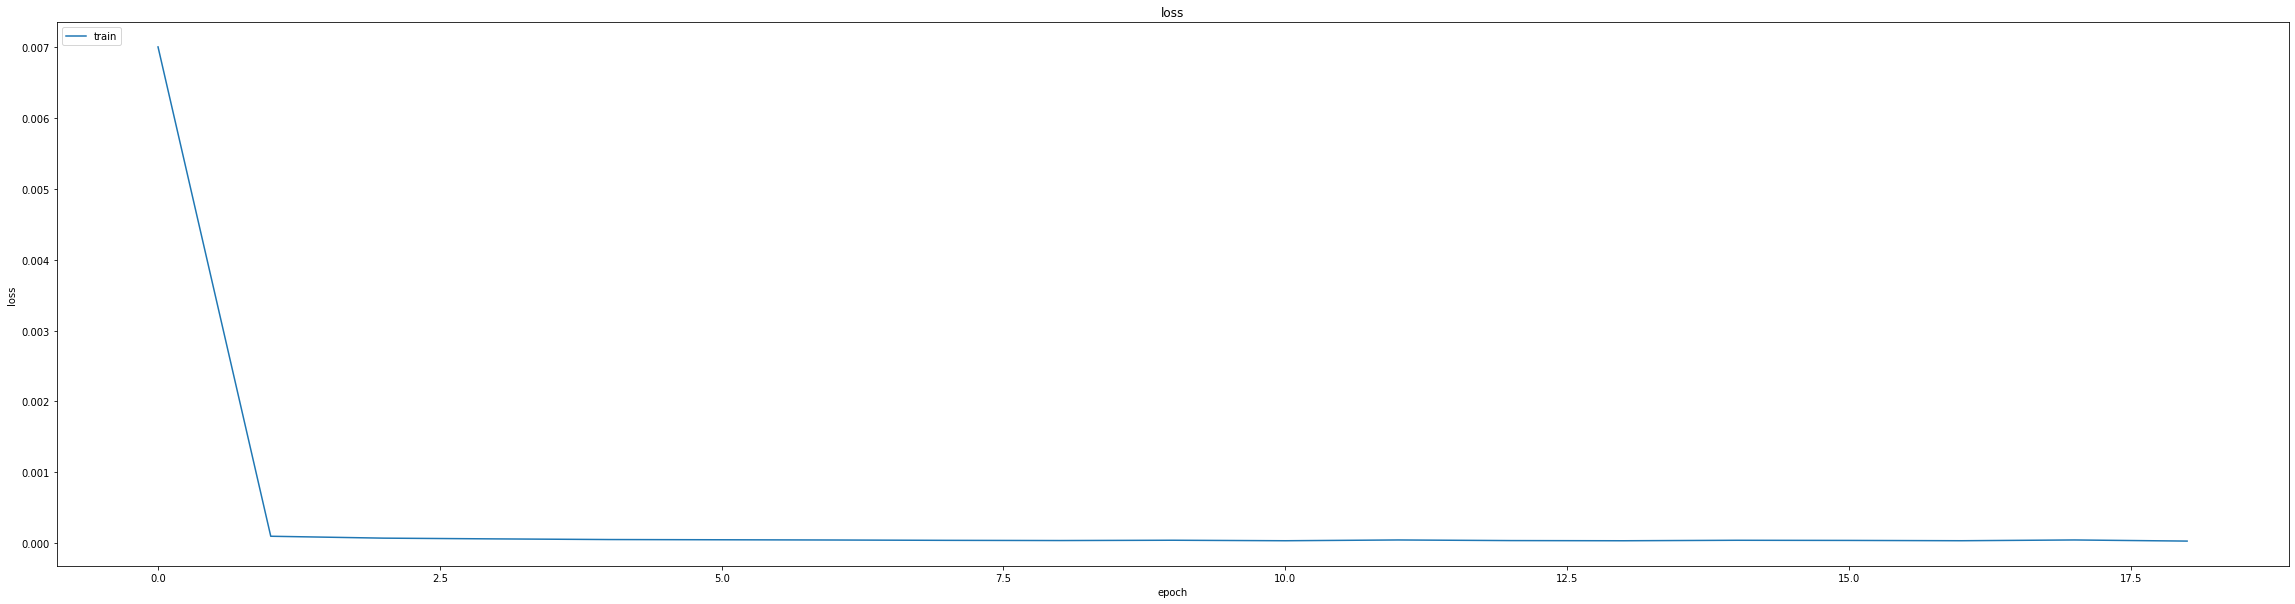

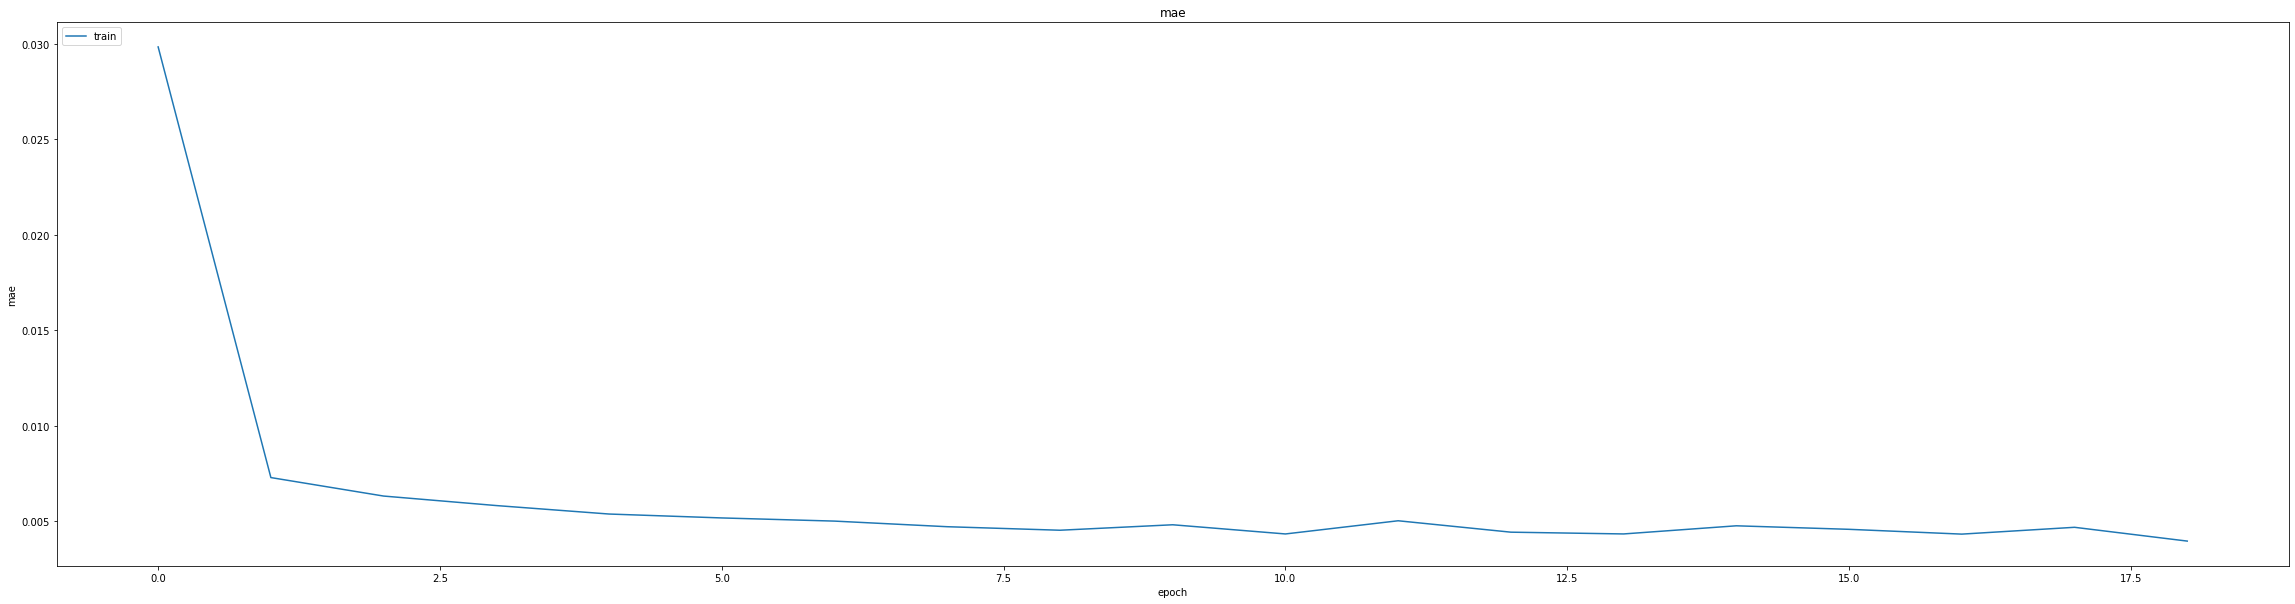

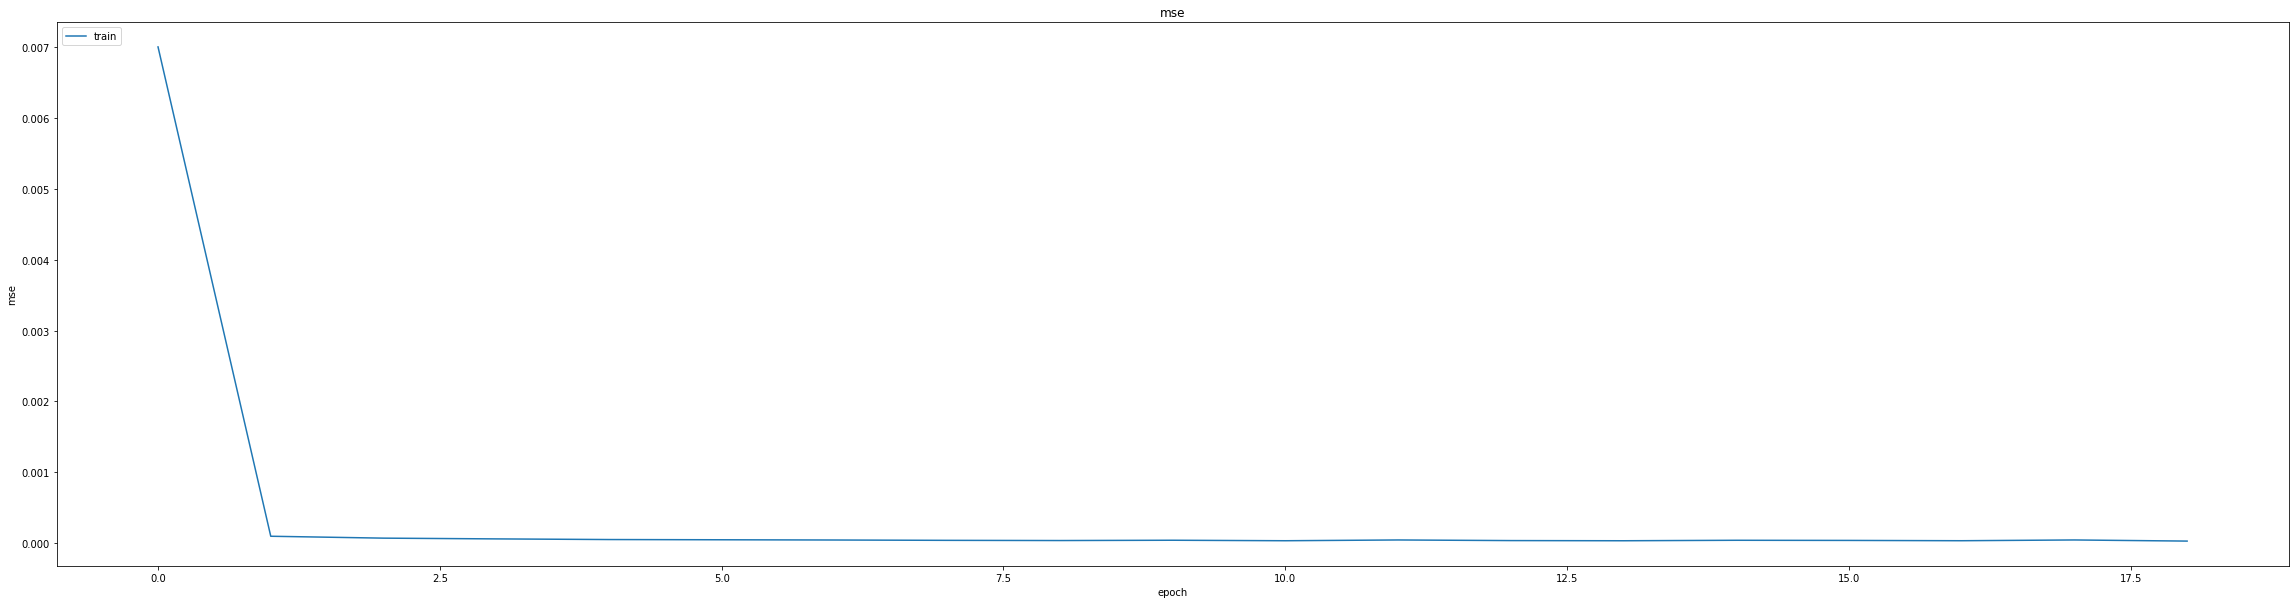

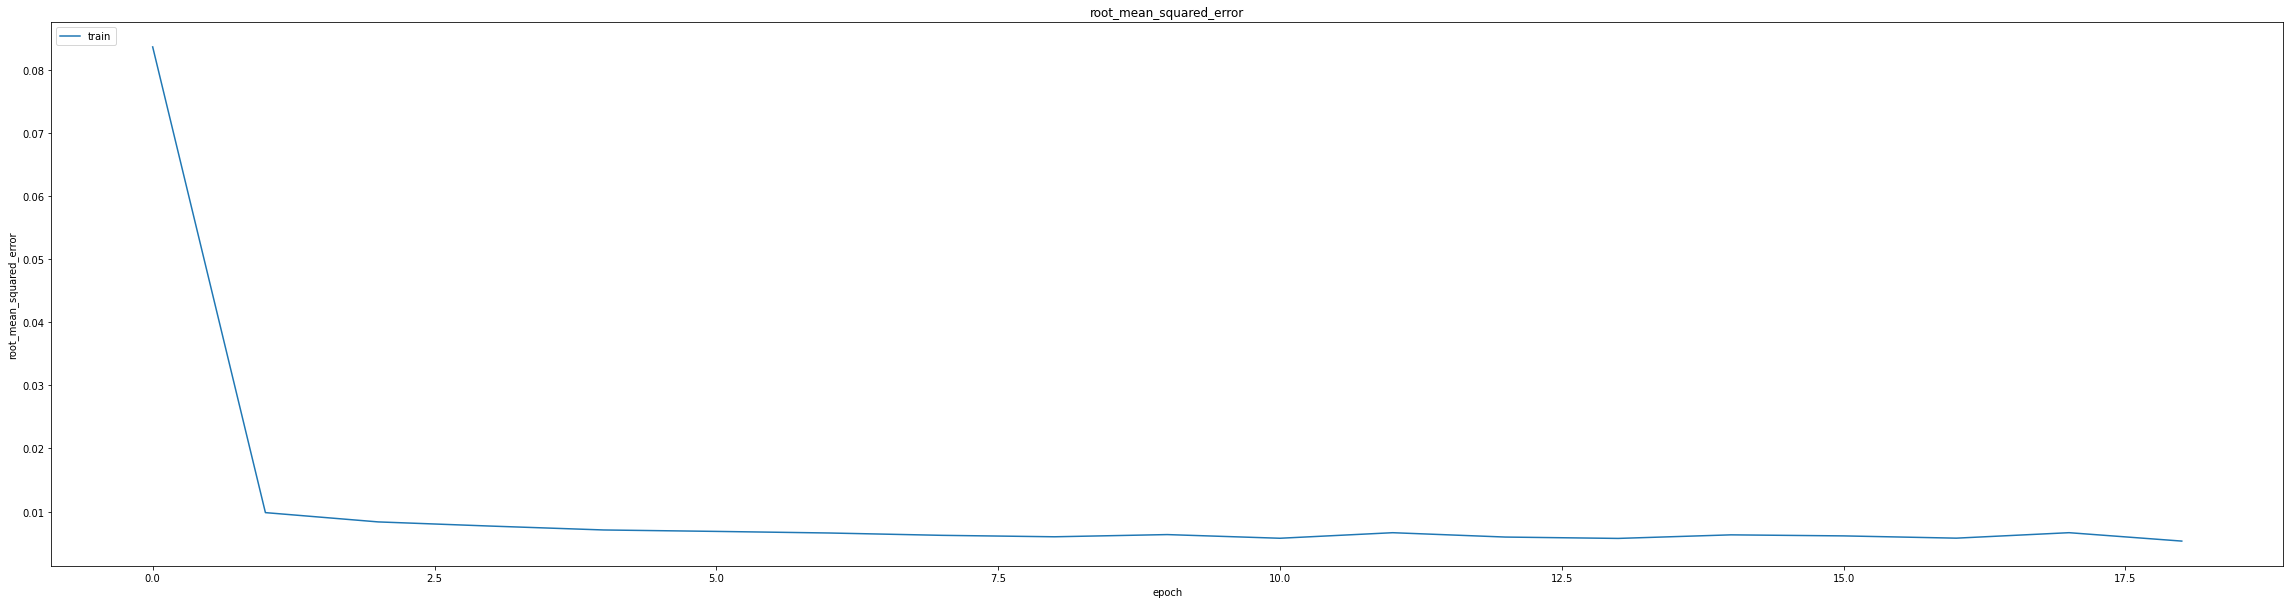

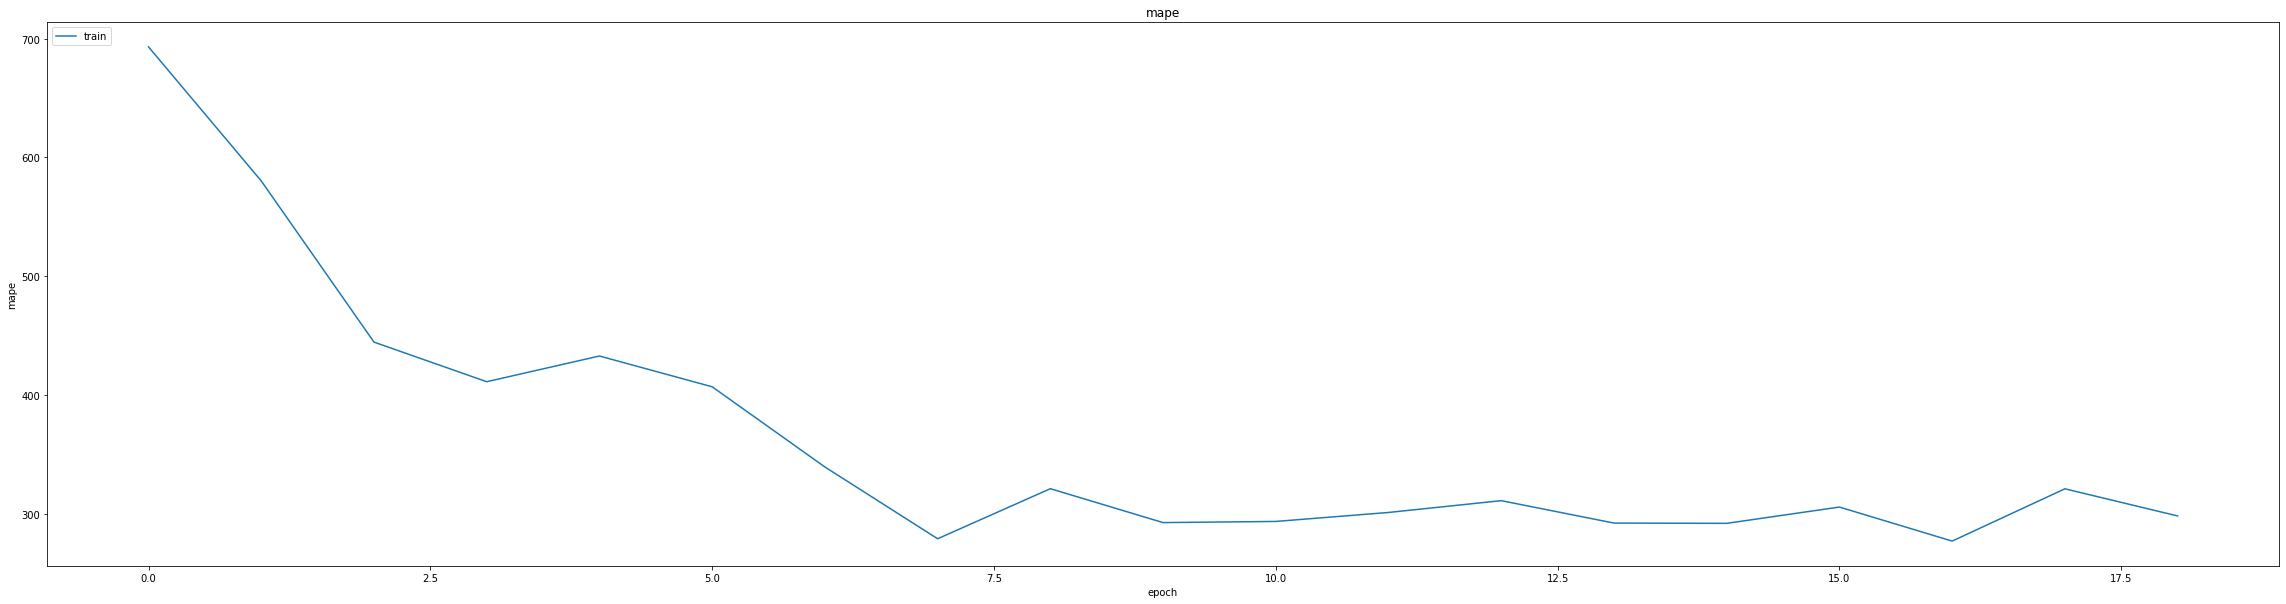

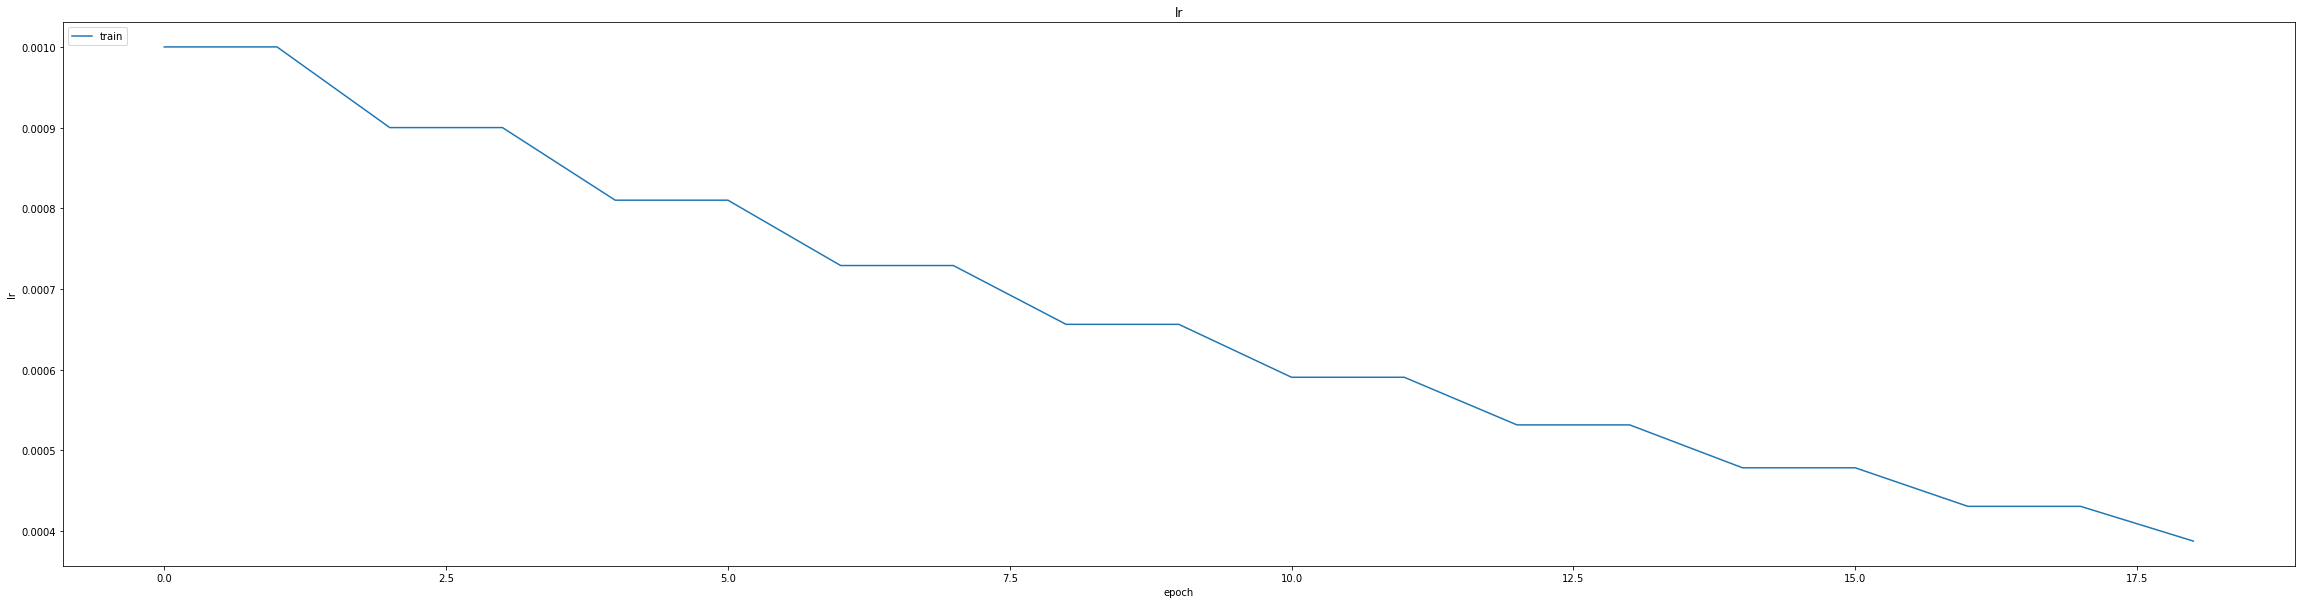

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015297474339604378
0.01828662119805813
464/464 [==============================] - 4s 5ms/step
0.9853100767429492


464/464 [==============================] - 2s 5ms/step


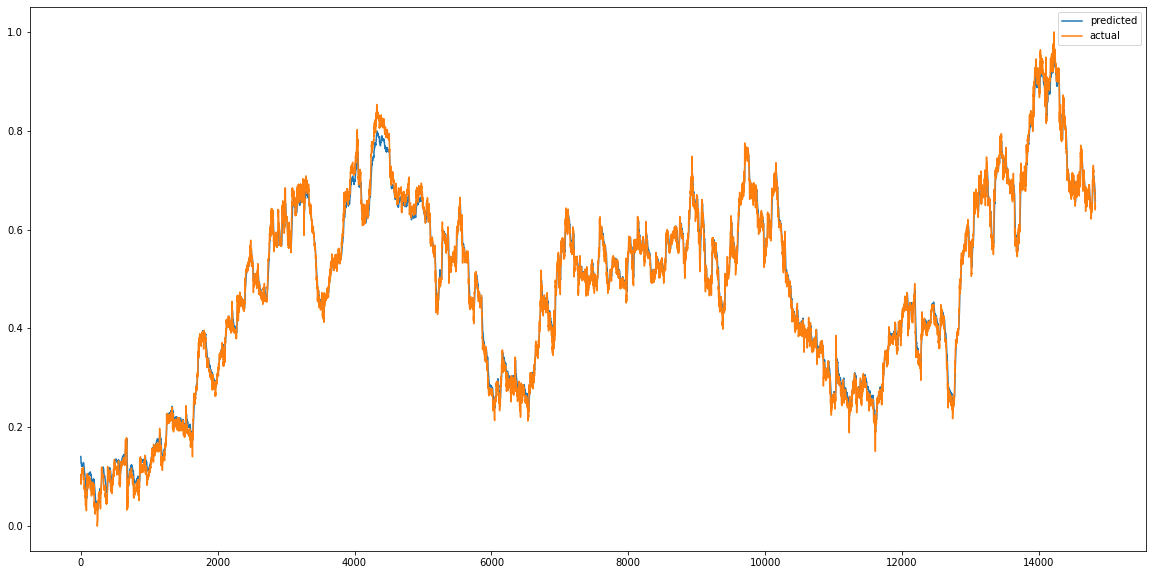

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


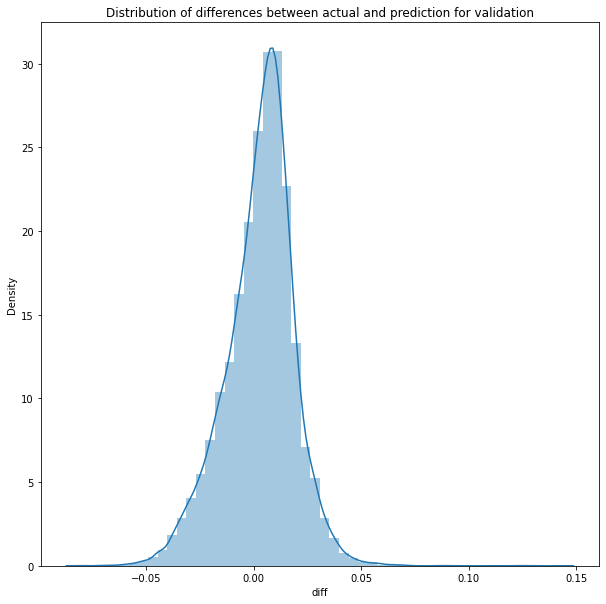

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 5ms/step


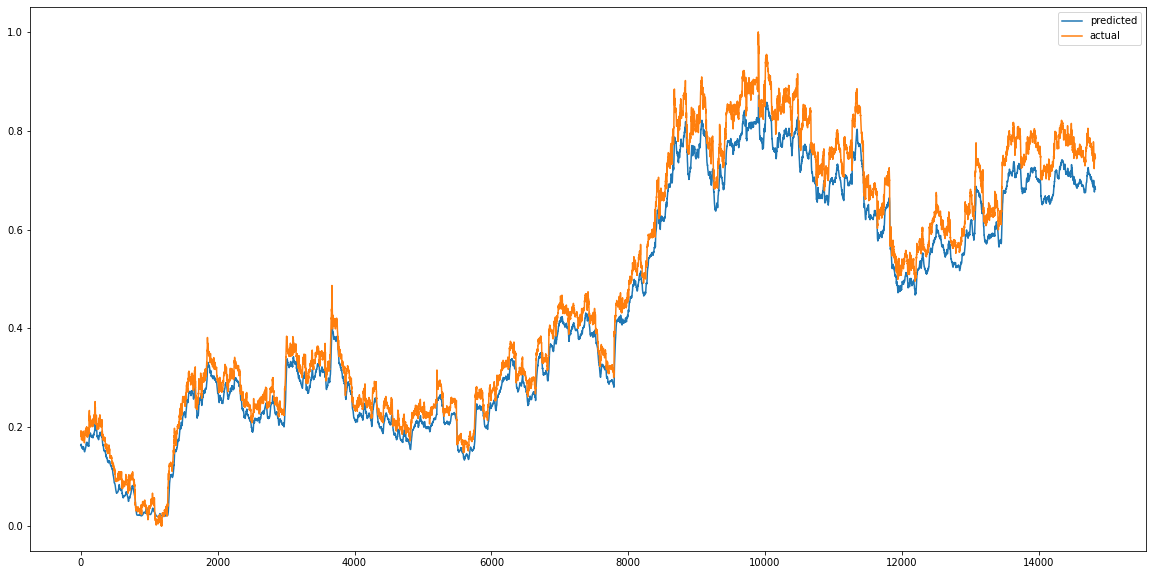

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


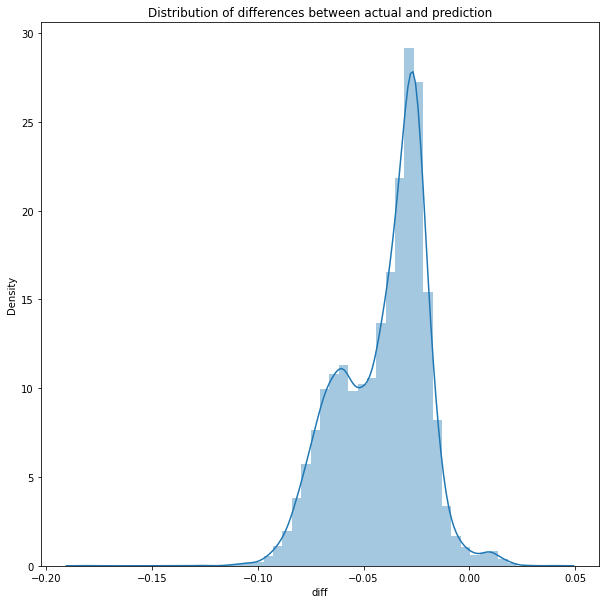

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.002061204380381299
RMSE :  0.04540048876808816
MAE :  0.04081528128652615
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.9675632581518924


count    14828.000000
mean        -0.040580
std          0.020359
min         -0.181600
25%         -0.056139
50%         -0.035542
75%         -0.025704
max          0.040370
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 522.7278 - mae: 4.4866 - mse: 522.7278 - root_mean_squared_error: 22.8632 - mape: 41367.5586
Epoch 1: val_mse improved from inf to 0.12784, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 36ms/step - loss: 516.8611 - mae: 4.4408 - mse: 516.8611 - root_mean_squared_error: 22.7346 - mape: 40906.5508 - val_loss: 0.1278 - val_mae: 0.3060 - val_mse: 0.1278 - val_root_mean_squared_error: 0.3576 - val_mape: 52595.5586
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.1019 - mae: 0.2714 - mse: 0.1019 - root_mean_squared_error: 0.3193 - mape: 16605.5957
Epoch 2: val_mse improved from 0.12784 to 0.03955, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.1017 - mae: 0.2710 - mse: 0.1017 - root_mean_squared_error: 0.3189 - mape: 16515.8164 - val_loss: 0.0396 - val_mae: 0.1631 - val_mse: 0.0396 - val_root_mean_squared_error: 0.1989 - val_mape: 32277.6582
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0485 - mae: 0.1837 - mse: 0.0485 - root_mean_squared_error: 0.2202 - mape: 10175.3408
Epoch 3: val_mse did not improve from 0.03955
348/348 [==============================] - 5s 13ms/step - loss: 0.0485 - mae: 0.1837 - mse: 0.0485 - root_mean_squared_error: 0.2202 - mape: 10175.3408 - val_loss: 0.0460 - val_mae: 0.1802 - val_mse: 0.0460 - val_root_mean_squared_error: 0.2144 - val_mape: 27120.0605
Epoch 4/75
344/348 [============================>.] - ETA: 0s - loss: 0.0445 - mae: 0.1756 - mse: 0.0445 - root_mean_squared_error: 0.2110 - mape: 9271.9443
Epoch 4: val_mse did not improve from 0.03955
348/348 [==============================] - 4s 11ms/step 

348/348 [==============================] - 12s 33ms/step - loss: 0.0388 - mae: 0.1602 - mse: 0.0388 - root_mean_squared_error: 0.1969 - mape: 8496.5947 - val_loss: 0.0079 - val_mae: 0.0604 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0887 - val_mape: 22683.2637
Epoch 7/75
343/348 [============================>.] - ETA: 0s - loss: 0.0089 - mae: 0.0648 - mse: 0.0089 - root_mean_squared_error: 0.0942 - mape: 6600.1792
Epoch 7: val_mse improved from 0.00787 to 0.00273, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 36ms/step - loss: 0.0088 - mae: 0.0645 - mse: 0.0088 - root_mean_squared_error: 0.0940 - mape: 6508.1841 - val_loss: 0.0027 - val_mae: 0.0331 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mape: 16963.7344
Epoch 8/75
348/348 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0410 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 5022.5356
Epoch 8: val_mse improved from 0.00273 to 0.00165, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0042 - mae: 0.0410 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 5022.5356 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 14610.9609
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0338 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5096.5000
Epoch 9: val_mse improved from 0.00165 to 0.00110, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0029 - mae: 0.0338 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5096.5000 - val_loss: 0.0011 - val_mae: 0.0201 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 13088.3213
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0299 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 4140.1577
Epoch 10: val_mse improved from 0.00110 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0023 - mae: 0.0299 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 4117.6582 - val_loss: 8.6067e-04 - val_mae: 0.0189 - val_mse: 8.6067e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 11886.5107
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0272 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 3929.9321
Epoch 11: val_mse improved from 0.00086 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0018 - mae: 0.0272 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 3908.5955 - val_loss: 6.3362e-04 - val_mae: 0.0162 - val_mse: 6.3362e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 10868.7656
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0251 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3635.8013
Epoch 12: val_mse improved from 0.00063 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0015 - mae: 0.0251 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3626.4348 - val_loss: 5.1560e-04 - val_mae: 0.0153 - val_mse: 5.1560e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 9977.1436
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 3362.8083
Epoch 13: val_mse improved from 0.00052 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 3354.1343 - val_loss: 4.3388e-04 - val_mae: 0.0146 - val_mse: 4.3388e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 9182.0166
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0220 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 2998.4597
Epoch 14: val_mse improved from 0.00043 to 0.00039, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0011 - mae: 0.0220 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 2998.4597 - val_loss: 3.8934e-04 - val_mae: 0.0144 - val_mse: 3.8934e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 8480.9209
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 9.5526e-04 - mae: 0.0207 - mse: 9.5526e-04 - root_mean_squared_error: 0.0309 - mape: 2706.0801
Epoch 15: val_mse improved from 0.00039 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 9.5536e-04 - mae: 0.0207 - mse: 9.5536e-04 - root_mean_squared_error: 0.0309 - mape: 2699.0972 - val_loss: 3.6440e-04 - val_mae: 0.0142 - val_mse: 3.6440e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 7860.1587
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 8.4384e-04 - mae: 0.0197 - mse: 8.4384e-04 - root_mean_squared_error: 0.0290 - mape: 2681.4045
Epoch 16: val_mse improved from 0.00036 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 8.4267e-04 - mae: 0.0197 - mse: 8.4267e-04 - root_mean_squared_error: 0.0290 - mape: 2666.7981 - val_loss: 3.1757e-04 - val_mae: 0.0133 - val_mse: 3.1757e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 7312.1147
Epoch 17/75
343/348 [============================>.] - ETA: 0s - loss: 7.6421e-04 - mae: 0.0190 - mse: 7.6421e-04 - root_mean_squared_error: 0.0276 - mape: 2417.7158
Epoch 17: val_mse improved from 0.00032 to 0.00023, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 7.6456e-04 - mae: 0.0191 - mse: 7.6456e-04 - root_mean_squared_error: 0.0277 - mape: 2383.9834 - val_loss: 2.3373e-04 - val_mae: 0.0110 - val_mse: 2.3373e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 6819.0371
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 6.8499e-04 - mae: 0.0183 - mse: 6.8499e-04 - root_mean_squared_error: 0.0262 - mape: 2358.6453
Epoch 18: val_mse did not improve from 0.00023
348/348 [==============================] - 4s 11ms/step - loss: 6.8541e-04 - mae: 0.0183 - mse: 6.8541e-04 - root_mean_squared_error: 0.0262 - mape: 2339.1270 - val_loss: 2.8559e-04 - val_mae: 0.0128 - val_mse: 2.8559e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 6365.5581
Epoch 19/75
343/348 [============================>.] - ETA: 0s - loss: 6.2372e-04 - mae: 0.0177 - mse: 6.2372e-04 - root_mean_squared_error: 0.0250 - mape: 2100.9539
Epoch 19: val_mse did not improve from 0.00023
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 4.7519e-04 - mae: 0.0160 - mse: 4.7519e-04 - root_mean_squared_error: 0.0218 - mape: 1828.9031 - val_loss: 2.1378e-04 - val_mae: 0.0108 - val_mse: 2.1378e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 4898.3013
Epoch 23/75
343/348 [============================>.] - ETA: 0s - loss: 4.3423e-04 - mae: 0.0154 - mse: 4.3423e-04 - root_mean_squared_error: 0.0208 - mape: 1651.8267
Epoch 23: val_mse did not improve from 0.00021
348/348 [==============================] - 4s 12ms/step - loss: 4.3421e-04 - mae: 0.0154 - mse: 4.3421e-04 - root_mean_squared_error: 0.0208 - mape: 1628.7256 - val_loss: 3.0603e-04 - val_mae: 0.0137 - val_mse: 3.0603e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 4581.8354
Epoch 24/75
345/348 [============================>.] - ETA: 0s - loss: 3.9335e-04 - mae: 0.0148 - mse: 3.9335e-04 - root_mean_squared_error: 0.0198 - mape: 1482.8904
Epoch 24: val_mse did not improve from 0.00021
348/348 [

348/348 [==============================] - 11s 33ms/step - loss: 2.7222e-04 - mae: 0.0125 - mse: 2.7222e-04 - root_mean_squared_error: 0.0165 - mape: 1246.0945 - val_loss: 1.8067e-04 - val_mae: 0.0097 - val_mse: 1.8067e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 3410.7854
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 2.4753e-04 - mae: 0.0119 - mse: 2.4753e-04 - root_mean_squared_error: 0.0157 - mape: 1059.2474
Epoch 29: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 11ms/step - loss: 2.4745e-04 - mae: 0.0119 - mse: 2.4745e-04 - root_mean_squared_error: 0.0157 - mape: 1056.5181 - val_loss: 2.6502e-04 - val_mae: 0.0120 - val_mse: 2.6502e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3220.1924
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 2.2845e-04 - mae: 0.0115 - mse: 2.2845e-04 - root_mean_squared_error: 0.0151 - mape: 987.6158 
Epoch 30: val_mse did not improve from 0.00018
348/348 [

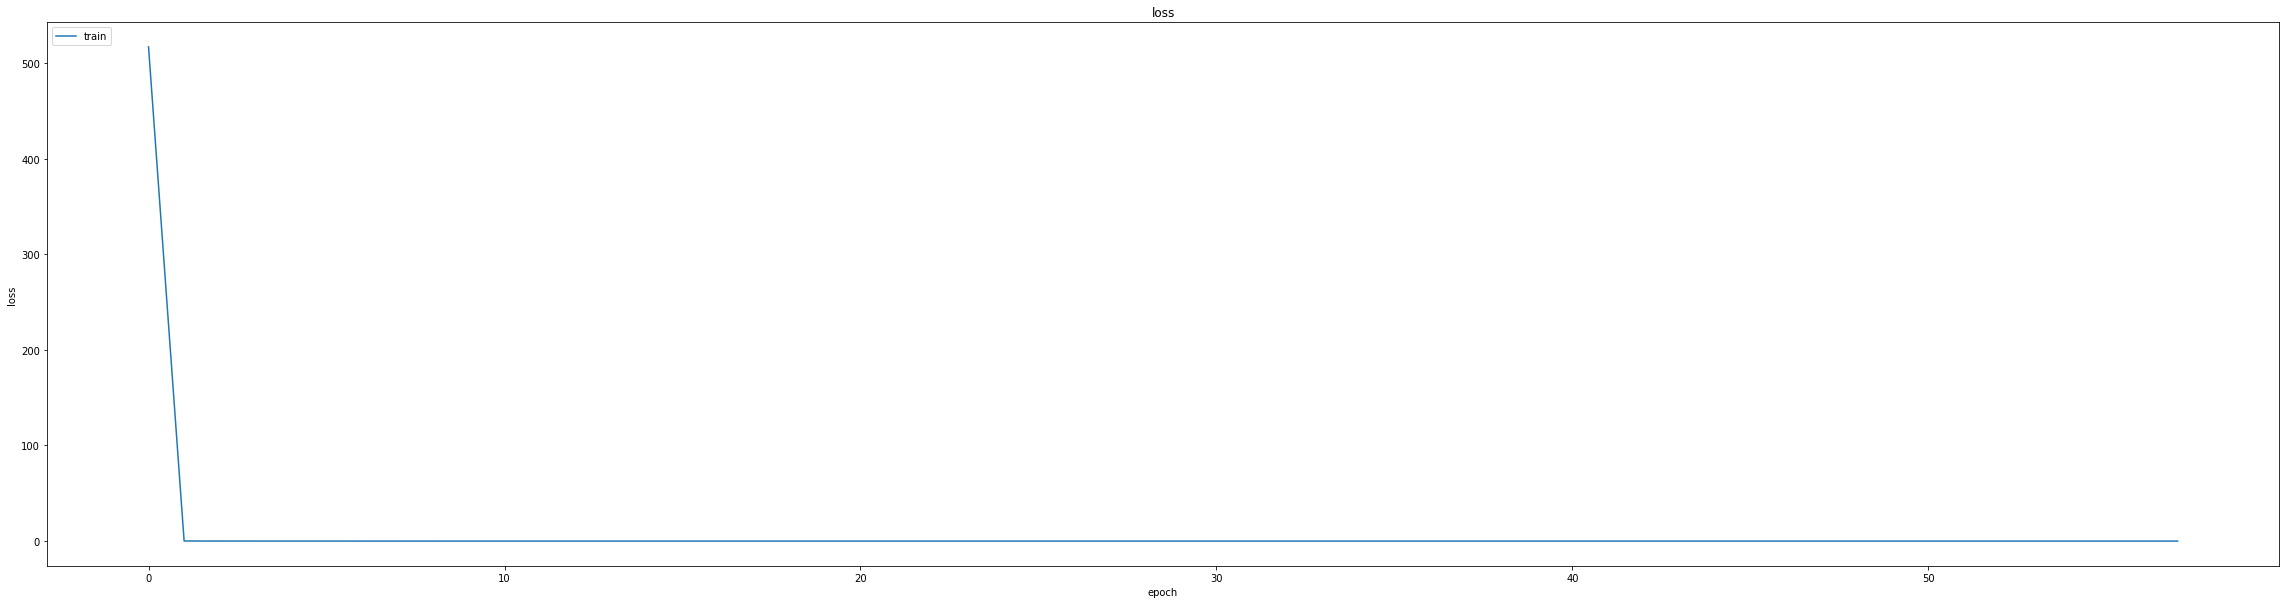

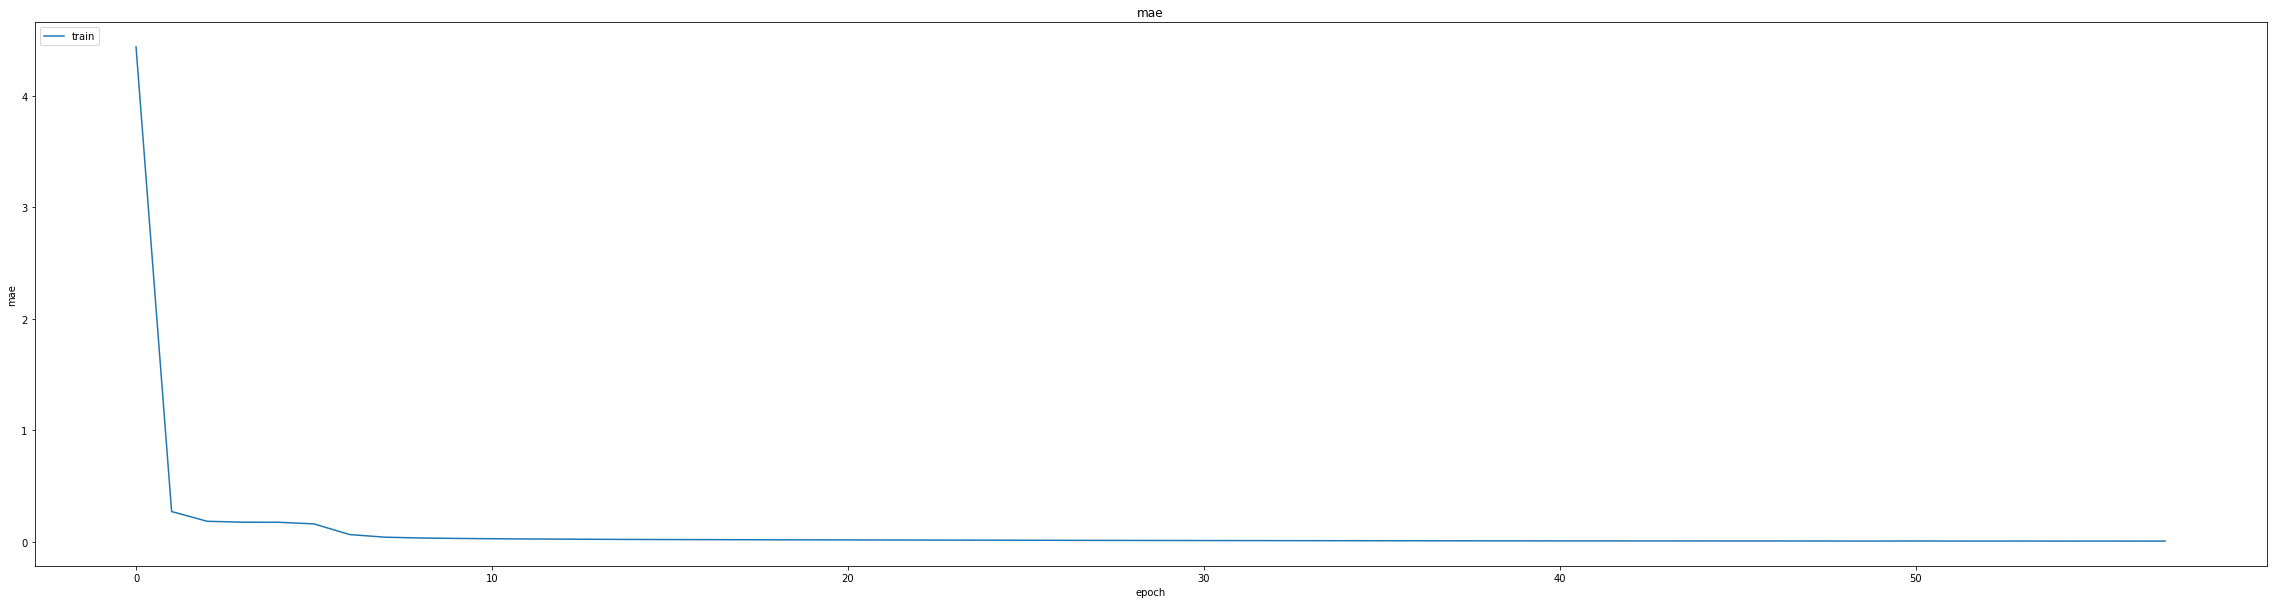

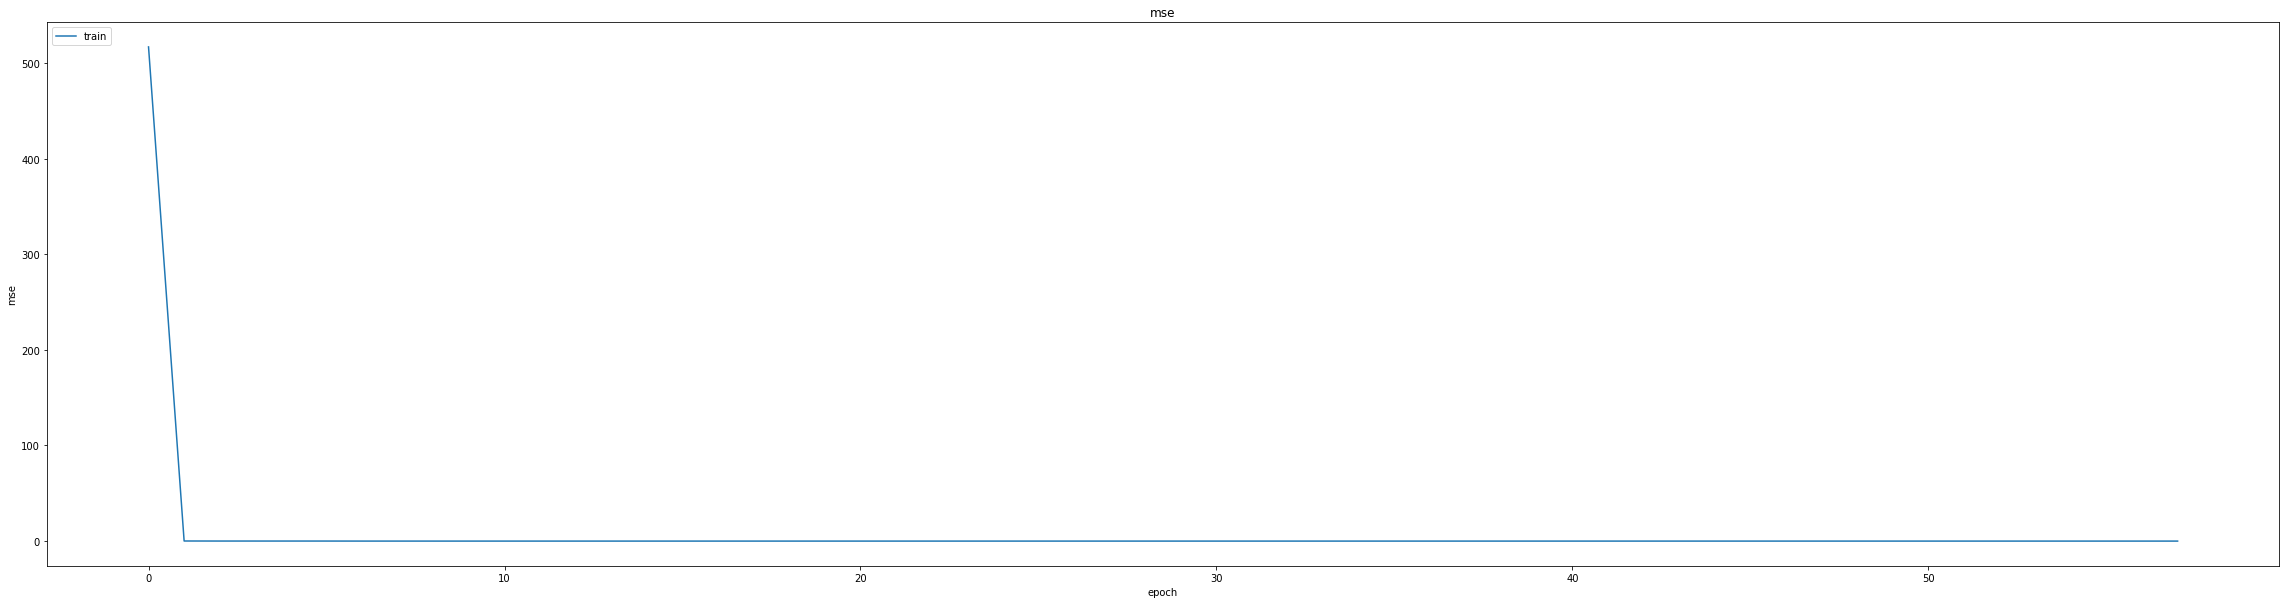

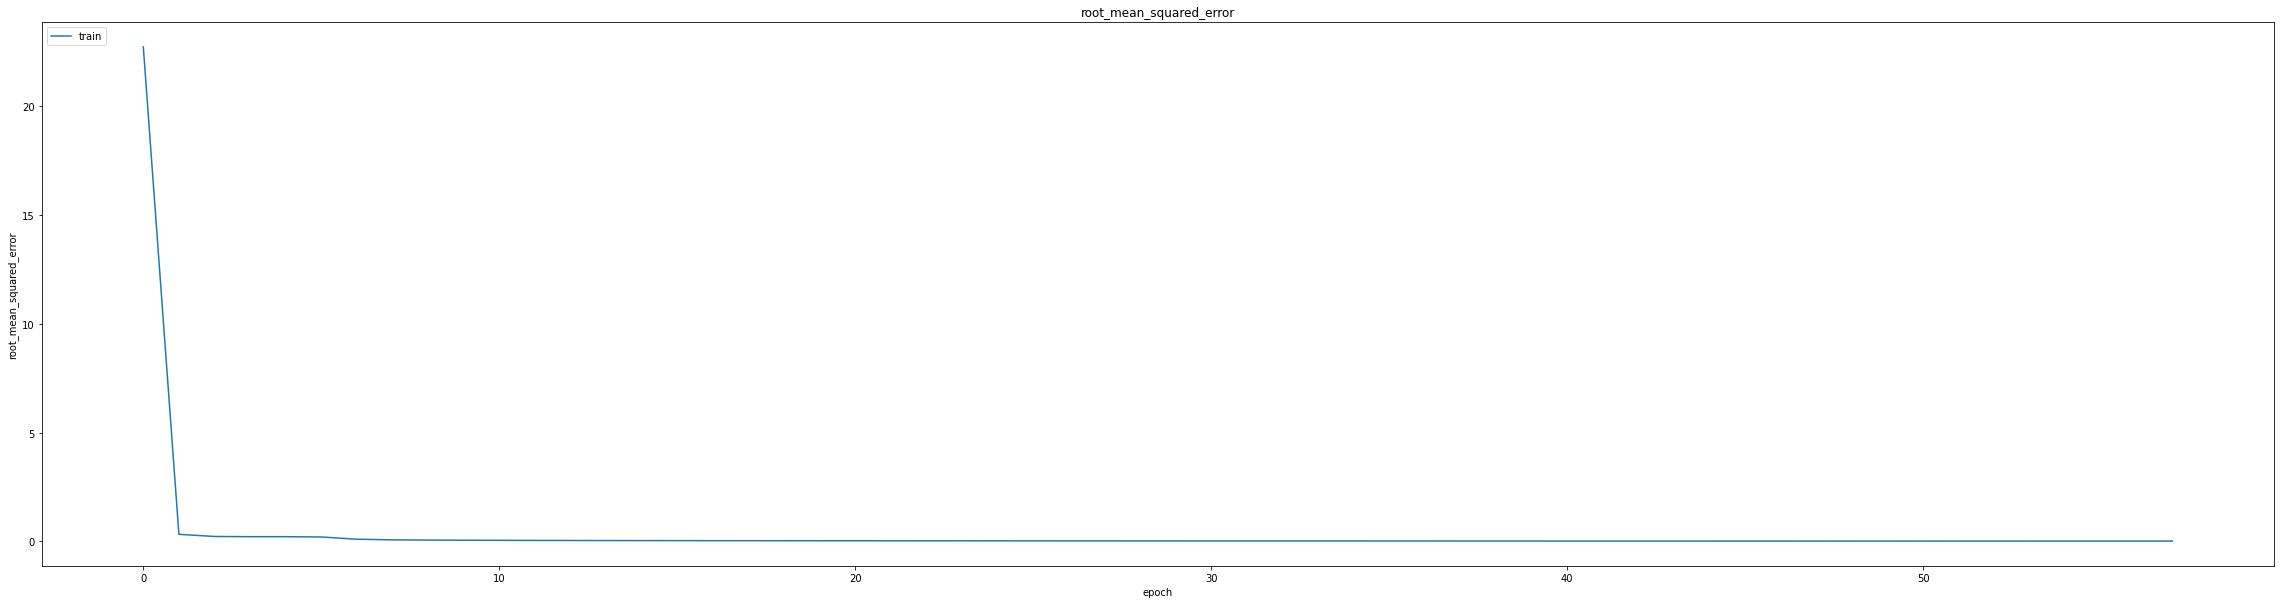

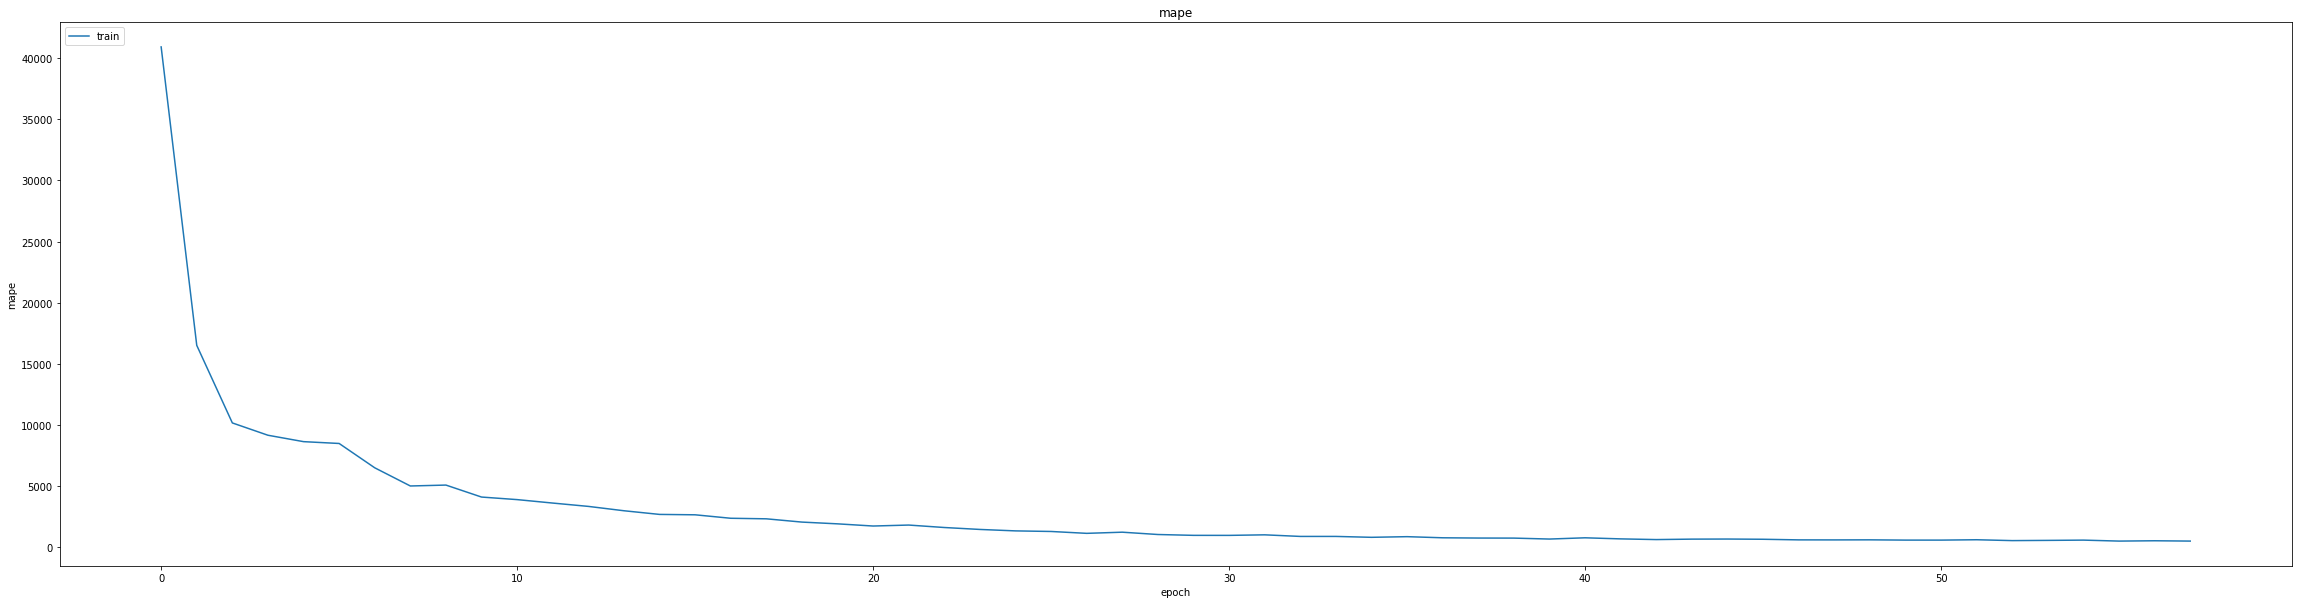

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009737900458276272
0.013441379182040691
464/464 [==============================] - 2s 4ms/step
0.9937724625136422


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 6.4867e-04 - mae: 0.0147 - mse: 6.4867e-04 - root_mean_squared_error: 0.0255 - mape: 1205.8597
Epoch 1: val_mse did not improve from 0.00018
348/348 [==============================] - 7s 13ms/step - loss: 6.4598e-04 - mae: 0.0146 - mse: 6.4598e-04 - root_mean_squared_error: 0.0254 - mape: 1199.2937 - val_loss: 2.1443e-04 - val_mae: 0.0109 - val_mse: 2.1443e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 2607.6555 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 1.2311e-04 - mae: 0.0085 - mse: 1.2311e-04 - root_mean_squared_error: 0.0111 - mape: 848.3961
Epoch 2: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 10ms/step - loss: 1.2283e-04 - mae: 0.0085 - mse: 1.2283e-04 - root_mean_squared_error: 0.0111 - mape: 838.9183 - val_loss: 1.9498e-04 - val_mae: 0.0104 - val_mse: 1.9498e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 2061.4861 - l

348/348 [==============================] - 13s 37ms/step - loss: 5.7661e-05 - mae: 0.0057 - mse: 5.7661e-05 - root_mean_squared_error: 0.0076 - mape: 419.7216 - val_loss: 1.6731e-04 - val_mae: 0.0094 - val_mse: 1.6731e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2514.6335 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
348/348 [==============================] - ETA: 0s - loss: 5.1756e-05 - mae: 0.0054 - mse: 5.1756e-05 - root_mean_squared_error: 0.0072 - mape: 389.4467
Epoch 9: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 5.1756e-05 - mae: 0.0054 - mse: 5.1756e-05 - root_mean_squared_error: 0.0072 - mape: 389.4467 - val_loss: 1.6361e-04 - val_mae: 0.0093 - val_mse: 1.6361e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 2598.0168 - lr: 6.5610e-04
Epoch 10/25
345/348 [============================>.] - ETA: 0s - loss: 4.9700e-05 - mae: 0.0053 - mse: 4.9700e-05 - root_mean_squared_error: 0.0070 - mape: 390.9378
Epoch 10: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 10ms/step - loss: 4.9663e-05 - mae: 0.0053 - mse: 4.9663e-05 - root_mean_squared_error: 0.0070 - mape: 387.6922 - val_loss: 1.7351e-04 - val_mae: 0.0099 - val_mse: 1.7351e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 2642.6816 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
347/348 [============================>.] - ETA: 0s - loss: 4.8395e-05 - mae: 0.0052 - mse: 4.8395e-05 - root_mean_squared_error: 0.0070 - mape:

348/348 [==============================] - 12s 33ms/step - loss: 4.8355e-05 - mae: 0.0052 - mse: 4.8355e-05 - root_mean_squared_error: 0.0070 - mape: 382.3837 - val_loss: 1.6059e-04 - val_mae: 0.0092 - val_mse: 1.6059e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 2555.8044 - lr: 5.9049e-04
Epoch 12/25
348/348 [==============================] - ETA: 0s - loss: 4.1672e-05 - mae: 0.0049 - mse: 4.1672e-05 - root_mean_squared_error: 0.0065 - mape: 396.7552
Epoch 12: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 4.1672e-05 - mae: 0.0049 - mse: 4.1672e-05 - root_mean_squared_error: 0.0065 - mape: 396.7552 - val_loss: 1.5622e-04 - val_mae: 0.0092 - val_mse: 1.5622e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 2423.5044 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
345/348 [============================>.] - ETA: 0s - loss: 4.0482e-05 - mae: 0.0048 - mse: 4.0482e-05 - root_mean_squared_error: 0.0064 - mape: 398.7423
Epoch 13: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 4.0456e-05 - mae: 0.0048 - mse: 4.0456e-05 - root_mean_squared_error: 0.0064 - mape: 395.4302 - val_loss: 1.5525e-04 - val_mae: 0.0092 - val_mse: 1.5525e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 2550.5693 - lr: 5.3144e-04
Epoch 14/25
346/348 [============================>.] - ETA: 0s - loss: 4.4372e-05 - mae: 0.0050 - mse: 4.4372e-05 - root_mean_squared_error: 0.0067 - mape: 364.4173
Epoch 14: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 12ms/step - loss: 4.4491e-05 - mae: 0.0050 - mse: 4.4491e-05 - root_mean_squared_error: 0.0067 - mape: 362.4365 - val_loss: 1.9423e-04 - val_mae: 0.0106 - val_mse: 1.9423e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2579.8535 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
346/348 [============================>.] - ETA: 0s - loss: 3.6740e-05 - mae: 0.0046 - mse: 3.6740e-05 - root_mean_squared_error: 0.0061 - mape

348/348 [==============================] - 11s 33ms/step - loss: 3.5708e-05 - mae: 0.0045 - mse: 3.5708e-05 - root_mean_squared_error: 0.0060 - mape: 340.3693 - val_loss: 1.3898e-04 - val_mae: 0.0087 - val_mse: 1.3898e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 2607.0786 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
344/348 [============================>.] - ETA: 0s - loss: 3.1197e-05 - mae: 0.0042 - mse: 3.1197e-05 - root_mean_squared_error: 0.0056 - mape: 331.3247
Epoch 17: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 11ms/step - loss: 3.1208e-05 - mae: 0.0042 - mse: 3.1208e-05 - root_mean_squared_error: 0.0056 - mape: 327.6298 - val_loss: 1.5403e-04 - val_mae: 0.0093 - val_mse: 1.5403e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 2482.0322 - lr: 4.3047e-04
Epoch 18/25
346/348 [============================>.] - ETA: 0s - loss: 2.8111e-05 - mae: 0.0040 - mse: 2.8111e-05 - root_mean_squared_error: 0.0053 - mape:

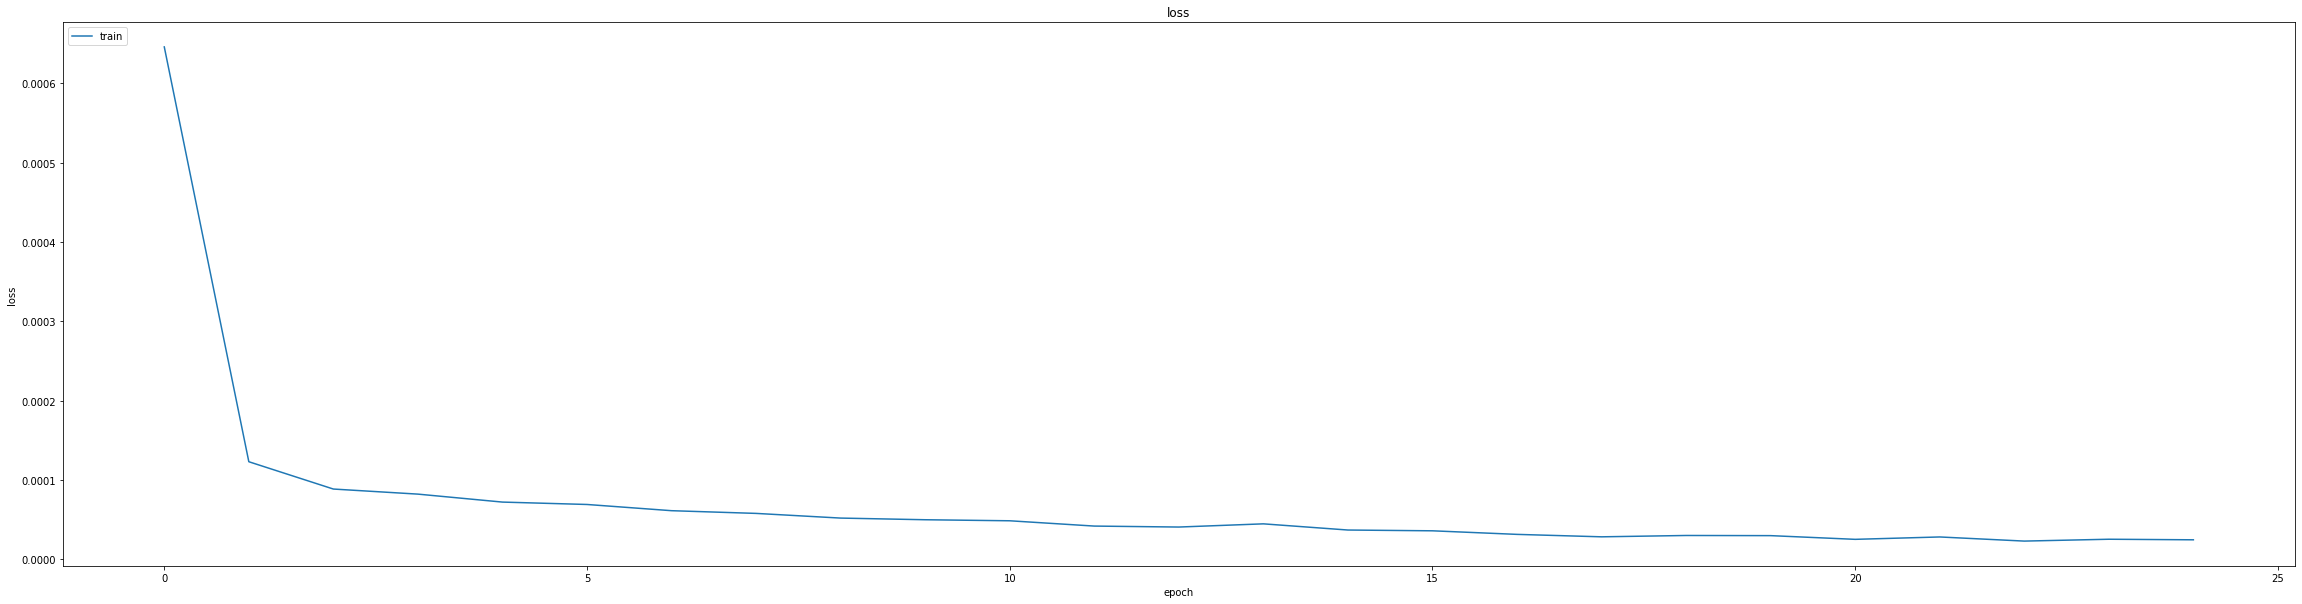

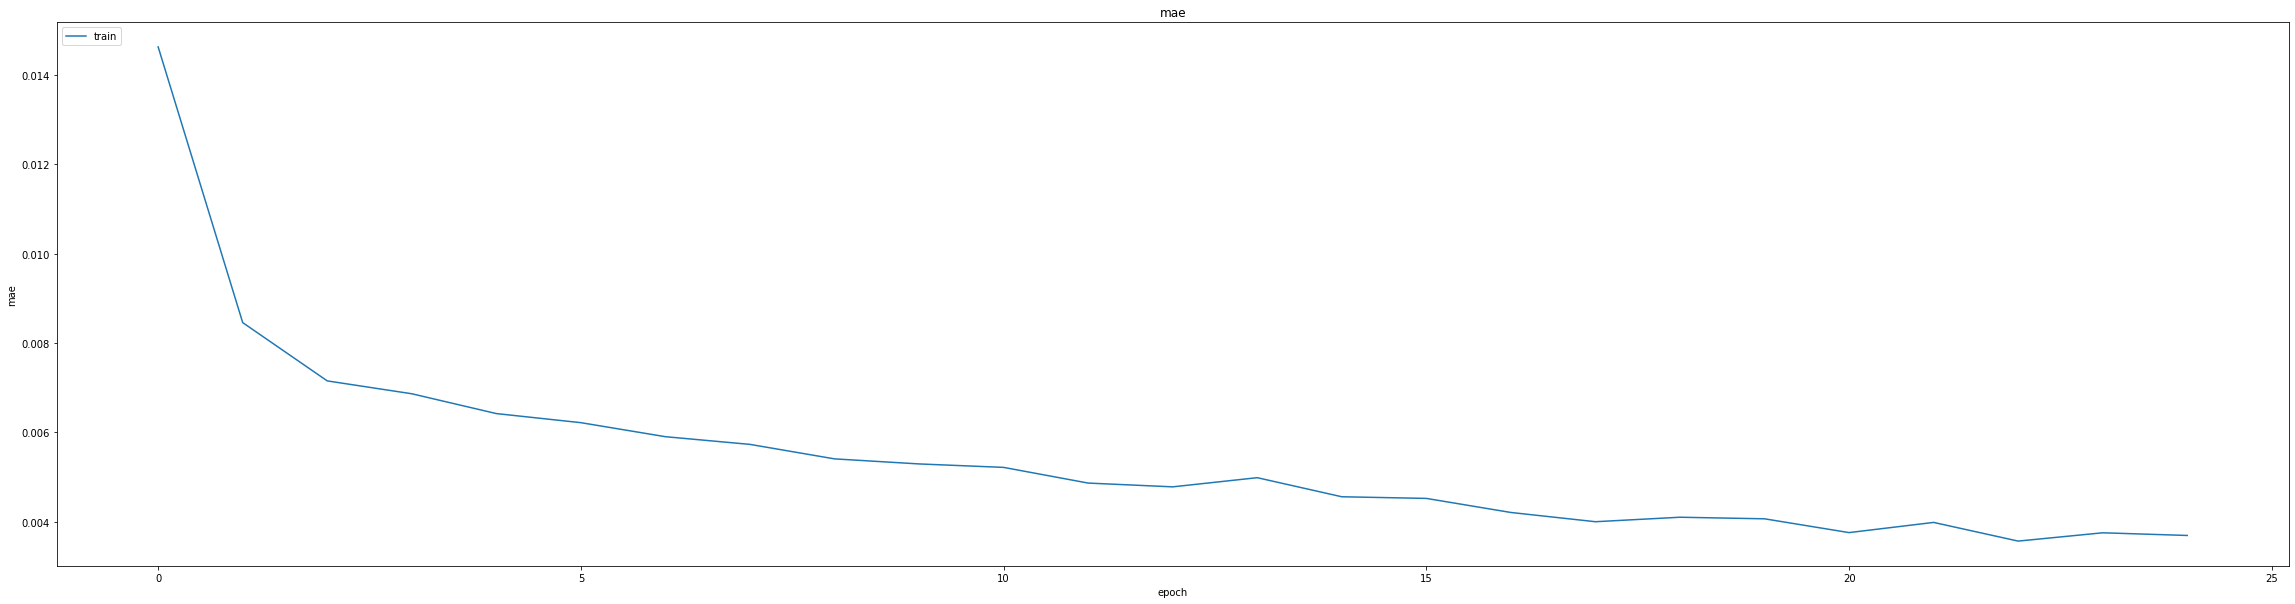

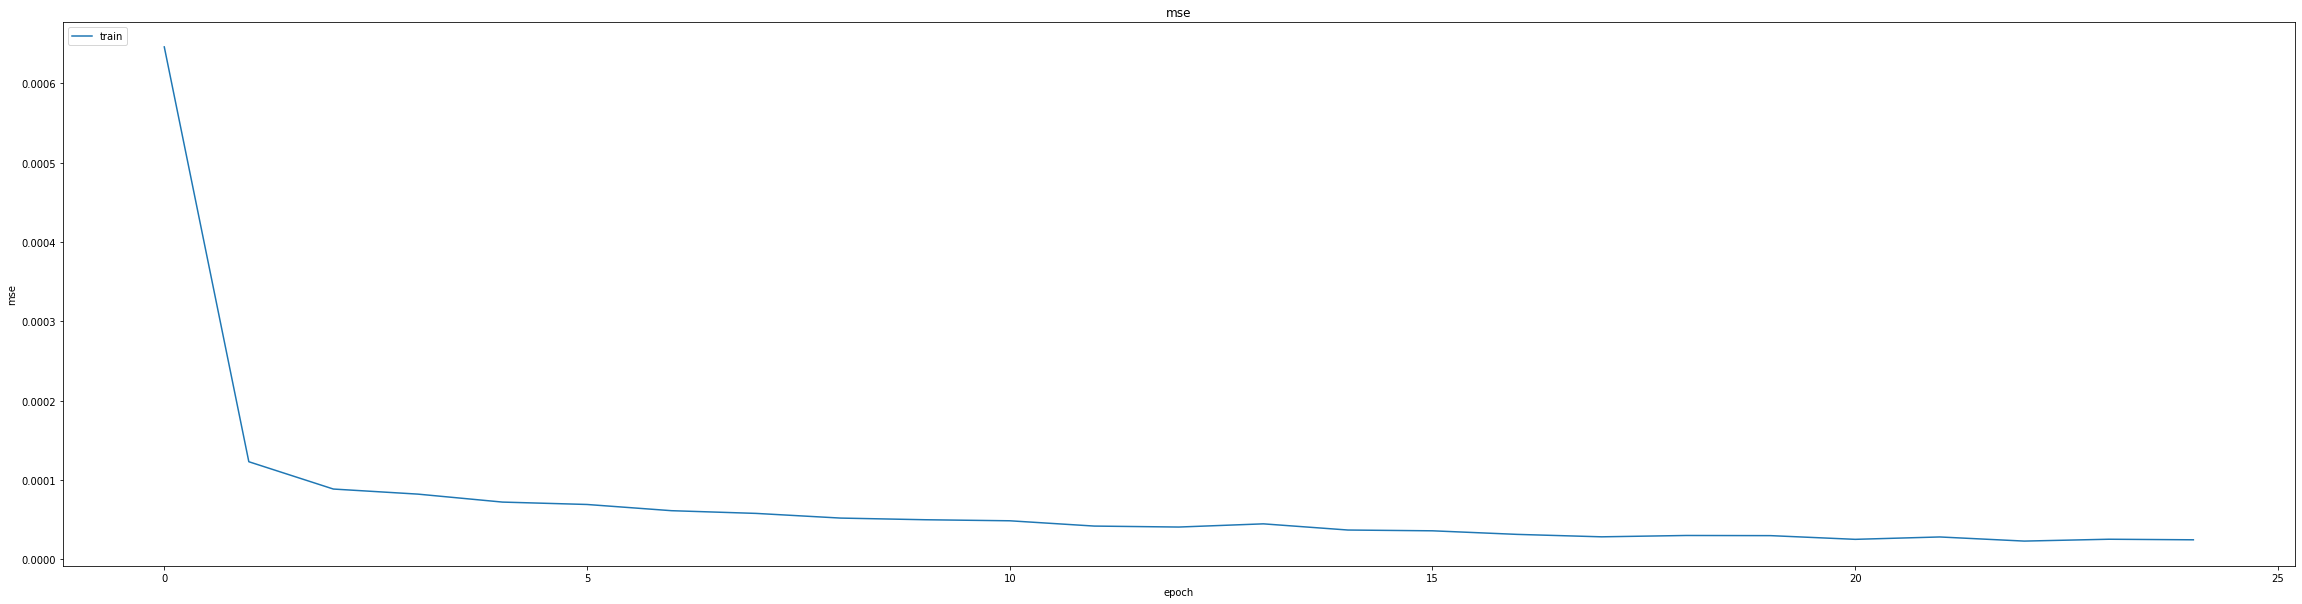

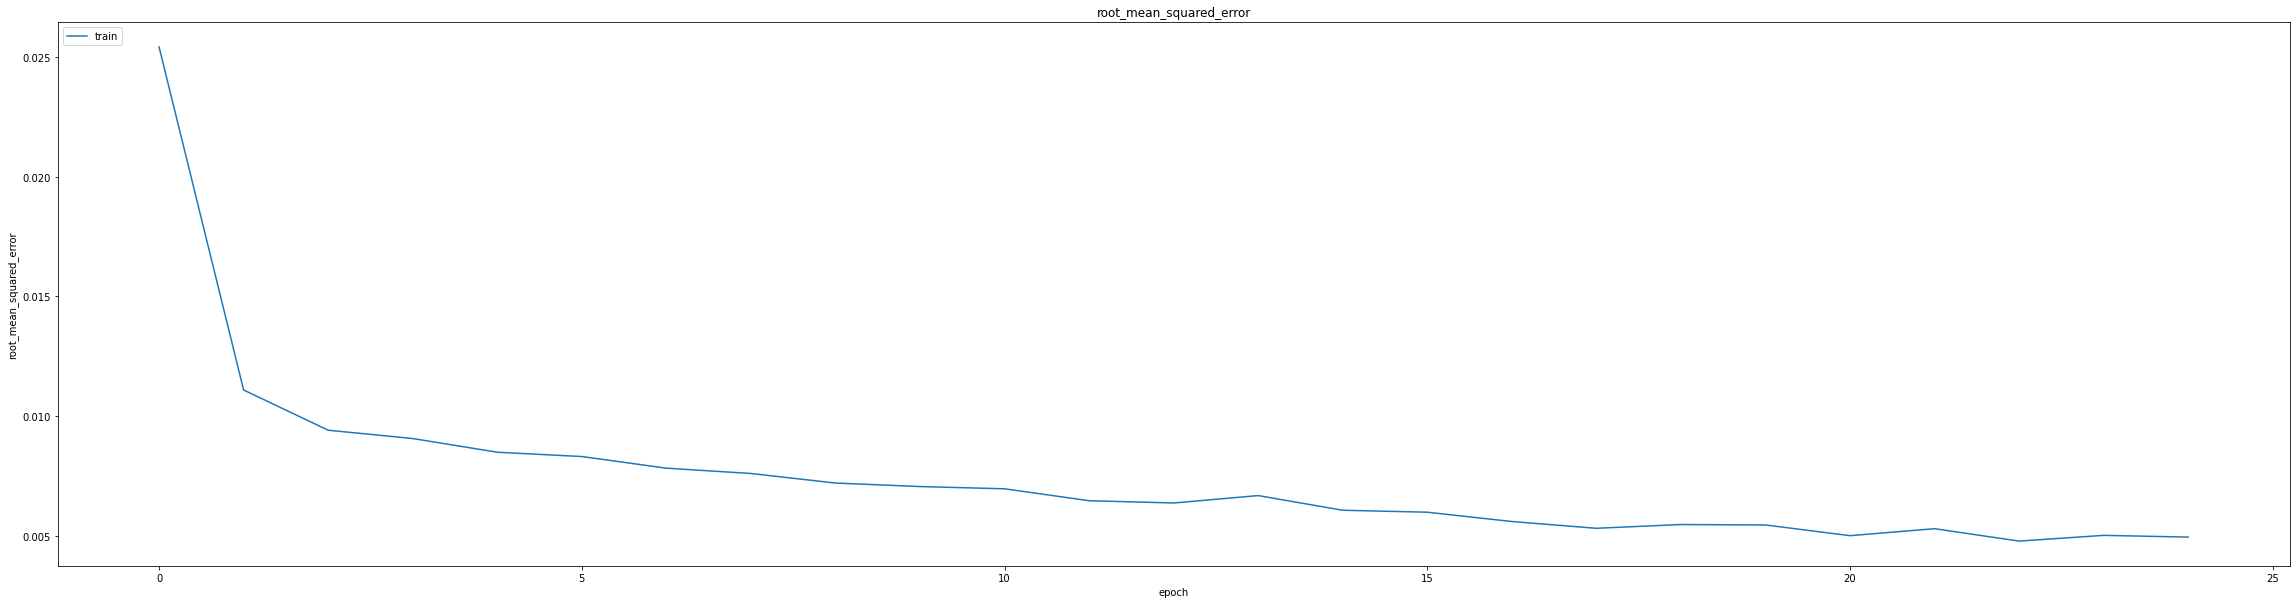

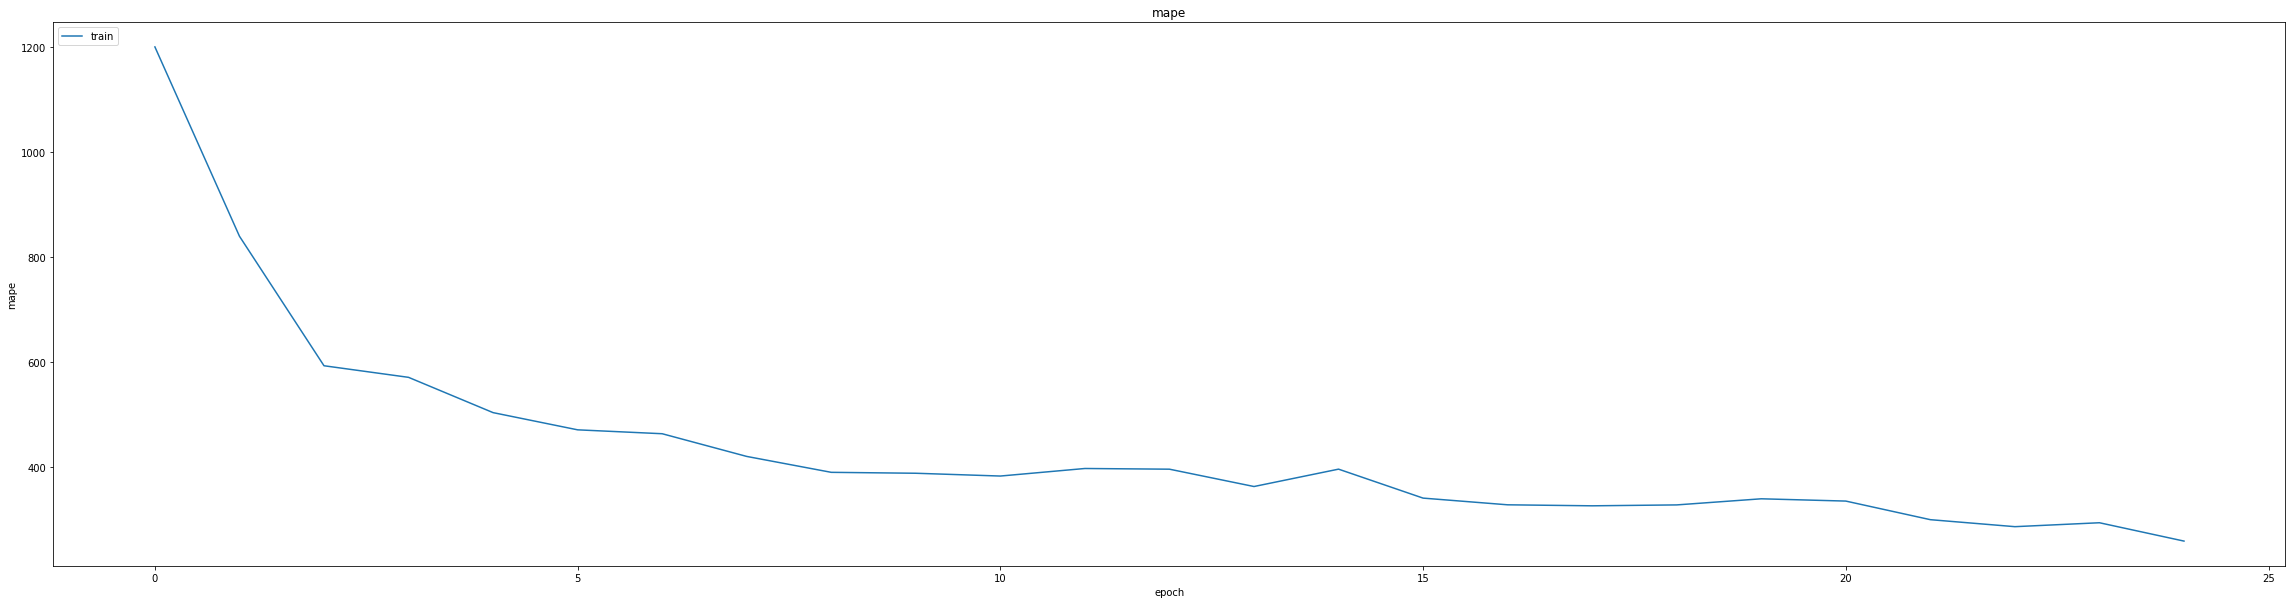

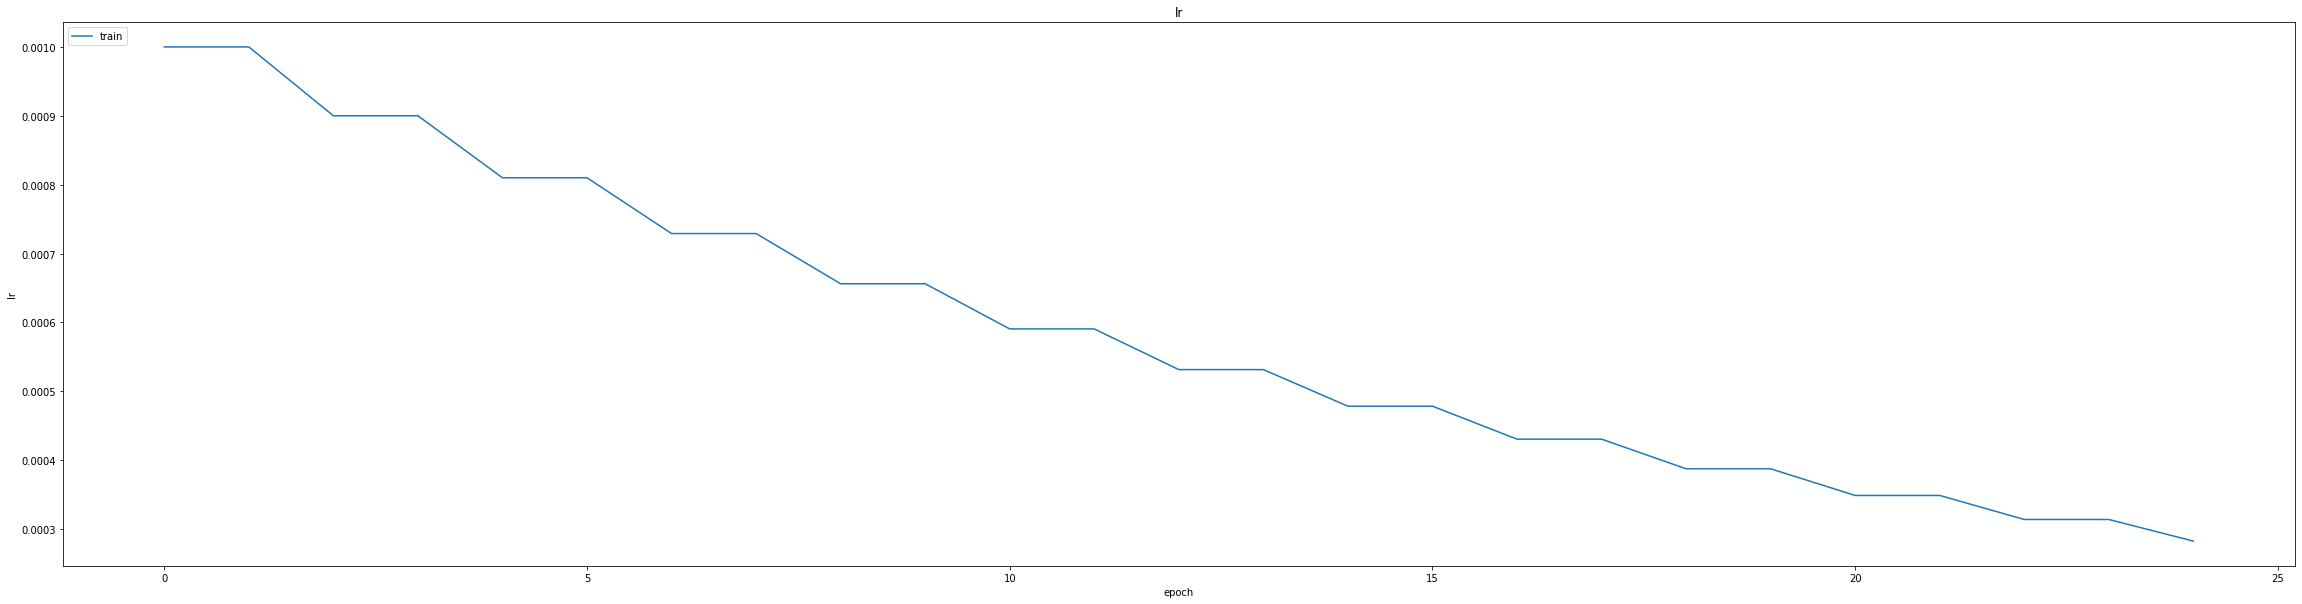

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008669772185385227
0.0117888068780303
464/464 [==============================] - 2s 4ms/step
0.9938055861699199


464/464 [==============================] - 2s 4ms/step


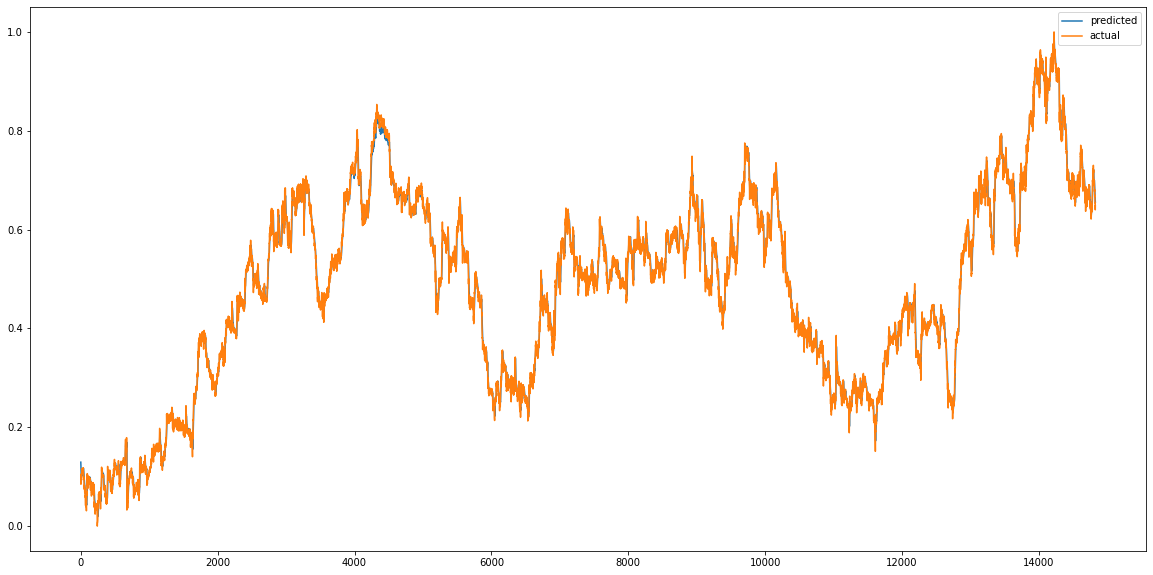

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


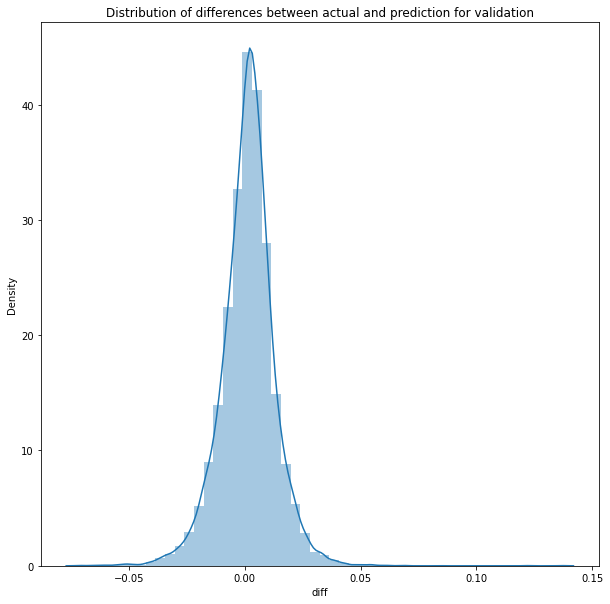

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


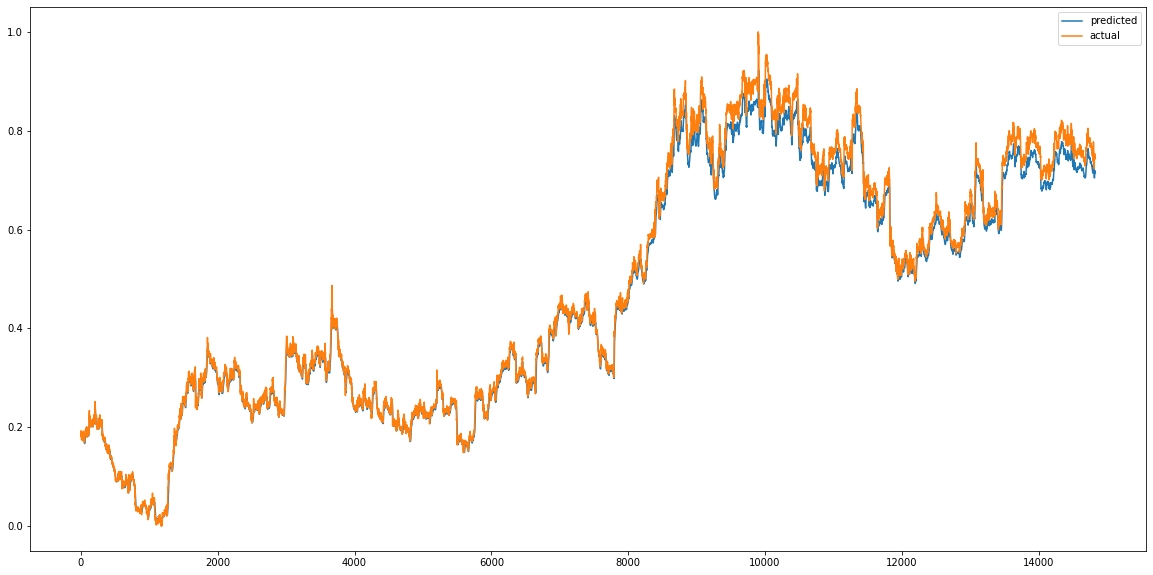

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


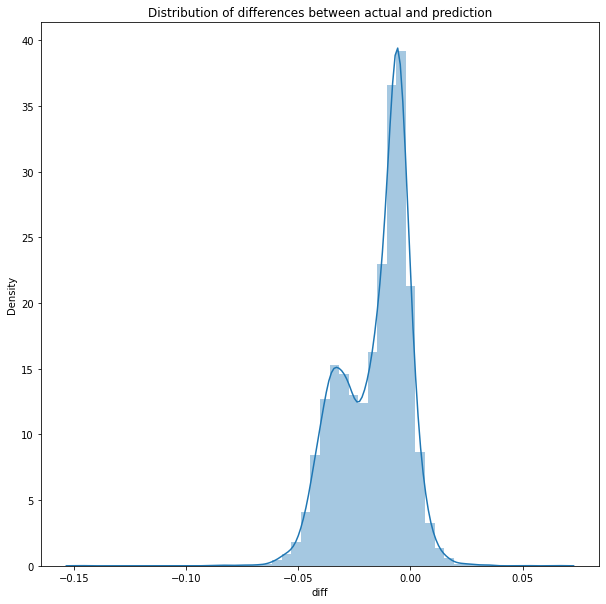

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004727865981969873
RMSE :  0.021743656504759894
MAE :  0.016717207468196948
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9925598562686692


count    14828.000000
mean        -0.015748
std          0.014994
min         -0.146766
25%         -0.027546
50%         -0.011399
75%         -0.004601
max          0.066173
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 626.4141 - mae: 5.3892 - mse: 626.4141 - root_mean_squared_error: 25.0283 - mape: 31777.9570
Epoch 1: val_mse improved from inf to 0.36237, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 17s 40ms/step - loss: 619.3864 - mae: 5.3362 - mse: 619.3864 - root_mean_squared_error: 24.8875 - mape: 31427.0391 - val_loss: 0.3624 - val_mae: 0.5684 - val_mse: 0.3624 - val_root_mean_squared_error: 0.6020 - val_mape: 71108.6094
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.2465 - mae: 0.4431 - mse: 0.2465 - root_mean_squared_error: 0.4965 - mape: 18154.3359
Epoch 2: val_mse improved from 0.36237 to 0.06620, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 0.2461 - mae: 0.4427 - mse: 0.2461 - root_mean_squared_error: 0.4961 - mape: 18107.7852 - val_loss: 0.0662 - val_mae: 0.2015 - val_mse: 0.0662 - val_root_mean_squared_error: 0.2573 - val_mape: 43822.7070
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0754 - mae: 0.2284 - mse: 0.0754 - root_mean_squared_error: 0.2746 - mape: 14436.0293
Epoch 3: val_mse improved from 0.06620 to 0.03826, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0754 - mae: 0.2283 - mse: 0.0754 - root_mean_squared_error: 0.2745 - mape: 14398.8594 - val_loss: 0.0383 - val_mae: 0.1599 - val_mse: 0.0383 - val_root_mean_squared_error: 0.1956 - val_mape: 33315.2734
Epoch 4/75
343/348 [============================>.] - ETA: 0s - loss: 0.0344 - mae: 0.1421 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 10040.0156
Epoch 4: val_mse improved from 0.03826 to 0.01587, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0343 - mae: 0.1417 - mse: 0.0343 - root_mean_squared_error: 0.1851 - mape: 9900.2666 - val_loss: 0.0159 - val_mae: 0.1016 - val_mse: 0.0159 - val_root_mean_squared_error: 0.1260 - val_mape: 26974.2148
Epoch 5/75
344/348 [============================>.] - ETA: 0s - loss: 0.0185 - mae: 0.1008 - mse: 0.0185 - root_mean_squared_error: 0.1360 - mape: 9068.5410
Epoch 5: val_mse improved from 0.01587 to 0.01169, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0184 - mae: 0.1007 - mse: 0.0184 - root_mean_squared_error: 0.1358 - mape: 8967.7812 - val_loss: 0.0117 - val_mae: 0.0901 - val_mse: 0.0117 - val_root_mean_squared_error: 0.1081 - val_mape: 23026.3672
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0772 - mse: 0.0115 - root_mean_squared_error: 0.1073 - mape: 7186.5405
Epoch 6: val_mse improved from 0.01169 to 0.00848, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0115 - mae: 0.0772 - mse: 0.0115 - root_mean_squared_error: 0.1073 - mape: 7147.7070 - val_loss: 0.0085 - val_mae: 0.0764 - val_mse: 0.0085 - val_root_mean_squared_error: 0.0921 - val_mape: 20284.1152
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0603 - mse: 0.0078 - root_mean_squared_error: 0.0885 - mape: 6890.3916
Epoch 7: val_mse improved from 0.00848 to 0.00690, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 0.0078 - mae: 0.0603 - mse: 0.0078 - root_mean_squared_error: 0.0884 - mape: 6852.9702 - val_loss: 0.0069 - val_mae: 0.0689 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0830 - val_mape: 18254.5723
Epoch 8/75
342/348 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0486 - mse: 0.0056 - root_mean_squared_error: 0.0751 - mape: 6276.2710
Epoch 8: val_mse improved from 0.00690 to 0.00476, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0056 - mae: 0.0485 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 6170.7222 - val_loss: 0.0048 - val_mae: 0.0553 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0690 - val_mape: 16672.0176
Epoch 9/75
342/348 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0407 - mse: 0.0043 - root_mean_squared_error: 0.0655 - mape: 5935.2461
Epoch 9: val_mse improved from 0.00476 to 0.00422, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0043 - mae: 0.0407 - mse: 0.0043 - root_mean_squared_error: 0.0655 - mape: 5835.4648 - val_loss: 0.0042 - val_mae: 0.0521 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0650 - val_mape: 15391.7568
Epoch 10/75
343/348 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0349 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 5305.4492
Epoch 10: val_mse improved from 0.00422 to 0.00307, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0034 - mae: 0.0349 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 5231.6465 - val_loss: 0.0031 - val_mae: 0.0430 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0554 - val_mape: 14285.9746
Epoch 11/75
343/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0306 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 4834.7681
Epoch 11: val_mse improved from 0.00307 to 0.00228, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 0.0027 - mae: 0.0306 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 4767.2866 - val_loss: 0.0023 - val_mae: 0.0360 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mape: 13293.3242
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0274 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 4523.4707
Epoch 12: val_mse improved from 0.00228 to 0.00190, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 0.0022 - mae: 0.0274 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 4511.7764 - val_loss: 0.0019 - val_mae: 0.0324 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 12399.5986
Epoch 13/75
345/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0247 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 4029.8091
Epoch 13: val_mse improved from 0.00190 to 0.00149, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0018 - mae: 0.0247 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 3996.4585 - val_loss: 0.0015 - val_mae: 0.0286 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 11587.0811
Epoch 14/75
342/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0228 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 3843.2559
Epoch 14: val_mse improved from 0.00149 to 0.00133, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 0.0016 - mae: 0.0227 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 3778.5337 - val_loss: 0.0013 - val_mae: 0.0266 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 10870.6670
Epoch 15/75
343/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0211 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 3658.8782
Epoch 15: val_mse improved from 0.00133 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0013 - mae: 0.0211 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 3607.6763 - val_loss: 0.0011 - val_mae: 0.0237 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 10214.8467
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0195 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 3480.0188
Epoch 16: val_mse improved from 0.00106 to 0.00092, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0011 - mae: 0.0195 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 3451.1584 - val_loss: 9.2309e-04 - val_mae: 0.0224 - val_mse: 9.2309e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 9589.2432
Epoch 17/75
344/348 [============================>.] - ETA: 0s - loss: 9.7657e-04 - mae: 0.0183 - mse: 9.7657e-04 - root_mean_squared_error: 0.0313 - mape: 3306.7646
Epoch 17: val_mse improved from 0.00092 to 0.00082, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 9.7505e-04 - mae: 0.0183 - mse: 9.7505e-04 - root_mean_squared_error: 0.0312 - mape: 3269.9707 - val_loss: 8.2139e-04 - val_mae: 0.0211 - val_mse: 8.2139e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 9000.6152
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 8.3057e-04 - mae: 0.0170 - mse: 8.3057e-04 - root_mean_squared_error: 0.0288 - mape: 3028.1516
Epoch 18: val_mse did not improve from 0.00082
348/348 [==============================] - 3s 10ms/step - loss: 8.3061e-04 - mae: 0.0170 - mse: 8.3061e-04 - root_mean_squared_error: 0.0288 - mape: 3020.3374 - val_loss: 9.3537e-04 - val_mae: 0.0230 - val_mse: 9.3537e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 8437.2549
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 7.2124e-04 - mae: 0.0161 - mse: 7.2124e-04 - root_mean_squared_error: 0.0269 - mape: 2811.4934
Epoch 19: val_mse did not improve from 0.00082
348/348 [

348/348 [==============================] - 10s 30ms/step - loss: 6.1699e-04 - mae: 0.0151 - mse: 6.1699e-04 - root_mean_squared_error: 0.0248 - mape: 2587.1907 - val_loss: 7.5954e-04 - val_mae: 0.0205 - val_mse: 7.5954e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 7403.6001
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 5.3517e-04 - mae: 0.0143 - mse: 5.3517e-04 - root_mean_squared_error: 0.0231 - mape: 2424.9773
Epoch 21: val_mse did not improve from 0.00076
348/348 [==============================] - 3s 10ms/step - loss: 5.3600e-04 - mae: 0.0143 - mse: 5.3600e-04 - root_mean_squared_error: 0.0232 - mape: 2404.9680 - val_loss: 7.9761e-04 - val_mae: 0.0212 - val_mse: 7.9761e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 6931.1362
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 4.5915e-04 - mae: 0.0135 - mse: 4.5915e-04 - root_mean_squared_error: 0.0214 - mape: 2369.2944
Epoch 22: val_mse improved from 0.00076 to 0.00070, savi

348/348 [==============================] - 10s 30ms/step - loss: 4.5915e-04 - mae: 0.0135 - mse: 4.5915e-04 - root_mean_squared_error: 0.0214 - mape: 2369.2944 - val_loss: 7.0210e-04 - val_mae: 0.0198 - val_mse: 7.0210e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 6457.4795
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 3.8733e-04 - mae: 0.0128 - mse: 3.8733e-04 - root_mean_squared_error: 0.0197 - mape: 2131.5601
Epoch 23: val_mse did not improve from 0.00070
348/348 [==============================] - 3s 10ms/step - loss: 3.8686e-04 - mae: 0.0128 - mse: 3.8686e-04 - root_mean_squared_error: 0.0197 - mape: 2113.8779 - val_loss: 7.0946e-04 - val_mae: 0.0198 - val_mse: 7.0946e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 5850.2852
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 3.3035e-04 - mae: 0.0122 - mse: 3.3035e-04 - root_mean_squared_error: 0.0182 - mape: 1845.9978
Epoch 24: val_mse improved from 0.00070 to 0.00057, savi

348/348 [==============================] - 10s 29ms/step - loss: 3.3046e-04 - mae: 0.0122 - mse: 3.3046e-04 - root_mean_squared_error: 0.0182 - mape: 1835.9695 - val_loss: 5.7082e-04 - val_mae: 0.0176 - val_mse: 5.7082e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 5396.9092
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 2.9432e-04 - mae: 0.0118 - mse: 2.9432e-04 - root_mean_squared_error: 0.0172 - mape: 1795.8209
Epoch 25: val_mse did not improve from 0.00057
348/348 [==============================] - 3s 10ms/step - loss: 2.9404e-04 - mae: 0.0118 - mse: 2.9404e-04 - root_mean_squared_error: 0.0171 - mape: 1770.7023 - val_loss: 6.4003e-04 - val_mae: 0.0187 - val_mse: 6.4003e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 5032.6621
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 2.5681e-04 - mae: 0.0111 - mse: 2.5681e-04 - root_mean_squared_error: 0.0160 - mape: 1667.8347
Epoch 26: val_mse did not improve from 0.00057
348/348 [

348/348 [==============================] - 10s 28ms/step - loss: 2.3027e-04 - mae: 0.0106 - mse: 2.3027e-04 - root_mean_squared_error: 0.0152 - mape: 1529.0135 - val_loss: 5.1478e-04 - val_mae: 0.0167 - val_mse: 5.1478e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 4489.6138
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 2.0778e-04 - mae: 0.0102 - mse: 2.0778e-04 - root_mean_squared_error: 0.0144 - mape: 1498.7393
Epoch 28: val_mse did not improve from 0.00051
348/348 [==============================] - 3s 10ms/step - loss: 2.0778e-04 - mae: 0.0102 - mse: 2.0778e-04 - root_mean_squared_error: 0.0144 - mape: 1498.7393 - val_loss: 6.5766e-04 - val_mae: 0.0190 - val_mse: 6.5766e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 4281.9326
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 1.9067e-04 - mae: 0.0099 - mse: 1.9067e-04 - root_mean_squared_error: 0.0138 - mape: 1433.0944
Epoch 29: val_mse did not improve from 0.00051
348/348 [

348/348 [==============================] - 11s 30ms/step - loss: 1.2681e-04 - mae: 0.0083 - mse: 1.2681e-04 - root_mean_squared_error: 0.0113 - mape: 1082.1620 - val_loss: 4.8722e-04 - val_mae: 0.0165 - val_mse: 4.8722e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 3367.9788
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 1.1686e-04 - mae: 0.0079 - mse: 1.1686e-04 - root_mean_squared_error: 0.0108 - mape: 1039.5918
Epoch 35: val_mse improved from 0.00049 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.1700e-04 - mae: 0.0080 - mse: 1.1700e-04 - root_mean_squared_error: 0.0108 - mape: 1033.9508 - val_loss: 4.4932e-04 - val_mae: 0.0157 - val_mse: 4.4932e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 3193.6460
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 1.1642e-04 - mae: 0.0079 - mse: 1.1642e-04 - root_mean_squared_error: 0.0108 - mape: 988.2161 
Epoch 36: val_mse improved from 0.00045 to 0.00044, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 1.1697e-04 - mae: 0.0080 - mse: 1.1697e-04 - root_mean_squared_error: 0.0108 - mape: 982.8336 - val_loss: 4.4451e-04 - val_mae: 0.0157 - val_mse: 4.4451e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 3206.1770
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 1.0998e-04 - mae: 0.0077 - mse: 1.0998e-04 - root_mean_squared_error: 0.0105 - mape: 929.4680
Epoch 37: val_mse improved from 0.00044 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 1.0989e-04 - mae: 0.0077 - mse: 1.0989e-04 - root_mean_squared_error: 0.0105 - mape: 924.4028 - val_loss: 4.3425e-04 - val_mae: 0.0155 - val_mse: 4.3425e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 3147.6375
Epoch 38/75
344/348 [============================>.] - ETA: 0s - loss: 1.0736e-04 - mae: 0.0076 - mse: 1.0736e-04 - root_mean_squared_error: 0.0104 - mape: 927.7516
Epoch 38: val_mse improved from 0.00043 to 0.00042, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 1.0723e-04 - mae: 0.0076 - mse: 1.0723e-04 - root_mean_squared_error: 0.0104 - mape: 917.4064 - val_loss: 4.1847e-04 - val_mae: 0.0151 - val_mse: 4.1847e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3068.9087
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 9.3275e-05 - mae: 0.0071 - mse: 9.3275e-05 - root_mean_squared_error: 0.0097 - mape: 883.7023
Epoch 39: val_mse improved from 0.00042 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 9.3568e-05 - mae: 0.0071 - mse: 9.3568e-05 - root_mean_squared_error: 0.0097 - mape: 876.3670 - val_loss: 4.1046e-04 - val_mae: 0.0150 - val_mse: 4.1046e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3187.7678
Epoch 40/75
342/348 [============================>.] - ETA: 0s - loss: 9.9682e-05 - mae: 0.0074 - mse: 9.9682e-05 - root_mean_squared_error: 0.0100 - mape: 850.8193
Epoch 40: val_mse did not improve from 0.00041
348/348 [==============================] - 3s 10ms/step - loss: 9.9565e-05 - mae: 0.0074 - mse: 9.9565e-05 - root_mean_squared_error: 0.0100 - mape: 836.4649 - val_loss: 4.4890e-04 - val_mae: 0.0156 - val_mse: 4.4890e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 3198.6553
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 9.3940e-05 - mae: 0.0072 - mse: 9.3940e-05 - root_mean_squared_error: 0.0097 - mape: 829.4214
Epoch 41: val_mse improved from 0.00041 to 0.00041, saving m

348/348 [==============================] - 11s 31ms/step - loss: 9.3895e-05 - mae: 0.0072 - mse: 9.3895e-05 - root_mean_squared_error: 0.0097 - mape: 822.5357 - val_loss: 4.1027e-04 - val_mae: 0.0150 - val_mse: 4.1027e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3164.9268
Epoch 42/75
345/348 [============================>.] - ETA: 0s - loss: 8.5947e-05 - mae: 0.0068 - mse: 8.5947e-05 - root_mean_squared_error: 0.0093 - mape: 814.9169
Epoch 42: val_mse improved from 0.00041 to 0.00039, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 8.6117e-05 - mae: 0.0069 - mse: 8.6117e-05 - root_mean_squared_error: 0.0093 - mape: 808.1427 - val_loss: 3.8776e-04 - val_mae: 0.0148 - val_mse: 3.8776e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3349.1289
Epoch 43/75
345/348 [============================>.] - ETA: 0s - loss: 8.5216e-05 - mae: 0.0068 - mse: 8.5216e-05 - root_mean_squared_error: 0.0092 - mape: 779.1981
Epoch 43: val_mse did not improve from 0.00039
348/348 [==============================] - 4s 10ms/step - loss: 8.5176e-05 - mae: 0.0068 - mse: 8.5176e-05 - root_mean_squared_error: 0.0092 - mape: 772.7180 - val_loss: 3.8970e-04 - val_mae: 0.0146 - val_mse: 3.8970e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3136.4790
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 8.3082e-05 - mae: 0.0068 - mse: 8.3082e-05 - root_mean_squared_error: 0.0091 - mape: 771.0251
Epoch 44: val_mse did not improve from 0.00039
348/348 [====

348/348 [==============================] - 10s 29ms/step - loss: 7.7891e-05 - mae: 0.0065 - mse: 7.7891e-05 - root_mean_squared_error: 0.0088 - mape: 726.3493 - val_loss: 3.6259e-04 - val_mae: 0.0140 - val_mse: 3.6259e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3104.4185
Epoch 47/75
344/348 [============================>.] - ETA: 0s - loss: 8.1177e-05 - mae: 0.0067 - mse: 8.1177e-05 - root_mean_squared_error: 0.0090 - mape: 716.9684
Epoch 47: val_mse improved from 0.00036 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 8.1177e-05 - mae: 0.0067 - mse: 8.1177e-05 - root_mean_squared_error: 0.0090 - mape: 708.9654 - val_loss: 3.5556e-04 - val_mae: 0.0140 - val_mse: 3.5556e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 3366.4854
Epoch 48/75
345/348 [============================>.] - ETA: 0s - loss: 7.9300e-05 - mae: 0.0066 - mse: 7.9300e-05 - root_mean_squared_error: 0.0089 - mape: 691.5037
Epoch 48: val_mse improved from 0.00036 to 0.00034, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 7.9090e-05 - mae: 0.0066 - mse: 7.9090e-05 - root_mean_squared_error: 0.0089 - mape: 685.7507 - val_loss: 3.3972e-04 - val_mae: 0.0138 - val_mse: 3.3972e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3398.1360
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 7.0266e-05 - mae: 0.0062 - mse: 7.0266e-05 - root_mean_squared_error: 0.0084 - mape: 662.4758
Epoch 49: val_mse did not improve from 0.00034
348/348 [==============================] - 3s 10ms/step - loss: 7.0264e-05 - mae: 0.0062 - mse: 7.0264e-05 - root_mean_squared_error: 0.0084 - mape: 656.9672 - val_loss: 3.5429e-04 - val_mae: 0.0144 - val_mse: 3.5429e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 3140.1958
Epoch 50/75
345/348 [============================>.] - ETA: 0s - loss: 6.7057e-05 - mae: 0.0061 - mse: 6.7057e-05 - root_mean_squared_error: 0.0082 - mape: 650.2955
Epoch 50: val_mse improved from 0.00034 to 0.00033, saving m

348/348 [==============================] - 10s 30ms/step - loss: 6.7012e-05 - mae: 0.0061 - mse: 6.7012e-05 - root_mean_squared_error: 0.0082 - mape: 644.8896 - val_loss: 3.2678e-04 - val_mae: 0.0133 - val_mse: 3.2678e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 3229.5234
Epoch 51/75
342/348 [============================>.] - ETA: 0s - loss: 7.8202e-05 - mae: 0.0066 - mse: 7.8202e-05 - root_mean_squared_error: 0.0088 - mape: 643.1015
Epoch 51: val_mse did not improve from 0.00033
348/348 [==============================] - 3s 10ms/step - loss: 7.8027e-05 - mae: 0.0066 - mse: 7.8027e-05 - root_mean_squared_error: 0.0088 - mape: 632.2562 - val_loss: 3.5104e-04 - val_mae: 0.0139 - val_mse: 3.5104e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3247.9231
Epoch 52/75
345/348 [============================>.] - ETA: 0s - loss: 7.4633e-05 - mae: 0.0064 - mse: 7.4633e-05 - root_mean_squared_error: 0.0086 - mape: 633.8326
Epoch 52: val_mse improved from 0.00033 to 0.00032, saving m

348/348 [==============================] - 10s 29ms/step - loss: 7.4413e-05 - mae: 0.0064 - mse: 7.4413e-05 - root_mean_squared_error: 0.0086 - mape: 628.5696 - val_loss: 3.2332e-04 - val_mae: 0.0134 - val_mse: 3.2332e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 3239.8306
Epoch 53/75
347/348 [============================>.] - ETA: 0s - loss: 6.2628e-05 - mae: 0.0059 - mse: 6.2628e-05 - root_mean_squared_error: 0.0079 - mape: 614.0474
Epoch 53: val_mse improved from 0.00032 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.2574e-05 - mae: 0.0059 - mse: 6.2574e-05 - root_mean_squared_error: 0.0079 - mape: 612.4567 - val_loss: 2.9244e-04 - val_mae: 0.0126 - val_mse: 2.9244e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2925.8389
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 6.4330e-05 - mae: 0.0059 - mse: 6.4330e-05 - root_mean_squared_error: 0.0080 - mape: 607.2941
Epoch 54: val_mse did not improve from 0.00029
348/348 [==============================] - 5s 13ms/step - loss: 6.4414e-05 - mae: 0.0059 - mse: 6.4414e-05 - root_mean_squared_error: 0.0080 - mape: 603.9858 - val_loss: 2.9387e-04 - val_mae: 0.0128 - val_mse: 2.9387e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 3111.7542
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 7.2381e-05 - mae: 0.0063 - mse: 7.2381e-05 - root_mean_squared_error: 0.0085 - mape: 584.8139
Epoch 55: val_mse did not improve from 0.00029
348/348 [====

348/348 [==============================] - 10s 30ms/step - loss: 6.7499e-05 - mae: 0.0061 - mse: 6.7499e-05 - root_mean_squared_error: 0.0082 - mape: 577.8755 - val_loss: 2.8476e-04 - val_mae: 0.0123 - val_mse: 2.8476e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 3057.9080
Epoch 57/75
344/348 [============================>.] - ETA: 0s - loss: 7.7569e-05 - mae: 0.0065 - mse: 7.7569e-05 - root_mean_squared_error: 0.0088 - mape: 587.2520
Epoch 57: val_mse did not improve from 0.00028
348/348 [==============================] - 3s 10ms/step - loss: 7.7379e-05 - mae: 0.0065 - mse: 7.7379e-05 - root_mean_squared_error: 0.0088 - mape: 580.7044 - val_loss: 2.9261e-04 - val_mae: 0.0126 - val_mse: 2.9261e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 3114.0017
Epoch 58/75
344/348 [============================>.] - ETA: 0s - loss: 8.2475e-05 - mae: 0.0067 - mse: 8.2475e-05 - root_mean_squared_error: 0.0091 - mape: 579.3040
Epoch 58: val_mse did not improve from 0.00028
348/348 [====

348/348 [==============================] - 10s 29ms/step - loss: 5.8976e-05 - mae: 0.0057 - mse: 5.8976e-05 - root_mean_squared_error: 0.0077 - mape: 535.6874 - val_loss: 2.7305e-04 - val_mae: 0.0121 - val_mse: 2.7305e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3098.2200
Epoch 61/75
342/348 [============================>.] - ETA: 0s - loss: 7.6852e-05 - mae: 0.0065 - mse: 7.6852e-05 - root_mean_squared_error: 0.0088 - mape: 539.5806
Epoch 61: val_mse did not improve from 0.00027
348/348 [==============================] - 3s 10ms/step - loss: 7.6314e-05 - mae: 0.0065 - mse: 7.6314e-05 - root_mean_squared_error: 0.0087 - mape: 530.4589 - val_loss: 3.3372e-04 - val_mae: 0.0143 - val_mse: 3.3372e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 3313.0562
Epoch 62/75
343/348 [============================>.] - ETA: 0s - loss: 6.6019e-05 - mae: 0.0061 - mse: 6.6019e-05 - root_mean_squared_error: 0.0081 - mape: 546.6217
Epoch 62: val_mse did not improve from 0.00027
348/348 [====

348/348 [==============================] - 10s 30ms/step - loss: 8.5618e-05 - mae: 0.0069 - mse: 8.5618e-05 - root_mean_squared_error: 0.0093 - mape: 491.5620 - val_loss: 2.6353e-04 - val_mae: 0.0120 - val_mse: 2.6353e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 2975.0579
Epoch 67/75
343/348 [============================>.] - ETA: 0s - loss: 6.1811e-05 - mae: 0.0058 - mse: 6.1811e-05 - root_mean_squared_error: 0.0079 - mape: 494.0968
Epoch 67: val_mse did not improve from 0.00026
348/348 [==============================] - 3s 10ms/step - loss: 6.2105e-05 - mae: 0.0059 - mse: 6.2105e-05 - root_mean_squared_error: 0.0079 - mape: 487.1743 - val_loss: 3.8743e-04 - val_mae: 0.0157 - val_mse: 3.8743e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3181.5671
Epoch 68/75
343/348 [============================>.] - ETA: 0s - loss: 5.3544e-05 - mae: 0.0054 - mse: 5.3544e-05 - root_mean_squared_error: 0.0073 - mape: 464.3832
Epoch 68: val_mse did not improve from 0.00026
348/348 [====

348/348 [==============================] - 10s 30ms/step - loss: 5.2483e-05 - mae: 0.0054 - mse: 5.2483e-05 - root_mean_squared_error: 0.0072 - mape: 428.7085 - val_loss: 2.4224e-04 - val_mae: 0.0115 - val_mse: 2.4224e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2935.6475
Epoch 72/75
347/348 [============================>.] - ETA: 0s - loss: 4.9389e-05 - mae: 0.0053 - mse: 4.9389e-05 - root_mean_squared_error: 0.0070 - mape: 419.9597
Epoch 72: val_mse did not improve from 0.00024
348/348 [==============================] - 3s 10ms/step - loss: 4.9499e-05 - mae: 0.0053 - mse: 4.9499e-05 - root_mean_squared_error: 0.0070 - mape: 418.8711 - val_loss: 4.3797e-04 - val_mae: 0.0177 - val_mse: 4.3797e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3246.2612
Epoch 73/75
345/348 [============================>.] - ETA: 0s - loss: 7.1782e-05 - mae: 0.0063 - mse: 7.1782e-05 - root_mean_squared_error: 0.0085 - mape: 412.5883
Epoch 73: val_mse did not improve from 0.00024
348/348 [====

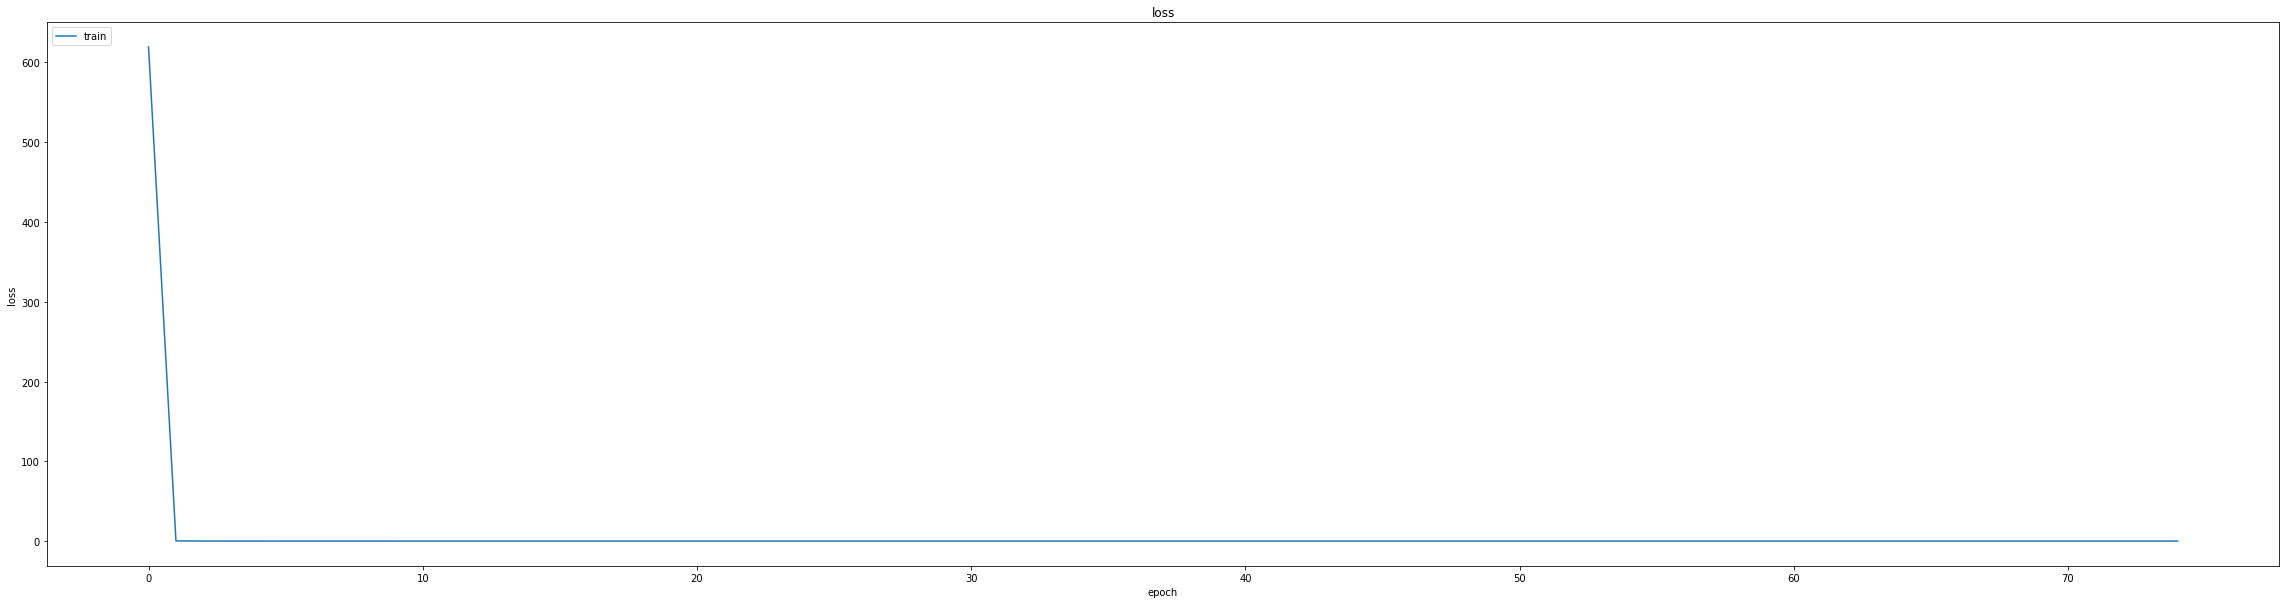

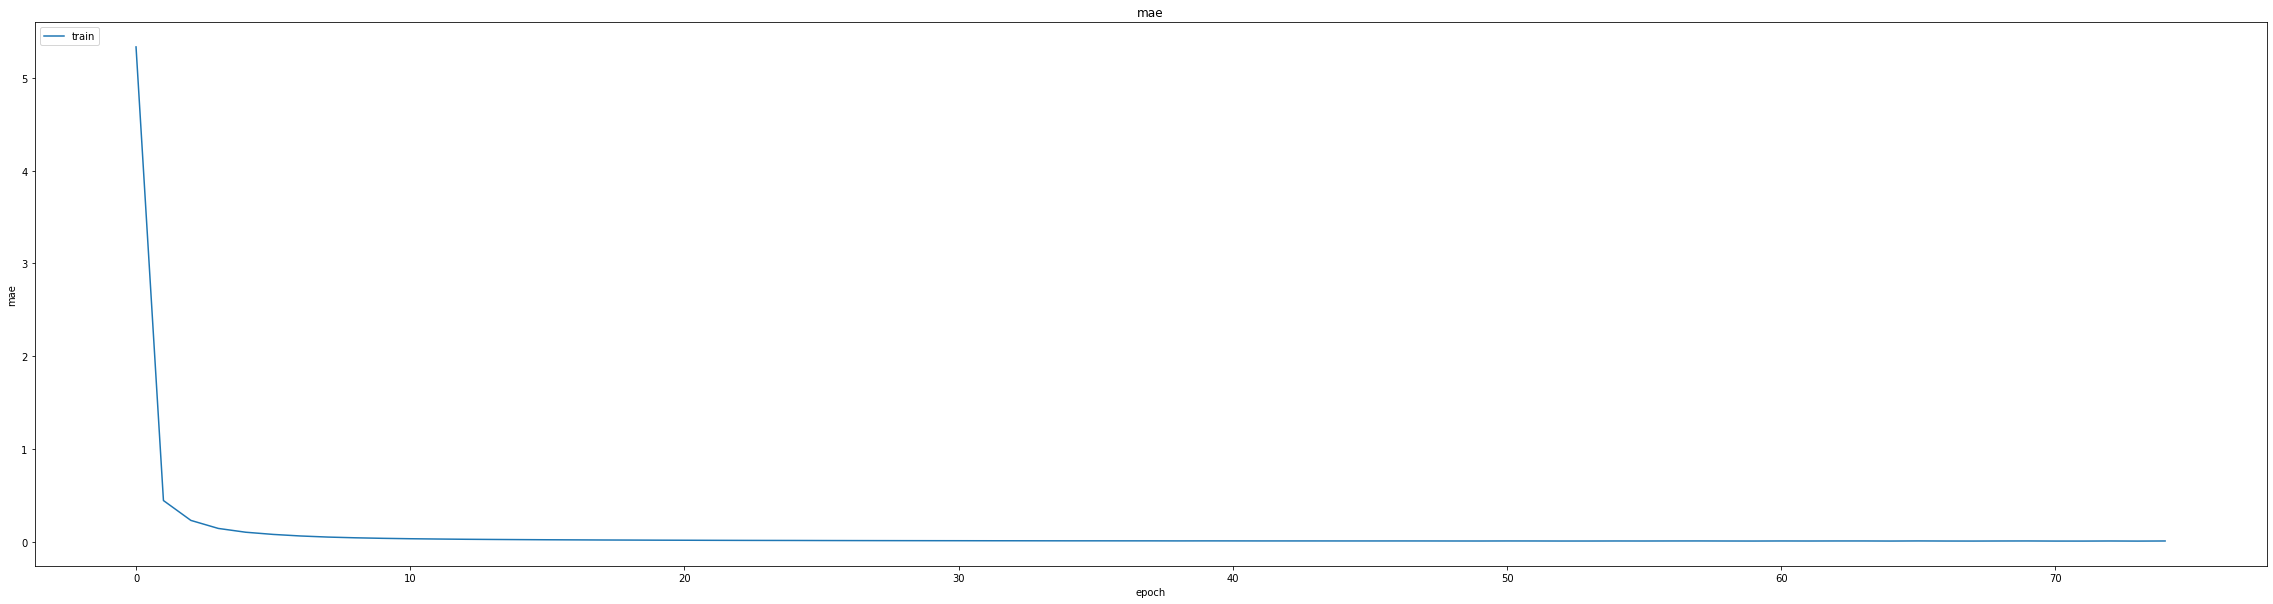

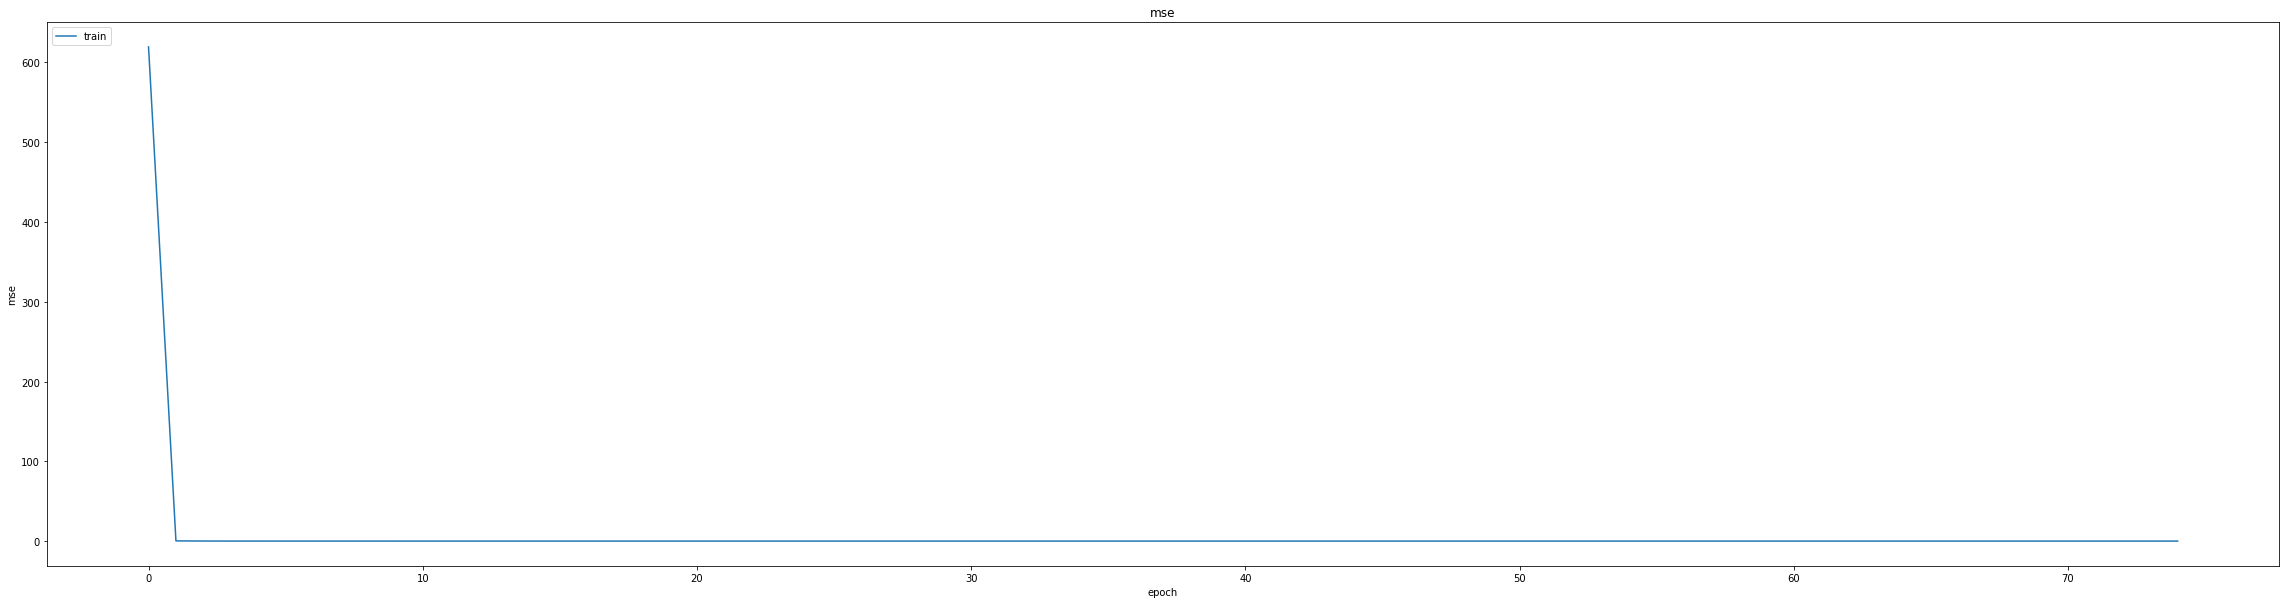

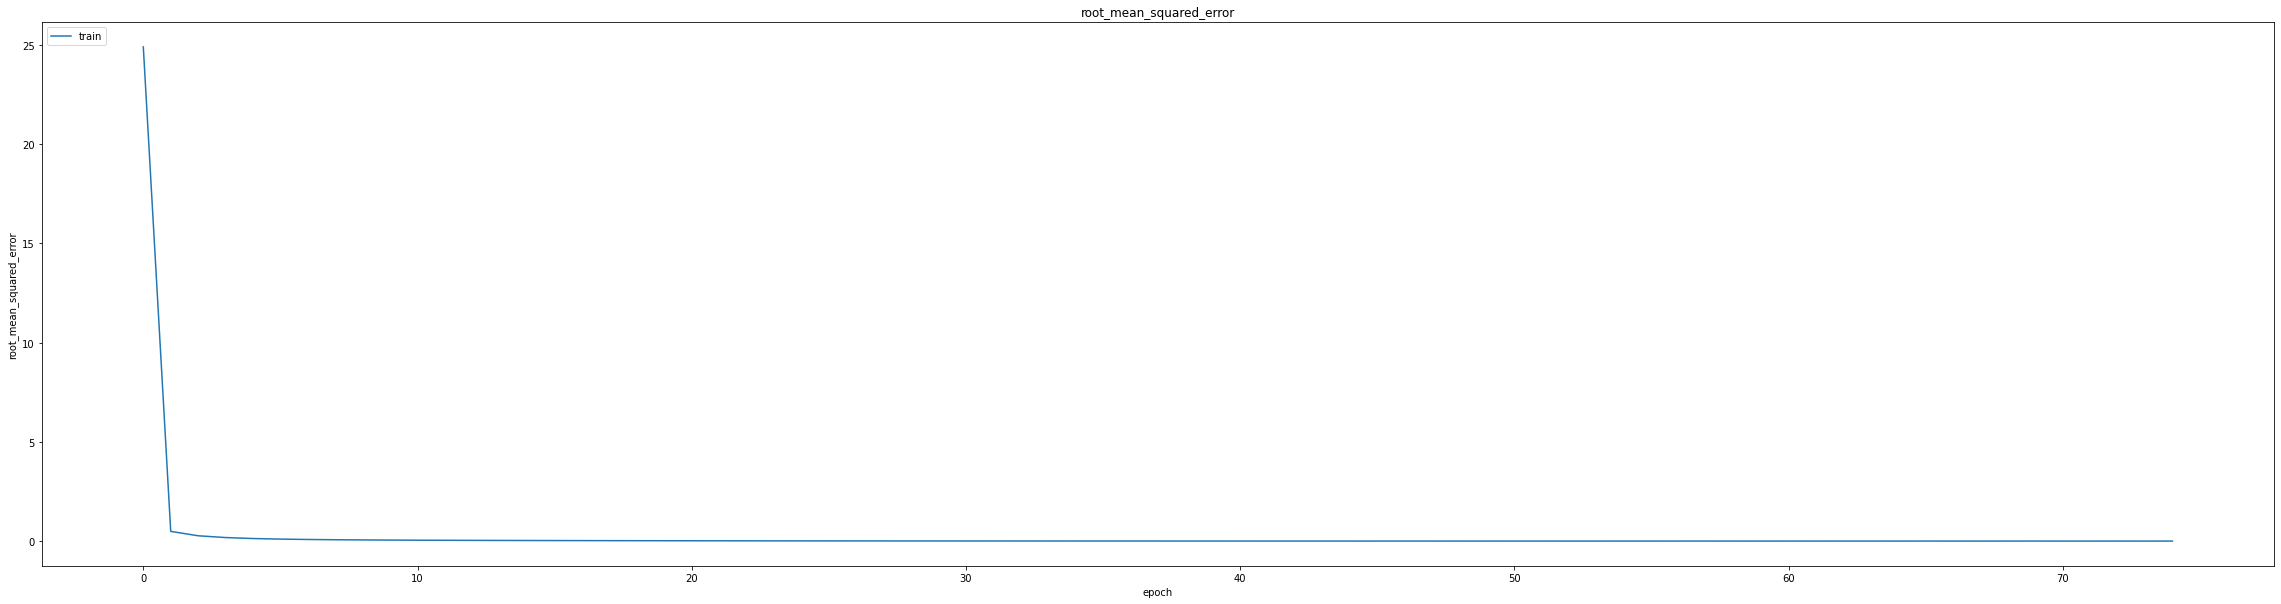

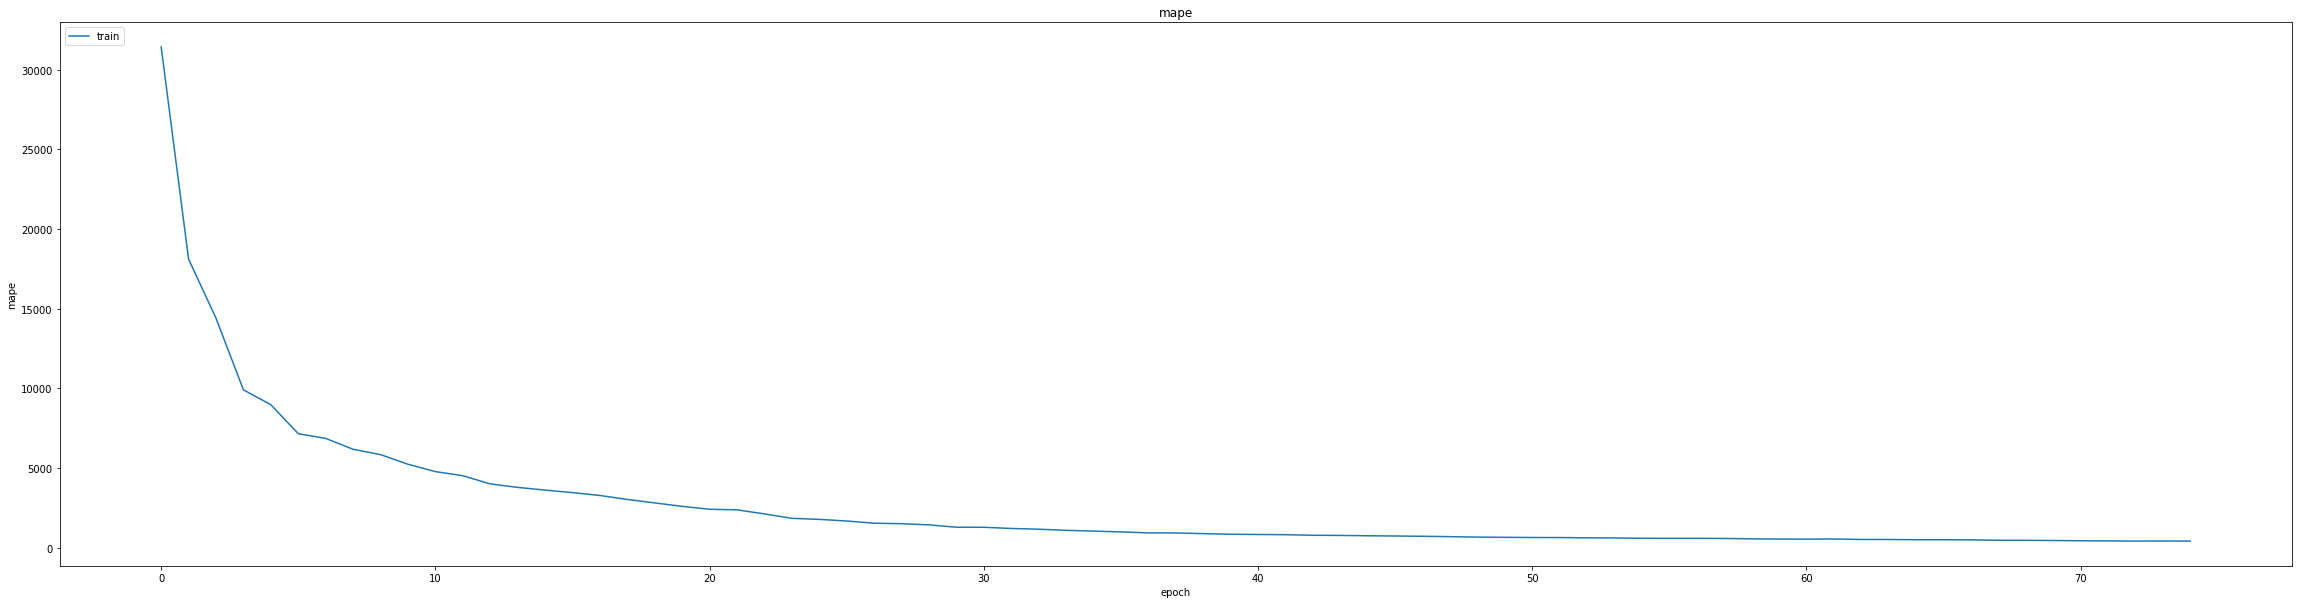

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01151816826313734
0.015564105473458767
464/464 [==============================] - 2s 3ms/step
0.9870382055110652


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 4.5951e-04 - mae: 0.0091 - mse: 4.5951e-04 - root_mean_squared_error: 0.0214 - mape: 429.5621
Epoch 1: val_mse did not improve from 0.00024
348/348 [==============================] - 7s 12ms/step - loss: 4.5841e-04 - mae: 0.0091 - mse: 4.5841e-04 - root_mean_squared_error: 0.0214 - mape: 428.4472 - val_loss: 4.1495e-04 - val_mae: 0.0164 - val_mse: 4.1495e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 2891.0684 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 3.4215e-05 - mae: 0.0042 - mse: 3.4215e-05 - root_mean_squared_error: 0.0058 - mape: 355.2914
Epoch 2: val_mse did not improve from 0.00024
348/348 [==============================] - 4s 13ms/step - loss: 3.4215e-05 - mae: 0.0042 - mse: 3.4215e-05 - root_mean_squared_error: 0.0058 - mape: 355.2914 - val_loss: 4.1166e-04 - val_mae: 0.0166 - val_mse: 4.1166e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3084.7502 - lr:

348/348 [==============================] - 11s 31ms/step - loss: 2.6207e-05 - mae: 0.0038 - mse: 2.6207e-05 - root_mean_squared_error: 0.0051 - mape: 254.6359 - val_loss: 2.4090e-04 - val_mae: 0.0127 - val_mse: 2.4090e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 2285.5012 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
343/348 [============================>.] - ETA: 0s - loss: 2.5865e-05 - mae: 0.0037 - mse: 2.5865e-05 - root_mean_squared_error: 0.0051 - mape: 256.4709
Epoch 17: val_mse did not improve from 0.00024
348/348 [==============================] - 3s 10ms/step - loss: 2.5909e-05 - mae: 0.0038 - mse: 2.5909e-05 - root_mean_squared_error: 0.0051 - mape: 252.8816 - val_loss: 3.3180e-04 - val_mae: 0.0156 - val_mse: 3.3180e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2555.1526 - lr: 4.3047e-04
Epoch 18/25
343/348 [============================>.] - ETA: 0s - loss: 2.4671e-05 - mae: 0.0036 - mse: 2.4671e-05 - root_mean_squared_error: 0.0050 - mape:

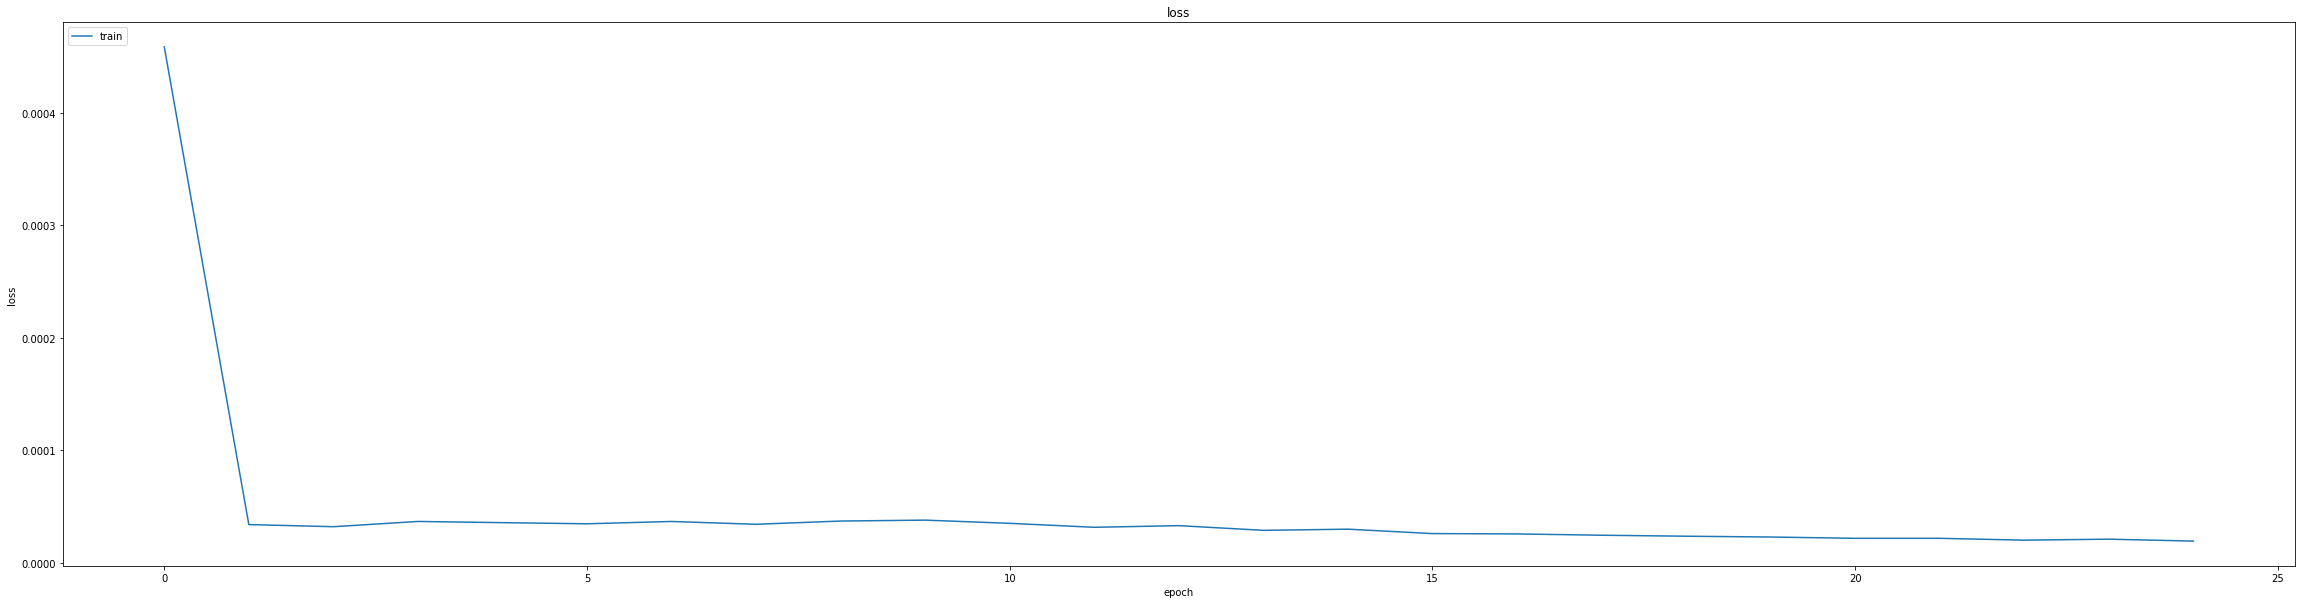

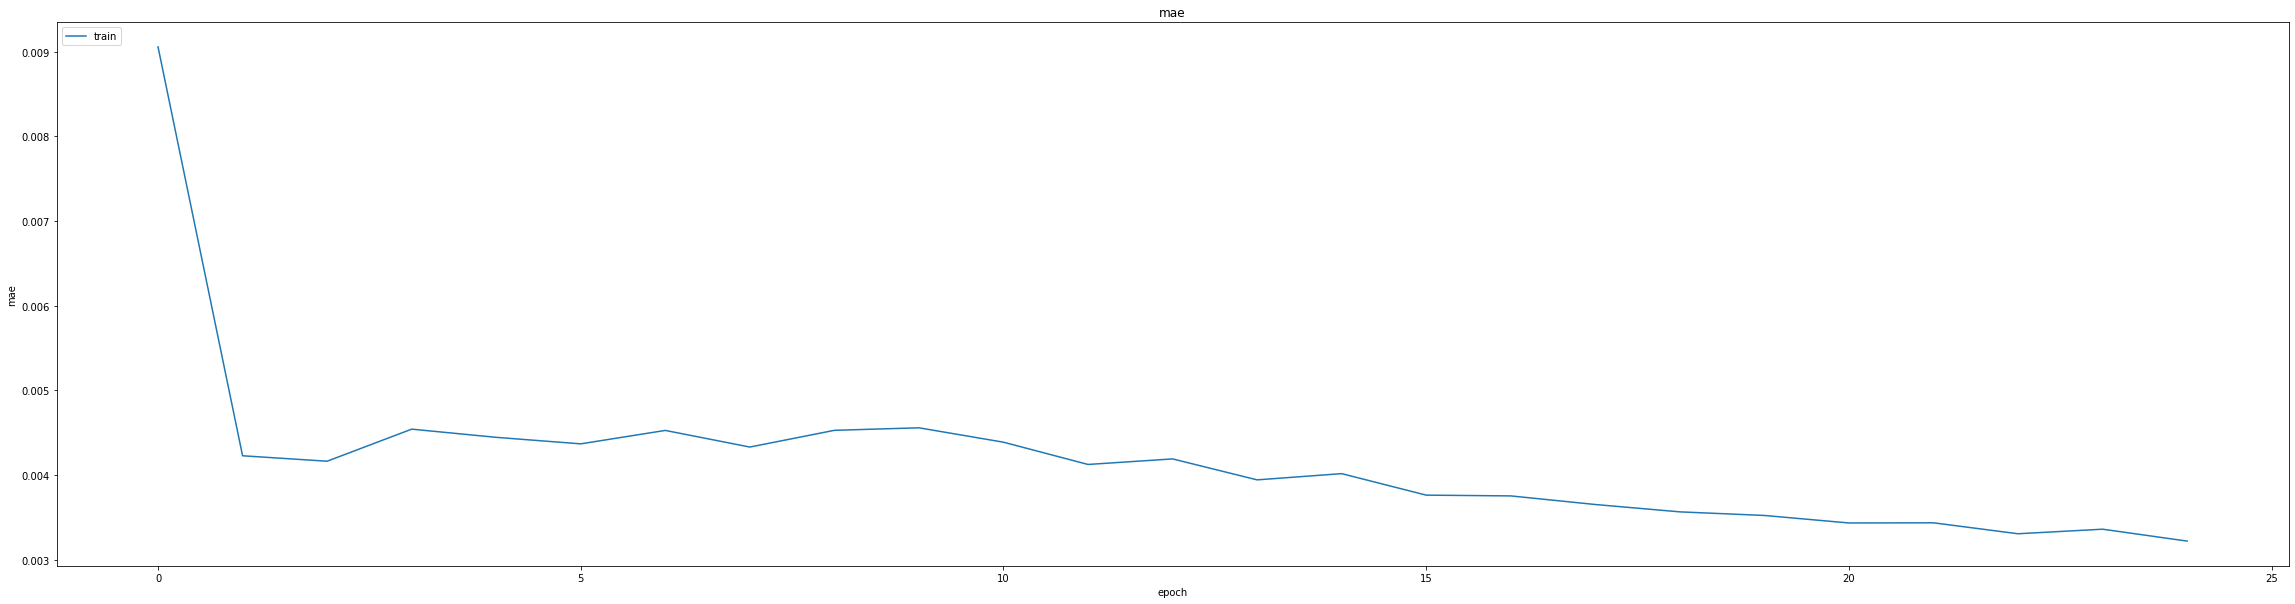

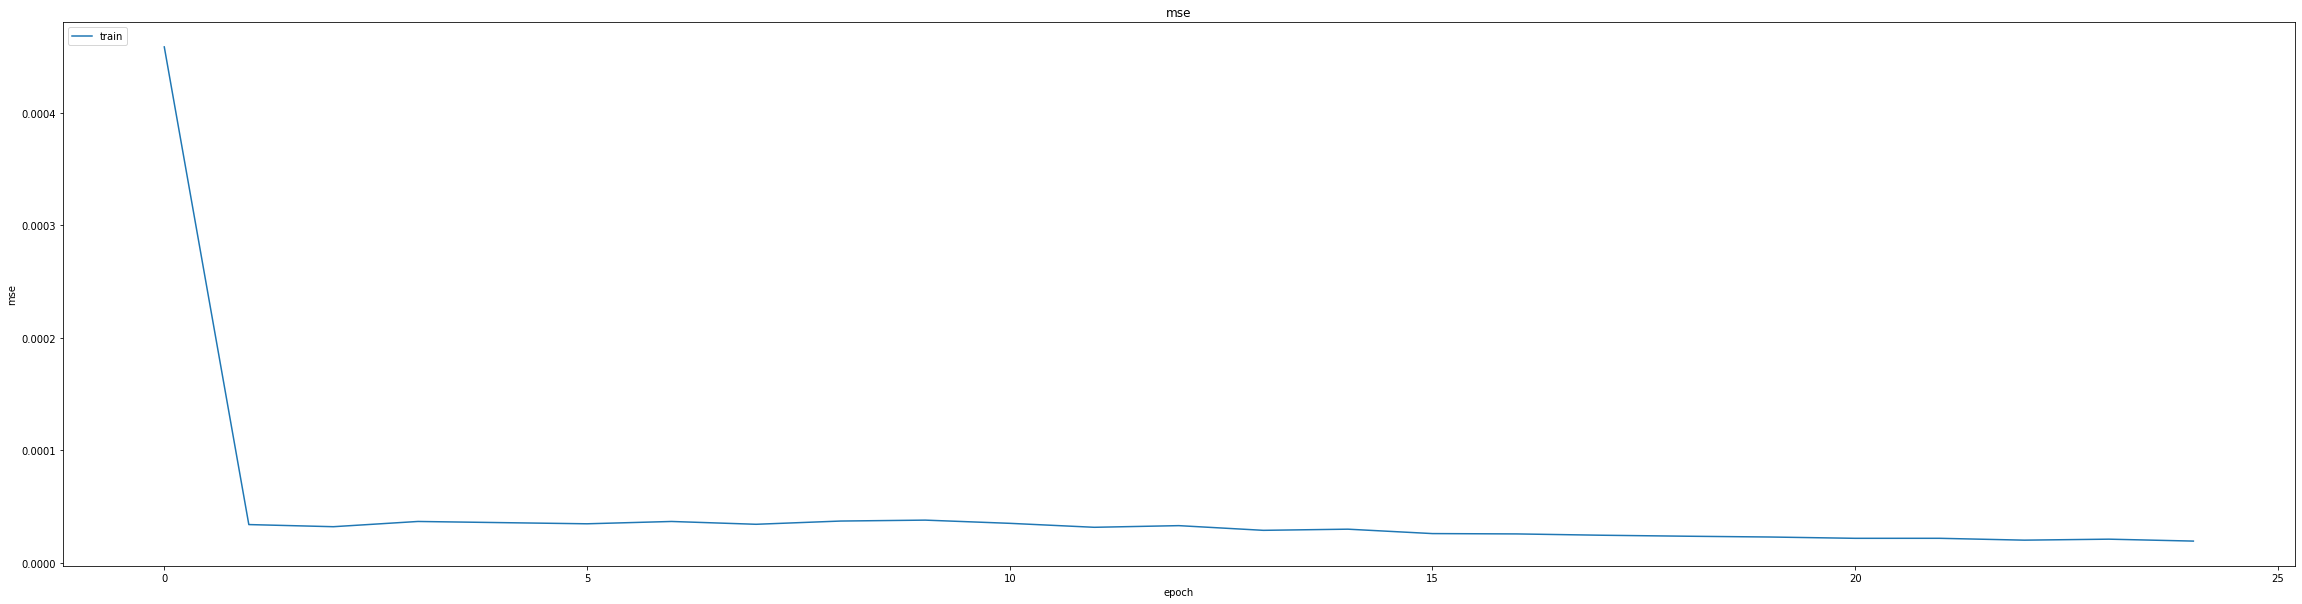

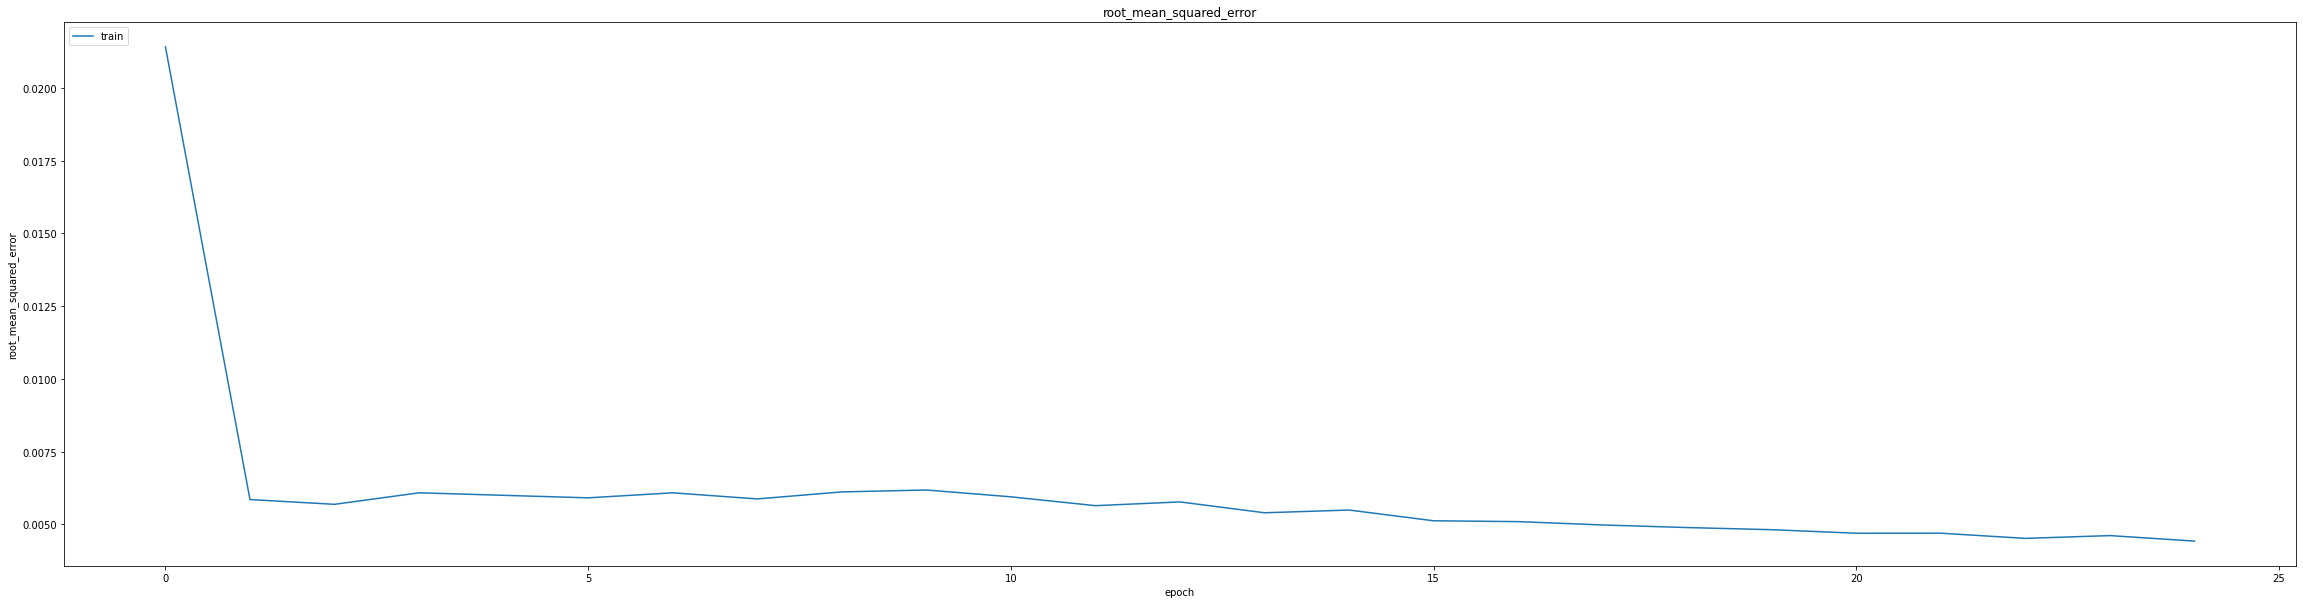

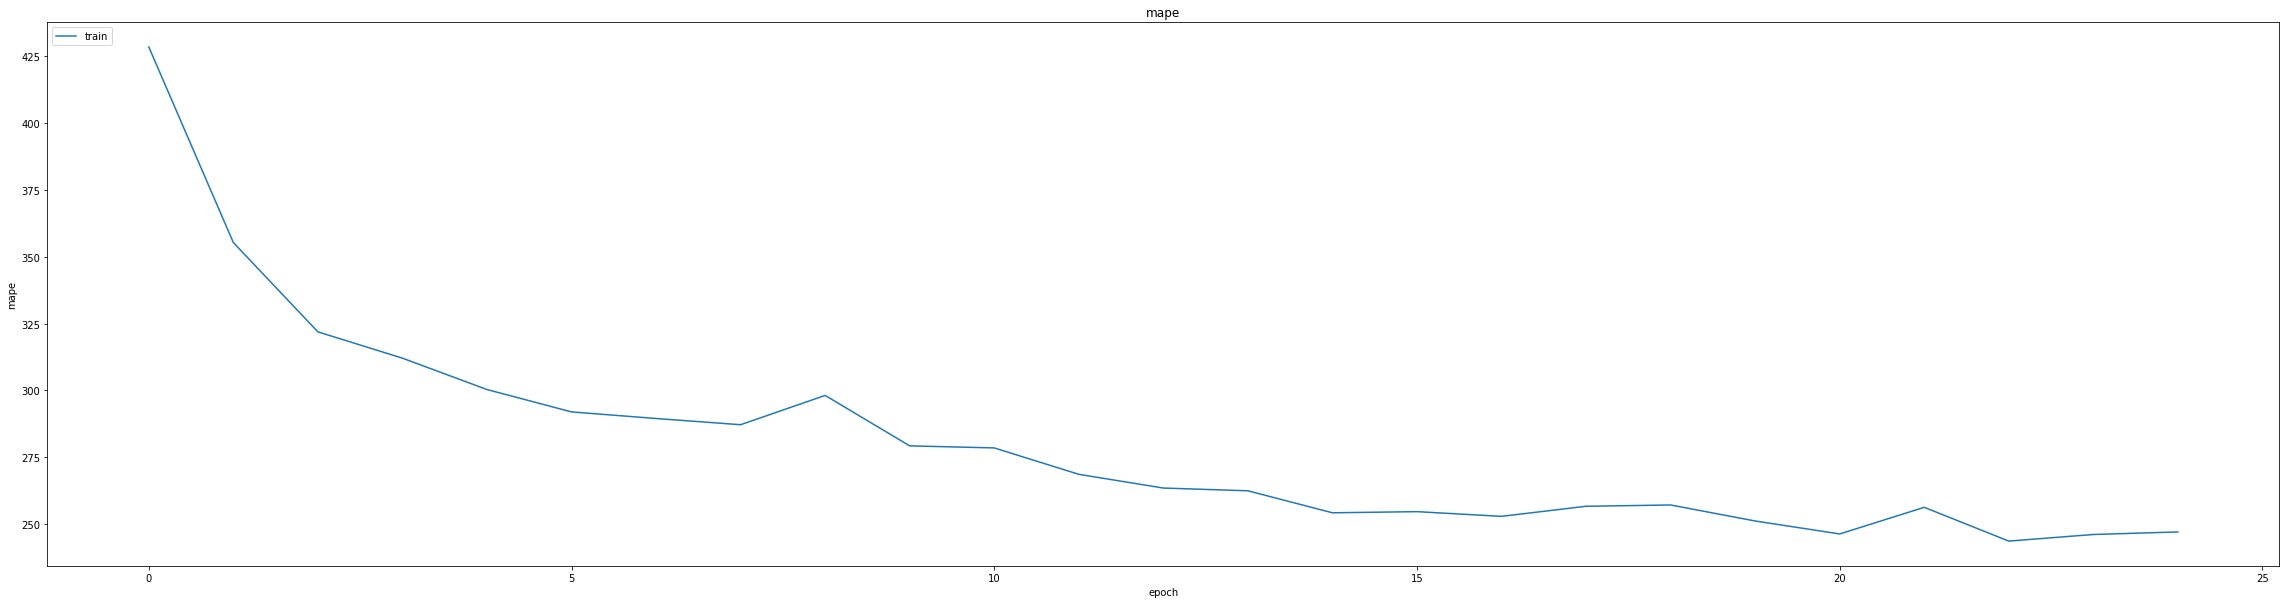

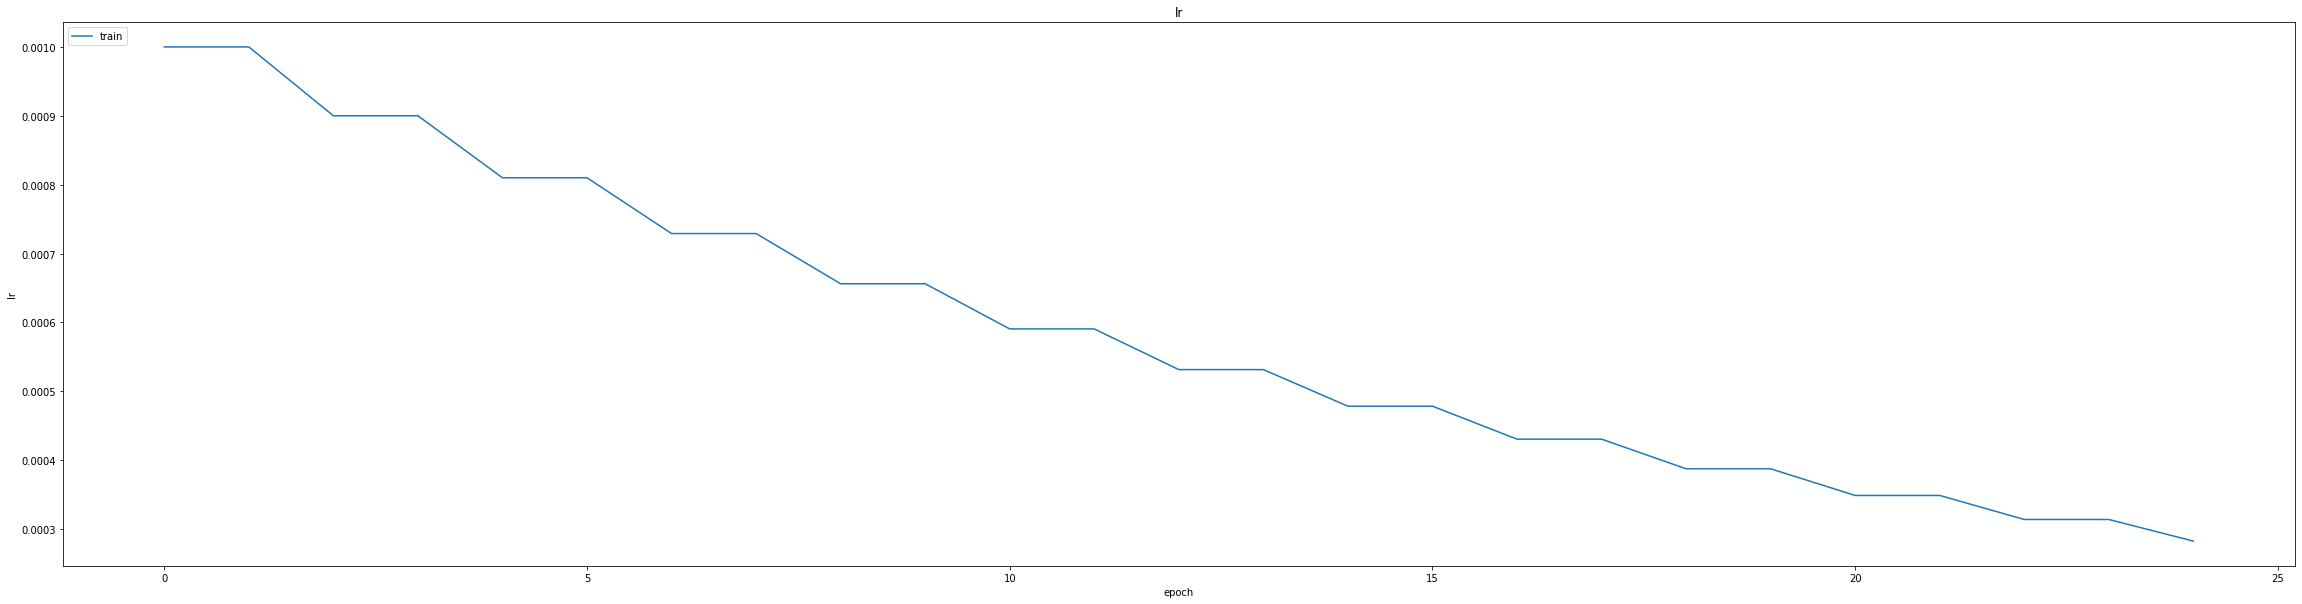

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012610550969839096
0.015520934015512466
464/464 [==============================] - 2s 3ms/step
0.9902815004715743


464/464 [==============================] - 2s 3ms/step


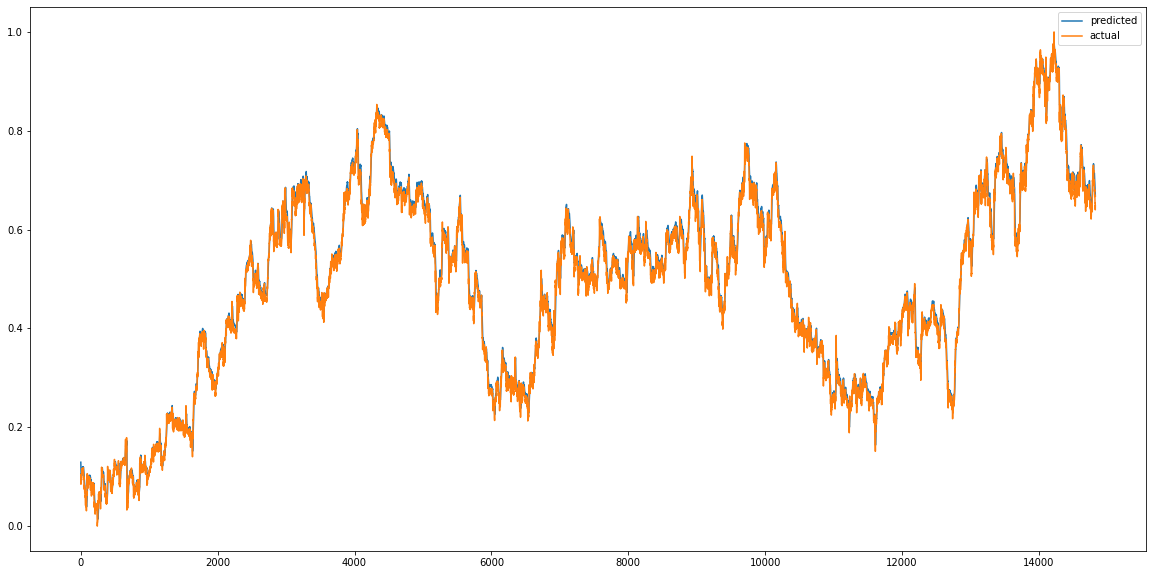

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


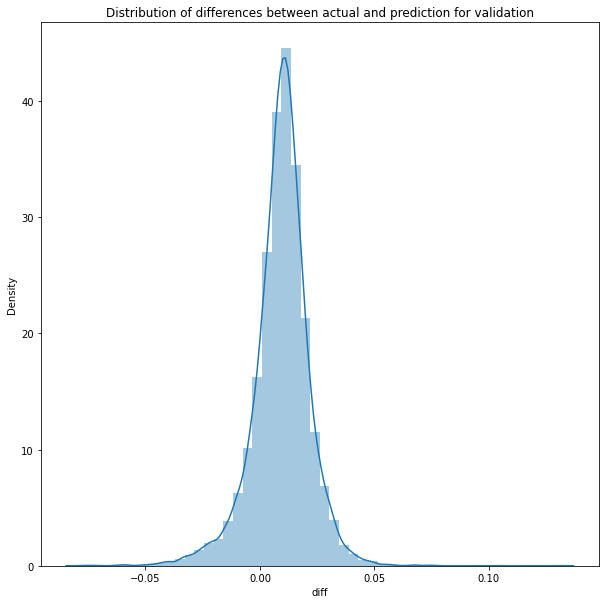

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


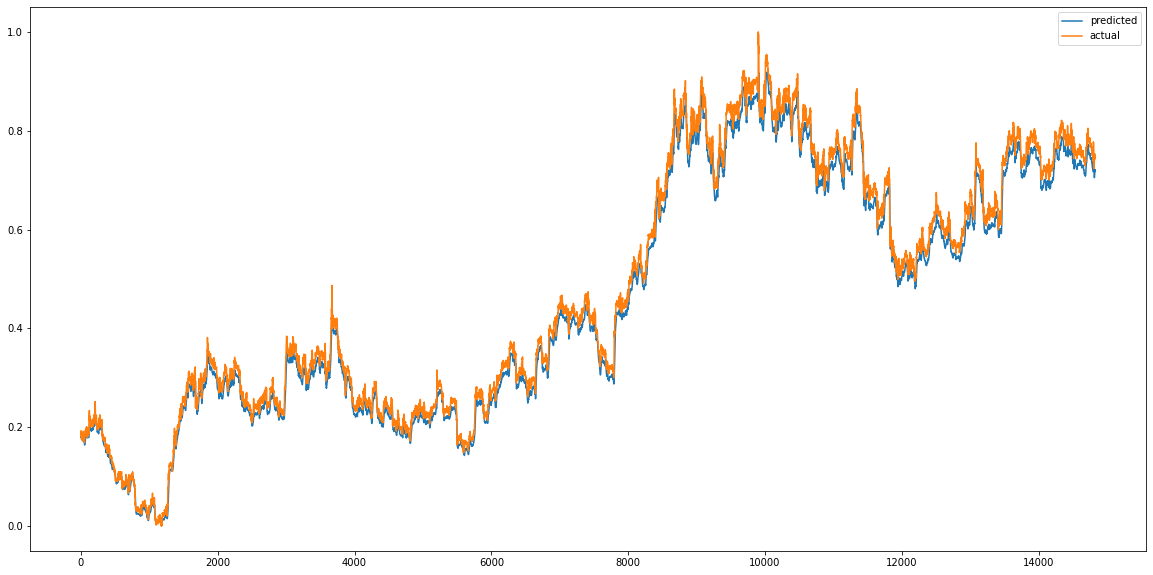

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


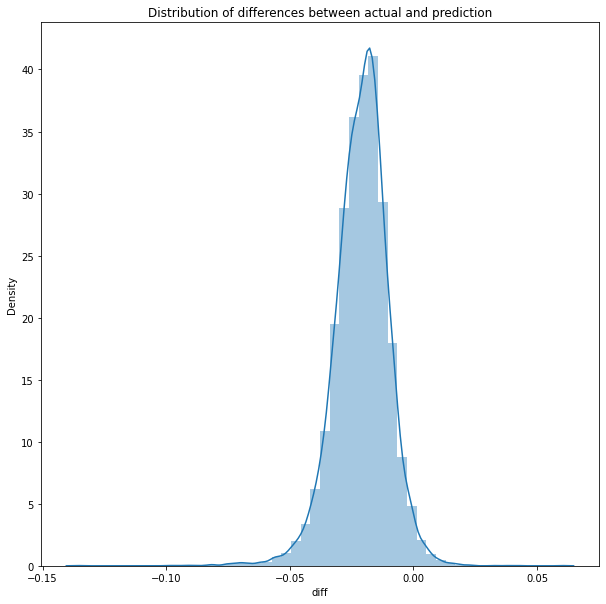

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005621016798076586
RMSE :  0.02370868363717519
MAE :  0.021253738199474476
464/464 [==============================] - 1s 3ms/step
R2_Score  : 0.9911543235276673


count    14828.000000
mean        -0.021034
std          0.010939
min         -0.135639
25%         -0.027321
50%         -0.020323
75%         -0.014246
max          0.060007
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 859.3714 - mae: 10.7350 - mse: 859.3714 - root_mean_squared_error: 29.3150 - mape: 93665.8906
Epoch 1: val_mse improved from inf to 0.89060, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 53s 132ms/step - loss: 859.3714 - mae: 10.7350 - mse: 859.3714 - root_mean_squared_error: 29.3150 - mape: 93665.8906 - val_loss: 0.8906 - val_mae: 0.9223 - val_mse: 0.8906 - val_root_mean_squared_error: 0.9437 - val_mape: 95106.9375
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.3358 - mae: 0.4987 - mse: 0.3358 - root_mean_squared_error: 0.5795 - mape: 22646.5469
Epoch 2: val_mse improved from 0.89060 to 0.04606, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.3358 - mae: 0.4987 - mse: 0.3358 - root_mean_squared_error: 0.5795 - mape: 22646.5469 - val_loss: 0.0461 - val_mae: 0.1678 - val_mse: 0.0461 - val_root_mean_squared_error: 0.2146 - val_mape: 37970.2891
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0566 - mae: 0.1996 - mse: 0.0566 - root_mean_squared_error: 0.2379 - mape: 10367.5049
Epoch 3: val_mse improved from 0.04606 to 0.04388, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0566 - mae: 0.1996 - mse: 0.0566 - root_mean_squared_error: 0.2379 - mape: 10367.5049 - val_loss: 0.0439 - val_mae: 0.1758 - val_mse: 0.0439 - val_root_mean_squared_error: 0.2095 - val_mape: 28228.5508
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0451 - mae: 0.1767 - mse: 0.0451 - root_mean_squared_error: 0.2123 - mape: 9182.8008
Epoch 4: val_mse did not improve from 0.04388
348/348 [==============================] - 8s 22ms/step - loss: 0.0451 - mae: 0.1767 - mse: 0.0451 - root_mean_squared_error: 0.2124 - mape: 9159.2783 - val_loss: 0.0498 - val_mae: 0.1880 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2231 - val_mape: 25807.0508
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0444 - mae: 0.1754 - mse: 0.0444 - root_mean_squared_error: 0.2108 - mape: 8179.8716
Epoch 5: val_mse did not improve from 0.04388
348/348 [==============================] - 7s 21ms/step -

348/348 [==============================] - 40s 115ms/step - loss: 0.0397 - mae: 0.1648 - mse: 0.0397 - root_mean_squared_error: 0.1991 - mape: 8036.1426 - val_loss: 0.0416 - val_mae: 0.1710 - val_mse: 0.0416 - val_root_mean_squared_error: 0.2038 - val_mape: 23032.1621
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 0.0218 - mae: 0.1156 - mse: 0.0218 - root_mean_squared_error: 0.1478 - mape: 6310.5269
Epoch 18: val_mse improved from 0.04155 to 0.01243, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0218 - mae: 0.1156 - mse: 0.0218 - root_mean_squared_error: 0.1478 - mape: 6310.5269 - val_loss: 0.0124 - val_mae: 0.0817 - val_mse: 0.0124 - val_root_mean_squared_error: 0.1115 - val_mape: 17963.3496
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0116 - mae: 0.0825 - mse: 0.0116 - root_mean_squared_error: 0.1078 - mape: 5788.8657
Epoch 19: val_mse improved from 0.01243 to 0.00831, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0116 - mae: 0.0825 - mse: 0.0116 - root_mean_squared_error: 0.1077 - mape: 5773.9404 - val_loss: 0.0083 - val_mae: 0.0701 - val_mse: 0.0083 - val_root_mean_squared_error: 0.0912 - val_mape: 15835.8789
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0668 - mse: 0.0076 - root_mean_squared_error: 0.0875 - mape: 5039.7861
Epoch 20: val_mse improved from 0.00831 to 0.00481, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0076 - mae: 0.0668 - mse: 0.0076 - root_mean_squared_error: 0.0875 - mape: 5039.7861 - val_loss: 0.0048 - val_mae: 0.0526 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0693 - val_mape: 13595.5566
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0539 - mse: 0.0051 - root_mean_squared_error: 0.0714 - mape: 4287.8125
Epoch 21: val_mse improved from 0.00481 to 0.00283, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0051 - mae: 0.0539 - mse: 0.0051 - root_mean_squared_error: 0.0714 - mape: 4276.7197 - val_loss: 0.0028 - val_mae: 0.0411 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mape: 11753.9775
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0462 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 3595.3396
Epoch 22: val_mse improved from 0.00283 to 0.00205, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0037 - mae: 0.0462 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 3575.8303 - val_loss: 0.0020 - val_mae: 0.0346 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0453 - val_mape: 10478.3145
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0425 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 3373.7910
Epoch 23: val_mse improved from 0.00205 to 0.00174, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0031 - mae: 0.0425 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 3373.7910 - val_loss: 0.0017 - val_mae: 0.0312 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 9364.7031
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0392 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 2982.9495
Epoch 24: val_mse improved from 0.00174 to 0.00128, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0026 - mae: 0.0392 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 2975.2268 - val_loss: 0.0013 - val_mae: 0.0261 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 8376.1416
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0372 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2725.4419
Epoch 25: val_mse improved from 0.00128 to 0.00109, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0023 - mae: 0.0372 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2710.6709 - val_loss: 0.0011 - val_mae: 0.0237 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 7320.4438
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2004.3129
Epoch 26: val_mse did not improve from 0.00109
348/348 [==============================] - 7s 21ms/step - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 1999.1250 - val_loss: 0.0011 - val_mae: 0.0240 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 6233.7969
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0318 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 1758.7881
Epoch 27: val_mse did not improve from 0.00109
348/348 [==============================] - 7s 21ms/step 

348/348 [==============================] - 40s 116ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1325.2330 - val_loss: 0.0010 - val_mae: 0.0237 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 4681.4580
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1413.8770
Epoch 31: val_mse did not improve from 0.00103
348/348 [==============================] - 8s 22ms/step - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1413.8770 - val_loss: 0.0019 - val_mae: 0.0354 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 4319.0010
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 9.3071e-04 - mae: 0.0237 - mse: 9.3071e-04 - root_mean_squared_error: 0.0305 - mape: 1374.5231
Epoch 32: val_mse improved from 0.00103 to 0.00100, saving model to /content/drive/MyDrive/mode

348/348 [==============================] - 40s 115ms/step - loss: 9.3171e-04 - mae: 0.0237 - mse: 9.3171e-04 - root_mean_squared_error: 0.0305 - mape: 1367.0536 - val_loss: 9.9598e-04 - val_mae: 0.0234 - val_mse: 9.9598e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 4230.5308
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 9.0409e-04 - mae: 0.0233 - mse: 9.0409e-04 - root_mean_squared_error: 0.0301 - mape: 1336.3766
Epoch 33: val_mse improved from 0.00100 to 0.00093, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 9.0409e-04 - mae: 0.0233 - mse: 9.0409e-04 - root_mean_squared_error: 0.0301 - mape: 1336.3766 - val_loss: 9.2574e-04 - val_mae: 0.0228 - val_mse: 9.2574e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 4160.8696
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 7.9893e-04 - mae: 0.0218 - mse: 7.9893e-04 - root_mean_squared_error: 0.0283 - mape: 1393.8037
Epoch 34: val_mse improved from 0.00093 to 0.00089, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 7.9878e-04 - mae: 0.0218 - mse: 7.9878e-04 - root_mean_squared_error: 0.0283 - mape: 1390.2052 - val_loss: 8.9466e-04 - val_mae: 0.0230 - val_mse: 8.9466e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 3985.3589
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 7.7223e-04 - mae: 0.0215 - mse: 7.7223e-04 - root_mean_squared_error: 0.0278 - mape: 1293.8859
Epoch 35: val_mse did not improve from 0.00089
348/348 [==============================] - 7s 20ms/step - loss: 7.7223e-04 - mae: 0.0215 - mse: 7.7223e-04 - root_mean_squared_error: 0.0278 - mape: 1293.8859 - val_loss: 9.2521e-04 - val_mae: 0.0232 - val_mse: 9.2521e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 3779.2668
Epoch 36/75
348/348 [==============================] - ETA: 0s - loss: 7.1419e-04 - mae: 0.0207 - mse: 7.1419e-04 - root_mean_squared_error: 0.0267 - mape: 1122.5933
Epoch 36: val_mse improved from 0.00089 to 0.00088, sav

348/348 [==============================] - 40s 115ms/step - loss: 7.1419e-04 - mae: 0.0207 - mse: 7.1419e-04 - root_mean_squared_error: 0.0267 - mape: 1122.5933 - val_loss: 8.7876e-04 - val_mae: 0.0224 - val_mse: 8.7876e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 3685.4858
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 6.4826e-04 - mae: 0.0197 - mse: 6.4826e-04 - root_mean_squared_error: 0.0255 - mape: 1079.4531
Epoch 37: val_mse did not improve from 0.00088
348/348 [==============================] - 7s 21ms/step - loss: 6.4826e-04 - mae: 0.0197 - mse: 6.4826e-04 - root_mean_squared_error: 0.0255 - mape: 1079.4531 - val_loss: 9.0087e-04 - val_mae: 0.0223 - val_mse: 9.0087e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 3606.2456
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 5.7354e-04 - mae: 0.0186 - mse: 5.7354e-04 - root_mean_squared_error: 0.0239 - mape: 1119.1376
Epoch 38: val_mse improved from 0.00088 to 0.00075, sav

348/348 [==============================] - 39s 114ms/step - loss: 5.7354e-04 - mae: 0.0186 - mse: 5.7354e-04 - root_mean_squared_error: 0.0239 - mape: 1116.2463 - val_loss: 7.4908e-04 - val_mae: 0.0208 - val_mse: 7.4908e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 3615.9900
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 5.5004e-04 - mae: 0.0182 - mse: 5.5004e-04 - root_mean_squared_error: 0.0235 - mape: 1200.9264
Epoch 39: val_mse did not improve from 0.00075
348/348 [==============================] - 8s 22ms/step - loss: 5.4997e-04 - mae: 0.0182 - mse: 5.4997e-04 - root_mean_squared_error: 0.0235 - mape: 1197.8214 - val_loss: 9.6609e-04 - val_mae: 0.0241 - val_mse: 9.6609e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 3332.0271
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 5.0886e-04 - mae: 0.0174 - mse: 5.0886e-04 - root_mean_squared_error: 0.0226 - mape: 984.1963
Epoch 40: val_mse did not improve from 0.00075
348/348 [

348/348 [==============================] - 39s 114ms/step - loss: 3.8155e-04 - mae: 0.0151 - mse: 3.8155e-04 - root_mean_squared_error: 0.0195 - mape: 907.9708 - val_loss: 7.0681e-04 - val_mae: 0.0202 - val_mse: 7.0681e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 2779.6772
Epoch 46/75
345/348 [============================>.] - ETA: 0s - loss: 3.0536e-04 - mae: 0.0135 - mse: 3.0536e-04 - root_mean_squared_error: 0.0175 - mape: 874.9093
Epoch 46: val_mse improved from 0.00071 to 0.00068, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 3.0534e-04 - mae: 0.0135 - mse: 3.0534e-04 - root_mean_squared_error: 0.0175 - mape: 867.6525 - val_loss: 6.7815e-04 - val_mae: 0.0197 - val_mse: 6.7815e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2751.5522
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 2.9544e-04 - mae: 0.0133 - mse: 2.9544e-04 - root_mean_squared_error: 0.0172 - mape: 912.5411
Epoch 47: val_mse did not improve from 0.00068
348/348 [==============================] - 7s 20ms/step - loss: 2.9542e-04 - mae: 0.0133 - mse: 2.9542e-04 - root_mean_squared_error: 0.0172 - mape: 910.1813 - val_loss: 7.1503e-04 - val_mae: 0.0205 - val_mse: 7.1503e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 2676.6509
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 2.9199e-04 - mae: 0.0133 - mse: 2.9199e-04 - root_mean_squared_error: 0.0171 - mape: 790.0354
Epoch 48: val_mse improved from 0.00068 to 0.00064, saving 

348/348 [==============================] - 40s 116ms/step - loss: 2.9200e-04 - mae: 0.0133 - mse: 2.9200e-04 - root_mean_squared_error: 0.0171 - mape: 785.7446 - val_loss: 6.3675e-04 - val_mae: 0.0195 - val_mse: 6.3675e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 3252.1638
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 2.8024e-04 - mae: 0.0129 - mse: 2.8024e-04 - root_mean_squared_error: 0.0167 - mape: 888.6296
Epoch 49: val_mse improved from 0.00064 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 2.8018e-04 - mae: 0.0129 - mse: 2.8018e-04 - root_mean_squared_error: 0.0167 - mape: 886.3386 - val_loss: 6.1609e-04 - val_mae: 0.0191 - val_mse: 6.1609e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 2540.4788
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 2.4548e-04 - mae: 0.0121 - mse: 2.4548e-04 - root_mean_squared_error: 0.0157 - mape: 855.4034
Epoch 50: val_mse did not improve from 0.00062
348/348 [==============================] - 8s 24ms/step - loss: 2.4528e-04 - mae: 0.0121 - mse: 2.4528e-04 - root_mean_squared_error: 0.0157 - mape: 853.1939 - val_loss: 6.1696e-04 - val_mae: 0.0191 - val_mse: 6.1696e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 2937.3906
Epoch 51/75
347/348 [============================>.] - ETA: 0s - loss: 2.2562e-04 - mae: 0.0116 - mse: 2.2562e-04 - root_mean_squared_error: 0.0150 - mape: 799.2911
Epoch 51: val_mse improved from 0.00062 to 0.00060, saving 

348/348 [==============================] - 44s 128ms/step - loss: 2.2558e-04 - mae: 0.0116 - mse: 2.2558e-04 - root_mean_squared_error: 0.0150 - mape: 797.2258 - val_loss: 6.0046e-04 - val_mae: 0.0188 - val_mse: 6.0046e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 2469.0549
Epoch 52/75
348/348 [==============================] - ETA: 0s - loss: 1.9515e-04 - mae: 0.0108 - mse: 1.9515e-04 - root_mean_squared_error: 0.0140 - mape: 749.6886
Epoch 52: val_mse improved from 0.00060 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 46s 131ms/step - loss: 1.9515e-04 - mae: 0.0108 - mse: 1.9515e-04 - root_mean_squared_error: 0.0140 - mape: 749.6886 - val_loss: 5.0818e-04 - val_mae: 0.0173 - val_mse: 5.0818e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 2497.1606
Epoch 53/75
348/348 [==============================] - ETA: 0s - loss: 2.0293e-04 - mae: 0.0111 - mse: 2.0293e-04 - root_mean_squared_error: 0.0142 - mape: 764.2677
Epoch 53: val_mse did not improve from 0.00051
348/348 [==============================] - 8s 24ms/step - loss: 2.0293e-04 - mae: 0.0111 - mse: 2.0293e-04 - root_mean_squared_error: 0.0142 - mape: 764.2677 - val_loss: 5.6384e-04 - val_mae: 0.0178 - val_mse: 5.6384e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 2832.9250
Epoch 54/75
347/348 [============================>.] - ETA: 0s - loss: 1.7267e-04 - mae: 0.0102 - mse: 1.7267e-04 - root_mean_squared_error: 0.0131 - mape: 803.6254
Epoch 54: val_mse did not improve from 0.00051
348/348 [===

348/348 [==============================] - 43s 125ms/step - loss: 1.7658e-04 - mae: 0.0102 - mse: 1.7658e-04 - root_mean_squared_error: 0.0133 - mape: 730.0667 - val_loss: 4.0818e-04 - val_mae: 0.0154 - val_mse: 4.0818e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 3217.8235
Epoch 56/75
346/348 [============================>.] - ETA: 0s - loss: 1.5967e-04 - mae: 0.0098 - mse: 1.5967e-04 - root_mean_squared_error: 0.0126 - mape: 713.0526
Epoch 56: val_mse did not improve from 0.00041
348/348 [==============================] - 8s 24ms/step - loss: 1.5984e-04 - mae: 0.0098 - mse: 1.5984e-04 - root_mean_squared_error: 0.0126 - mape: 709.1710 - val_loss: 0.0011 - val_mae: 0.0275 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 4264.0894
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 1.5842e-04 - mae: 0.0098 - mse: 1.5842e-04 - root_mean_squared_error: 0.0126 - mape: 675.2536
Epoch 57: val_mse improved from 0.00041 to 0.00036, saving model to

348/348 [==============================] - 44s 126ms/step - loss: 1.5828e-04 - mae: 0.0098 - mse: 1.5828e-04 - root_mean_squared_error: 0.0126 - mape: 673.5084 - val_loss: 3.6098e-04 - val_mae: 0.0144 - val_mse: 3.6098e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3082.1299
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 1.2811e-04 - mae: 0.0088 - mse: 1.2811e-04 - root_mean_squared_error: 0.0113 - mape: 713.3991
Epoch 58: val_mse did not improve from 0.00036
348/348 [==============================] - 8s 23ms/step - loss: 1.2798e-04 - mae: 0.0088 - mse: 1.2798e-04 - root_mean_squared_error: 0.0113 - mape: 711.5490 - val_loss: 8.3311e-04 - val_mae: 0.0240 - val_mse: 8.3311e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 3502.2644
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 1.4740e-04 - mae: 0.0093 - mse: 1.4740e-04 - root_mean_squared_error: 0.0121 - mape: 728.3345
Epoch 59: val_mse improved from 0.00036 to 0.00032, saving 

348/348 [==============================] - 45s 130ms/step - loss: 1.4714e-04 - mae: 0.0093 - mse: 1.4714e-04 - root_mean_squared_error: 0.0121 - mape: 724.3602 - val_loss: 3.2400e-04 - val_mae: 0.0136 - val_mse: 3.2400e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2785.8550
Epoch 60/75
347/348 [============================>.] - ETA: 0s - loss: 1.2381e-04 - mae: 0.0086 - mse: 1.2381e-04 - root_mean_squared_error: 0.0111 - mape: 655.6194
Epoch 60: val_mse did not improve from 0.00032
348/348 [==============================] - 8s 23ms/step - loss: 1.2387e-04 - mae: 0.0086 - mse: 1.2387e-04 - root_mean_squared_error: 0.0111 - mape: 653.9229 - val_loss: 6.8040e-04 - val_mae: 0.0216 - val_mse: 6.8040e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 3601.7112
Epoch 61/75
346/348 [============================>.] - ETA: 0s - loss: 1.1100e-04 - mae: 0.0081 - mse: 1.1100e-04 - root_mean_squared_error: 0.0105 - mape: 678.1381
Epoch 61: val_mse did not improve from 0.00032
348/348 [===

348/348 [==============================] - 41s 118ms/step - loss: 4.6826e-05 - mae: 0.0052 - mse: 4.6826e-05 - root_mean_squared_error: 0.0068 - mape: 442.1327 - val_loss: 3.2368e-04 - val_mae: 0.0152 - val_mse: 3.2368e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2873.1860
Epoch 74/75
347/348 [============================>.] - ETA: 0s - loss: 5.8875e-05 - mae: 0.0057 - mse: 5.8875e-05 - root_mean_squared_error: 0.0077 - mape: 459.1128
Epoch 74: val_mse did not improve from 0.00032
348/348 [==============================] - 8s 22ms/step - loss: 5.8833e-05 - mae: 0.0057 - mse: 5.8833e-05 - root_mean_squared_error: 0.0077 - mape: 457.9223 - val_loss: 5.4323e-04 - val_mae: 0.0205 - val_mse: 5.4323e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 2770.9045
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 5.0429e-05 - mae: 0.0054 - mse: 5.0429e-05 - root_mean_squared_error: 0.0071 - mape: 478.2372
Epoch 75: val_mse did not improve from 0.00032
348/348 [===

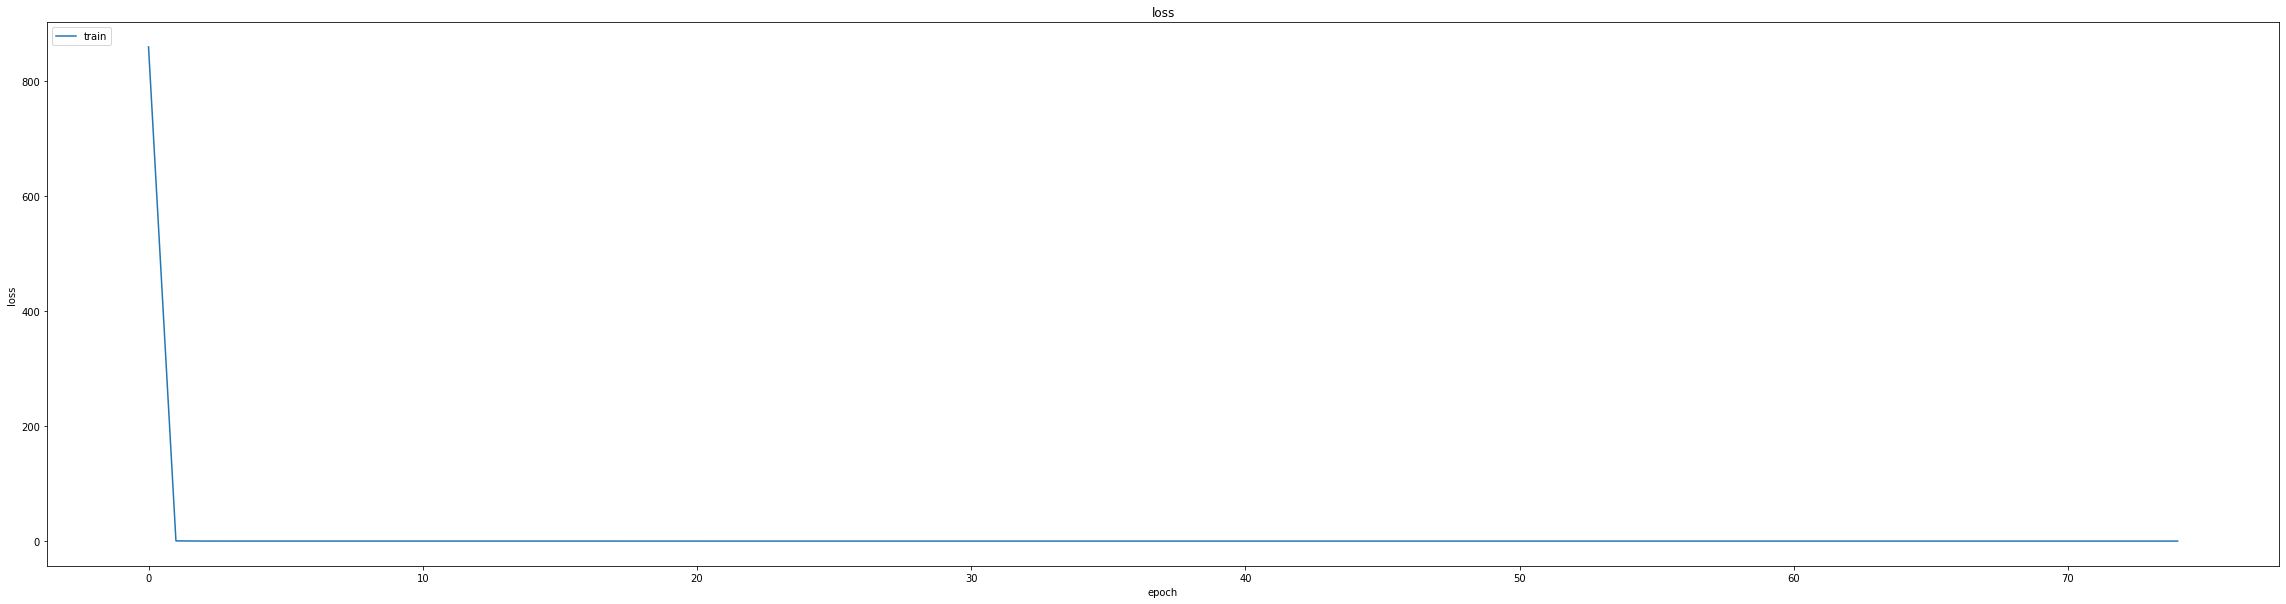

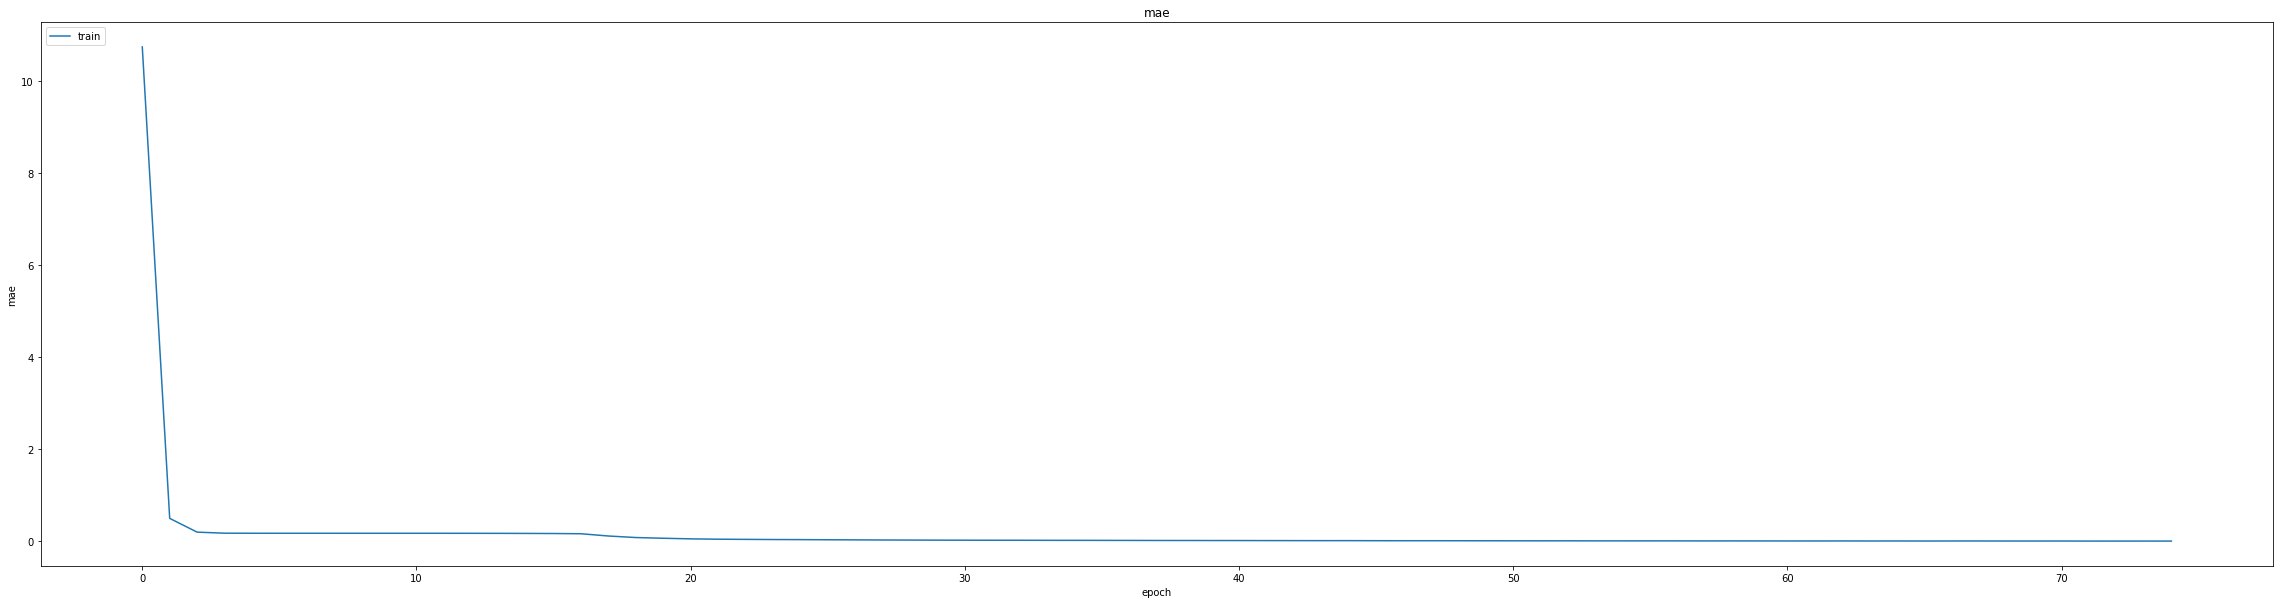

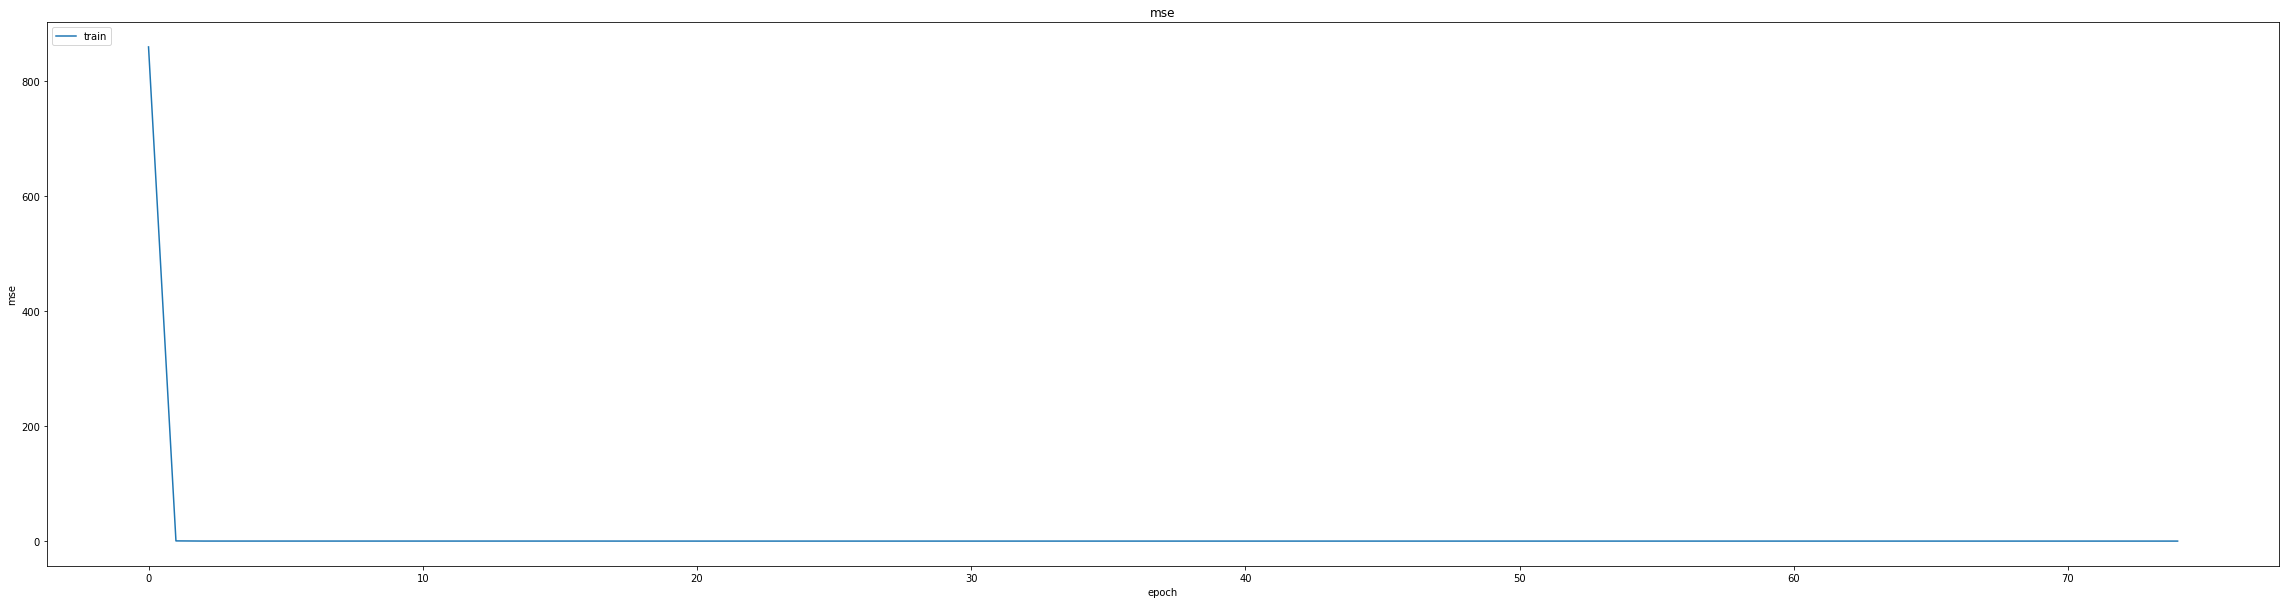

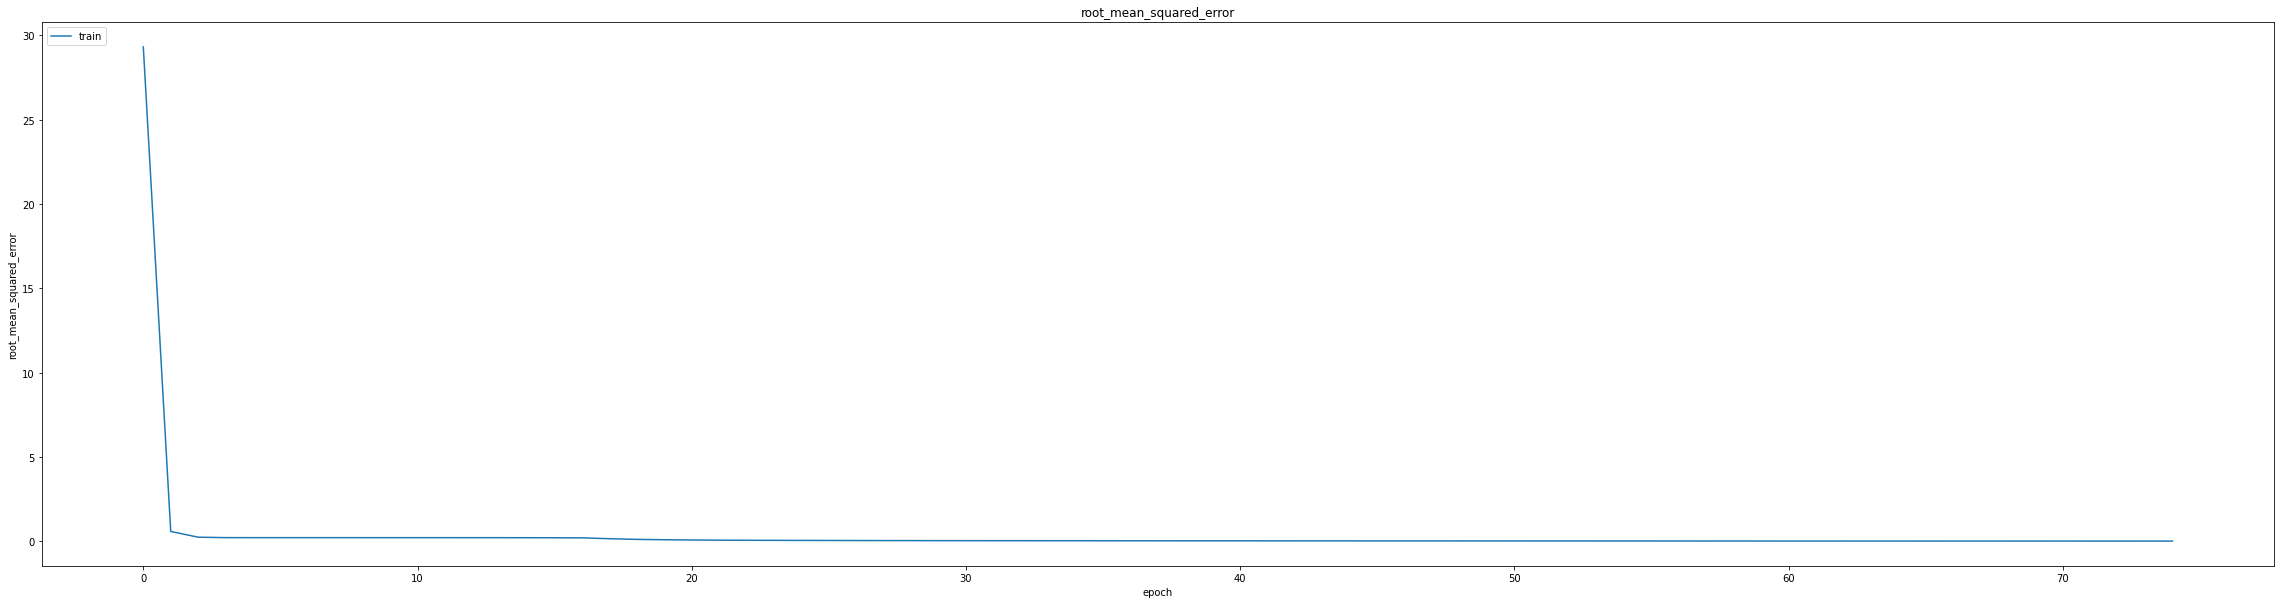

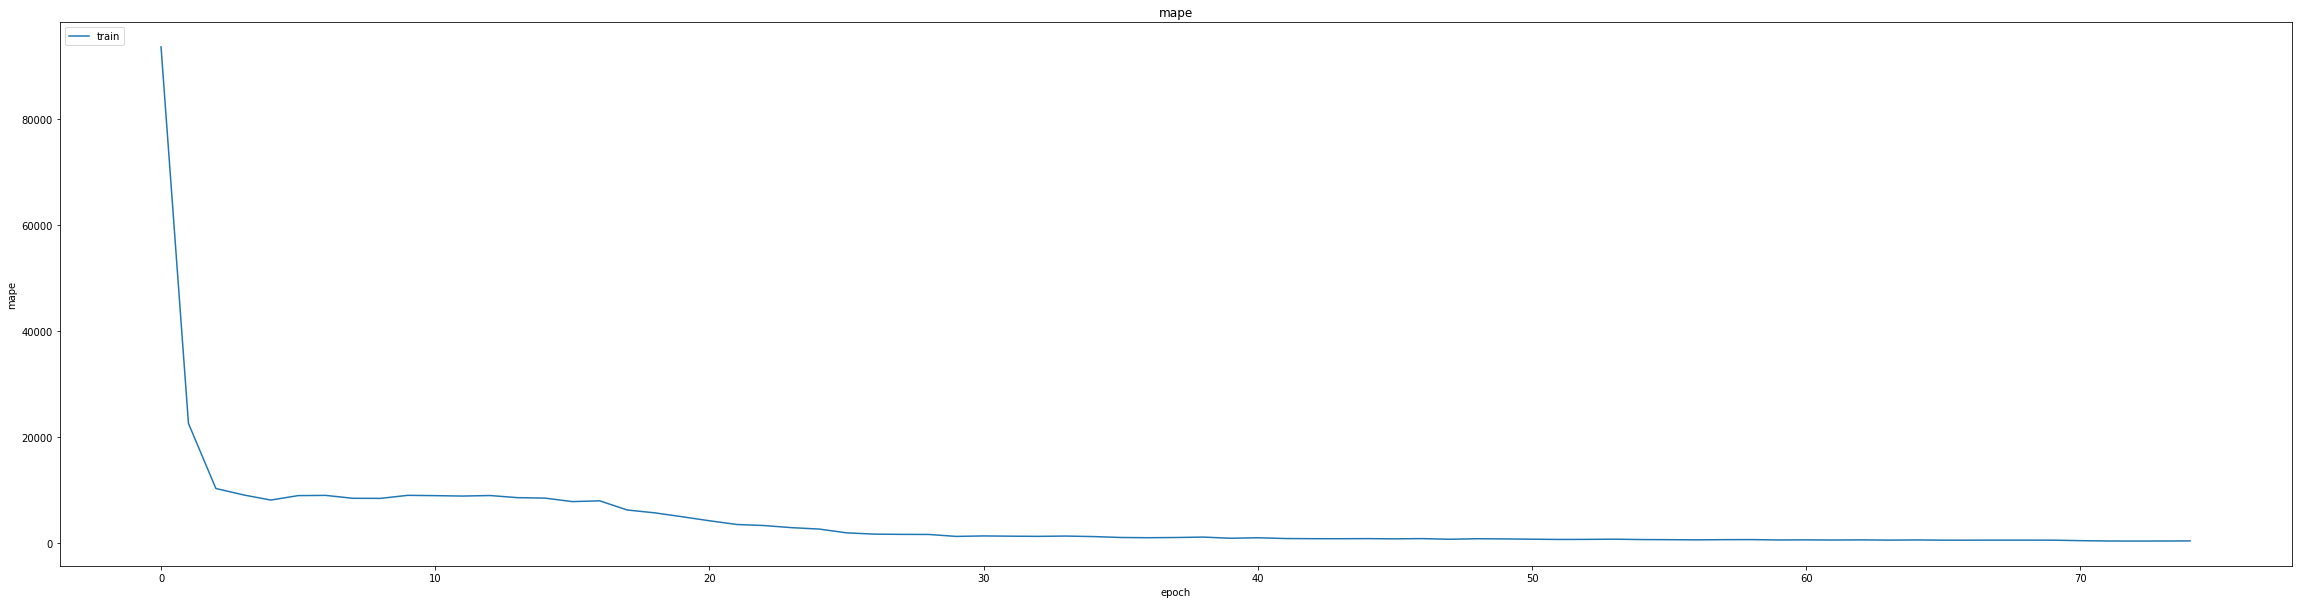

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013573701493442059
0.017991038039326668
464/464 [==============================] - 5s 7ms/step
0.9818209619991297


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 6.0098e-04 - mae: 0.0098 - mse: 6.0098e-04 - root_mean_squared_error: 0.0245 - mape: 927.4904


Epoch 1: val_mse did not improve from 0.00032
348/348 [==============================] - 19s 33ms/step - loss: 5.9950e-04 - mae: 0.0098 - mse: 5.9950e-04 - root_mean_squared_error: 0.0245 - mape: 925.0834 - val_loss: 5.2224e-04 - val_mae: 0.0201 - val_mse: 5.2224e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 2751.9253 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 3.0710e-05 - mae: 0.0041 - mse: 3.0710e-05 - root_mean_squared_error: 0.0055 - mape: 531.2379
Epoch 2: val_mse did not improve from 0.00032
348/348 [==============================] - 8s 23ms/step - loss: 3.0710e-05 - mae: 0.0041 - mse: 3.0710e-05 - root_mean_squared_error: 0.0055 - mape: 531.2379 - val_loss: 4.7756e-04 - val_mae: 0.0193 - val_mse: 4.7756e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 2968.1362 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 2.9113e-05 - mae: 0.0040 - mse: 2.9113e-05 - roo

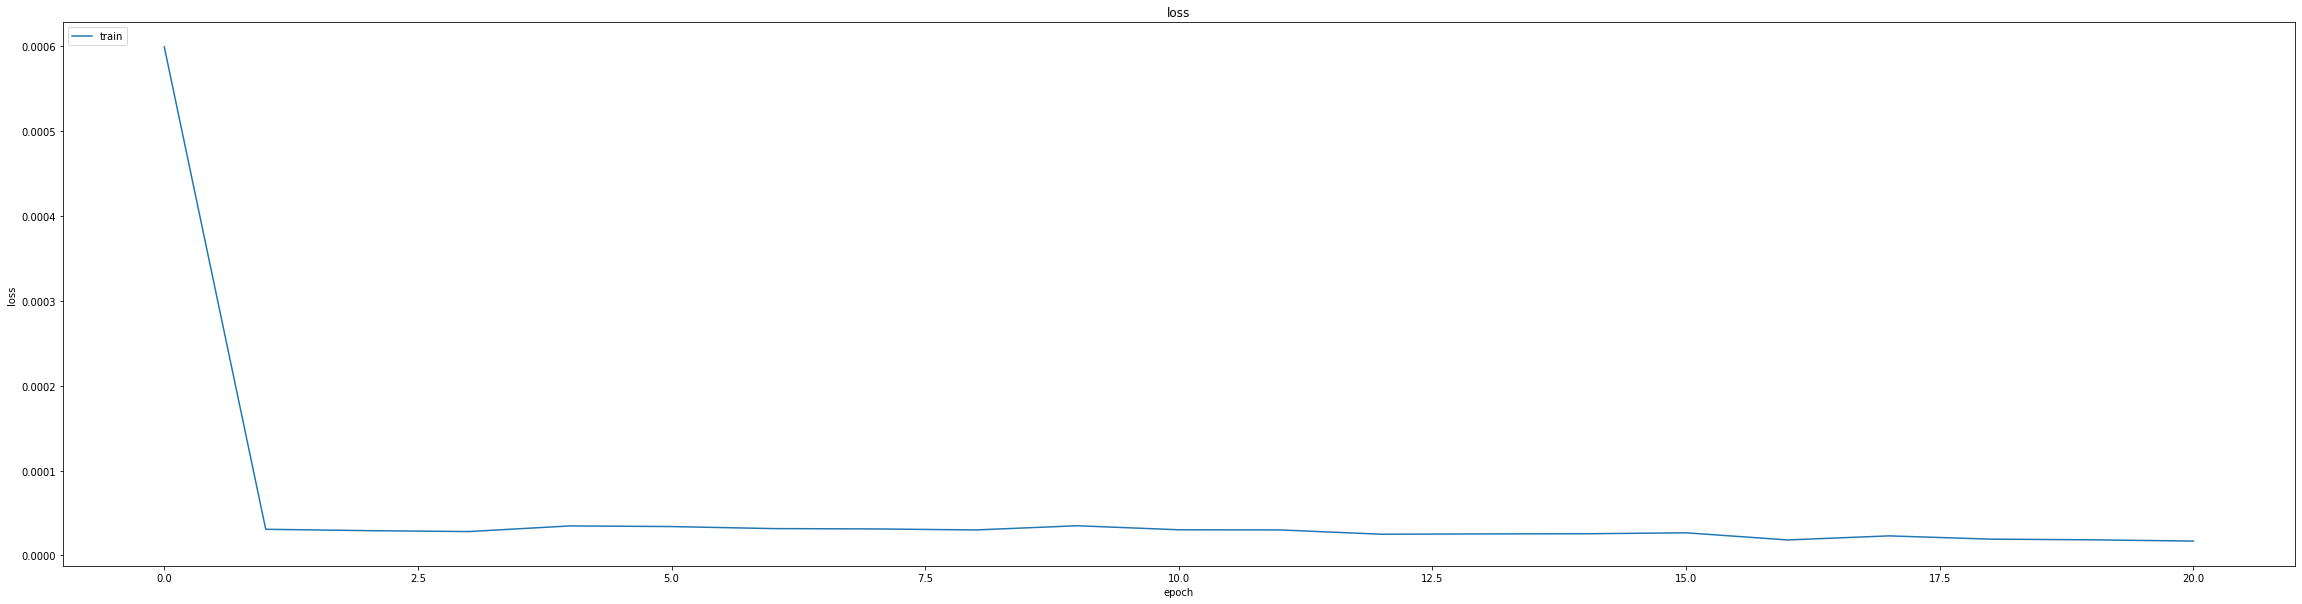

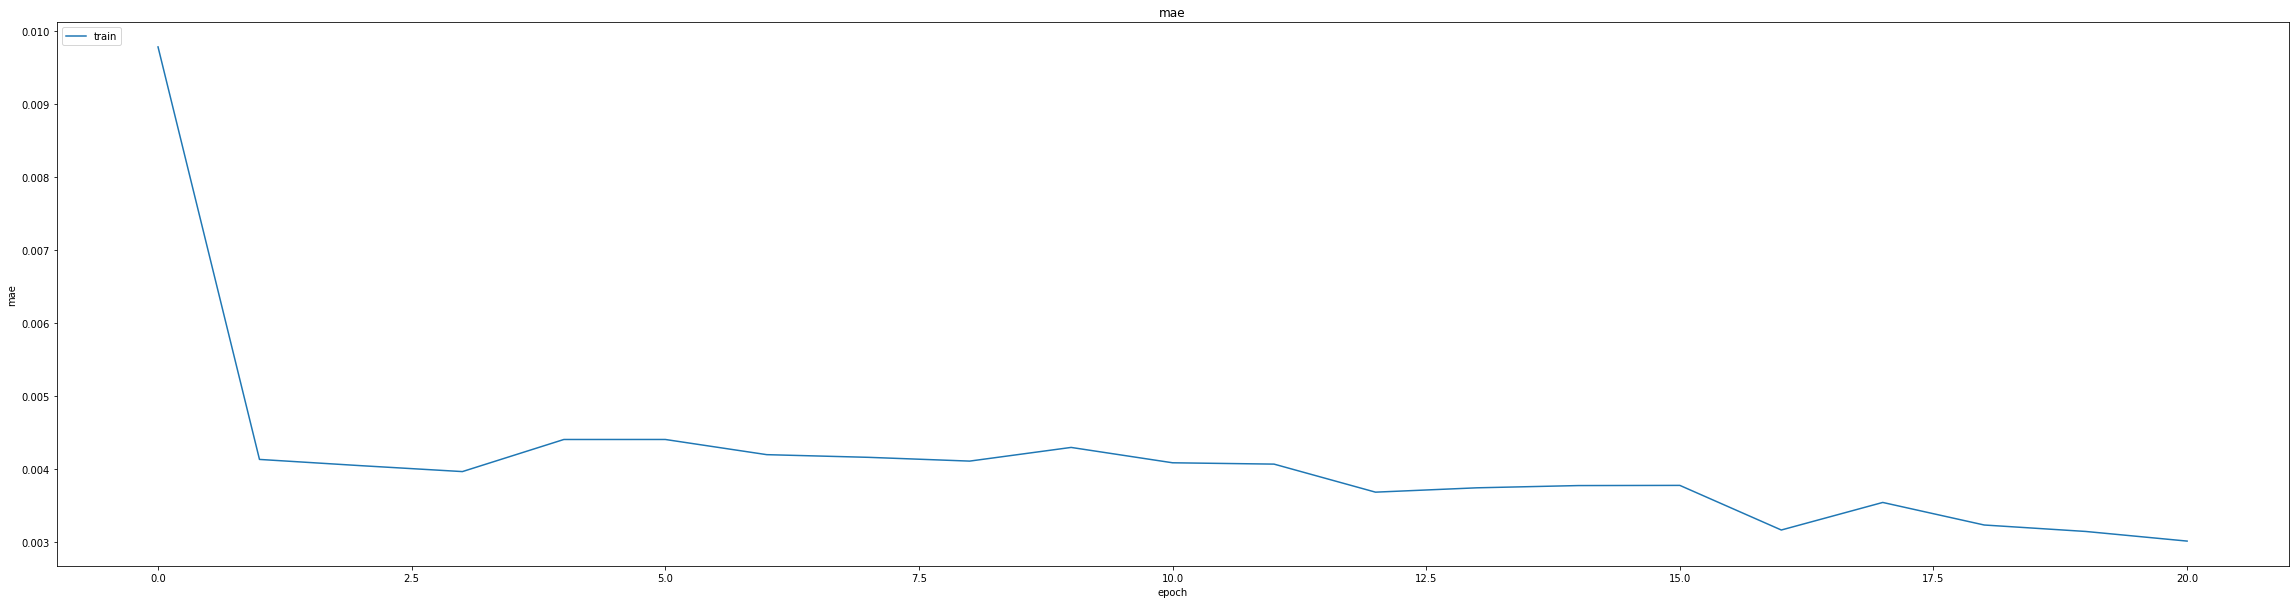

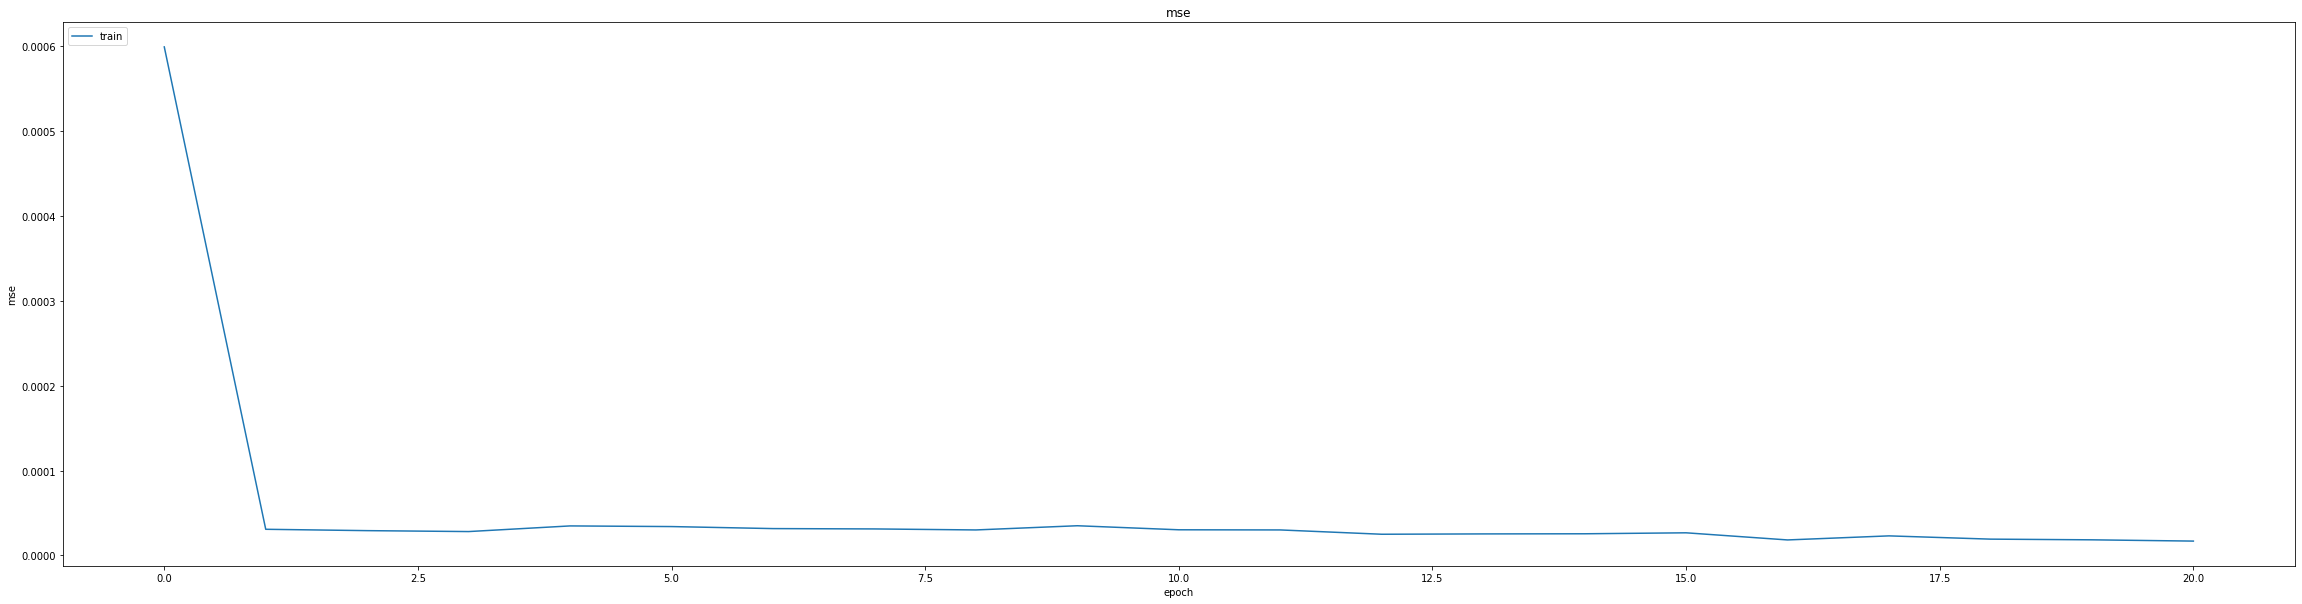

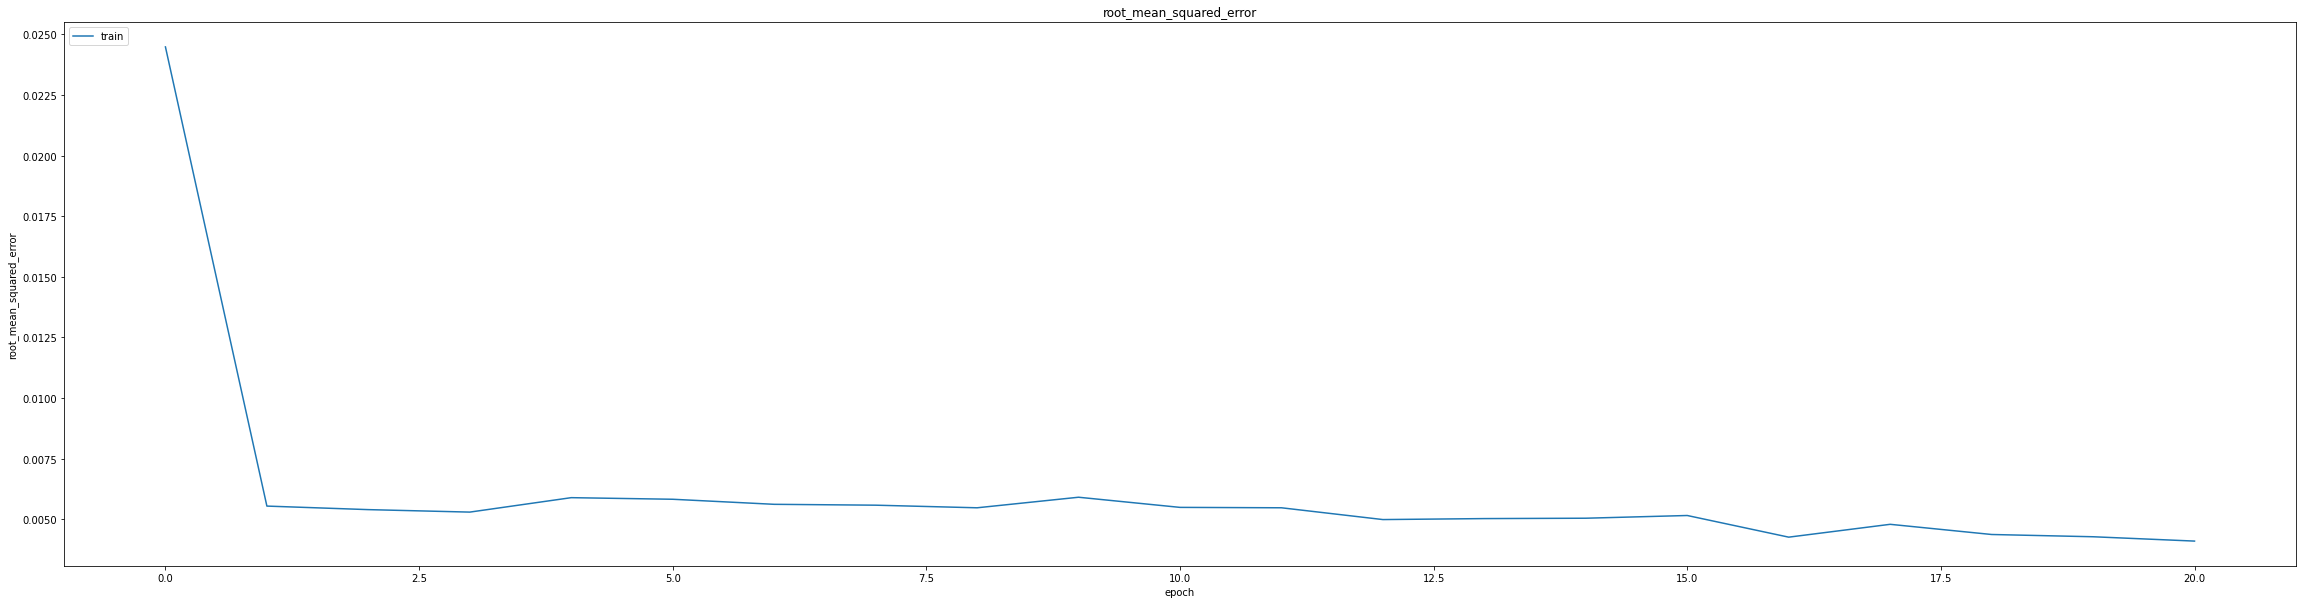

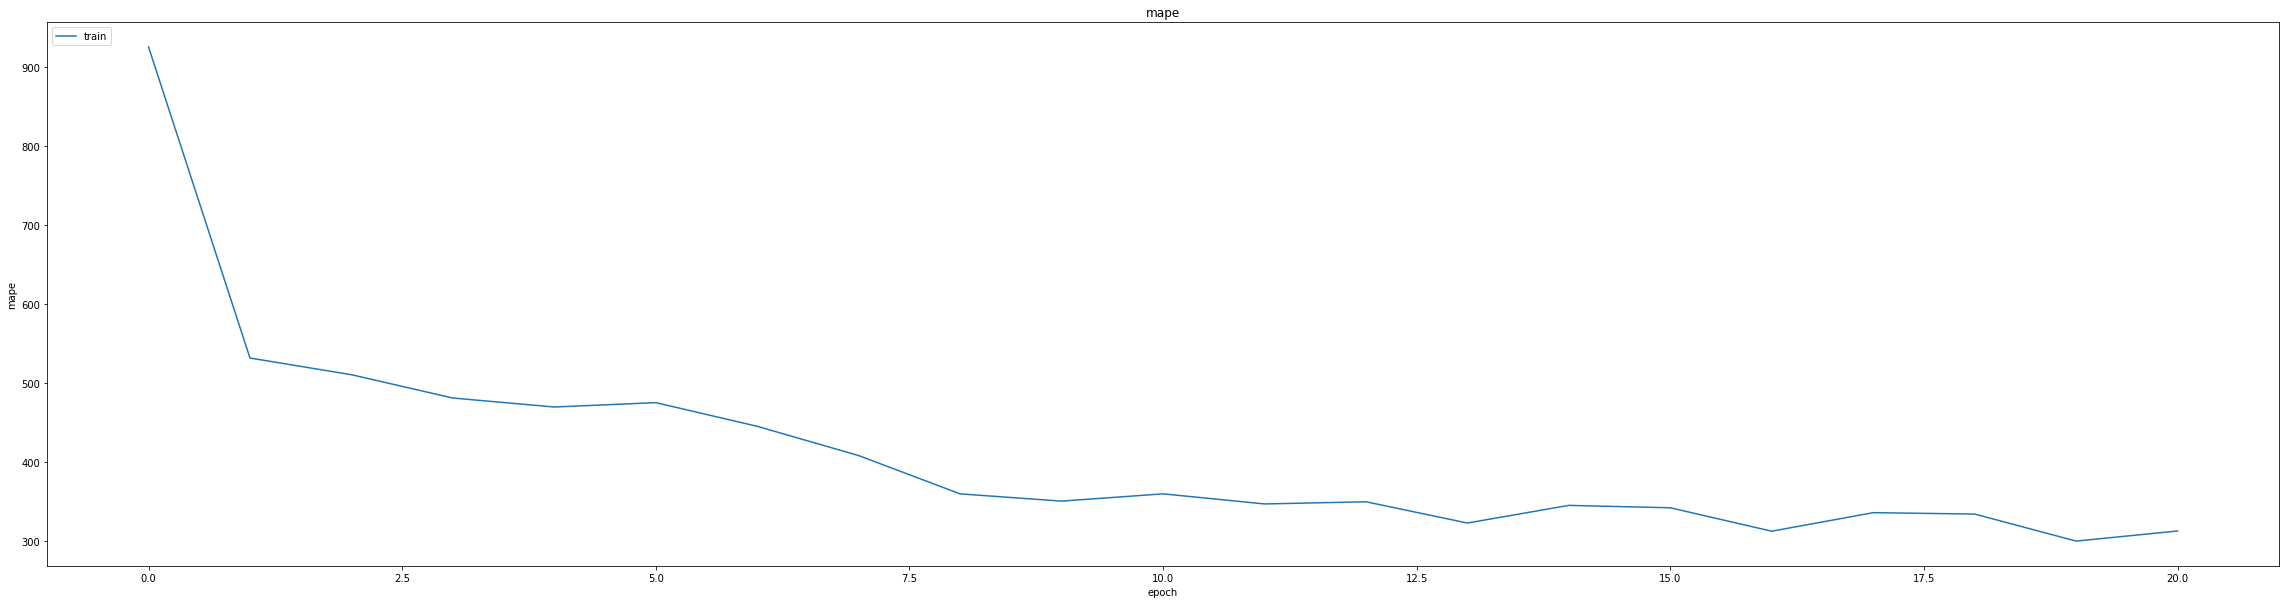

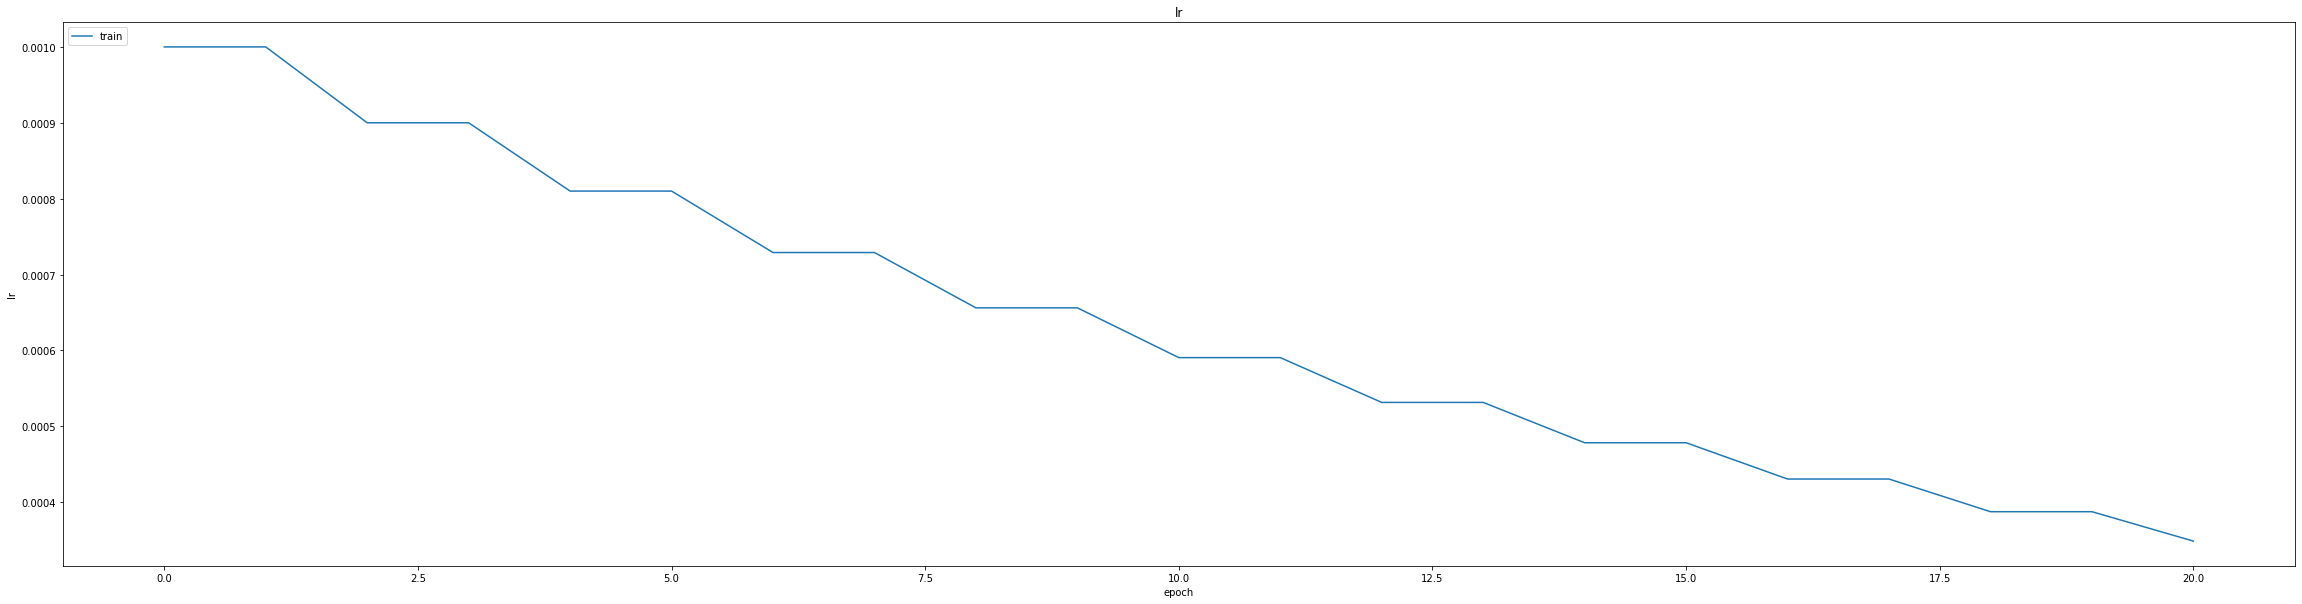

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015479709021747112
0.018039215356111526
464/464 [==============================] - 6s 8ms/step
0.9794738733398327


464/464 [==============================] - 3s 7ms/step


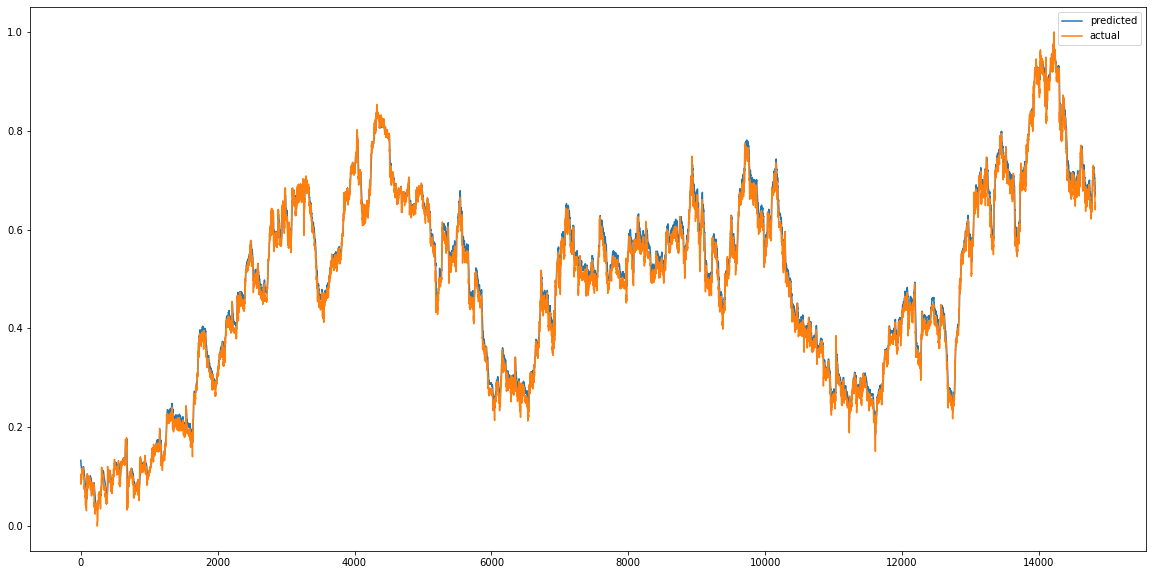

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


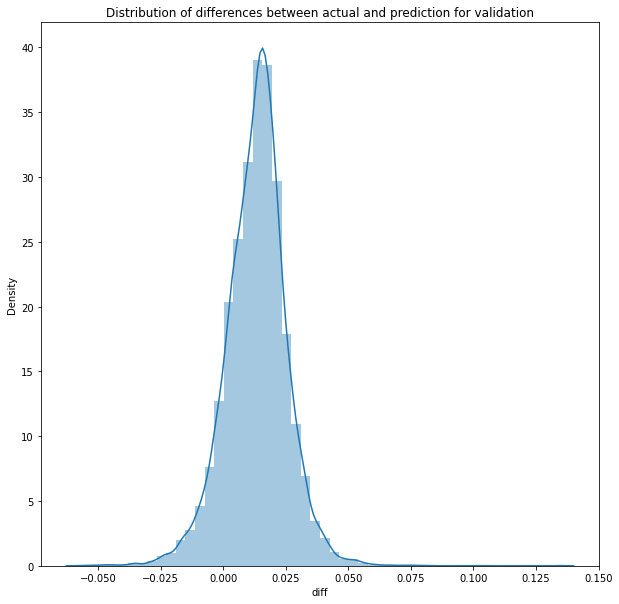

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 7ms/step


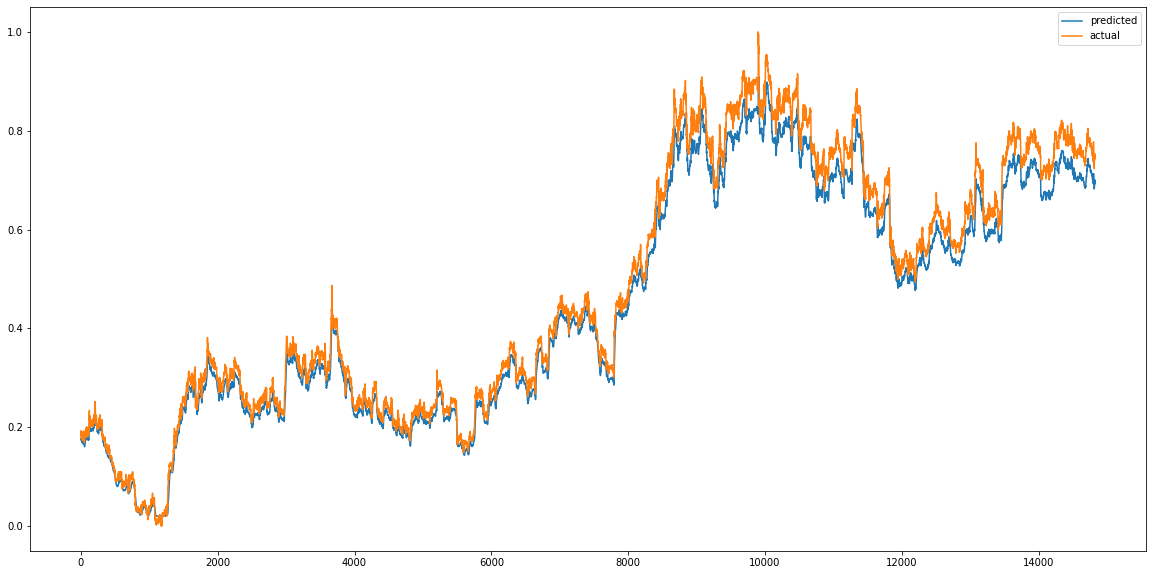

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


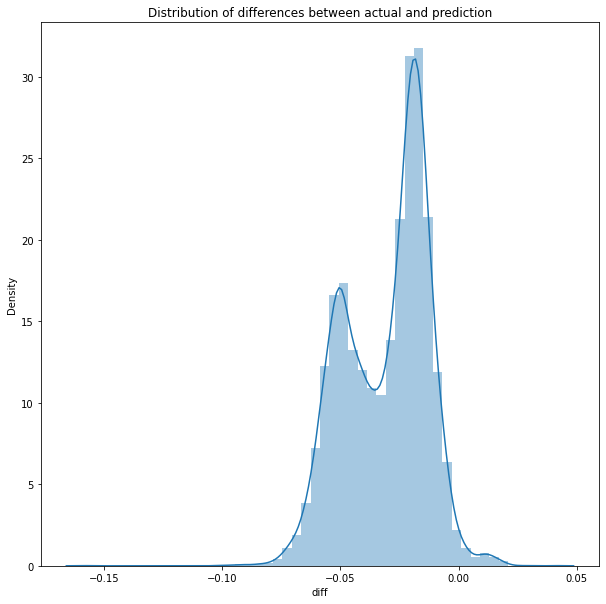

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0012545218877013443
RMSE :  0.0354192304786728
MAE :  0.030950379434928784
464/464 [==============================] - 3s 8ms/step
R2_Score  : 0.980257851664265


count    14828.000000
mean        -0.030705
std          0.017656
min         -0.158250
25%         -0.046300
50%         -0.025967
75%         -0.017125
max          0.040898
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 498.9853 - mae: 7.2885 - mse: 498.9853 - root_mean_squared_error: 22.3380 - mape: 229369.3125
Epoch 1: val_mse improved from inf to 1.74037, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 23s 53ms/step - loss: 498.9853 - mae: 7.2885 - mse: 498.9853 - root_mean_squared_error: 22.3380 - mape: 229369.3125 - val_loss: 1.7404 - val_mae: 1.3041 - val_mse: 1.7404 - val_root_mean_squared_error: 1.3192 - val_mape: 120903.6875
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 1.2482 - mae: 1.0672 - mse: 1.2482 - root_mean_squared_error: 1.1172 - mape: 35977.8789
Epoch 2: val_mse improved from 1.74037 to 0.41393, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 1.2413 - mae: 1.0638 - mse: 1.2413 - root_mean_squared_error: 1.1141 - mape: 35579.3242 - val_loss: 0.4139 - val_mae: 0.6118 - val_mse: 0.4139 - val_root_mean_squared_error: 0.6434 - val_mape: 73996.3516
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.4278 - mae: 0.6058 - mse: 0.4278 - root_mean_squared_error: 0.6541 - mape: 22371.8691
Epoch 3: val_mse improved from 0.41393 to 0.15198, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.4270 - mae: 0.6051 - mse: 0.4270 - root_mean_squared_error: 0.6535 - mape: 22251.1562 - val_loss: 0.1520 - val_mae: 0.3405 - val_mse: 0.1520 - val_root_mean_squared_error: 0.3898 - val_mape: 55255.8828
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.2049 - mae: 0.4016 - mse: 0.2049 - root_mean_squared_error: 0.4527 - mape: 15191.8252
Epoch 4: val_mse improved from 0.15198 to 0.07404, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.2047 - mae: 0.4013 - mse: 0.2047 - root_mean_squared_error: 0.4524 - mape: 15110.6172 - val_loss: 0.0740 - val_mae: 0.2151 - val_mse: 0.0740 - val_root_mean_squared_error: 0.2721 - val_mape: 45117.6406
Epoch 5/75
344/348 [============================>.] - ETA: 0s - loss: 0.1207 - mae: 0.3003 - mse: 0.1207 - root_mean_squared_error: 0.3474 - mape: 15079.4072
Epoch 5: val_mse improved from 0.07404 to 0.04808, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.1204 - mae: 0.3000 - mse: 0.1204 - root_mean_squared_error: 0.3470 - mape: 14912.8877 - val_loss: 0.0481 - val_mae: 0.1709 - val_mse: 0.0481 - val_root_mean_squared_error: 0.2193 - val_mape: 38787.4297
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 0.0824 - mae: 0.2439 - mse: 0.0824 - root_mean_squared_error: 0.2871 - mape: 11913.8213
Epoch 6: val_mse improved from 0.04808 to 0.04046, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0823 - mae: 0.2438 - mse: 0.0823 - root_mean_squared_error: 0.2870 - mape: 11816.1738 - val_loss: 0.0405 - val_mae: 0.1614 - val_mse: 0.0405 - val_root_mean_squared_error: 0.2011 - val_mape: 34517.1016
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0641 - mae: 0.2130 - mse: 0.0641 - root_mean_squared_error: 0.2531 - mape: 182.7473
Epoch 7: val_mse improved from 0.04046 to 0.03988, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0640 - mae: 0.2128 - mse: 0.0640 - root_mean_squared_error: 0.2530 - mape: 10405.8760 - val_loss: 0.0399 - val_mae: 0.1649 - val_mse: 0.0399 - val_root_mean_squared_error: 0.1997 - val_mape: 31487.8789
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0549 - mae: 0.1956 - mse: 0.0549 - root_mean_squared_error: 0.2343 - mape: 13766.3369
Epoch 8: val_mse did not improve from 0.03988
348/348 [==============================] - 5s 14ms/step - loss: 0.0549 - mae: 0.1955 - mse: 0.0549 - root_mean_squared_error: 0.2342 - mape: 13691.6436 - val_loss: 0.0420 - val_mae: 0.1713 - val_mse: 0.0420 - val_root_mean_squared_error: 0.2049 - val_mape: 29289.9336
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0500 - mae: 0.1864 - mse: 0.0500 - root_mean_squared_error: 0.2235 - mape: 10104.6611
Epoch 9: val_mse did not improve from 0.03988
348/348 [==============================] - 5s 14ms/step

348/348 [==============================] - 16s 45ms/step - loss: 0.0309 - mae: 0.1403 - mse: 0.0309 - root_mean_squared_error: 0.1759 - mape: 8495.8828 - val_loss: 0.0135 - val_mae: 0.0844 - val_mse: 0.0135 - val_root_mean_squared_error: 0.1161 - val_mape: 18020.3828
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0821 - mse: 0.0115 - root_mean_squared_error: 0.1072 - mape: 5882.4956
Epoch 34: val_mse improved from 0.01347 to 0.00461, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0115 - mae: 0.0820 - mse: 0.0115 - root_mean_squared_error: 0.1071 - mape: 5850.6162 - val_loss: 0.0046 - val_mae: 0.0532 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0679 - val_mape: 13298.9072
Epoch 35/75
344/348 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0567 - mse: 0.0058 - root_mean_squared_error: 0.0760 - mape: 4316.7012
Epoch 35: val_mse improved from 0.00461 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0058 - mae: 0.0566 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 4268.5576 - val_loss: 0.0020 - val_mae: 0.0320 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 11468.4424
Epoch 36/75
344/348 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0486 - mse: 0.0042 - root_mean_squared_error: 0.0649 - mape: 4220.6016
Epoch 36: val_mse did not improve from 0.00197
348/348 [==============================] - 4s 12ms/step - loss: 0.0042 - mae: 0.0484 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 4173.5200 - val_loss: 0.0024 - val_mae: 0.0397 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 9775.4590
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0411 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 3672.9844
Epoch 37: val_mse improved from 0.00197 to 0.00161, saving model to /content/drive/MyDrive/modelweights

348/348 [==============================] - 15s 44ms/step - loss: 0.0030 - mae: 0.0411 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 3653.0559 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 8669.6270
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0371 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 2905.7705
Epoch 38: val_mse improved from 0.00161 to 0.00100, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0024 - mae: 0.0370 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 2881.6704 - val_loss: 9.9652e-04 - val_mae: 0.0236 - val_mse: 9.9652e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 7747.7622
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0325 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 2527.3127
Epoch 39: val_mse improved from 0.00100 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0019 - mae: 0.0325 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 2513.5925 - val_loss: 9.5687e-04 - val_mae: 0.0233 - val_mse: 9.5687e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 6983.8047
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 2151.4536
Epoch 40: val_mse did not improve from 0.00096
348/348 [==============================] - 4s 12ms/step - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 2127.5686 - val_loss: 0.0010 - val_mae: 0.0255 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 6382.6396
Epoch 41/75
344/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0263 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 2304.3945
Epoch 41: val_mse did not improve from 0.00096
348/348 [==============================] - 4s 12m

348/348 [==============================] - 15s 44ms/step - loss: 9.5818e-04 - mae: 0.0238 - mse: 9.5818e-04 - root_mean_squared_error: 0.0310 - mape: 1882.3364 - val_loss: 8.7859e-04 - val_mae: 0.0227 - val_mse: 8.7859e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 5344.6924
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 8.0277e-04 - mae: 0.0219 - mse: 8.0277e-04 - root_mean_squared_error: 0.0283 - mape: 1826.8080
Epoch 43: val_mse did not improve from 0.00088
348/348 [==============================] - 4s 12ms/step - loss: 8.0224e-04 - mae: 0.0219 - mse: 8.0224e-04 - root_mean_squared_error: 0.0283 - mape: 1822.0804 - val_loss: 0.0010 - val_mae: 0.0250 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 4695.3159
Epoch 44/75
343/348 [============================>.] - ETA: 0s - loss: 6.6542e-04 - mae: 0.0199 - mse: 6.6542e-04 - root_mean_squared_error: 0.0258 - mape: 1553.5614
Epoch 44: val_mse improved from 0.00088 to 0.00080, saving model

348/348 [==============================] - 15s 44ms/step - loss: 6.6432e-04 - mae: 0.0199 - mse: 6.6432e-04 - root_mean_squared_error: 0.0258 - mape: 1531.8268 - val_loss: 8.0037e-04 - val_mae: 0.0216 - val_mse: 8.0037e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 4455.1138
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 5.9468e-04 - mae: 0.0189 - mse: 5.9468e-04 - root_mean_squared_error: 0.0244 - mape: 1402.3529
Epoch 45: val_mse did not improve from 0.00080
348/348 [==============================] - 4s 12ms/step - loss: 5.9705e-04 - mae: 0.0189 - mse: 5.9705e-04 - root_mean_squared_error: 0.0244 - mape: 1390.7321 - val_loss: 8.1501e-04 - val_mae: 0.0216 - val_mse: 8.1501e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 4075.1880
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 5.1996e-04 - mae: 0.0177 - mse: 5.1996e-04 - root_mean_squared_error: 0.0228 - mape: 1328.7679
Epoch 46: val_mse improved from 0.00080 to 0.00079, savi

348/348 [==============================] - 15s 42ms/step - loss: 5.1996e-04 - mae: 0.0177 - mse: 5.1996e-04 - root_mean_squared_error: 0.0228 - mape: 1328.7679 - val_loss: 7.8966e-04 - val_mae: 0.0213 - val_mse: 7.8966e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 4041.1921
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 4.7555e-04 - mae: 0.0168 - mse: 4.7555e-04 - root_mean_squared_error: 0.0218 - mape: 1252.3807
Epoch 47: val_mse did not improve from 0.00079
348/348 [==============================] - 4s 12ms/step - loss: 4.7552e-04 - mae: 0.0168 - mse: 4.7552e-04 - root_mean_squared_error: 0.0218 - mape: 1249.1466 - val_loss: 8.2632e-04 - val_mae: 0.0216 - val_mse: 8.2632e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 3707.1633
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 3.9750e-04 - mae: 0.0154 - mse: 3.9750e-04 - root_mean_squared_error: 0.0199 - mape: 1128.7949
Epoch 48: val_mse did not improve from 0.00079
348/348 [

348/348 [==============================] - 16s 47ms/step - loss: 4.2004e-04 - mae: 0.0158 - mse: 4.2004e-04 - root_mean_squared_error: 0.0205 - mape: 1467.5538 - val_loss: 7.7840e-04 - val_mae: 0.0211 - val_mse: 7.7840e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 3582.0518
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 3.7399e-04 - mae: 0.0150 - mse: 3.7399e-04 - root_mean_squared_error: 0.0193 - mape: 1134.4937
Epoch 50: val_mse did not improve from 0.00078
348/348 [==============================] - 4s 13ms/step - loss: 3.7399e-04 - mae: 0.0150 - mse: 3.7399e-04 - root_mean_squared_error: 0.0193 - mape: 1134.4937 - val_loss: 8.6076e-04 - val_mae: 0.0223 - val_mse: 8.6076e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 3428.7761
Epoch 51/75
345/348 [============================>.] - ETA: 0s - loss: 3.3243e-04 - mae: 0.0140 - mse: 3.3243e-04 - root_mean_squared_error: 0.0182 - mape: 1056.6848
Epoch 51: val_mse did not improve from 0.00078
348/348 [

348/348 [==============================] - 17s 49ms/step - loss: 3.3108e-04 - mae: 0.0141 - mse: 3.3108e-04 - root_mean_squared_error: 0.0182 - mape: 1330.1600 - val_loss: 7.5184e-04 - val_mae: 0.0207 - val_mse: 7.5184e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 2985.1833
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 2.9319e-04 - mae: 0.0132 - mse: 2.9319e-04 - root_mean_squared_error: 0.0171 - mape: 1098.5999
Epoch 53: val_mse improved from 0.00075 to 0.00069, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 2.9276e-04 - mae: 0.0132 - mse: 2.9276e-04 - root_mean_squared_error: 0.0171 - mape: 1089.4800 - val_loss: 6.9276e-04 - val_mae: 0.0198 - val_mse: 6.9276e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 3212.2053
Epoch 54/75
348/348 [==============================] - ETA: 0s - loss: 2.6963e-04 - mae: 0.0126 - mse: 2.6963e-04 - root_mean_squared_error: 0.0164 - mape: 838.5083
Epoch 54: val_mse improved from 0.00069 to 0.00067, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 2.6963e-04 - mae: 0.0126 - mse: 2.6963e-04 - root_mean_squared_error: 0.0164 - mape: 838.5083 - val_loss: 6.7252e-04 - val_mae: 0.0193 - val_mse: 6.7252e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 2978.5283
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 2.8345e-04 - mae: 0.0129 - mse: 2.8345e-04 - root_mean_squared_error: 0.0168 - mape: 914.0214
Epoch 55: val_mse did not improve from 0.00067
348/348 [==============================] - 5s 13ms/step - loss: 2.8360e-04 - mae: 0.0129 - mse: 2.8360e-04 - root_mean_squared_error: 0.0168 - mape: 911.6600 - val_loss: 6.8790e-04 - val_mae: 0.0198 - val_mse: 6.8790e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 3323.4185
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 2.6440e-04 - mae: 0.0125 - mse: 2.6440e-04 - root_mean_squared_error: 0.0163 - mape: 865.4601
Epoch 56: val_mse improved from 0.00067 to 0.00065, saving m

348/348 [==============================] - 16s 45ms/step - loss: 2.6415e-04 - mae: 0.0125 - mse: 2.6415e-04 - root_mean_squared_error: 0.0163 - mape: 863.2234 - val_loss: 6.4910e-04 - val_mae: 0.0192 - val_mse: 6.4910e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 2994.9307
Epoch 57/75
345/348 [============================>.] - ETA: 0s - loss: 2.3320e-04 - mae: 0.0117 - mse: 2.3320e-04 - root_mean_squared_error: 0.0153 - mape: 822.8674
Epoch 57: val_mse did not improve from 0.00065
348/348 [==============================] - 5s 13ms/step - loss: 2.3377e-04 - mae: 0.0117 - mse: 2.3377e-04 - root_mean_squared_error: 0.0153 - mape: 816.0477 - val_loss: 9.3398e-04 - val_mae: 0.0236 - val_mse: 9.3398e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 3380.5444
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 2.0422e-04 - mae: 0.0110 - mse: 2.0422e-04 - root_mean_squared_error: 0.0143 - mape: 780.7699
Epoch 58: val_mse improved from 0.00065 to 0.00057, saving m

348/348 [==============================] - 17s 48ms/step - loss: 2.0457e-04 - mae: 0.0110 - mse: 2.0457e-04 - root_mean_squared_error: 0.0143 - mape: 778.7686 - val_loss: 5.7057e-04 - val_mae: 0.0181 - val_mse: 5.7057e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 3679.0347
Epoch 59/75
348/348 [==============================] - ETA: 0s - loss: 2.0404e-04 - mae: 0.0109 - mse: 2.0404e-04 - root_mean_squared_error: 0.0143 - mape: 760.0139
Epoch 59: val_mse did not improve from 0.00057
348/348 [==============================] - 5s 13ms/step - loss: 2.0404e-04 - mae: 0.0109 - mse: 2.0404e-04 - root_mean_squared_error: 0.0143 - mape: 760.0139 - val_loss: 0.0013 - val_mae: 0.0295 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 2601.3547
Epoch 60/75
346/348 [============================>.] - ETA: 0s - loss: 2.0575e-04 - mae: 0.0110 - mse: 2.0575e-04 - root_mean_squared_error: 0.0143 - mape: 923.6175
Epoch 60: val_mse improved from 0.00057 to 0.00057, saving model to 

348/348 [==============================] - 17s 49ms/step - loss: 2.0538e-04 - mae: 0.0110 - mse: 2.0538e-04 - root_mean_squared_error: 0.0143 - mape: 918.5763 - val_loss: 5.6560e-04 - val_mae: 0.0179 - val_mse: 5.6560e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 3043.1907
Epoch 61/75
345/348 [============================>.] - ETA: 0s - loss: 1.8837e-04 - mae: 0.0104 - mse: 1.8837e-04 - root_mean_squared_error: 0.0137 - mape: 702.1158
Epoch 61: val_mse improved from 0.00057 to 0.00053, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 1.8822e-04 - mae: 0.0104 - mse: 1.8822e-04 - root_mean_squared_error: 0.0137 - mape: 696.2952 - val_loss: 5.3048e-04 - val_mae: 0.0172 - val_mse: 5.3048e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 3895.7017
Epoch 62/75
346/348 [============================>.] - ETA: 0s - loss: 1.5877e-04 - mae: 0.0096 - mse: 1.5877e-04 - root_mean_squared_error: 0.0126 - mape: 832.5029
Epoch 62: val_mse improved from 0.00053 to 0.00047, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 20s 56ms/step - loss: 1.5884e-04 - mae: 0.0096 - mse: 1.5884e-04 - root_mean_squared_error: 0.0126 - mape: 827.9661 - val_loss: 4.6758e-04 - val_mae: 0.0162 - val_mse: 4.6758e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 3020.7424
Epoch 63/75
348/348 [==============================] - ETA: 0s - loss: 1.9367e-04 - mae: 0.0106 - mse: 1.9367e-04 - root_mean_squared_error: 0.0139 - mape: 790.3571
Epoch 63: val_mse did not improve from 0.00047
348/348 [==============================] - 5s 13ms/step - loss: 1.9367e-04 - mae: 0.0106 - mse: 1.9367e-04 - root_mean_squared_error: 0.0139 - mape: 790.3571 - val_loss: 5.0684e-04 - val_mae: 0.0171 - val_mse: 5.0684e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 3961.6362
Epoch 64/75
345/348 [============================>.] - ETA: 0s - loss: 1.7610e-04 - mae: 0.0102 - mse: 1.7610e-04 - root_mean_squared_error: 0.0133 - mape: 716.5049
Epoch 64: val_mse did not improve from 0.00047
348/348 [====

348/348 [==============================] - 17s 48ms/step - loss: 1.2815e-04 - mae: 0.0087 - mse: 1.2815e-04 - root_mean_squared_error: 0.0113 - mape: 761.5151 - val_loss: 4.2733e-04 - val_mae: 0.0157 - val_mse: 4.2733e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 2183.7373
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 1.5760e-04 - mae: 0.0097 - mse: 1.5760e-04 - root_mean_squared_error: 0.0126 - mape: 815.2651
Epoch 67: val_mse did not improve from 0.00043
348/348 [==============================] - 5s 13ms/step - loss: 1.5809e-04 - mae: 0.0097 - mse: 1.5809e-04 - root_mean_squared_error: 0.0126 - mape: 813.1584 - val_loss: 6.2173e-04 - val_mae: 0.0200 - val_mse: 6.2173e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 3229.6575
Epoch 68/75
348/348 [==============================] - ETA: 0s - loss: 1.4081e-04 - mae: 0.0090 - mse: 1.4081e-04 - root_mean_squared_error: 0.0119 - mape: 648.4143
Epoch 68: val_mse improved from 0.00043 to 0.00037, saving m

348/348 [==============================] - 17s 48ms/step - loss: 1.4081e-04 - mae: 0.0090 - mse: 1.4081e-04 - root_mean_squared_error: 0.0119 - mape: 648.4143 - val_loss: 3.6883e-04 - val_mae: 0.0144 - val_mse: 3.6883e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 3302.9553
Epoch 69/75
347/348 [============================>.] - ETA: 0s - loss: 1.6826e-04 - mae: 0.0097 - mse: 1.6826e-04 - root_mean_squared_error: 0.0130 - mape: 665.9956
Epoch 69: val_mse did not improve from 0.00037
348/348 [==============================] - 5s 13ms/step - loss: 1.6808e-04 - mae: 0.0097 - mse: 1.6808e-04 - root_mean_squared_error: 0.0130 - mape: 664.2744 - val_loss: 3.7000e-04 - val_mae: 0.0141 - val_mse: 3.7000e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 3681.7935
Epoch 70/75
346/348 [============================>.] - ETA: 0s - loss: 1.2207e-04 - mae: 0.0085 - mse: 1.2207e-04 - root_mean_squared_error: 0.0110 - mape: 691.0131
Epoch 70: val_mse did not improve from 0.00037
348/348 [====

348/348 [==============================] - 16s 47ms/step - loss: 1.1914e-04 - mae: 0.0083 - mse: 1.1914e-04 - root_mean_squared_error: 0.0109 - mape: 566.5751 - val_loss: 3.1101e-04 - val_mae: 0.0133 - val_mse: 3.1101e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3455.5530
Epoch 74/75
345/348 [============================>.] - ETA: 0s - loss: 1.0658e-04 - mae: 0.0079 - mse: 1.0658e-04 - root_mean_squared_error: 0.0103 - mape: 655.9720
Epoch 74: val_mse improved from 0.00031 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 1.0680e-04 - mae: 0.0079 - mse: 1.0680e-04 - root_mean_squared_error: 0.0103 - mape: 650.5281 - val_loss: 2.7448e-04 - val_mae: 0.0121 - val_mse: 2.7448e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 3367.6772
Epoch 75/75
345/348 [============================>.] - ETA: 0s - loss: 9.5545e-05 - mae: 0.0075 - mse: 9.5545e-05 - root_mean_squared_error: 0.0098 - mape: 576.2057
Epoch 75: val_mse did not improve from 0.00027
348/348 [==============================] - 5s 13ms/step - loss: 9.5826e-05 - mae: 0.0075 - mse: 9.5826e-05 - root_mean_squared_error: 0.0098 - mape: 571.4191 - val_loss: 2.9876e-04 - val_mae: 0.0131 - val_mse: 2.9876e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3452.6094


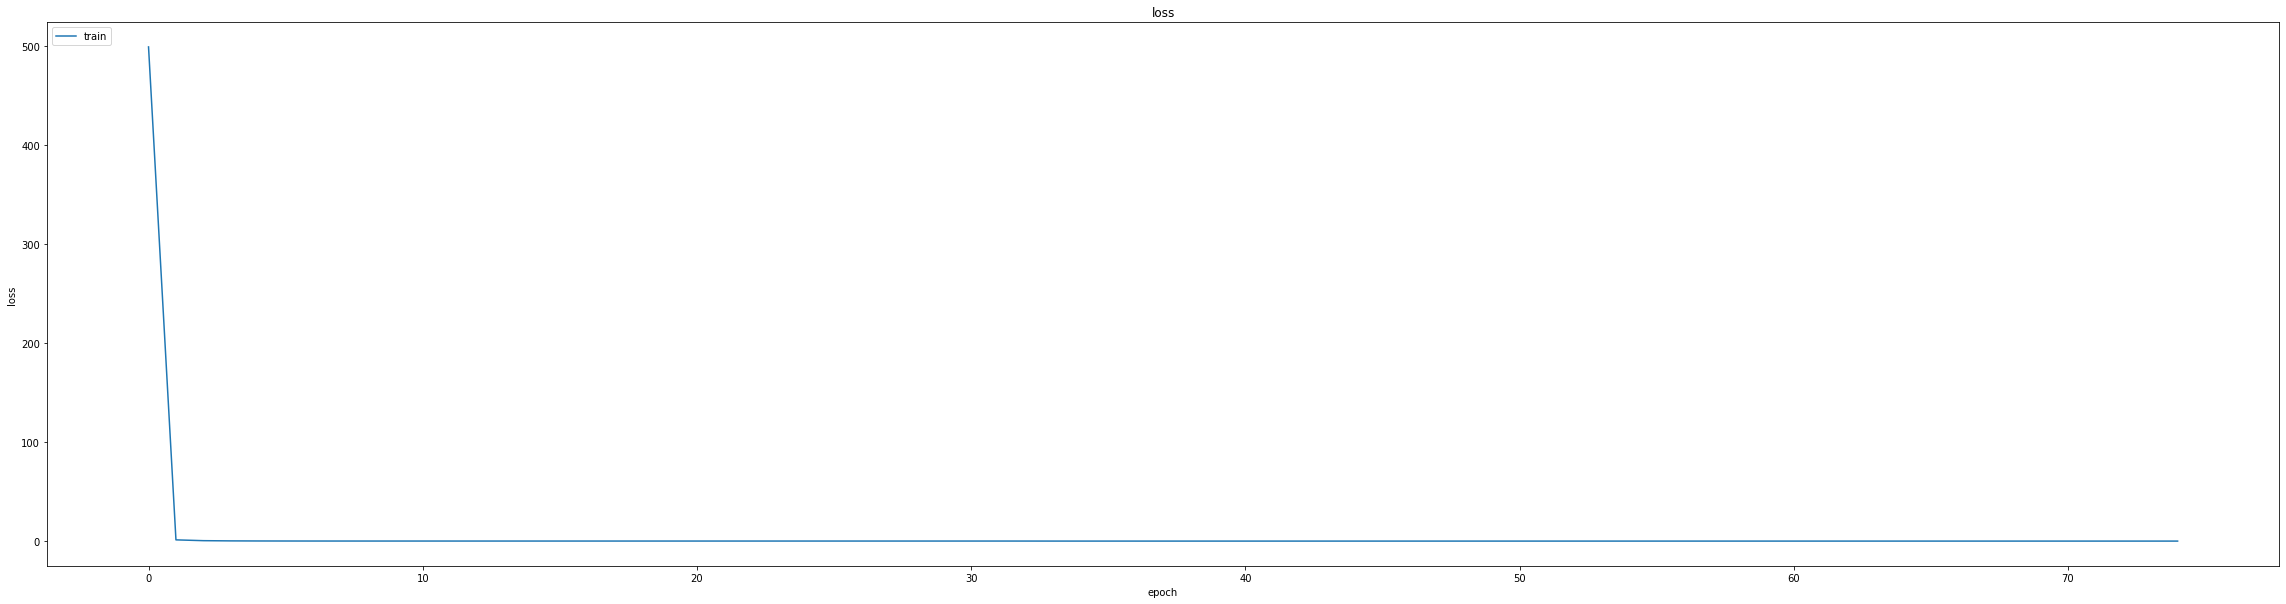

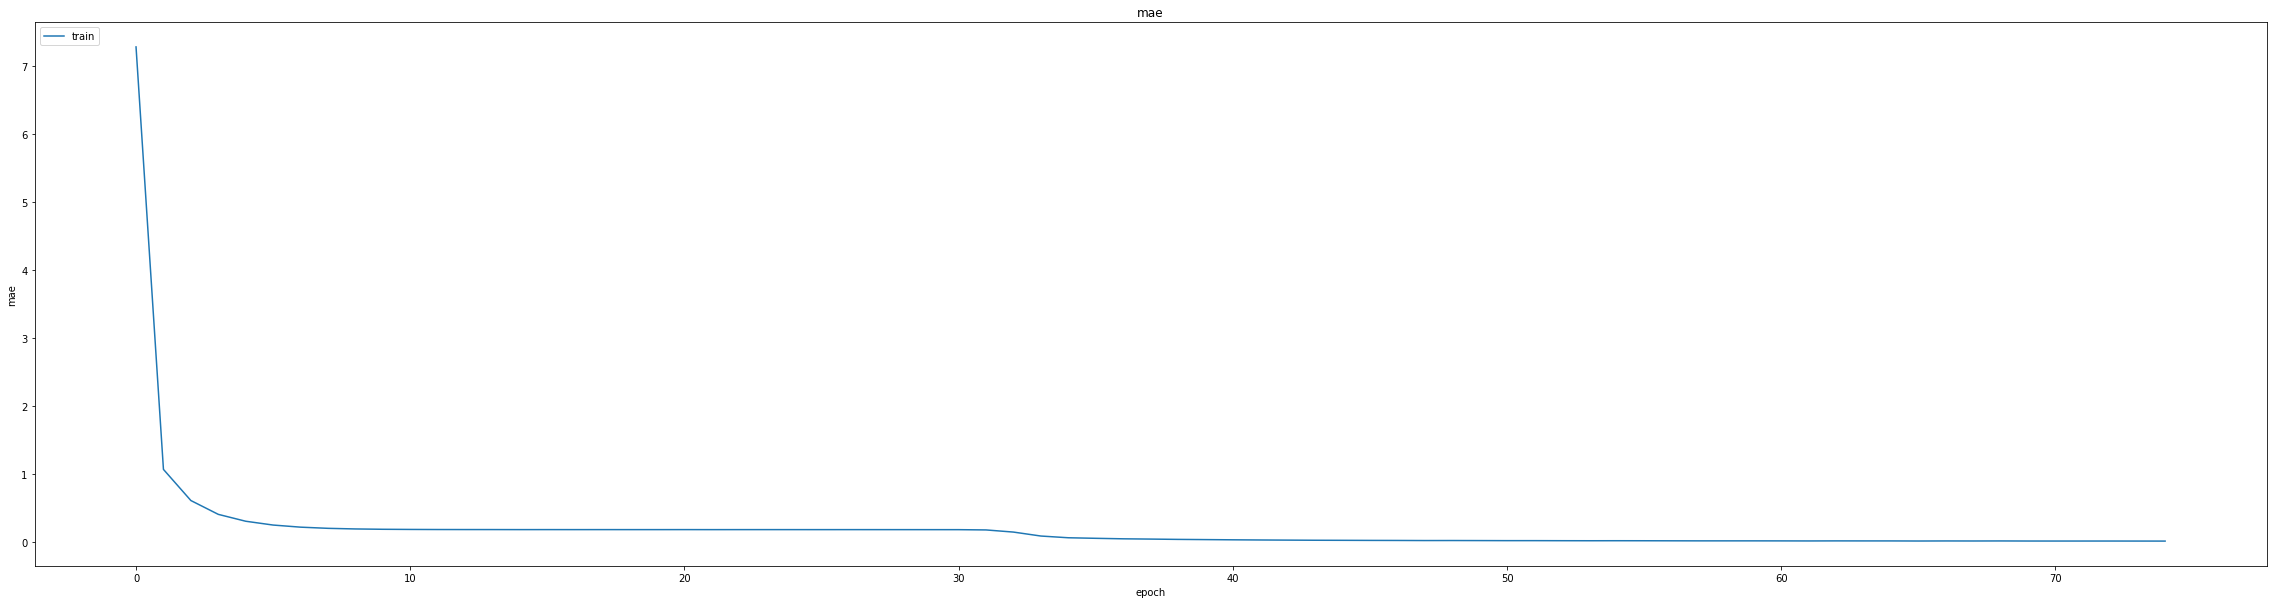

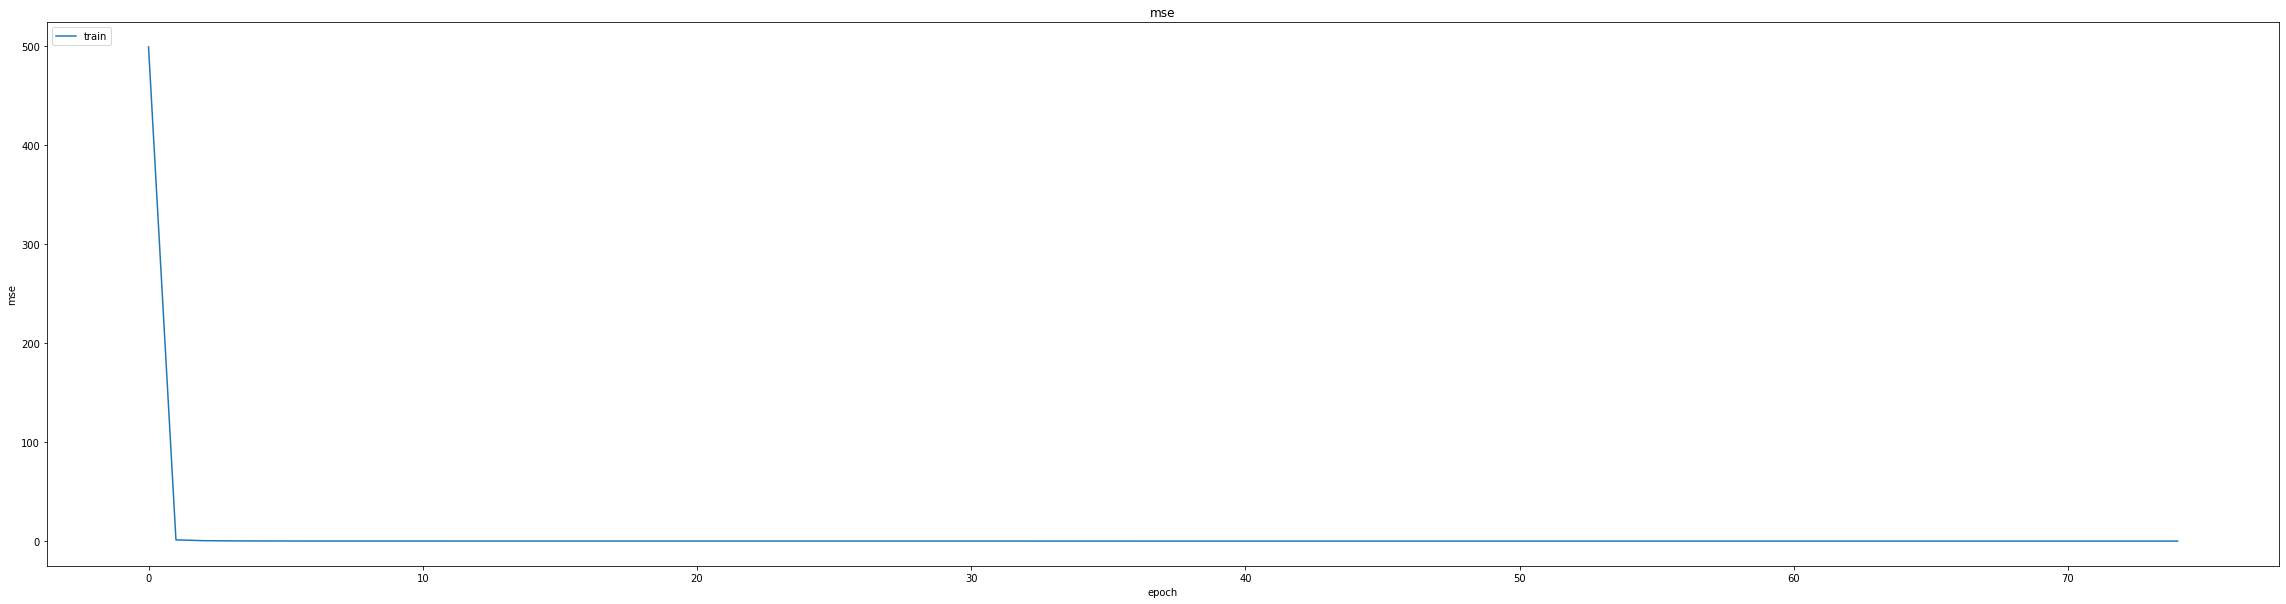

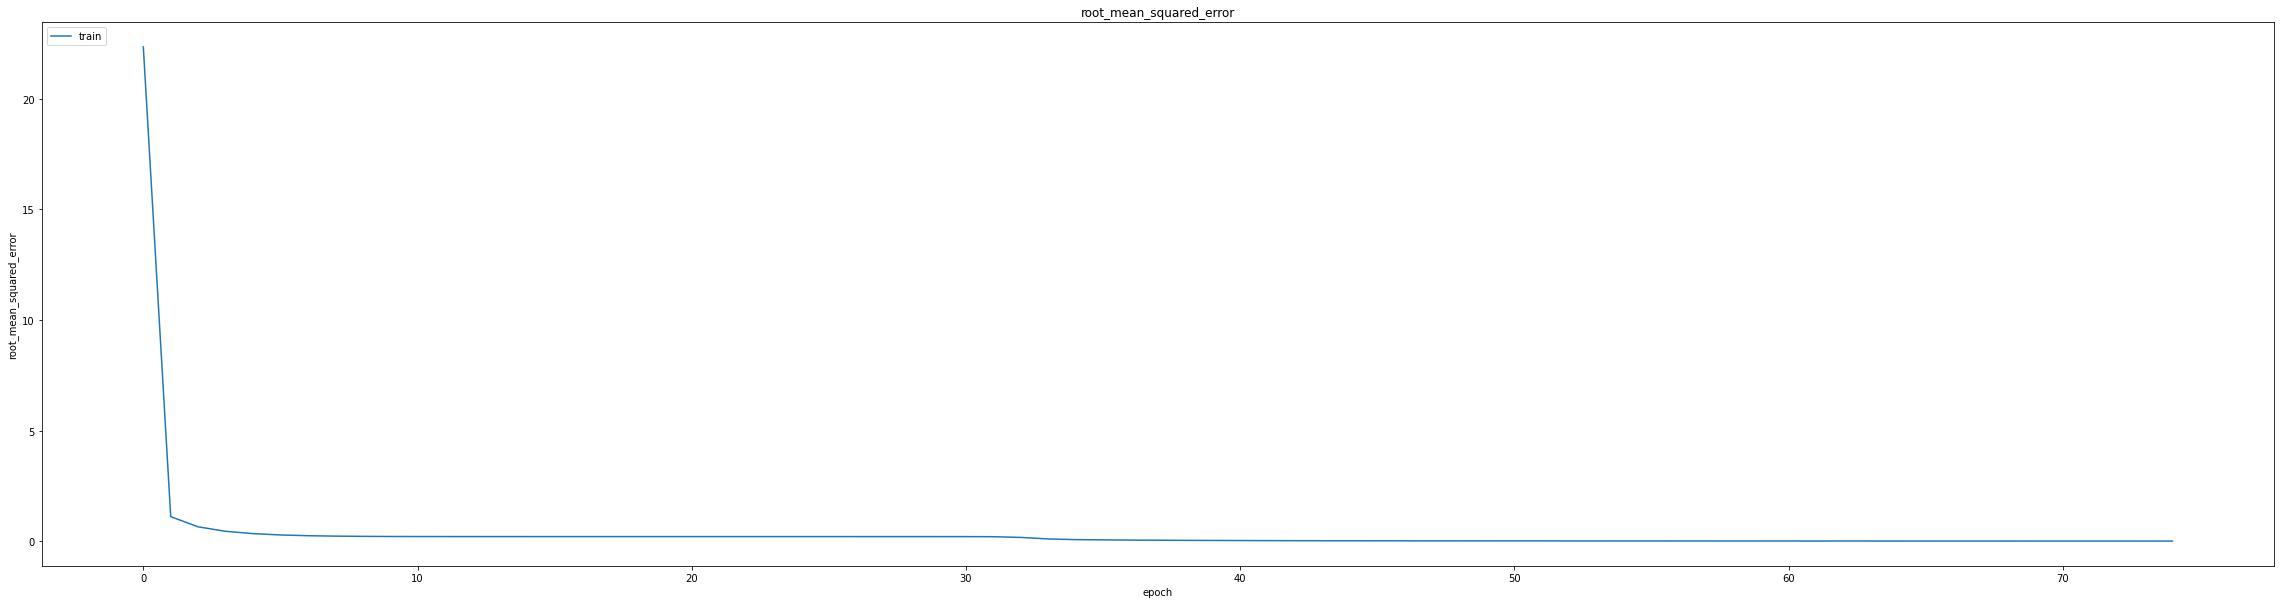

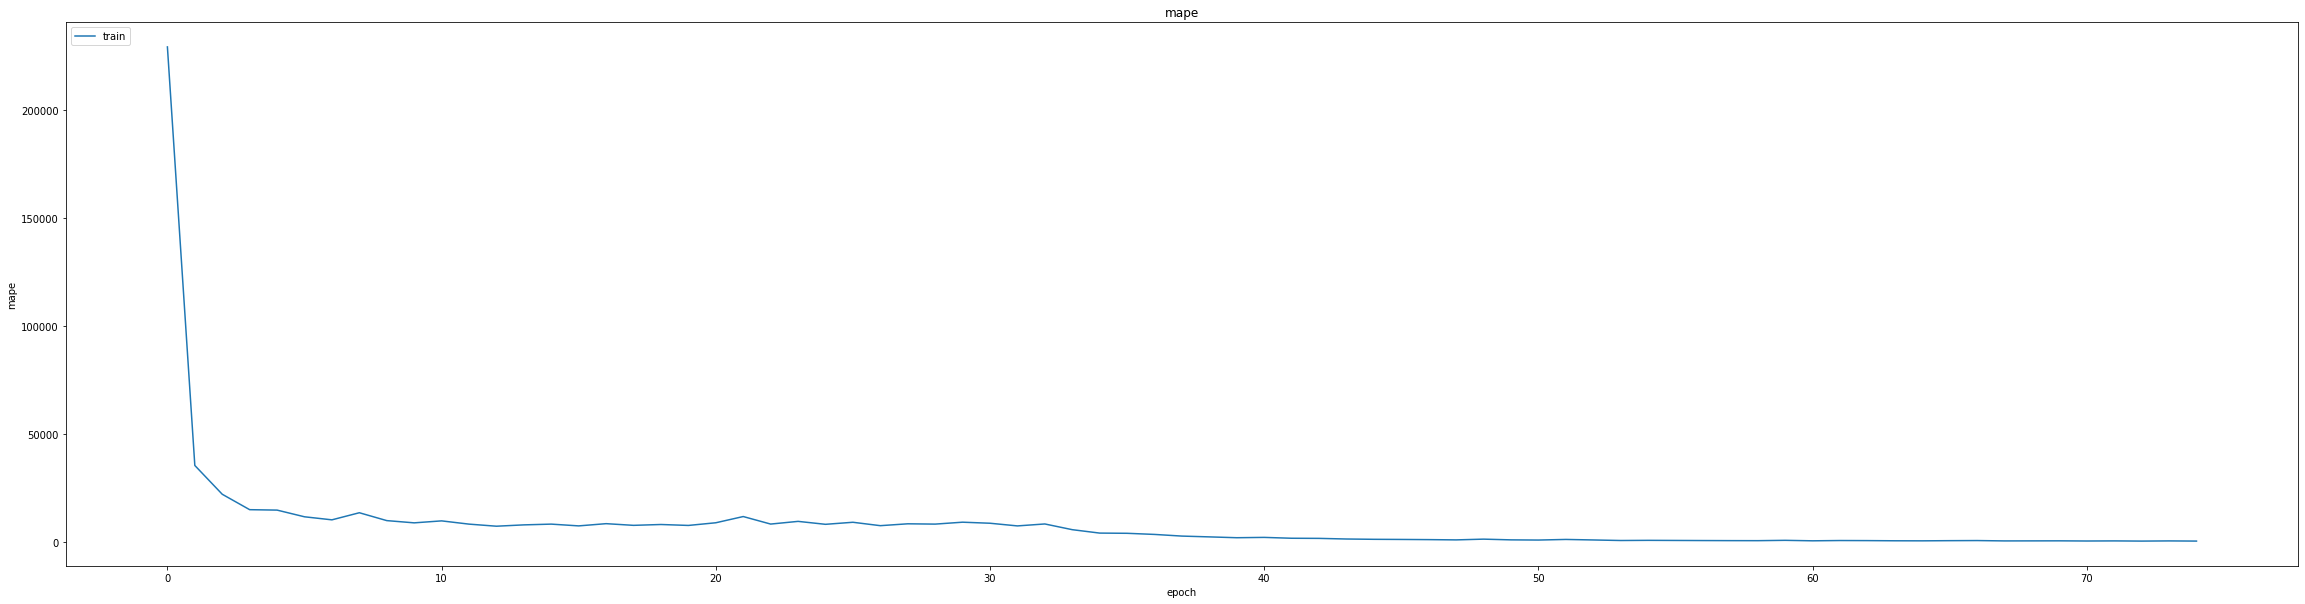

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012125319801270962
0.016567399725317955
464/464 [==============================] - 3s 4ms/step
0.9924582424533464


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 6.4337e-04 - mae: 0.0113 - mse: 6.4337e-04 - root_mean_squared_error: 0.0254 - mape: 669.8065
Epoch 1: val_mse did not improve from 0.00027
348/348 [==============================] - 12s 20ms/step - loss: 6.3848e-04 - mae: 0.0113 - mse: 6.3848e-04 - root_mean_squared_error: 0.0253 - mape: 664.2349 - val_loss: 2.7962e-04 - val_mae: 0.0122 - val_mse: 2.7962e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 3122.3267 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 6.6325e-05 - mae: 0.0062 - mse: 6.6325e-05 - root_mean_squared_error: 0.0081 - mape: 644.7386
Epoch 2: val_mse improved from 0.00027 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 6.6325e-05 - mae: 0.0062 - mse: 6.6325e-05 - root_mean_squared_error: 0.0081 - mape: 644.7386 - val_loss: 2.6224e-04 - val_mae: 0.0120 - val_mse: 2.6224e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 2849.5457 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
346/348 [============================>.] - ETA: 0s - loss: 6.1443e-05 - mae: 0.0059 - mse: 6.1443e-05 - root_mean_squared_error: 0.0078 - mape: 542.8803
Epoch 3: val_mse improved from 0.00026 to 0.00023, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 6.1371e-05 - mae: 0.0059 - mse: 6.1371e-05 - root_mean_squared_error: 0.0078 - mape: 539.9453 - val_loss: 2.2943e-04 - val_mae: 0.0111 - val_mse: 2.2943e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2968.2305 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 6.7553e-05 - mae: 0.0062 - mse: 6.7553e-05 - root_mean_squared_error: 0.0082 - mape: 551.4797
Epoch 4: val_mse did not improve from 0.00023
348/348 [==============================] - 4s 12ms/step - loss: 6.7553e-05 - mae: 0.0062 - mse: 6.7553e-05 - root_mean_squared_error: 0.0082 - mape: 551.4797 - val_loss: 2.6705e-04 - val_mae: 0.0123 - val_mse: 2.6705e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3378.8535 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
345/348 [============================>.] - ETA: 0s - loss: 6.4759e-05 - mae: 0.0061 - mse: 6.4759e-05 - root_mean_squared_error: 0.0080 - mape: 52

348/348 [==============================] - 16s 45ms/step - loss: 6.3863e-05 - mae: 0.0061 - mse: 6.3863e-05 - root_mean_squared_error: 0.0080 - mape: 504.9640 - val_loss: 2.0340e-04 - val_mae: 0.0105 - val_mse: 2.0340e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3018.2468 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
347/348 [============================>.] - ETA: 0s - loss: 5.8609e-05 - mae: 0.0058 - mse: 5.8609e-05 - root_mean_squared_error: 0.0077 - mape: 613.7673
Epoch 7: val_mse improved from 0.00020 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.8606e-05 - mae: 0.0058 - mse: 5.8606e-05 - root_mean_squared_error: 0.0077 - mape: 612.1822 - val_loss: 1.9472e-04 - val_mae: 0.0103 - val_mse: 1.9472e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 2834.6313 - lr: 7.2900e-04
Epoch 8/25
346/348 [============================>.] - ETA: 0s - loss: 5.9221e-05 - mae: 0.0058 - mse: 5.9221e-05 - root_mean_squared_error: 0.0077 - mape: 500.3462
Epoch 8: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 12ms/step - loss: 5.9142e-05 - mae: 0.0058 - mse: 5.9142e-05 - root_mean_squared_error: 0.0077 - mape: 497.6191 - val_loss: 2.1359e-04 - val_mae: 0.0110 - val_mse: 2.1359e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 3181.2703 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
348/348 [==============================] - ETA: 0s - loss: 5.8502e-05 - mae: 0.0058 - mse: 5.8502e-05 - root_mean_squared_error: 0.0076 - mape: 44

348/348 [==============================] - 15s 42ms/step - loss: 5.5689e-05 - mae: 0.0057 - mse: 5.5689e-05 - root_mean_squared_error: 0.0075 - mape: 434.9901 - val_loss: 1.8091e-04 - val_mae: 0.0098 - val_mse: 1.8091e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 2719.2224 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
346/348 [============================>.] - ETA: 0s - loss: 4.9278e-05 - mae: 0.0053 - mse: 4.9278e-05 - root_mean_squared_error: 0.0070 - mape: 427.5661
Epoch 11: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 12ms/step - loss: 4.9286e-05 - mae: 0.0053 - mse: 4.9286e-05 - root_mean_squared_error: 0.0070 - mape: 425.2361 - val_loss: 2.2025e-04 - val_mae: 0.0116 - val_mse: 2.2025e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 2940.2859 - lr: 5.9049e-04
Epoch 12/25
348/348 [==============================] - ETA: 0s - loss: 5.1360e-05 - mae: 0.0054 - mse: 5.1360e-05 - root_mean_squared_error: 0.0072 - mape:

348/348 [==============================] - 16s 45ms/step - loss: 5.1360e-05 - mae: 0.0054 - mse: 5.1360e-05 - root_mean_squared_error: 0.0072 - mape: 551.1391 - val_loss: 1.6657e-04 - val_mae: 0.0094 - val_mse: 1.6657e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2630.0615 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
344/348 [============================>.] - ETA: 0s - loss: 5.2332e-05 - mae: 0.0055 - mse: 5.2332e-05 - root_mean_squared_error: 0.0072 - mape: 418.8893
Epoch 13: val_mse improved from 0.00017 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.2208e-05 - mae: 0.0055 - mse: 5.2208e-05 - root_mean_squared_error: 0.0072 - mape: 414.2151 - val_loss: 1.5122e-04 - val_mae: 0.0090 - val_mse: 1.5122e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2792.5134 - lr: 5.3144e-04
Epoch 14/25
345/348 [============================>.] - ETA: 0s - loss: 4.4176e-05 - mae: 0.0050 - mse: 4.4176e-05 - root_mean_squared_error: 0.0066 - mape: 402.3986
Epoch 14: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 12ms/step - loss: 4.4108e-05 - mae: 0.0050 - mse: 4.4108e-05 - root_mean_squared_error: 0.0066 - mape: 399.0663 - val_loss: 1.5570e-04 - val_mae: 0.0093 - val_mse: 1.5570e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 3019.0146 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
344/348 [============================>.] - ETA: 0s - loss: 3.8927e-05 - mae: 0.0047 - mse: 3.8927e-05 - root_mean_squared_error: 0.0062 - mape

348/348 [==============================] - 16s 46ms/step - loss: 3.6560e-05 - mae: 0.0046 - mse: 3.6560e-05 - root_mean_squared_error: 0.0060 - mape: 478.0460 - val_loss: 1.3075e-04 - val_mae: 0.0083 - val_mse: 1.3075e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2924.5764 - lr: 4.3047e-04
Epoch 18/25
345/348 [============================>.] - ETA: 0s - loss: 3.8327e-05 - mae: 0.0047 - mse: 3.8327e-05 - root_mean_squared_error: 0.0062 - mape: 401.9240
Epoch 18: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 13ms/step - loss: 3.8307e-05 - mae: 0.0047 - mse: 3.8307e-05 - root_mean_squared_error: 0.0062 - mape: 398.5829 - val_loss: 1.7479e-04 - val_mae: 0.0104 - val_mse: 1.7479e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 2893.6860 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
344/348 [============================>.] - ETA: 0s - loss: 3.4344e-05 - mae: 0.0044 - mse: 3.4344e-05 - root_mean_squared_error: 0.0059 - mape

348/348 [==============================] - 16s 45ms/step - loss: 2.9556e-05 - mae: 0.0041 - mse: 2.9556e-05 - root_mean_squared_error: 0.0054 - mape: 394.1584 - val_loss: 1.3017e-04 - val_mae: 0.0086 - val_mse: 1.3017e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2858.6042 - lr: 3.1381e-04
Epoch 24/25
347/348 [============================>.] - ETA: 0s - loss: 3.0387e-05 - mae: 0.0041 - mse: 3.0387e-05 - root_mean_squared_error: 0.0055 - mape: 353.9641
Epoch 24: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 12ms/step - loss: 3.0355e-05 - mae: 0.0041 - mse: 3.0355e-05 - root_mean_squared_error: 0.0055 - mape: 353.0462 - val_loss: 1.4081e-04 - val_mae: 0.0090 - val_mse: 1.4081e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 2975.1389 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
348/348 [==============================] - ETA: 0s - loss: 2.7323e-05 - mae: 0.0039 - mse: 2.7323e-05 - root_mean_squared_error: 0.0052 - mape:

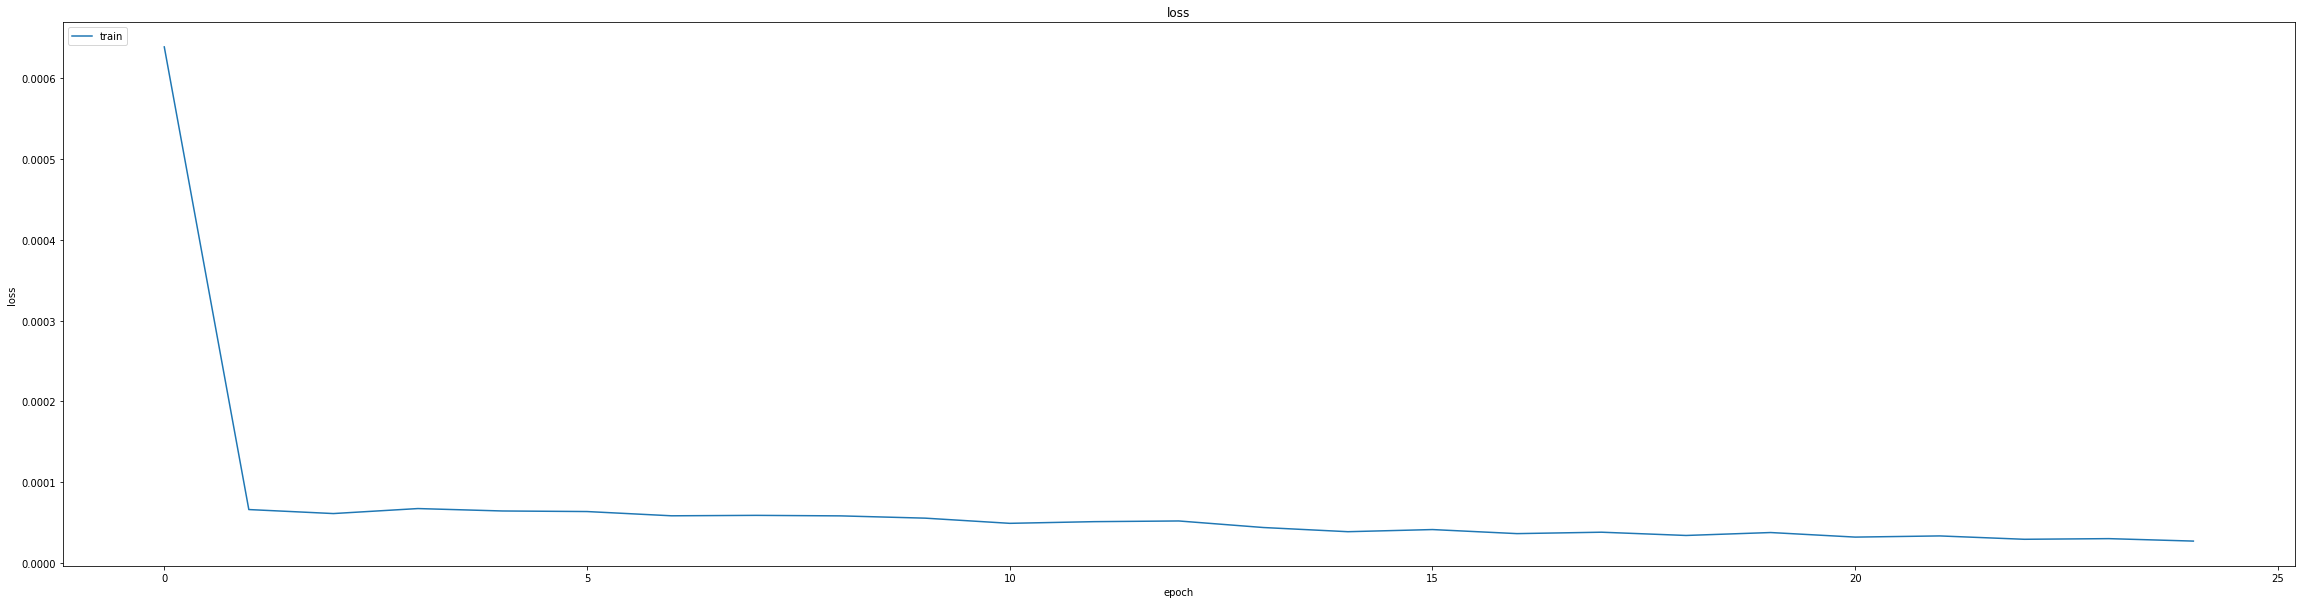

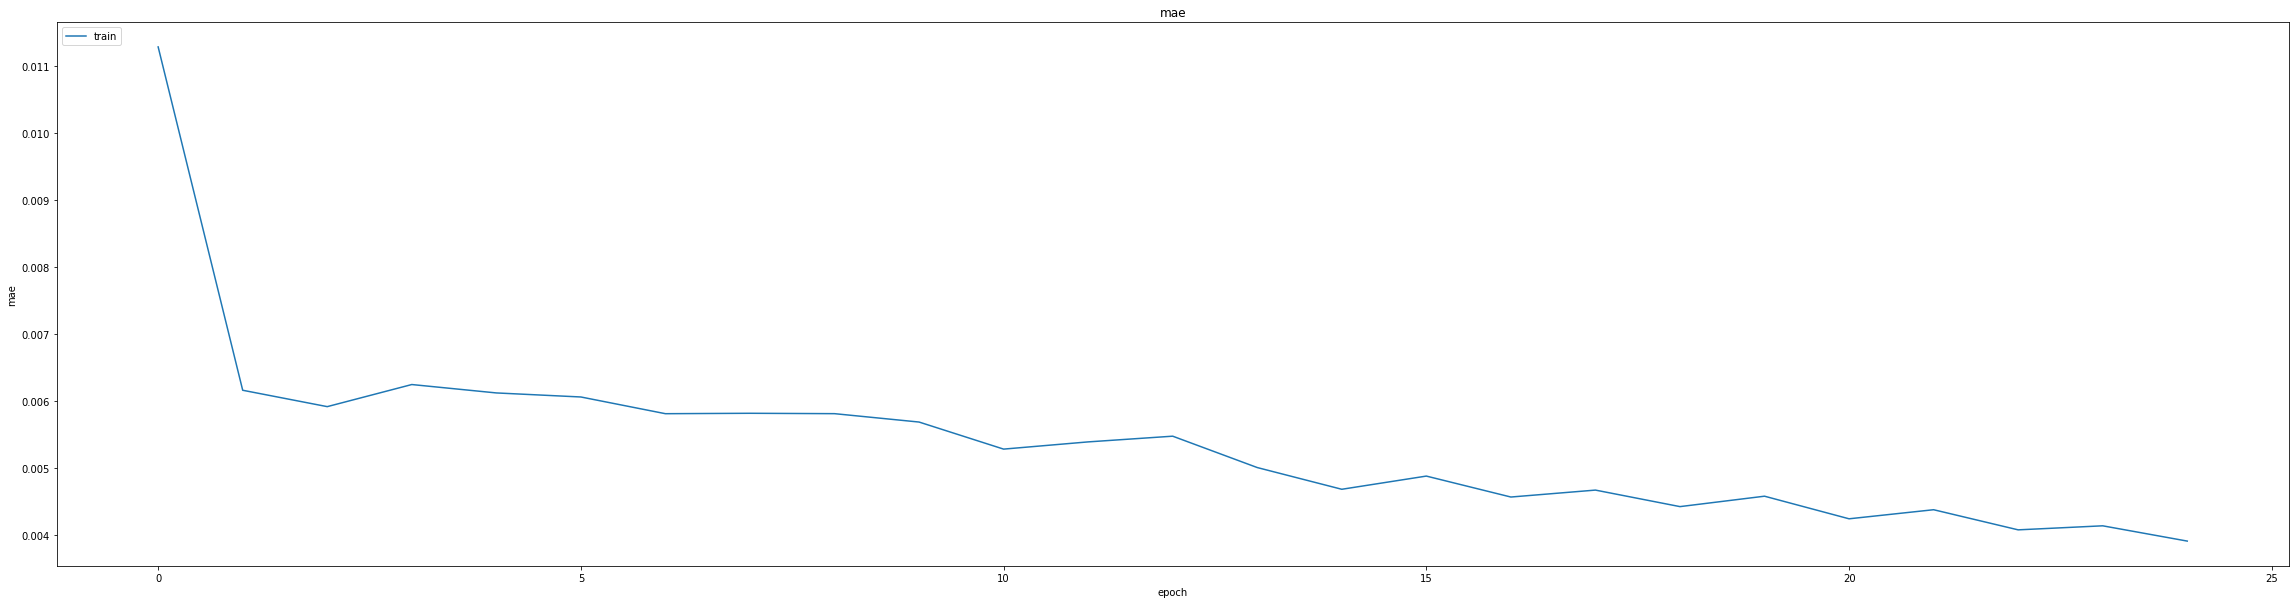

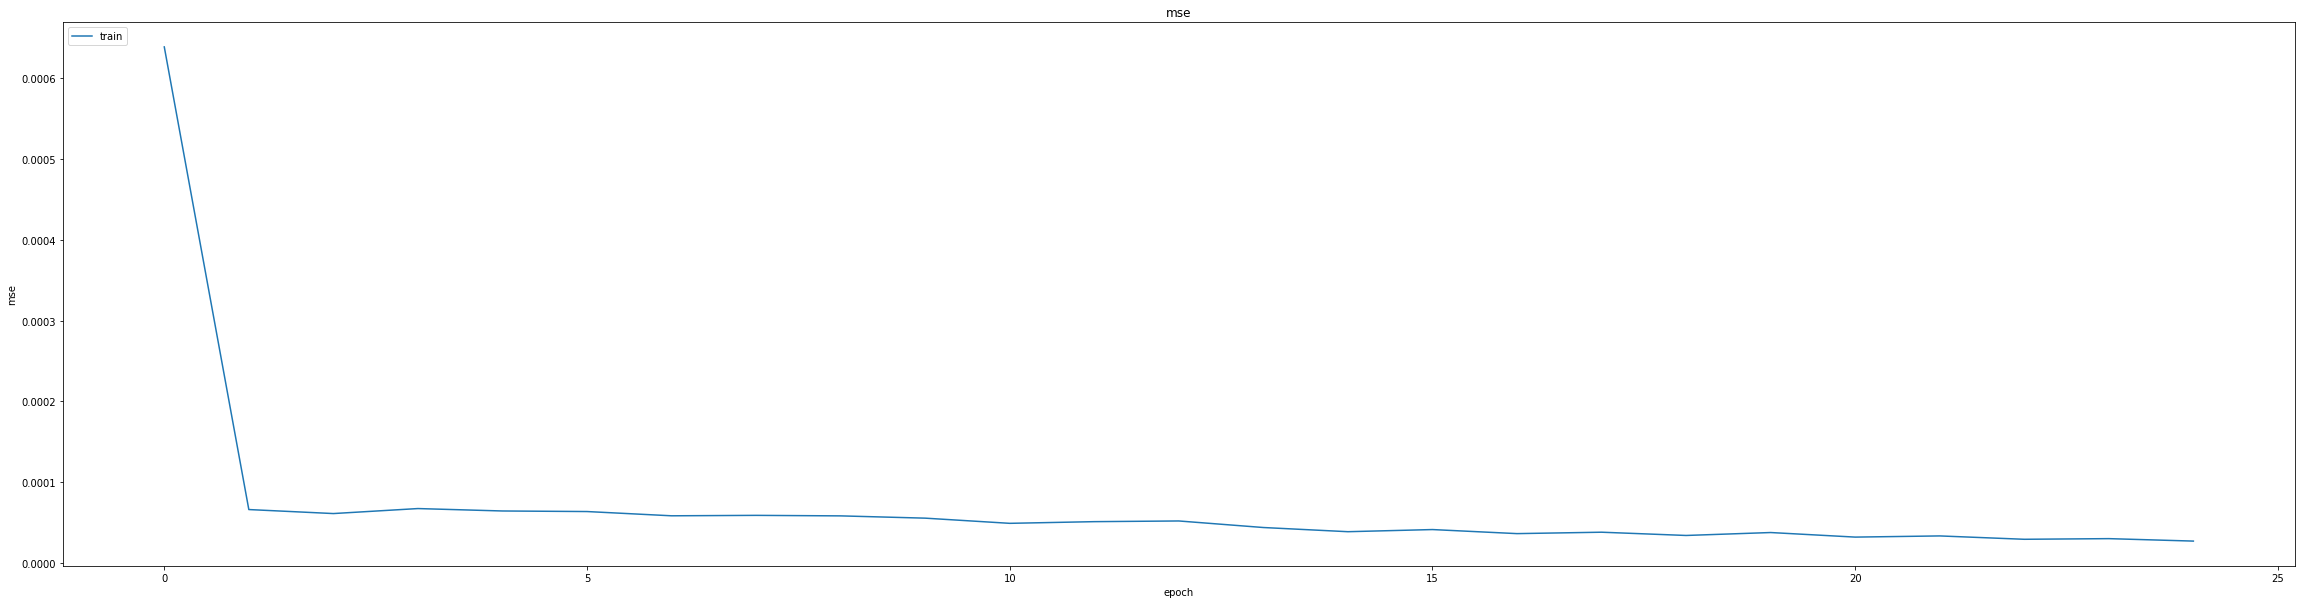

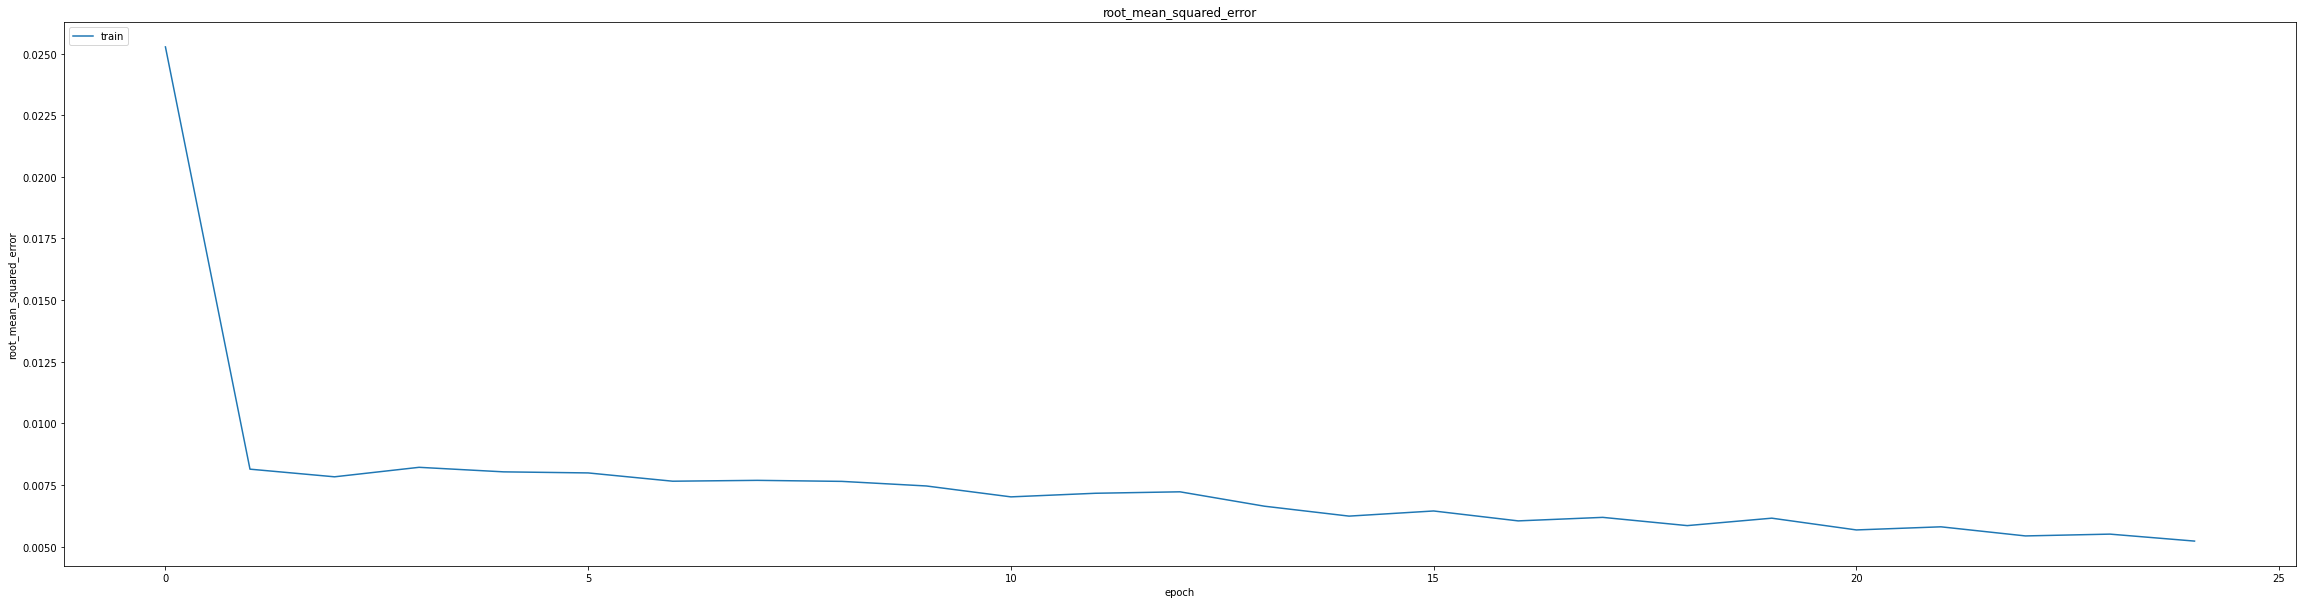

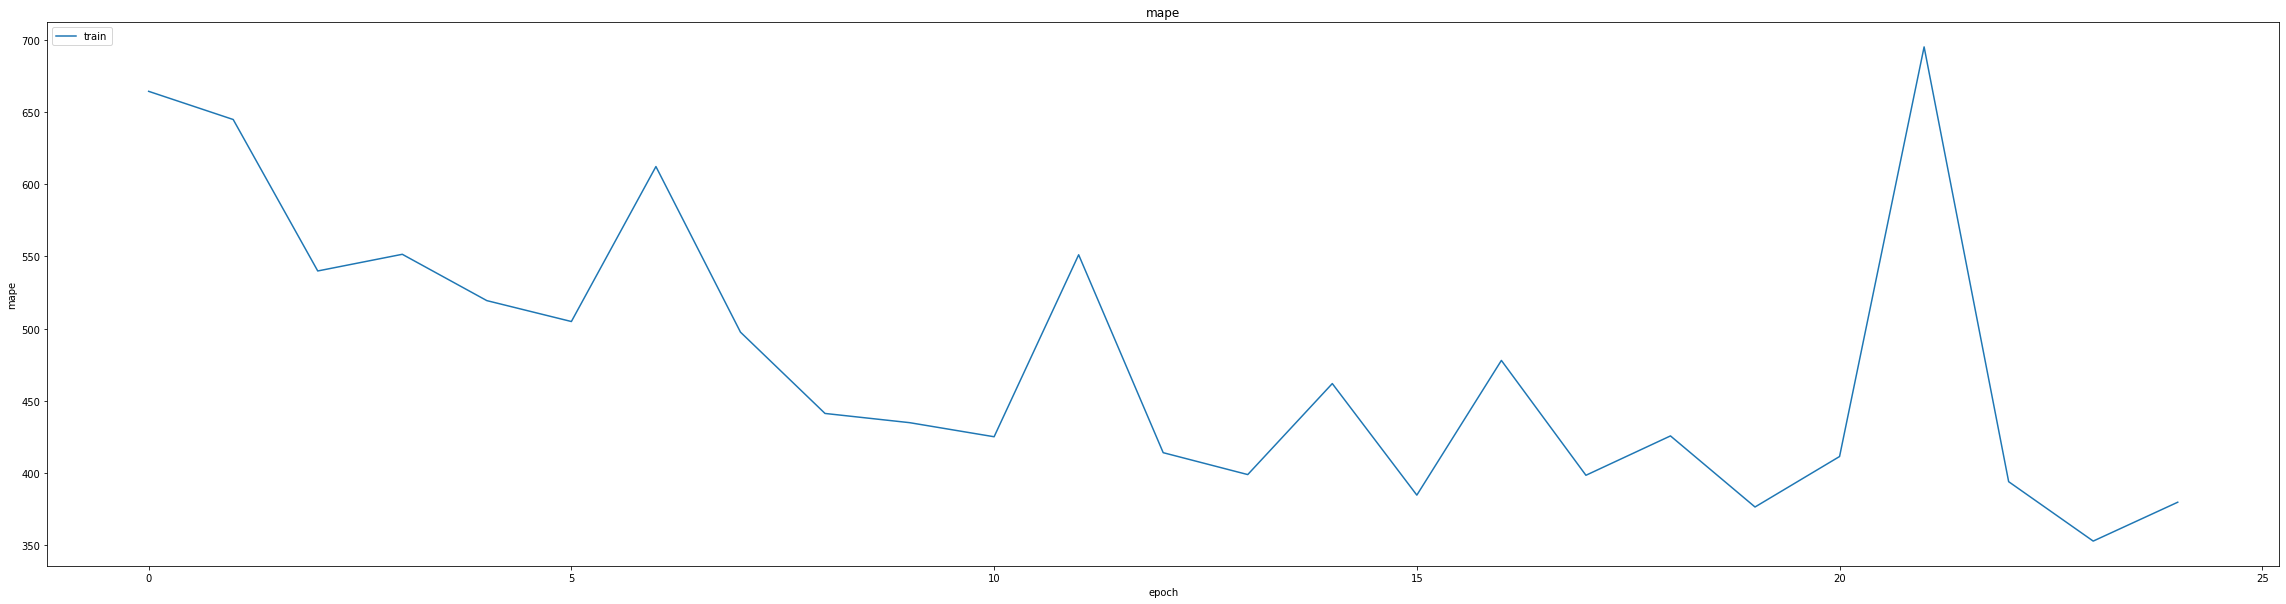

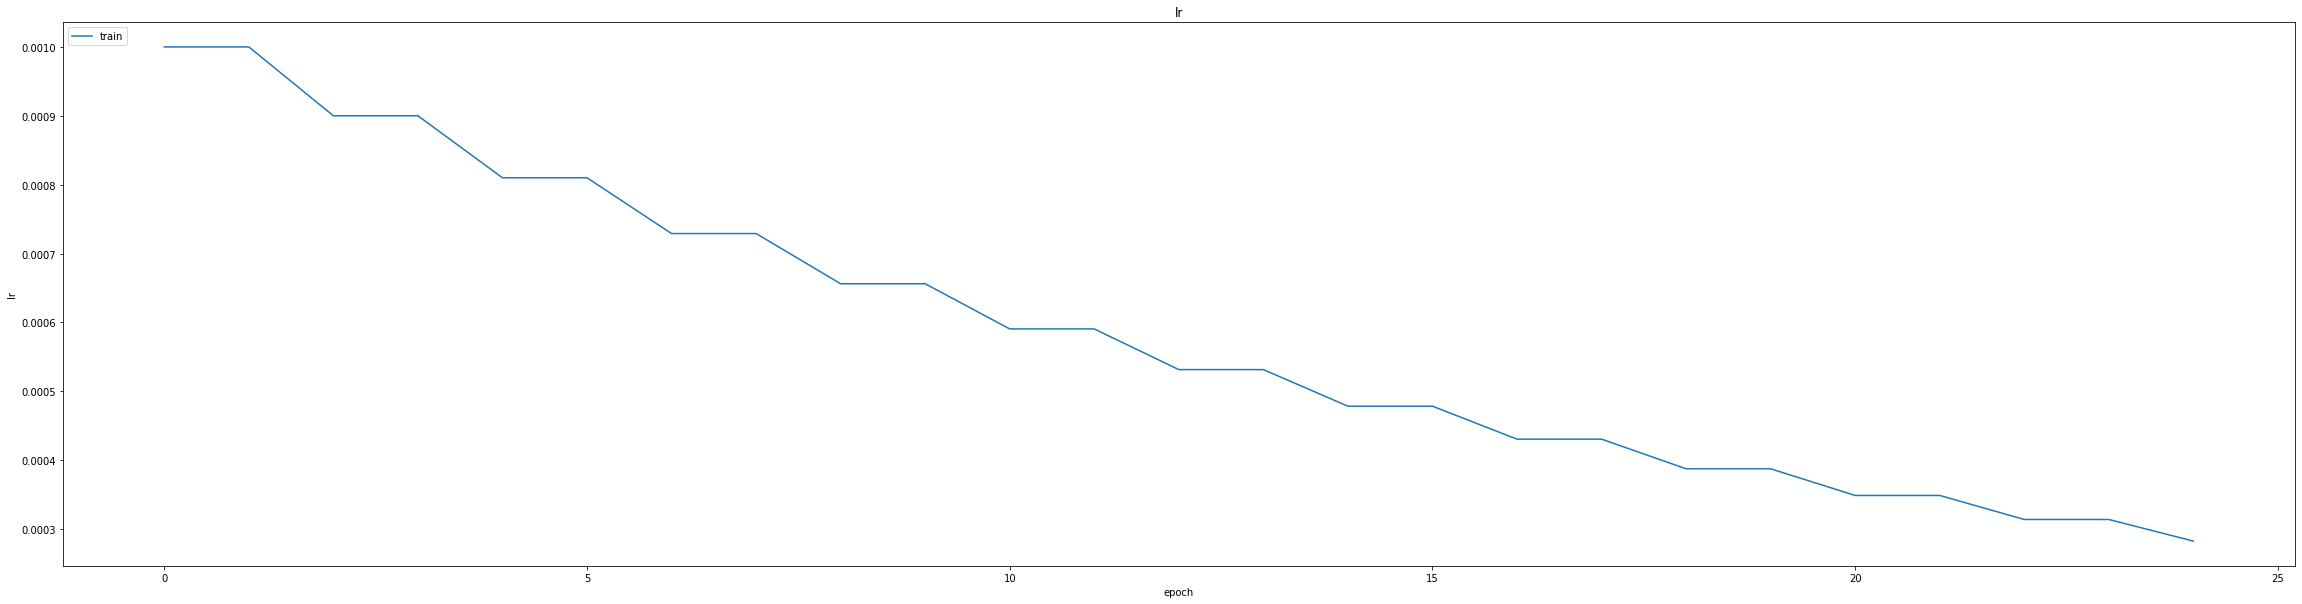

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008316476829349995
0.011409075930714607
464/464 [==============================] - 3s 4ms/step
0.9941672207533958


464/464 [==============================] - 2s 4ms/step


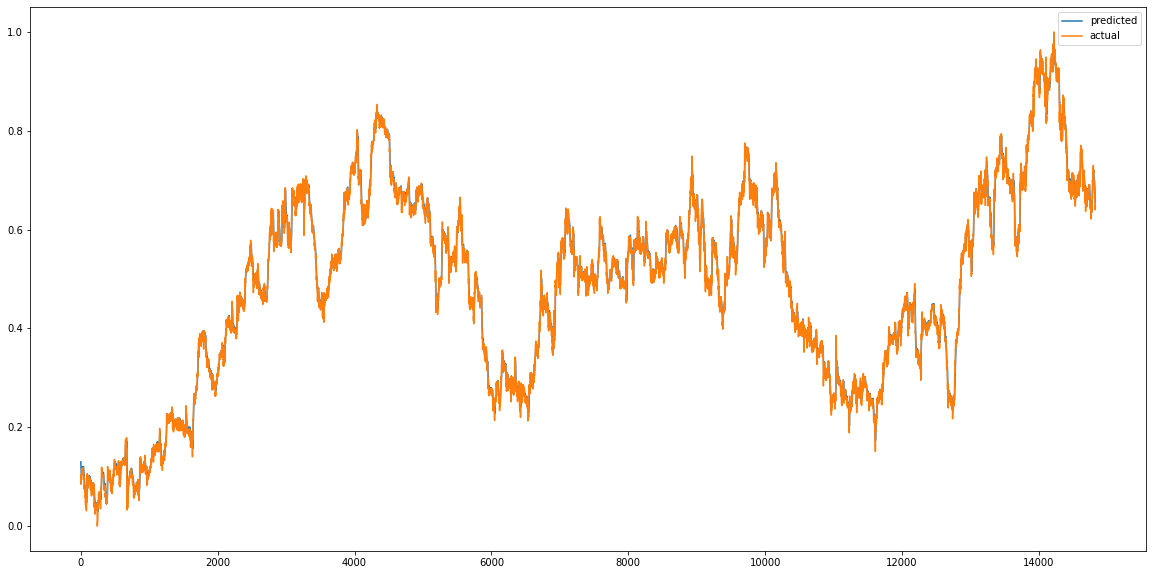

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


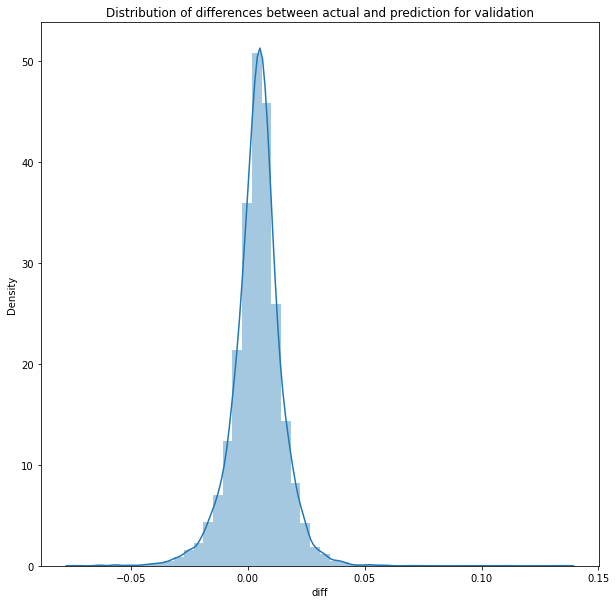

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


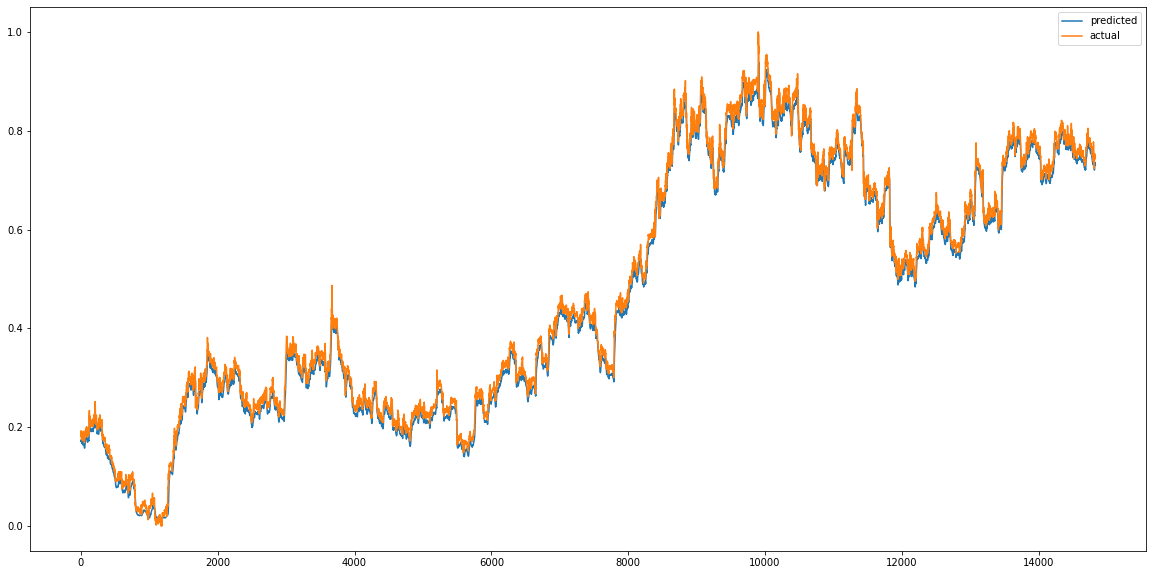

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


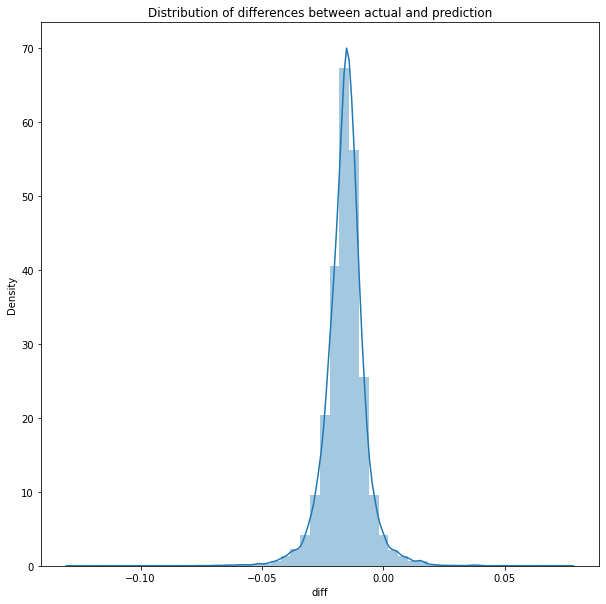

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003128052947405107
RMSE :  0.017686302460958613
MAE :  0.016045139101088964
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9950774485570798


count    14828.000000
mean        -0.015624
std          0.008289
min         -0.126989
25%         -0.019618
50%         -0.015314
75%         -0.011516
max          0.074674
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 667.7598 - mae: 8.3315 - mse: 667.7598 - root_mean_squared_error: 25.8410 - mape: 82559.1328
Epoch 1: val_mse improved from inf to 0.20642, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 27s 43ms/step - loss: 660.2666 - mae: 8.2445 - mse: 660.2666 - root_mean_squared_error: 25.6957 - mape: 81636.9609 - val_loss: 0.2064 - val_mae: 0.4094 - val_mse: 0.2064 - val_root_mean_squared_error: 0.4543 - val_mape: 60269.1719
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 0.1791 - mae: 0.3685 - mse: 0.1791 - root_mean_squared_error: 0.4232 - mape: 15652.1611
Epoch 2: val_mse improved from 0.20642 to 0.04238, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.1781 - mae: 0.3673 - mse: 0.1781 - root_mean_squared_error: 0.4220 - mape: 15478.8828 - val_loss: 0.0424 - val_mae: 0.1632 - val_mse: 0.0424 - val_root_mean_squared_error: 0.2059 - val_mape: 35997.3555
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.0646 - mae: 0.2142 - mse: 0.0646 - root_mean_squared_error: 0.2541 - mape: 11085.8779
Epoch 3: val_mse did not improve from 0.04238
348/348 [==============================] - 4s 12ms/step - loss: 0.0644 - mae: 0.2139 - mse: 0.0644 - root_mean_squared_error: 0.2538 - mape: 10994.3789 - val_loss: 0.0432 - val_mae: 0.1743 - val_mse: 0.0432 - val_root_mean_squared_error: 0.2079 - val_mape: 28685.8516
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0485 - mae: 0.1835 - mse: 0.0485 - root_mean_squared_error: 0.2203 - mape: 12254.0518
Epoch 4: val_mse did not improve from 0.04238
348/348 [==============================] - 4s 12ms/step

348/348 [==============================] - 14s 40ms/step - loss: 0.0276 - mae: 0.1312 - mse: 0.0276 - root_mean_squared_error: 0.1662 - mape: 8575.6982 - val_loss: 0.0050 - val_mae: 0.0590 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0708 - val_mape: 14327.2783
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0442 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 4076.2932
Epoch 21: val_mse improved from 0.00502 to 0.00360, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0039 - mae: 0.0442 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 4042.7856 - val_loss: 0.0036 - val_mae: 0.0490 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0600 - val_mape: 10857.9805
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0372 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 3566.0574
Epoch 22: val_mse improved from 0.00360 to 0.00304, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0028 - mae: 0.0372 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 3546.7407 - val_loss: 0.0030 - val_mae: 0.0448 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0551 - val_mape: 9703.6982
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0337 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 3363.9106
Epoch 23: val_mse improved from 0.00304 to 0.00279, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0023 - mae: 0.0337 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 3363.9106 - val_loss: 0.0028 - val_mae: 0.0421 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0529 - val_mape: 8953.5537
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0313 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 3178.4148
Epoch 24: val_mse improved from 0.00279 to 0.00275, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0019 - mae: 0.0312 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 3161.1531 - val_loss: 0.0028 - val_mae: 0.0426 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0525 - val_mape: 8276.7422
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0288 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 2906.8657
Epoch 25: val_mse improved from 0.00275 to 0.00209, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0016 - mae: 0.0288 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 2899.3479 - val_loss: 0.0021 - val_mae: 0.0357 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 7711.3672
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0268 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 2702.0369
Epoch 26: val_mse improved from 0.00209 to 0.00158, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0014 - mae: 0.0268 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 2695.0674 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 7169.4795
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 2459.8279
Epoch 27: val_mse did not improve from 0.00158
348/348 [==============================] - 4s 12ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 2459.8279 - val_loss: 0.0019 - val_mae: 0.0329 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0430 - val_mape: 6591.8657
Epoch 28/75
344/348 [============================>.] - ETA: 0s - loss: 9.8948e-04 - mae: 0.0233 - mse: 9.8948e-04 - root_mean_squared_error: 0.0315 - mape: 2153.8765
Epoch 28: val_mse did not improve from 0.00158
348/348 [==============================] - 4s 12m

348/348 [==============================] - 14s 41ms/step - loss: 7.3107e-04 - mae: 0.0203 - mse: 7.3107e-04 - root_mean_squared_error: 0.0270 - mape: 1802.3790 - val_loss: 0.0014 - val_mae: 0.0275 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 5319.8335
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 6.5380e-04 - mae: 0.0193 - mse: 6.5380e-04 - root_mean_squared_error: 0.0256 - mape: 1934.1238
Epoch 31: val_mse did not improve from 0.00135
348/348 [==============================] - 4s 12ms/step - loss: 6.5419e-04 - mae: 0.0193 - mse: 6.5419e-04 - root_mean_squared_error: 0.0256 - mape: 1923.6564 - val_loss: 0.0015 - val_mae: 0.0289 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 5029.7744
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 6.0359e-04 - mae: 0.0185 - mse: 6.0359e-04 - root_mean_squared_error: 0.0246 - mape: 1613.6997
Epoch 32: val_mse improved from 0.00135 to 0.00126, saving model to /con

348/348 [==============================] - 14s 41ms/step - loss: 6.0364e-04 - mae: 0.0185 - mse: 6.0364e-04 - root_mean_squared_error: 0.0246 - mape: 1609.5480 - val_loss: 0.0013 - val_mae: 0.0265 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 4862.8882
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 5.4758e-04 - mae: 0.0178 - mse: 5.4758e-04 - root_mean_squared_error: 0.0234 - mape: 1578.6187
Epoch 33: val_mse improved from 0.00126 to 0.00126, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 5.4769e-04 - mae: 0.0178 - mse: 5.4769e-04 - root_mean_squared_error: 0.0234 - mape: 1574.5425 - val_loss: 0.0013 - val_mae: 0.0265 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 4547.5576
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 5.2182e-04 - mae: 0.0174 - mse: 5.2182e-04 - root_mean_squared_error: 0.0228 - mape: 1321.5157
Epoch 34: val_mse did not improve from 0.00126
348/348 [==============================] - 4s 12ms/step - loss: 5.2174e-04 - mae: 0.0174 - mse: 5.2174e-04 - root_mean_squared_error: 0.0228 - mape: 1318.0941 - val_loss: 0.0013 - val_mae: 0.0272 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 4435.8408
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 4.7667e-04 - mae: 0.0166 - mse: 4.7667e-04 - root_mean_squared_error: 0.0218 - mape: 1393.5574
Epoch 35: val_mse improved from 0.00126 to 0.00118, saving model to /con

348/348 [==============================] - 14s 41ms/step - loss: 4.7667e-04 - mae: 0.0166 - mse: 4.7667e-04 - root_mean_squared_error: 0.0218 - mape: 1393.5574 - val_loss: 0.0012 - val_mae: 0.0258 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 4085.5740
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 4.4100e-04 - mae: 0.0160 - mse: 4.4100e-04 - root_mean_squared_error: 0.0210 - mape: 1368.6302
Epoch 36: val_mse improved from 0.00118 to 0.00116, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 4.4087e-04 - mae: 0.0160 - mse: 4.4087e-04 - root_mean_squared_error: 0.0210 - mape: 1361.1859 - val_loss: 0.0012 - val_mae: 0.0255 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 4002.8508
Epoch 37/75
345/348 [============================>.] - ETA: 0s - loss: 4.1588e-04 - mae: 0.0156 - mse: 4.1588e-04 - root_mean_squared_error: 0.0204 - mape: 1210.0339
Epoch 37: val_mse did not improve from 0.00116
348/348 [==============================] - 4s 12ms/step - loss: 4.1561e-04 - mae: 0.0156 - mse: 4.1561e-04 - root_mean_squared_error: 0.0204 - mape: 1200.0308 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 3874.0935
Epoch 38/75
346/348 [============================>.] - ETA: 0s - loss: 3.8466e-04 - mae: 0.0150 - mse: 3.8466e-04 - root_mean_squared_error: 0.0196 - mape: 1177.7443
Epoch 38: val_mse did not improve from 0.00116
348/348 [================

348/348 [==============================] - 14s 41ms/step - loss: 3.8045e-04 - mae: 0.0148 - mse: 3.8045e-04 - root_mean_squared_error: 0.0195 - mape: 1192.4431 - val_loss: 0.0011 - val_mae: 0.0253 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 3650.0457
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 3.6562e-04 - mae: 0.0146 - mse: 3.6562e-04 - root_mean_squared_error: 0.0191 - mape: 1139.4303
Epoch 40: val_mse did not improve from 0.00109
348/348 [==============================] - 4s 12ms/step - loss: 3.6590e-04 - mae: 0.0146 - mse: 3.6590e-04 - root_mean_squared_error: 0.0191 - mape: 1126.7499 - val_loss: 0.0017 - val_mae: 0.0317 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 3373.5176
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 3.4482e-04 - mae: 0.0141 - mse: 3.4482e-04 - root_mean_squared_error: 0.0186 - mape: 1075.3165
Epoch 41: val_mse did not improve from 0.00109
348/348 [================

348/348 [==============================] - 14s 41ms/step - loss: 2.7616e-04 - mae: 0.0126 - mse: 2.7616e-04 - root_mean_squared_error: 0.0166 - mape: 961.7090 - val_loss: 0.0010 - val_mae: 0.0239 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 2937.9321
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 2.6040e-04 - mae: 0.0122 - mse: 2.6040e-04 - root_mean_squared_error: 0.0161 - mape: 901.7680
Epoch 46: val_mse did not improve from 0.00100
348/348 [==============================] - 4s 12ms/step - loss: 2.6040e-04 - mae: 0.0122 - mse: 2.6040e-04 - root_mean_squared_error: 0.0161 - mape: 901.7680 - val_loss: 0.0012 - val_mae: 0.0264 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 3112.3386
Epoch 47/75
345/348 [============================>.] - ETA: 0s - loss: 2.5143e-04 - mae: 0.0120 - mse: 2.5143e-04 - root_mean_squared_error: 0.0159 - mape: 903.2783
Epoch 47: val_mse did not improve from 0.00100
348/348 [====================

348/348 [==============================] - 14s 41ms/step - loss: 1.9865e-04 - mae: 0.0106 - mse: 1.9865e-04 - root_mean_squared_error: 0.0141 - mape: 821.9600 - val_loss: 9.5875e-04 - val_mae: 0.0234 - val_mse: 9.5875e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 2846.7729
Epoch 56/75
348/348 [==============================] - ETA: 0s - loss: 2.0270e-04 - mae: 0.0108 - mse: 2.0270e-04 - root_mean_squared_error: 0.0142 - mape: 713.2835
Epoch 56: val_mse improved from 0.00096 to 0.00093, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 2.0270e-04 - mae: 0.0108 - mse: 2.0270e-04 - root_mean_squared_error: 0.0142 - mape: 713.2835 - val_loss: 9.2828e-04 - val_mae: 0.0232 - val_mse: 9.2828e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 3439.4734
Epoch 57/75
344/348 [============================>.] - ETA: 0s - loss: 1.8995e-04 - mae: 0.0104 - mse: 1.8995e-04 - root_mean_squared_error: 0.0138 - mape: 740.7068
Epoch 57: val_mse improved from 0.00093 to 0.00088, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.8939e-04 - mae: 0.0103 - mse: 1.8939e-04 - root_mean_squared_error: 0.0138 - mape: 732.4406 - val_loss: 8.8315e-04 - val_mae: 0.0226 - val_mse: 8.8315e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 2872.4624
Epoch 58/75
345/348 [============================>.] - ETA: 0s - loss: 1.6769e-04 - mae: 0.0098 - mse: 1.6769e-04 - root_mean_squared_error: 0.0129 - mape: 695.1586
Epoch 58: val_mse did not improve from 0.00088
348/348 [==============================] - 4s 12ms/step - loss: 1.6765e-04 - mae: 0.0098 - mse: 1.6765e-04 - root_mean_squared_error: 0.0129 - mape: 689.4011 - val_loss: 8.8497e-04 - val_mae: 0.0227 - val_mse: 8.8497e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 3601.6028
Epoch 59/75
344/348 [============================>.] - ETA: 0s - loss: 1.8054e-04 - mae: 0.0101 - mse: 1.8054e-04 - root_mean_squared_error: 0.0134 - mape: 709.5157
Epoch 59: val_mse did not improve from 0.00088
348/348 [====

348/348 [==============================] - 14s 41ms/step - loss: 1.5694e-04 - mae: 0.0095 - mse: 1.5694e-04 - root_mean_squared_error: 0.0125 - mape: 654.2245 - val_loss: 8.6251e-04 - val_mae: 0.0225 - val_mse: 8.6251e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 3787.7563
Epoch 63/75
346/348 [============================>.] - ETA: 0s - loss: 1.6289e-04 - mae: 0.0096 - mse: 1.6289e-04 - root_mean_squared_error: 0.0128 - mape: 657.2321
Epoch 63: val_mse improved from 0.00086 to 0.00081, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.6267e-04 - mae: 0.0096 - mse: 1.6267e-04 - root_mean_squared_error: 0.0128 - mape: 653.6562 - val_loss: 8.0719e-04 - val_mae: 0.0219 - val_mse: 8.0719e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 3977.4221
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 1.5010e-04 - mae: 0.0092 - mse: 1.5010e-04 - root_mean_squared_error: 0.0123 - mape: 645.0553
Epoch 64: val_mse improved from 0.00081 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.5007e-04 - mae: 0.0092 - mse: 1.5007e-04 - root_mean_squared_error: 0.0123 - mape: 641.5400 - val_loss: 7.7049e-04 - val_mae: 0.0212 - val_mse: 7.7049e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 3761.8162
Epoch 65/75
346/348 [============================>.] - ETA: 0s - loss: 1.4862e-04 - mae: 0.0092 - mse: 1.4862e-04 - root_mean_squared_error: 0.0122 - mape: 640.6306
Epoch 65: val_mse did not improve from 0.00077
348/348 [==============================] - 4s 12ms/step - loss: 1.4846e-04 - mae: 0.0092 - mse: 1.4846e-04 - root_mean_squared_error: 0.0122 - mape: 637.1434 - val_loss: 7.8333e-04 - val_mae: 0.0213 - val_mse: 7.8333e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 3780.4573
Epoch 66/75
348/348 [==============================] - ETA: 0s - loss: 1.4975e-04 - mae: 0.0093 - mse: 1.4975e-04 - root_mean_squared_error: 0.0122 - mape: 649.5159
Epoch 66: val_mse did not improve from 0.00077
348/348 [====

348/348 [==============================] - 14s 41ms/step - loss: 1.3299e-04 - mae: 0.0087 - mse: 1.3299e-04 - root_mean_squared_error: 0.0115 - mape: 596.0246 - val_loss: 6.7551e-04 - val_mae: 0.0200 - val_mse: 6.7551e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 3845.7493
Epoch 69/75
344/348 [============================>.] - ETA: 0s - loss: 1.3403e-04 - mae: 0.0087 - mse: 1.3403e-04 - root_mean_squared_error: 0.0116 - mape: 627.7654
Epoch 69: val_mse did not improve from 0.00068
348/348 [==============================] - 4s 12ms/step - loss: 1.3363e-04 - mae: 0.0087 - mse: 1.3363e-04 - root_mean_squared_error: 0.0116 - mape: 620.7563 - val_loss: 7.2811e-04 - val_mae: 0.0211 - val_mse: 7.2811e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 4014.8943
Epoch 70/75
345/348 [============================>.] - ETA: 0s - loss: 1.3259e-04 - mae: 0.0087 - mse: 1.3259e-04 - root_mean_squared_error: 0.0115 - mape: 605.4072
Epoch 70: val_mse did not improve from 0.00068
348/348 [====

348/348 [==============================] - 14s 41ms/step - loss: 1.2547e-04 - mae: 0.0084 - mse: 1.2547e-04 - root_mean_squared_error: 0.0112 - mape: 602.2138 - val_loss: 6.1407e-04 - val_mae: 0.0192 - val_mse: 6.1407e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 4087.6316
Epoch 74/75
348/348 [==============================] - ETA: 0s - loss: 1.1219e-04 - mae: 0.0080 - mse: 1.1219e-04 - root_mean_squared_error: 0.0106 - mape: 674.3510
Epoch 74: val_mse improved from 0.00061 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 1.1219e-04 - mae: 0.0080 - mse: 1.1219e-04 - root_mean_squared_error: 0.0106 - mape: 674.3510 - val_loss: 6.0727e-04 - val_mae: 0.0192 - val_mse: 6.0727e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 3960.9910
Epoch 75/75
348/348 [==============================] - ETA: 0s - loss: 1.0186e-04 - mae: 0.0076 - mse: 1.0186e-04 - root_mean_squared_error: 0.0101 - mape: 560.6866
Epoch 75: val_mse improved from 0.00061 to 0.00055, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.0186e-04 - mae: 0.0076 - mse: 1.0186e-04 - root_mean_squared_error: 0.0101 - mape: 560.6866 - val_loss: 5.5109e-04 - val_mae: 0.0183 - val_mse: 5.5109e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 3825.9060


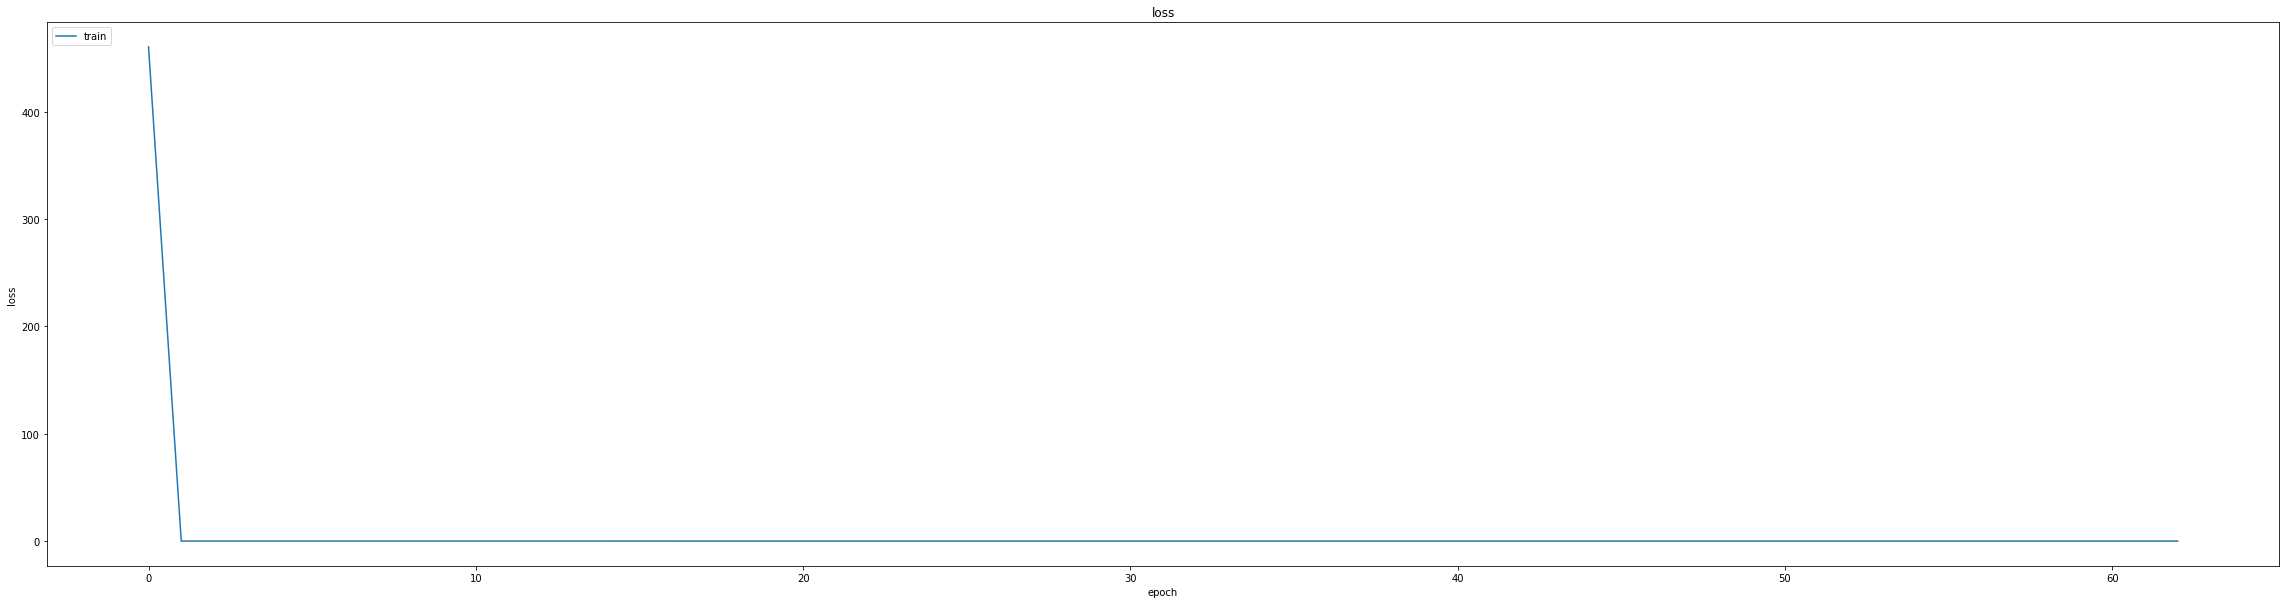

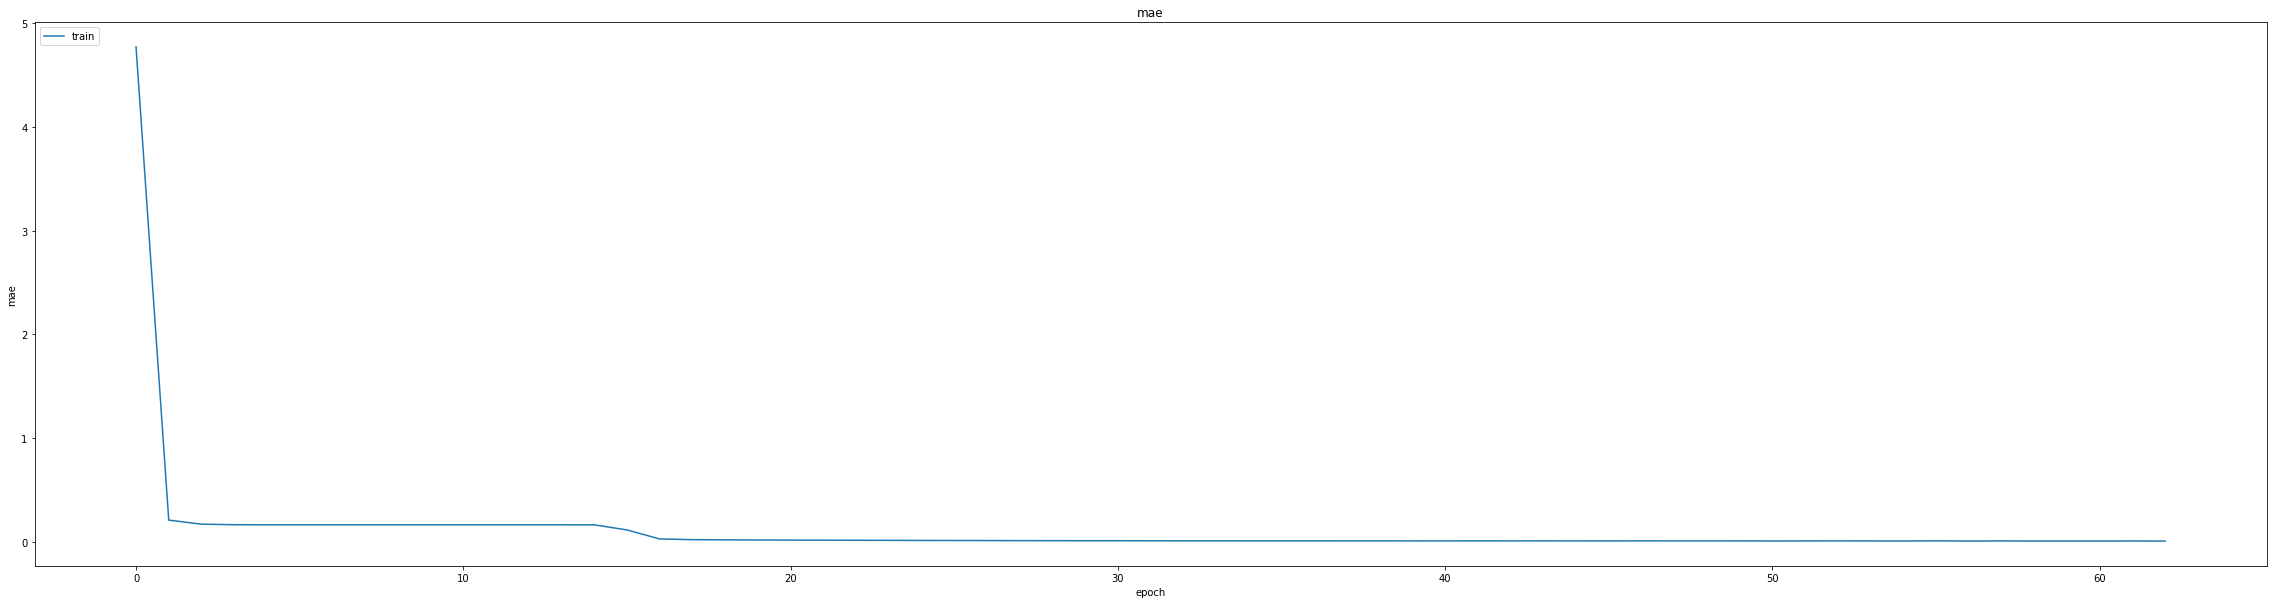

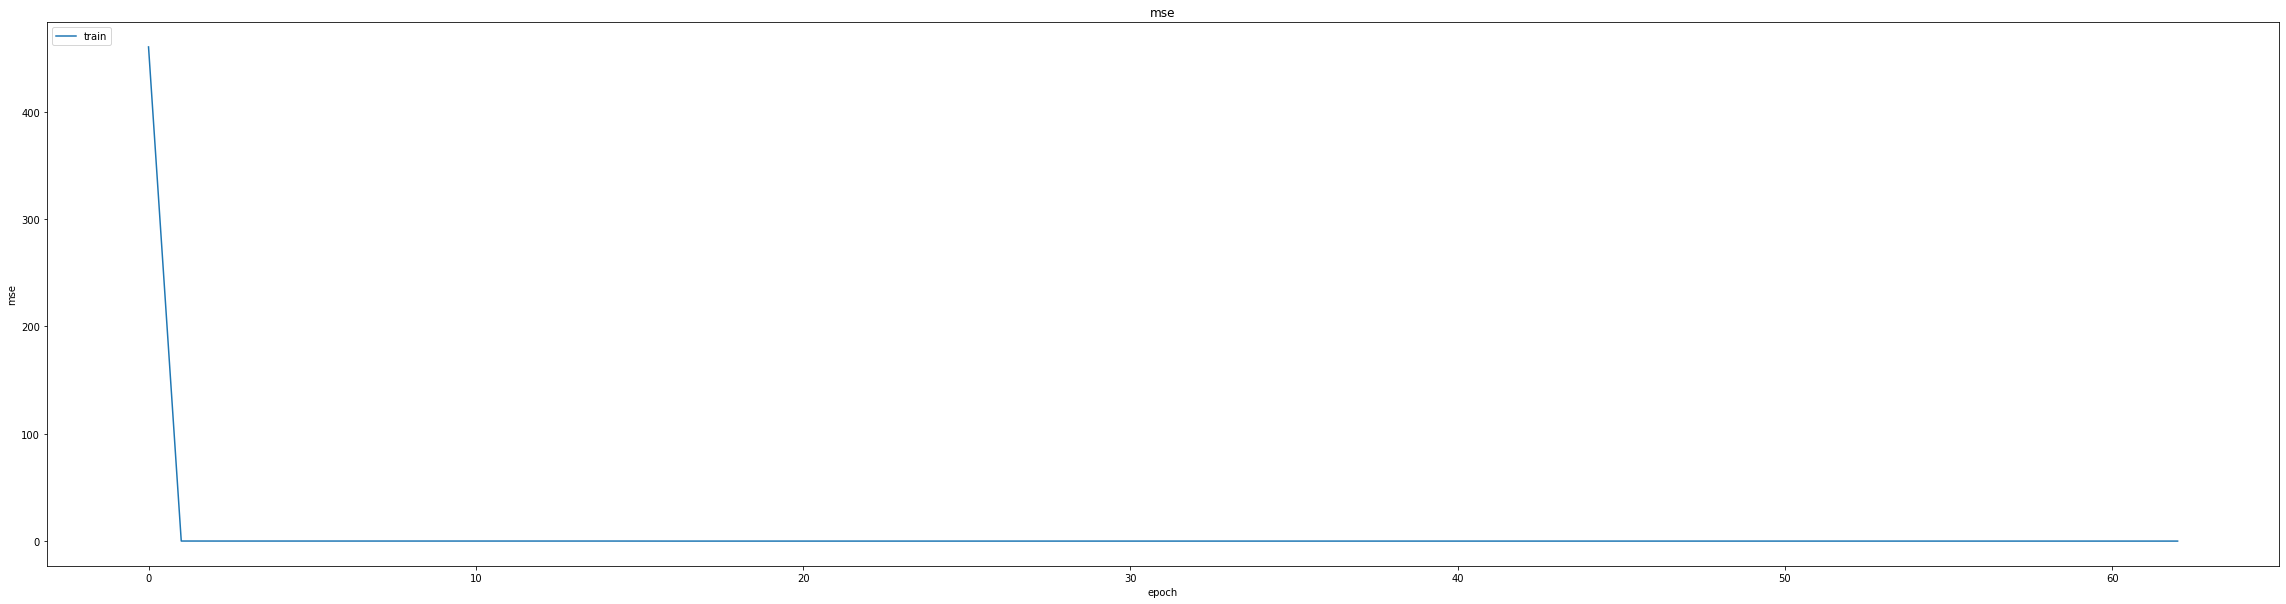

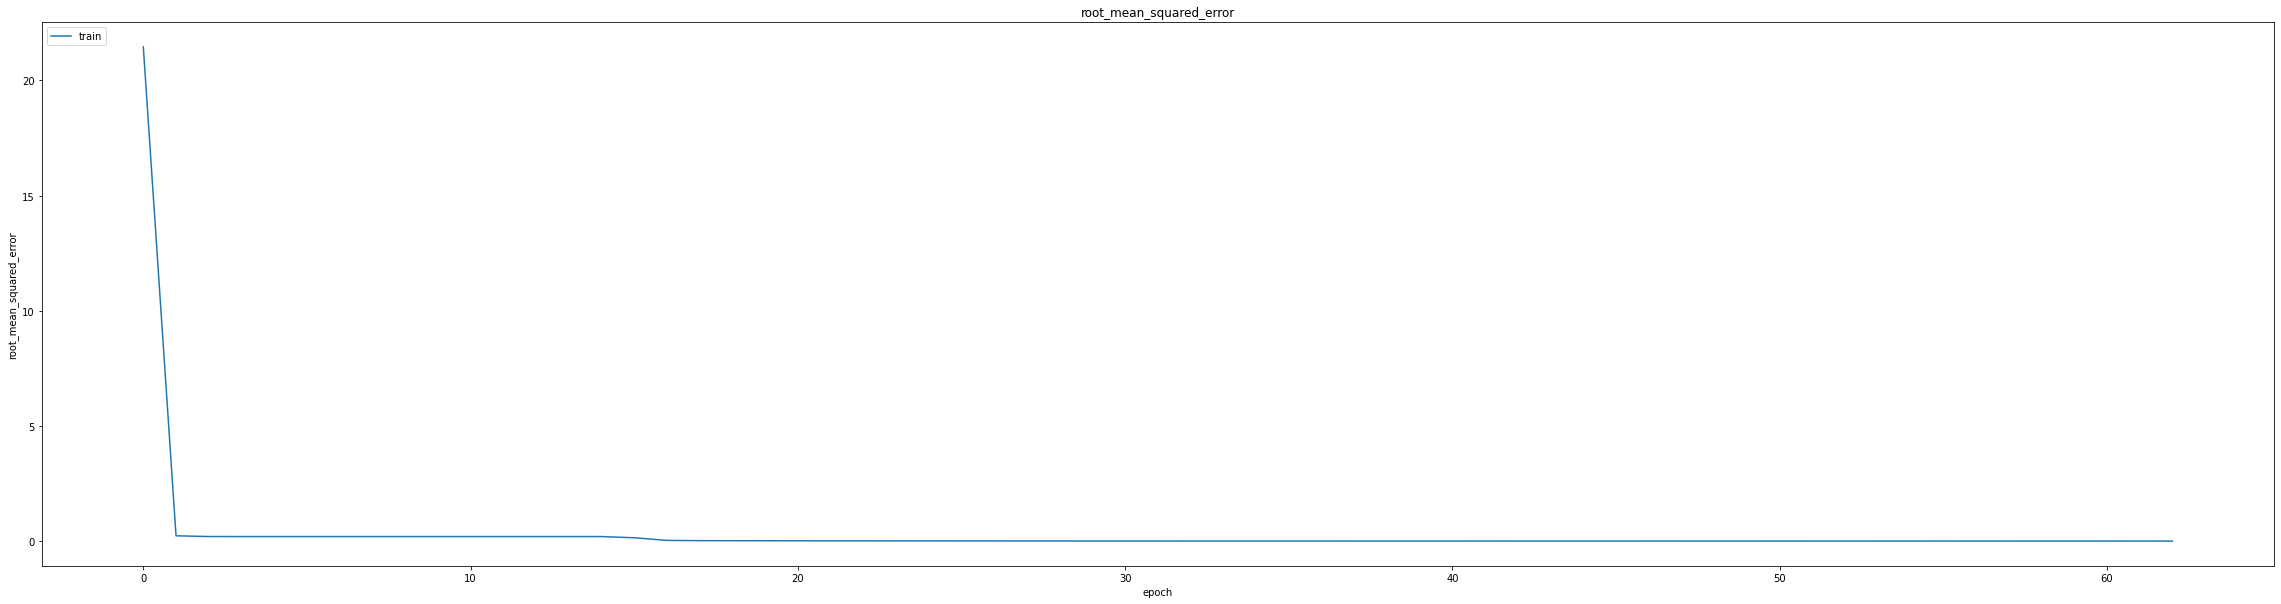

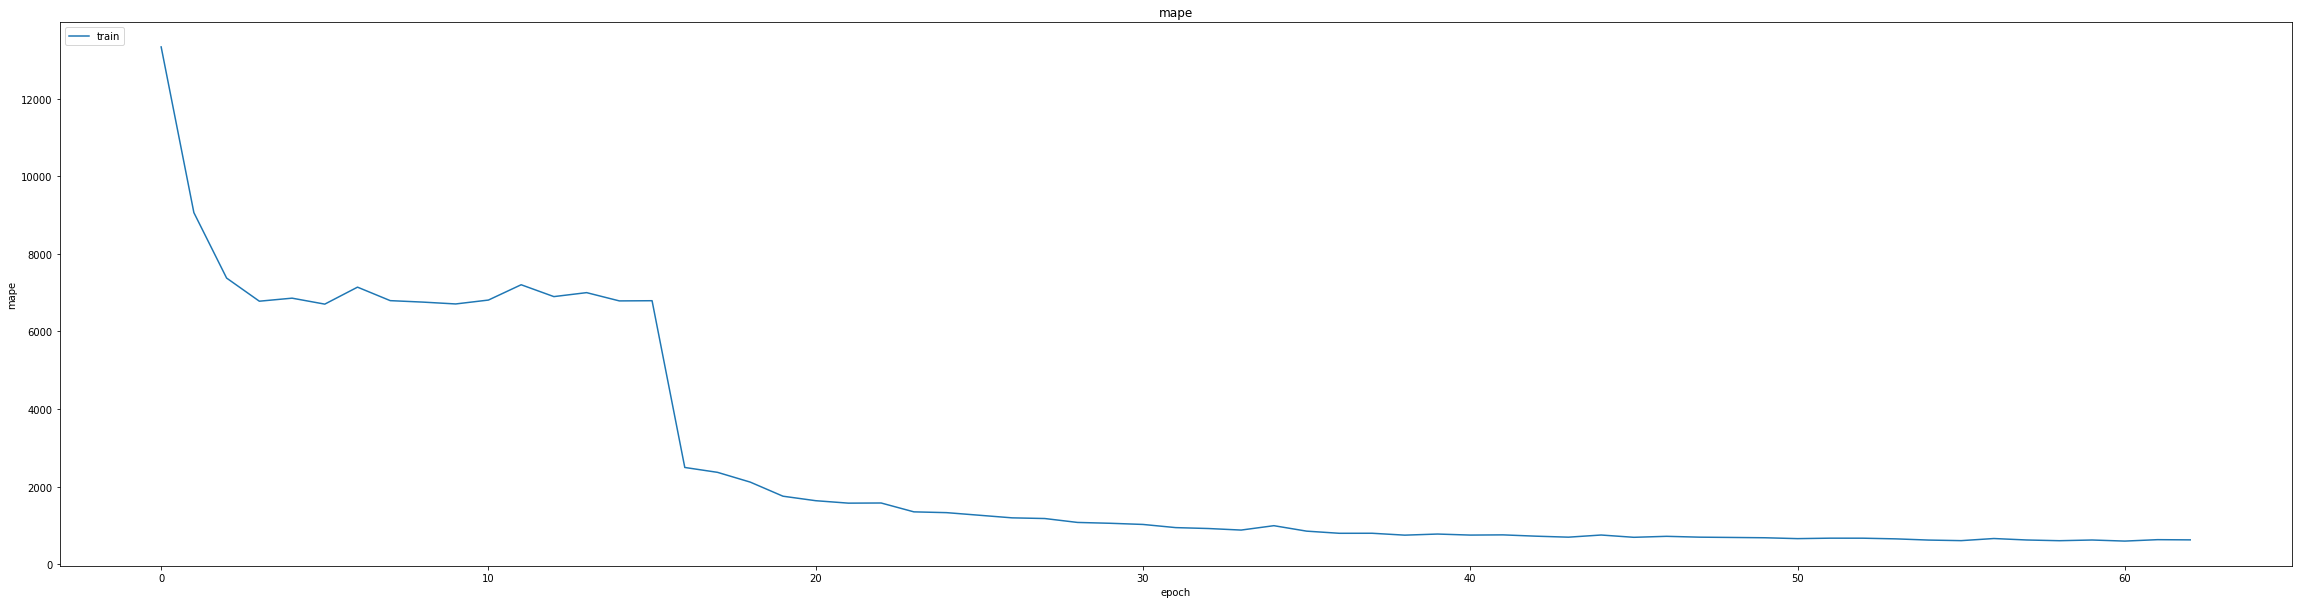

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01829078420996666
0.01829078420996666
0.023475268855690956
464/464 [==============================] - 3s 4ms/step
0.9860887263487469


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 2.4469e-04 - mae: 0.0092 - mse: 2.4469e-04 - root_mean_squared_error: 0.0156 - mape: 641.3117
Epoch 1: val_mse did not improve from 0.00055
348/348 [==============================] - 9s 14ms/step - loss: 2.4336e-04 - mae: 0.0092 - mse: 2.4336e-04 - root_mean_squared_error: 0.0156 - mape: 635.9882 - val_loss: 5.7669e-04 - val_mae: 0.0187 - val_mse: 5.7669e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 4261.4585 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 8.7497e-05 - mae: 0.0071 - mse: 8.7497e-05 - root_mean_squared_error: 0.0094 - mape: 623.8896
Epoch 2: val_mse did not improve from 0.00055
348/348 [==============================] - 4s 12ms/step - loss: 8.7575e-05 - mae: 0.0071 - mse: 8.7575e-05 - root_mean_squared_error: 0.0094 - mape: 616.9226 - val_loss: 6.9508e-04 - val_mae: 0.0214 - val_mse: 6.9508e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 4228.7749 - lr:

348/348 [==============================] - 14s 40ms/step - loss: 9.2420e-05 - mae: 0.0072 - mse: 9.2420e-05 - root_mean_squared_error: 0.0096 - mape: 536.9676 - val_loss: 4.7385e-04 - val_mae: 0.0168 - val_mse: 4.7385e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 3693.9207 - lr: 9.0000e-04
Epoch 4/25
345/348 [============================>.] - ETA: 0s - loss: 8.2226e-05 - mae: 0.0068 - mse: 8.2226e-05 - root_mean_squared_error: 0.0091 - mape: 546.3650
Epoch 4: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 12ms/step - loss: 8.2269e-05 - mae: 0.0068 - mse: 8.2269e-05 - root_mean_squared_error: 0.0091 - mape: 541.8364 - val_loss: 5.5048e-04 - val_mae: 0.0188 - val_mse: 5.5048e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 4055.7537 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
347/348 [============================>.] - ETA: 0s - loss: 8.7039e-05 - mae: 0.0070 - mse: 8.7039e-05 - root_mean_squared_error: 0.0093 - mape: 50

348/348 [==============================] - 14s 40ms/step - loss: 8.6984e-05 - mae: 0.0070 - mse: 8.6984e-05 - root_mean_squared_error: 0.0093 - mape: 508.0705 - val_loss: 4.3460e-04 - val_mae: 0.0163 - val_mse: 4.3460e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 4039.3901 - lr: 8.1000e-04
Epoch 6/25
347/348 [============================>.] - ETA: 0s - loss: 7.6822e-05 - mae: 0.0066 - mse: 7.6822e-05 - root_mean_squared_error: 0.0088 - mape: 501.5448
Epoch 6: val_mse did not improve from 0.00043
348/348 [==============================] - 4s 12ms/step - loss: 7.6755e-05 - mae: 0.0066 - mse: 7.6755e-05 - root_mean_squared_error: 0.0088 - mape: 500.2472 - val_loss: 6.6658e-04 - val_mae: 0.0216 - val_mse: 6.6658e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 4387.3247 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
348/348 [==============================] - ETA: 0s - loss: 6.9669e-05 - mae: 0.0063 - mse: 6.9669e-05 - root_mean_squared_error: 0.0083 - mape: 50

348/348 [==============================] - 14s 41ms/step - loss: 6.5009e-05 - mae: 0.0061 - mse: 6.5009e-05 - root_mean_squared_error: 0.0081 - mape: 510.7286 - val_loss: 3.9748e-04 - val_mae: 0.0161 - val_mse: 3.9748e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3687.8003 - lr: 6.5610e-04
Epoch 10/25
344/348 [============================>.] - ETA: 0s - loss: 5.4097e-05 - mae: 0.0056 - mse: 5.4097e-05 - root_mean_squared_error: 0.0074 - mape: 518.8242
Epoch 10: val_mse improved from 0.00040 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 5.4544e-05 - mae: 0.0056 - mse: 5.4544e-05 - root_mean_squared_error: 0.0074 - mape: 513.0383 - val_loss: 2.9064e-04 - val_mae: 0.0131 - val_mse: 2.9064e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 3410.0881 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
348/348 [==============================] - ETA: 0s - loss: 5.2266e-05 - mae: 0.0055 - mse: 5.2266e-05 - root_mean_squared_error: 0.0072 - mape: 491.6975
Epoch 11: val_mse did not improve from 0.00029
348/348 [==============================] - 4s 12ms/step - loss: 5.2266e-05 - mae: 0.0055 - mse: 5.2266e-05 - root_mean_squared_error: 0.0072 - mape: 491.6975 - val_loss: 7.4089e-04 - val_mae: 0.0239 - val_mse: 7.4089e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 4666.5029 - lr: 5.9049e-04
Epoch 12/25
346/348 [============================>.] - ETA: 0s - loss: 4.8042e-05 - mae: 0.0052 - mse: 4.8042e-05 - root_mean_squared_error: 0.0069 - mape:

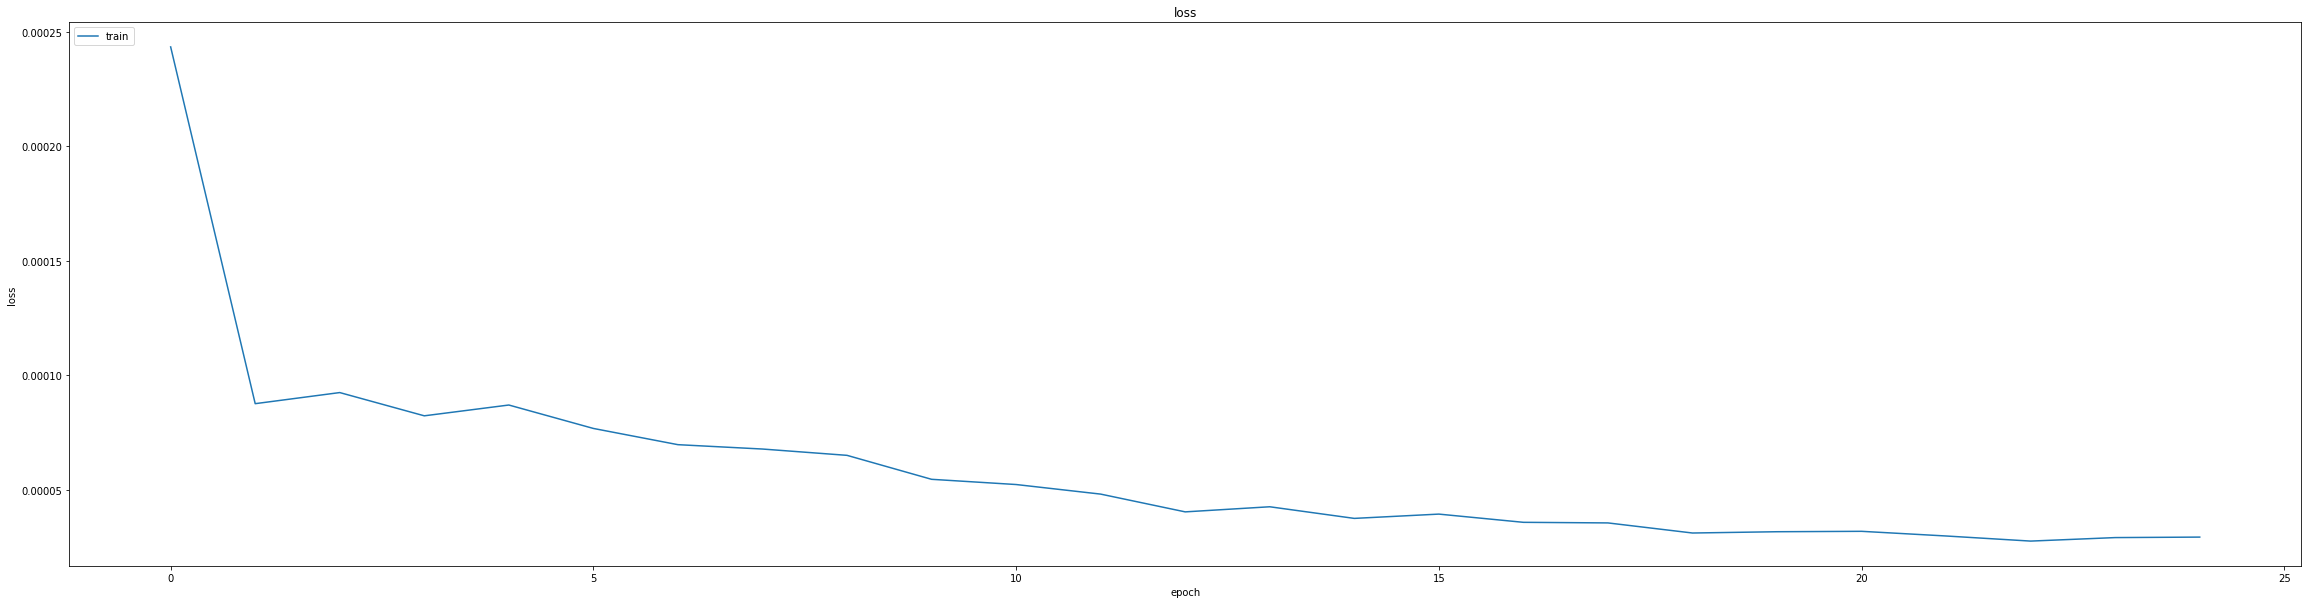

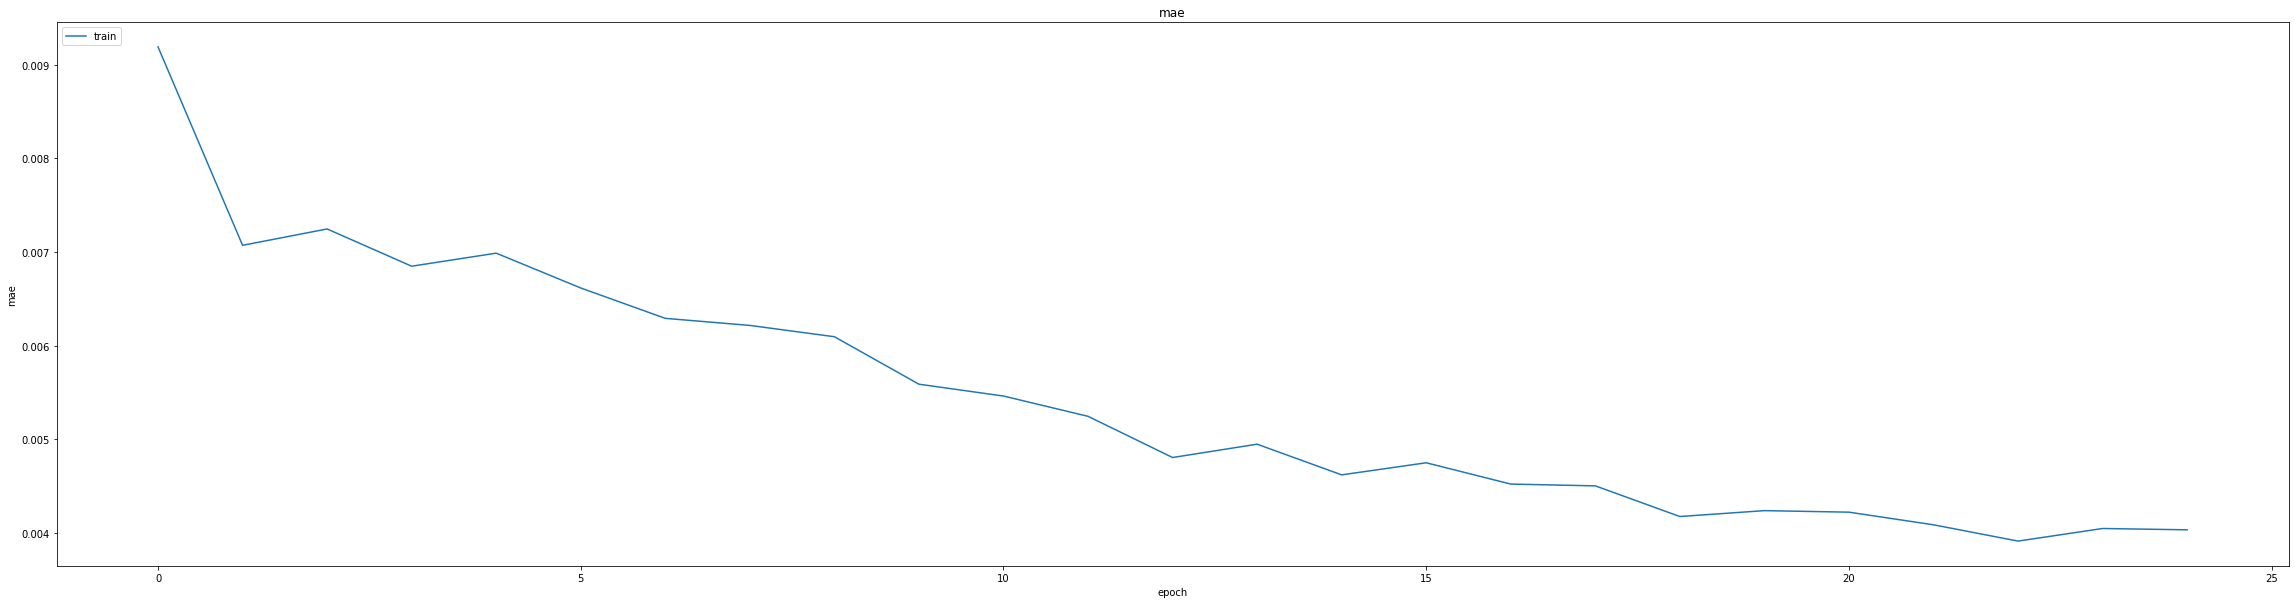

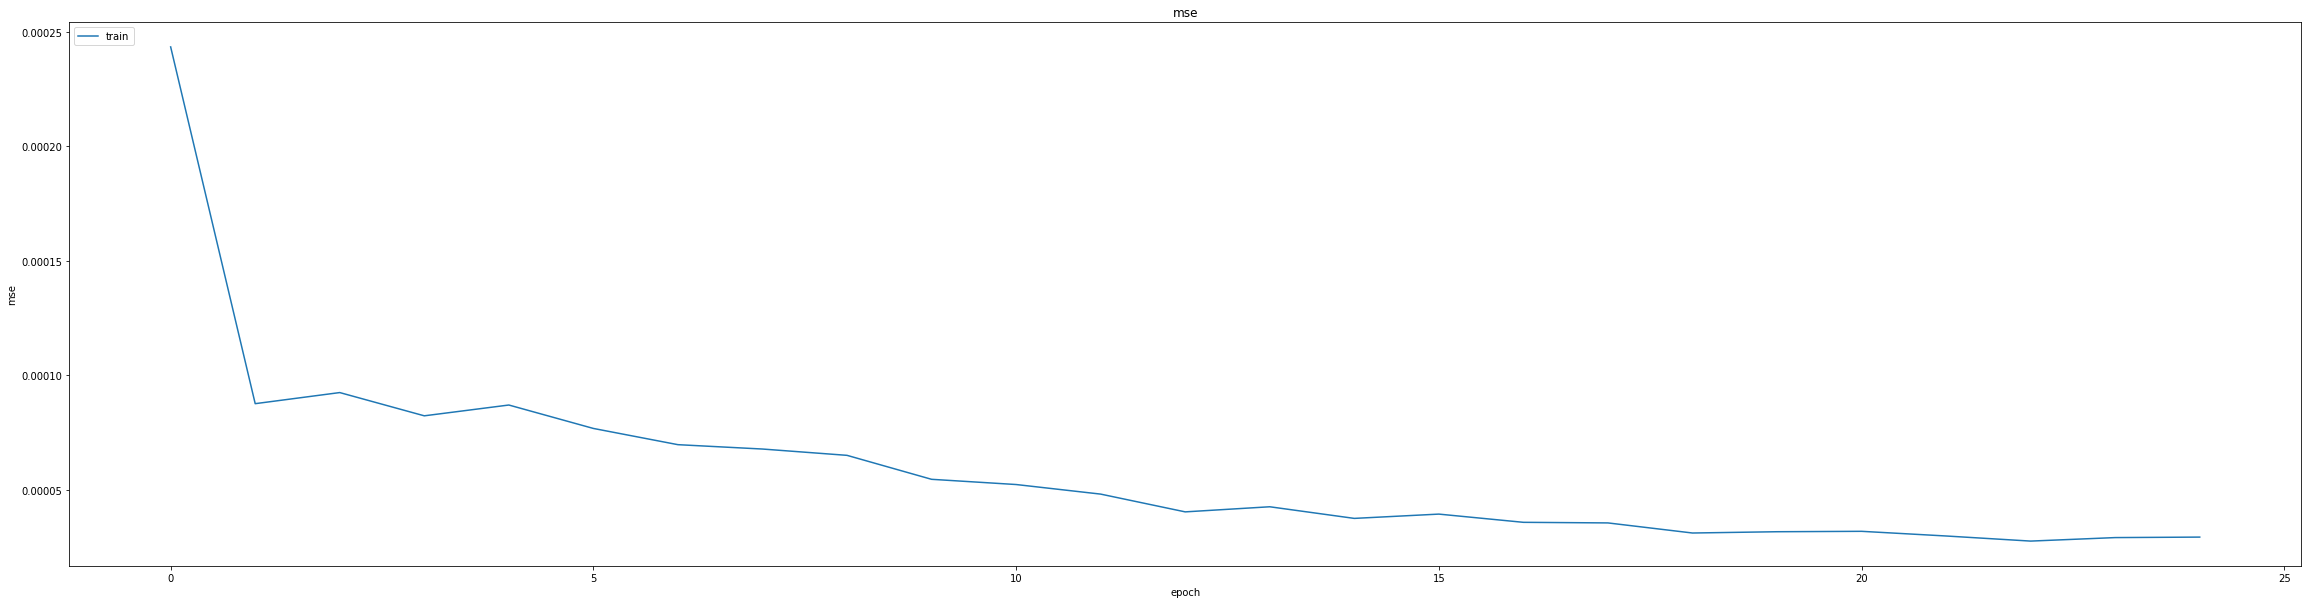

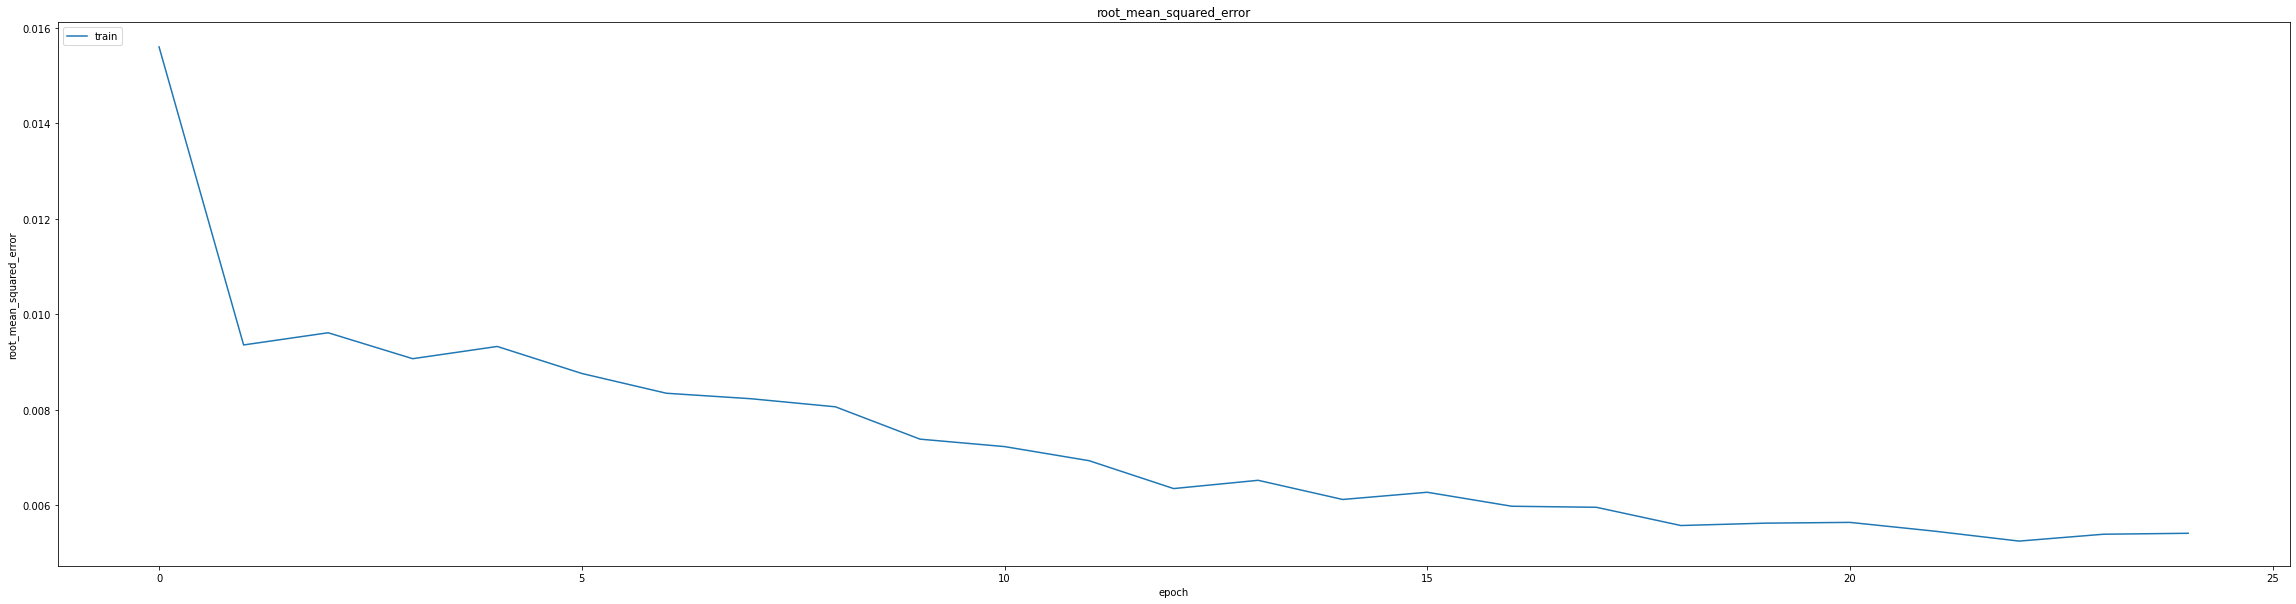

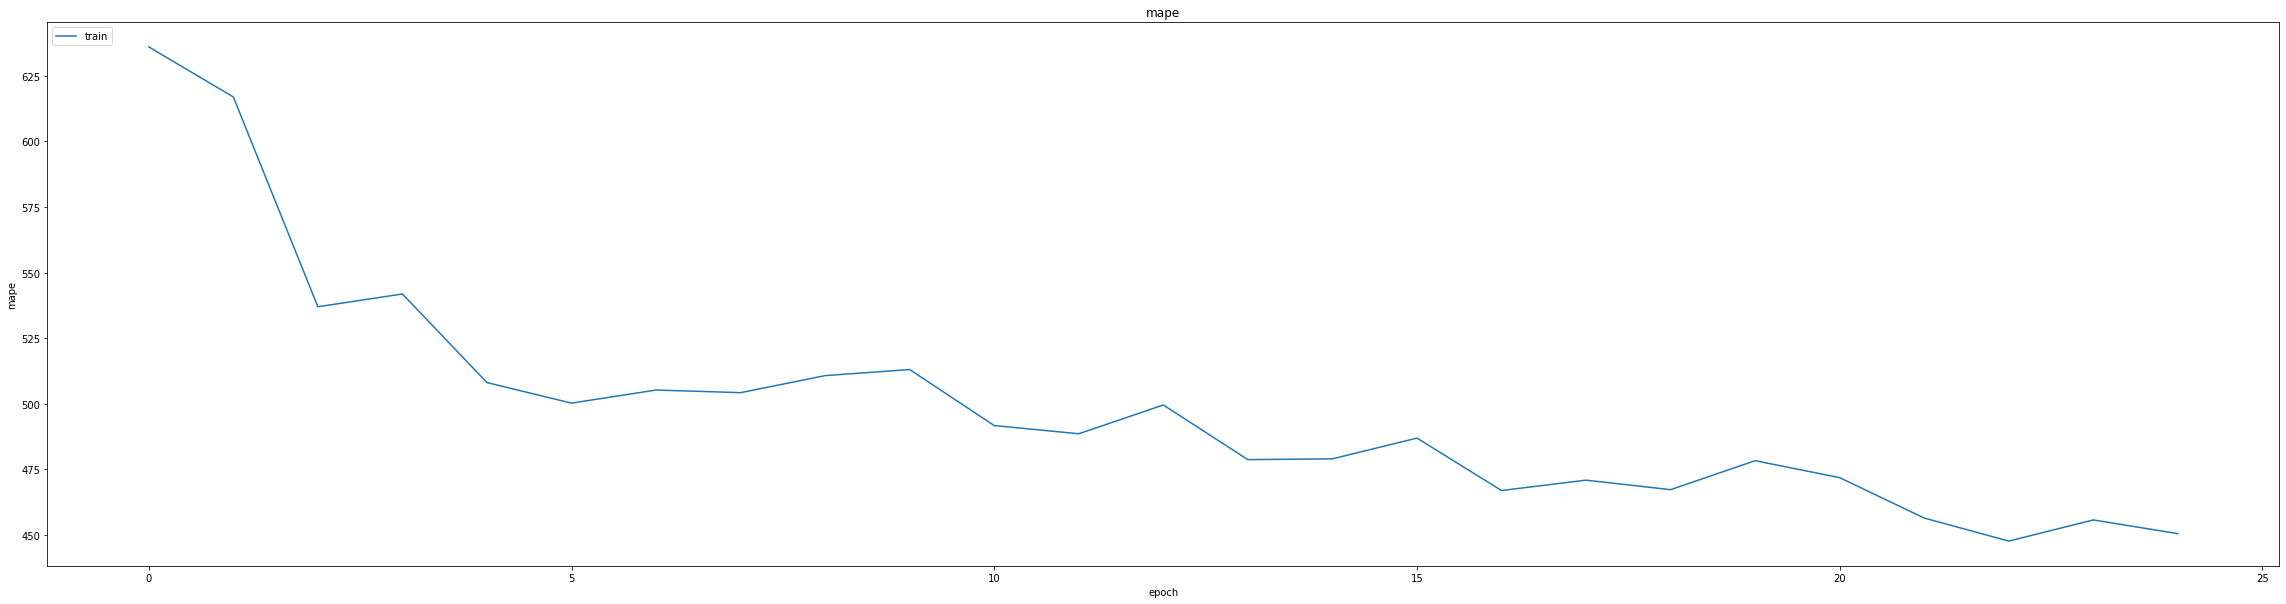

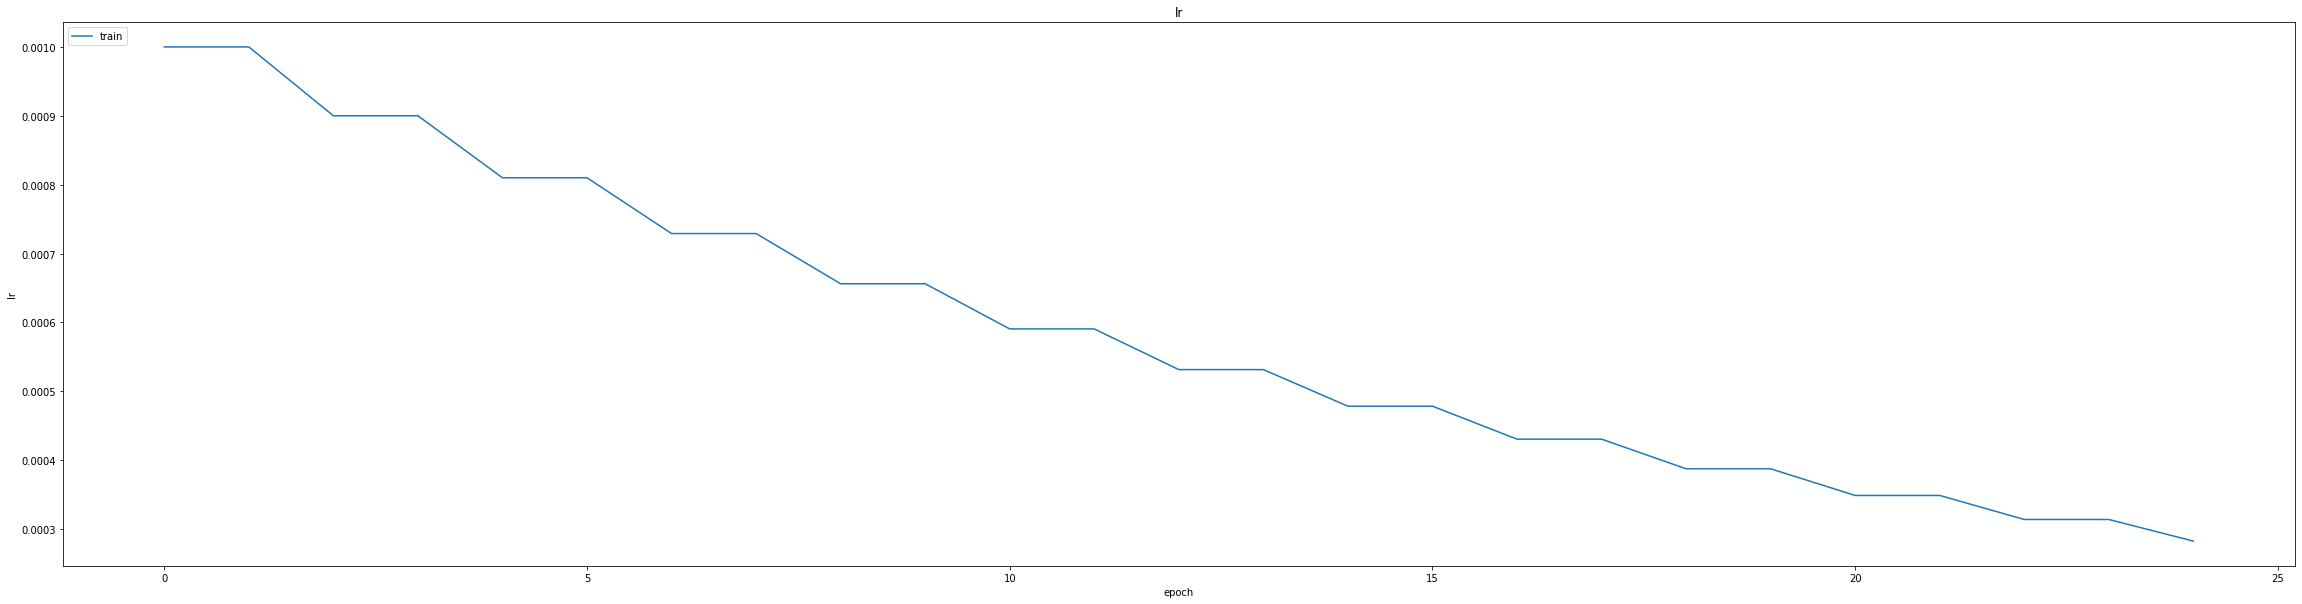

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.013137593865394592
0.013137593865394592
0.017048120498657227
464/464 [==============================] - 3s 4ms/step
0.983216525076484


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


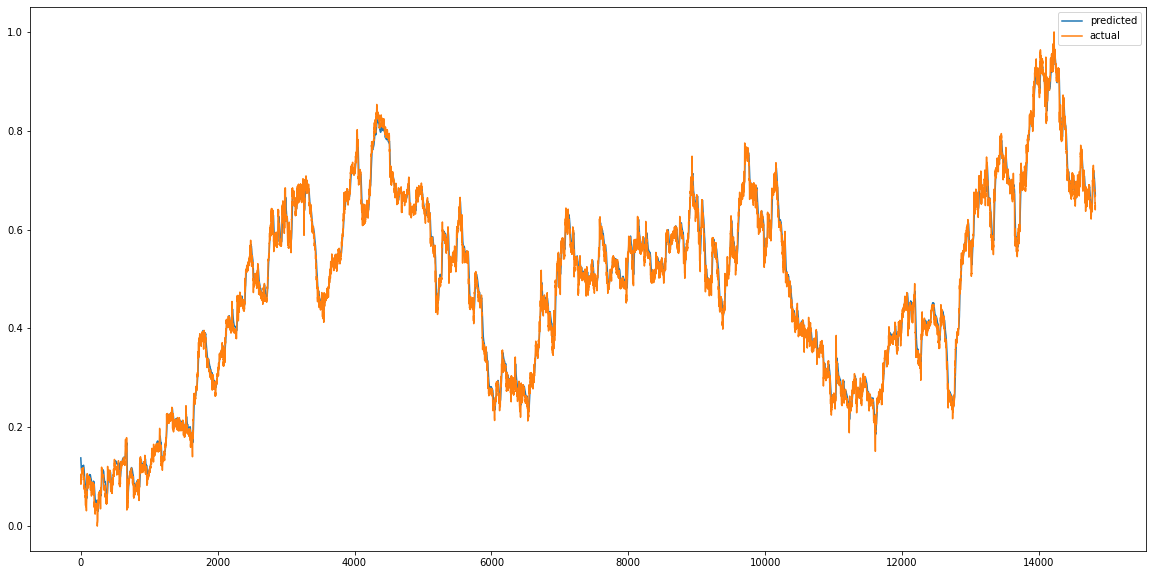

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


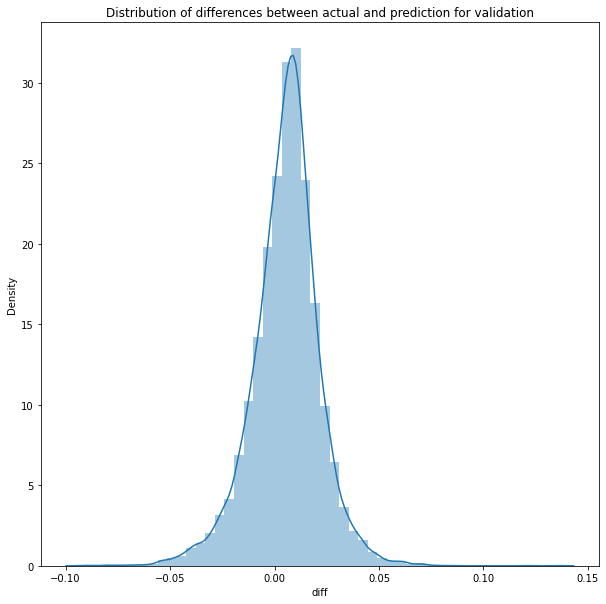

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


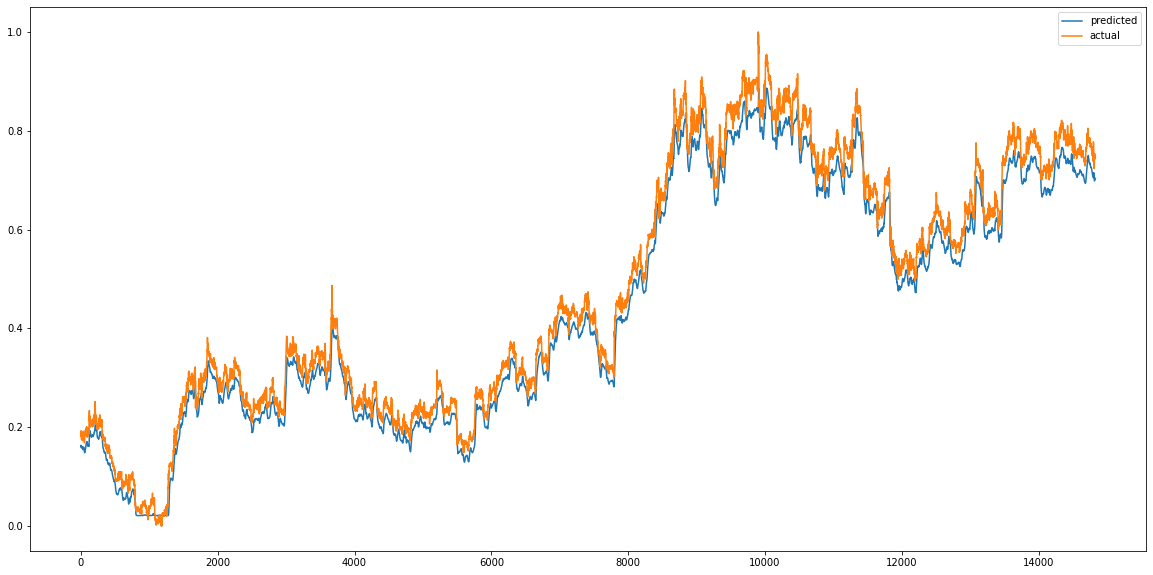

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


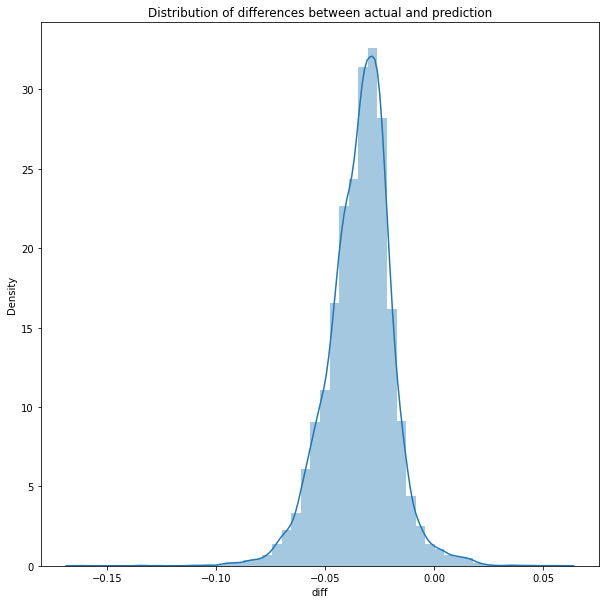

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00136788913762519
RMSE :  0.03698498529978334
MAE :  0.034171968722996854
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9784738149785527


count    14828.000000
mean        -0.033883
std          0.014827
min         -0.162044
25%         -0.042378
50%         -0.032541
75%         -0.024828
max          0.057473
Name: diff, dtype: float64